In [15]:
# import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import colorsys
from PIL import Image

import requests
from io import BytesIO
import matplotlib.image as mpimg

%matplotlib inline

In [31]:
import json
from base64 import b64encode, b64decode
from binascii import unhexlify

In [52]:
CAT_JPEG = b64decode('/9j/4WVvRXhpZgAASUkqAAgAAAAPAA4BAgAgAAAAwgAAAA8BAgAgAAAA4gAAABABAgAgAAAAAgEAABIBAwABAAAAAQAAABoBBQABAAAAIgEAABsBBQABAAAAKgEAACgBAwABAAAAAgAAADEBAgAgAAAAMgEAADIBAgAUAAAAUgEAABMCAwABAAAAAgAAACACAwABAAAAAAAAACECBAABAAAAAAAAACICAwABAAAAAAAAACMCAwABAAAAAAAAAGmHBAABAAAAZgEAAMQCAAAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgACAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAAICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIABIAAAAAQAAAEgAAAABAAAATWVkaWFUZWsgQ2FtZXJhIEFwcGxpY2F0aW9uAAAAAAAyMDE1OjA2OjMwIDA4OjM4OjU0ABYAmoIFAAEAAAB0AgAAnYIFAAEAAAB8AgAAIogDAAEAAAAAAAAAJ4gDAAEAAABkAAAAAJAHAAQAAAAwMjIwA5ACABQAAACEAgAABJACABQAAACYAgAAAZEHAAQAAAABAgMABJIKAAEAAACsAgAAB5IDAAEAAAACAAAACJIDAAEAAAD/AAAACZIDAAEAAAAAAAAACpIFAAEAAAC0AgAAAKAHAAQAAAAwMTAwAaADAAEAAAABAAAAAqAEAAEAAAAABQAAA6AEAAEAAADAAwAABaAEAAEAAAA6AwAAAqQDAAEAAAAAAAAAA6QDAAEAAAAAAAAABKQFAAEAAAC8AgAABqQDAAEAAAAAAAAAAAAAAAAAAAAAAAAAHAAAAAoAAAAyMDE1OjA2OjMwIDA4OjM4OjU0ADIwMTU6MDY6MzAgMDg6Mzg6NTQAAAAAAAoAAABeAQAAZAAAAGQAAABkAAAACAADAQMAAQAAAAYAAAASAQMAAQAAAAEAAAAaAQUAAQAAACoDAAAbAQUAAQAAADIDAAAoAQMAAQAAAAIAAAABAgQAAQAAAHEEAAACAgQAAQAAAPZgAAATAgMAAQAAAAIAAAAAAAAASAAAAAEAAABIAAAAAQAAAAIAAQACAAQAAABSOTgAAgAHAAQAAAAwMTAwAAAAACxoaWdoO3NjZW5lLW1vZGU9YXV0bztzY2VuZS1tb2RlIQgAAKhQ3kGoUN5BAAAAAAAAAACQRN5BBgAAAAAAAAAAAAAAcGUsbmlnaHQsc3Vuc2V0LHNwb3J0cyxoZHI7c21vb3RoLXpvb20tc3VwcG9ydGVkPXRydckHAAAAUd5BAFHeQQAAAAAAAAAAiDfeQQUAAAAAAAAAAAAAAC1mb3JtYXQ9eXV2NDIwaS15eXV2eXktM3BsYW5lO3ZpZGVvLXNpemU9NjQweDQ4MDt2aWRxBwAAWFHeQVhR3kEAAAAAAAAAAIg33kEFAAAAAAAAAAAAAAA4MCw4NjR4NDgwLDEyODB4NzIwO3ZpZGVvLXNuYXBzaG90LXN1/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCACAAKADASEAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+ff43WH/CP3XhDxdp8GmwWnjDRJdftfDum6jJftov2PVrrTGt7qEzy39opntWWE3zK1wkTyREr8q8pqniHU9R8Kab458PzzW+nkXFh4g0cfO+k6lb8zbVUBngmXbd2ch4kt5SjYmgnRa9nKlzc9OTjSqxld2XPB+45aXi0uWKTjdadbHv0XGvhqdWdRqUZqlWXKk25PlvGyTTUuVp7duh1X7OHw78S/tAfFzwX4PsdKvb1fEniDTdPuLiGOS5u4rKa6QXd4ltCyJHHbWoklZpZEUBOGDYB/vQ+Dlhpfwi+GmgfD7T7meS60fTrfTLCV4Gl8pILMW6G6hICpcyyA+cscb5DMxDo2W8zOa6VCnFJe+puMb2SjG9o3S5mk5aytq42dr2OLM42dLDQ96MITdR3gvZ3cE1HvHVrmabb0VtGcxc+FLjSp7rxdqF5qOoavPHF9lt44TDZtEt3I8mYADNCZoHXlQPm80hGd1QQeKbO6123s7ew014nKiZrIcJHLDbyAPDI6mS2uXjkaZPMTExiMC43EN+f4qvKo4Qa91OEEou0lKblJppWTjPmhrZKMk3pdOV4eXIqfLypUeaEGrptSTbtv7ybvdr0tZs8I8aXfjfw21pq2qx3X9mWzZF4UzPb3dlNE9lqNraGRPMW7e9uZGt1HlRefcyooeBxXy/fXniTxbp03xBm1x0h8NeItUt5rMv9mjuvK0tTZ6hqUcKqt3Dps0urQ2dtIdlrd7WMYmld35sPOv9apwnGKnKdRunG0ly811eT10t7S7XNs3Zyi5e/DAUvY1sTTkp0sLRpPRcvvVPdltpJR5l0WkdLNss61qnizxX4W8PeF7TUdait3s2ttV1HTLO4u9C03Vvtul28Gim3tbWBNe1Oyi8+0CT6vFawzJdSTpOysp8x+NngWw1fTbrTXvZtW0jQ7m0gtDopj0axig082y6p/bescNaCbUormd4ftLhZp1lEUrxG4X3qmHp4em1yNQvBSjN68nJK6hHVTalZxWvKmmuWKPLjKKk48sr+1U1KPxqMVGMXNOzk9brmto7KLbd/wAg/iF4N1jxtrXg3xXpi22lfDjwhr+qDTbXTLqK6srXUoBPAtvpb3JWa8vJfnkfXdRWb7Y3nXonKNHCnlnjw33wk+I0PiPw3PZQLfafBfReHkm846u1jYIz+RLErRG5a8mt4rOabFxfTvJJ9nSOaN2itCFSMMN7O9GpGaqttym5Sh793fkjyu09bNyV4q1re3h40KkYwampxhFyfKo3lz80lFKLcp+9FpWsrW+JqK/TT4e/ED4f/EDSdLtdTjXTL/VtLhvIftXlLbyxPFaugDiYtFcn7SHaKRV8sBhz8hPzp+1X8C4IPDOqeItGsluktUSZ5bc+cgXLFiyA8qOGLDpwOgJH5RLB4jJuII4eKisOsTB0pLW9L2iS50rtNJczffX4lY9DA1ZSrxjUtyKcYvmhG+k+Xn92zTkpTVkn6XSZ+N/iLfptkzvHtRyx3EEAuGOAwzhTnAA9BgAV4ezz3Orx24XzHQedKduVDP8AdT5cAeWuMZ9SeAAT+75dBzb09+UnG+y05evo07taL0d/azV0oYP2akoxqJJQ6qUb6+Tsnurt6K1237p4f0ye6sAkkQRwQVXoN3GM46ZHQY46DjNdvp+kXEIJljUMBxjnCjjPTAxz246DHU9tpJt620atb1ta1tej33tbS/wsqiv7NXlJyfLKMdX0d9Fa1t3fo1Zpo73w54bl1S5iiKPBabx9pulhYhF5JxxySBwO3H3cV9KjwF4R0nwnLLpaHUtYvVDK82P3EMa4Z2ThVZjyQBwABwd2E1VcoxgotKUVXlqnTT1SXZSSatq1srW1469NxgqiUo051WoyS96Ti6cqjV7LlpcyUopa8yS5Unb7m+KnwG+B/jfxlfIdJlguY9KuNG1a20Qxvpmi2kCXs1lqkUVsHEBt55hJLHGVZJoYwqskqB/ijVv2F/Efhjxf5fg7VdMl8MeLLa4srrStTvZvtbeUB/Z82yKBoDc+a3nrIv3I3IC7J3QRh8biatP323GNJ0VDk1alUk1H3bRa5+a0ttLq1tefCSnh6cKVSUZ/WE+qlLmUNObrBQck72fNye6lZ3/Xb/glJ+xdbfBzxd4o8XeJNQkk1iTSpbHT4IpfIityt5BJLL9ju2hAvNO23McFxH5qtbmSWMqspST9n9aklh1O+07QVn1DWos3lnBZvDNa38Epc+f5cjGayntzMjIyIysybVZEKqfHzDE0m5VEv31OEKUYzfwTkrwjJRSsrzvzX+y3ZJa1VozxOMpuk04zgk5qz5lC7bV1H4VFtPXl0T6249/BH7RcsNz4h8y313SLSy+0fZI43jvYYyqyRqVRZGljaEGKeJlYRurtGTsdxgfAn9sDwBqfxG1j4HfEB9L0X4j+FBHcah4YnZYNRSC4R7nT7mB8ySXFnPazc+XkRXEsavHH8jJ8ThMRiFisROtD2sEuZOMLzpwi/Zt9E+WyldK/LFN8rTZ9LWy/Lq+GjTwMXDEUqXPJOUXGsoycZShZe/GSkrrW900/iie0fH7wnd+IvD0t/ptkNS8Oppt3Fps6RM8c9jqiRBIruGEIbo2kssrWsyK3leafs7xPPdQH5B/Zy+E82oaReafrEK31lMviQyQyxG5h2T20stvuciGWVtsEdzbS/KsKr5DKwmSRuvCxjTx1NtOfLG0bptRUJXjUdo2lN0rq6cvedpWtrz0Jezy3H04O0+SEWm1q3dTSSST2fKmvd2+JNLG+Id7p3w/tdI0zQCJLnw7pcviS7s3naGyvfGtw1xZ2qw2Nu4uLqOCdoLiztGaWNbi4+0y4aAyrBpnwK8W+PfhdO/inXhaGe40t9Q06+s0vj9nacx2unaRZxvZm+vrpGjlS0WSGyjnaW+uI9QhmmR9MTjo43G4jCSb5KSi1SUJN11Ss58k17sHdRTV3pdNu9x0cAsPl1PHzadapUjKMXa0IxqJJr3dWuVWvzRjutkfmf40+Dei6n4Q+Mfga08MpYeE/D3iNLSMwXUOna3aS6TZT/wBoMbxvtd1q/iPVbtIVkQwCwsLC6uzaWtrbHNfmF4oudatdQ0aOTQXi1Dw14UhGhWcMAl1C6/se7in0bT0ji828bUpr69LLI8oluHt4xPI7xgx6YOr7ZxoVOfljFVE3HkUYxgk+f3ouMakL6a9fJHo4ShUbrOclJ+x9pT5laLlUpxdrct7QU01ZLldmrSSUW61oniqw8SaL4btbnWrG20K8sNH1jU9OS1F7q3iTWLXS5riHTw04laO1knitZXkQQu4IhiQgoPWvCP7QWrXek+KPhF46jmu7qLOm2mtTIFtdUgDyWhuLaXdIE8twRiQAkqshCGTauWa5ZTxmGhiaUOWvQqxrQkoXlKiq3M6aW0kouLjbRRuouKbZ0YHmeLpNtX9rSVRpR5UpOPLy3SUY3mnFXb5VNvlaR8k/FH4L+MdflvNN+H3grX/Hd0gmufsnhbRbzV5baB5GNvc3kOnRXDW0cqKxR5to3AqpYqc6PwR/4JfftgeNrddevPhTf+FbXU5DOt940urHwzttyUCSGz1KeLUBGVZvK/0T5zE4wBsLfRZRjKNHBe3xFVJy51GmlKdRLmu/dim3KWnS1vhsnr1cT16OFqKjGqpNKNW0eXnSk5R2ik0k/eTcUvd6XSP0p+Fv/BI3xFHby3fxF+I/hfw/GphxaaSl7rN0FCFnlO6CytisnyqrSTJGDkLuAY19p+F/+CdH7Mfh9LSbxHqfi7xBGIGikisLGxsTqErncHjLLeTjzShVEiZAqEFc4JG8v7QzCpy0IOhRUVJc75ZSb01hB3VlZxjJ396zsk7+LheJ8vySjL6rl9DFYyUEvreNjGpCjJvnvQo8vK2leneTas01FSVl3+k/sm/ss+HEnmj+Fd4bZ43giOp69c3CxsQ5xPbQzQNbzrtYuzBU3AZYgLXAa38J/gpYvcaPZfCfRYLG5DRxX8N5dthB8oC3SXUpjcbQr4dV3HBRiGI9KjlOL5KkvrdZc0uaXJGKTjpaOut0r8sm38V3ezv8fmHEOJx1Re2VG1PnlCFOlClSU6ji6rowhBKKlyvpdxim7XlF/IvwLs/Gmuo4lW01PXfF0K21tpDta2M1vp6W0q3Ud1MDZzXf2eWexmeYE4dGQBlR1P3D8EvgPqvxS8Z6Tplxfx6LfW11pureJNG1PUNLuorKJZ9culisLm2aO4tftNuljarHPbtFDYSBjeFndK66dKlGKjGKgl8KT5Y8127KCaTvdP4fdau02425qzVJ80FO9NJySV04RjyuV1H4ktNG1fone/7e6f8AsL6v4t8OadqPg/Urvw7rmkYikezKxwajCwjicG6iEscjxPG4YxO6rLNKZEfJJzPEXw3g+BEHkeKjc3Xi1THs1NFSSW2tIZEeUiJURYVmjJa5eItDKXJSJdkfl/FZzhHgaWMxL54qtXhUcXor8z1u9HyqzXLd6XV7Rv3ZXjvbKjgYrlrxqT9libNTVHku4ySvfTn91LXfV3T+7P2br7wp4i8OTRQazY3E2oRwXFlJdrBHfDz0+zS2j28sqlzG8bxFcFnkkZYyyqpH8x37YXwN1H4Nf8FpPCck3gLVfEfhr9pHwWum6dpmjWF9qVxe6tpGl3S3kmk/Yo2uhe6R/Yljql00JU29n5tyTsSSRfMy7C1cZg2qDTqYmnicKk5U/wCLWoz9lHRvSUmorn2lpG3Pr79CLoZhi8LJ8s6+CxHspP3Yp06U2lG9oxacFLn5tHLXa598fCj9rDQfAXiTxD8PvGn227+H1n491L4X2PjHU9NS2/sjx7aR2EE/gHWp5wsNlrVve6imn2Wp3kOn2Or67psmkzmHVZSb/wCz7jwbpcVrf6h4Dt/Jj1L+09ViiFv9lih1WaKVblPIIH2OK5l/fpbuPJW3LJGRghvKwePnLB/7U1SzHAuOHrQfuckZRsm7Ws/sy91Jz5pKScTPCYarXhCrBv8A2mpCFXm961SlFTu9Ff20ZQqKT0vJKMviPkj4I/s26/4+8Sj4nfErSGtdP0UXLNYPbRGCDVIbySwMnmJFG81taxlVaQcmaZGTaqTvX1B8TdZsfA/gLxl4m03QtOvfEej6adO8M6Zal7id9QntJLa1sNDiVQ8uo6jqFxaGfVrl4rRZS53XMdtb2zc2WYqMK0qiqKV4e2aTV5xnB1Glbabt7yiltd8sXY+izql7ZYfBYeLUcLF06krKmun8TS1l1esficbtK/4DfFWx1T4ceGvFWhy6rp+nfEnxtaz6v4xvLWSOXTfCBubiUzafof2e1ljurpVhujq2syss9y7EF5We3kk/Pf4Z/BLXp9S8UeI9Ti1C5tbK0trrR/FOvXbXF3HbGfRpp7hLtlury5e6u9Qvr+5ubax+2CJIbeKVZ2cz+1RrxpxqL940uWFRqLal7JSsnKz55VJucWnyNqKlztqV7pxpqFaSk1Gt/BqRlyqdOnF0oct3GUPaKnKpLSNua7srHo3x9+A6WFn4V1yCyk0Txd45m03ULbToGngC22j6dayNf5jy9pq0Nvqmp6rdWjKs+be2t2MsxPlYHw9+C/g+VNO8KePrhNLvJ7d7PRbuFbd5LfRWvrGMJfzmGTy9bvE0/ULrZPO80X2sAIS0Qr3YT5sBG65uWEmrRaUYxje0lG3LZqSjrL7Ci9Ys82NarSvb3qjqSjGUZwcpQpycLvlvHT3o9Ps8vn+lHg1fAv7Ovw71rQ/hpcXMDa1qWn6nqGp6hcRvqNxPZ272Hl3M1taCVbZoyohify3GZTC4IRa9L+Cst742vrn+1dVN0b9orxII724gvoo7Fi0stlpj+abuxG6KKbc/nR7QDGm5JDrknta0PrFbkcpSlrCGjjFqEYJaWS5HUkrW99y6nj5zCUJ1a9VudScFflspU4+7ZK+jtZpPe10rxSt9Vx+F20+5OtR3EOraOkEsN/DdQ2097CsDSMbzSrqOKCVRCGEN3pGo2rSKqJNa3k27y68p8Y+MdIuorSzWMPaX4eP9zEkM+nSQyeVFqentDmBoiBEuoWEkrLsmhurORCyiD7bD0I86mlyycYwlfR2WsdEkr6+8rNLVxtey+Lq2lJONlfVrWyV9+8vs206NK11f5o8W6J4o16+upys8Do+DqFuZIl1GKFViia4UgLPI8TNHN5gJkxG+d4DVnxeF7vwxDFrHifU7e28PRW1x5sUhZr+/viyLbRWVucLI5G9ZnGNp2MWIDZ9DHVaWW4CtjKzUadOnOrNNrncYwT5FBWtaUWoWu27RVrpJ08LKrOMaVKUpSlCEN7uVRaLSyk25JxVk1qn3Pmb9jbwZd6HFoPiOaJWafQrHT7S+dVnaCa6unvr6aQFUO6W7uJbKRUOIlgjwxQDH7Y/shfDcWDax8TJrOWVNeuEN1dXdskZWHTLm7t7KKEBMmxgBtkwwWYqCzE7cj56tJKMdoqk5TbasnHWTipbPVp3t0a2SO2rWTq1JLerKVKCejUZSV53UUkmna26u27Ox/QB8GrfSofAOk32mCOG01GNr0xxvE0ETyuzuI5ImMUsZdmaGX7/ktFGSfLXHjf7TXw80TxD4Ym8VXNnFqlhaWz2+pxpIFc6dcSLHJcQTKVYT27yM8TxOkyqzBN6qI687Onh6+WzjBRquWFnXpw5rtwhGLcoX3SW700020jnhYzwuMo6tTp4mUJS5dU5S5Fpayi/NLrZLU/OfStIvvhhqVhp3gTXH1fTrmym8SWNvqjo1u/lXMsmqaXHJIv2iO4t5lhabyx5QR1uINsjSKIP29vgQ/wC3T8BPDvxC+DniXVPA37SfwI1aD4i/C3xVpOs3mmeJfC3jPw9akjT7e6ttt4dP1RPPglWOT9/G+Z1mhd4X/M8rxcsPKrRjzKnU5a9Jc3v+2oyg1aTaTTjzNKzUY2atJSt+mV/Z1FRxsqdsTha69tTVNL2lBr2E272VndbL4Xpd3t+XH7CPxV8O/tGeCPiZ8EP2qdOub74qf214oh+P9h4ukhsPEGteINankXUfGD3EEVl9nNxcCHULPWdOt4E0/UILK7s2geGGQ/eP/BKf9oaw8e/En4sfsp6/4y0z4s6h8G9b1LS/CPxNtrqG6i+IHw6t7iOLw/ql7LDmC41zTrR5tE1a/iWSzvdZ0PUZraUW1xau/nwwuJxvEGbOmm6GN5MTUcbNU1VnF2s+q9rKKu/d+KKVjPA0Xg6ua4Rym6DwaxWHnGOkKlFc+HkpR0SlhlVhr9qKUrxifup4g+H3h3SPCmuwaVawafbSafdGVfs4mVXkmku3ufLVS0kiTuJViUYkMaxt8pJr8sfij4bvdJgvL7wzd2F34cfVNk1k5tpZdP1FVt7Y3RhmiDNNas1xtgb7GLIIwKwPJLcP7+aZbRybHYalRqfu6WGjWjD2d2lJ8q59nOUuXlSvaPNo1bmfm5Jj6+P+t1MT+9lOpSpTnZRi1V53TTTtyqyUZOPRWb5mk/wH/aD8G2vib4lapq76F4lufDltYX3g3wd4ftZHv7jxjNqU9y2ra3rf2VPtSNrc0NzdLbXN4rwaTJ5KmximlKVv2ZfDVtq/gjxBeXlsJvHFvrniO8svCuks1tf2PhGwSLSJLW00cG6nvTFqdnpelx6hKiqbw3N2JVNkJYc6VSWJlFcrlFXk4xdpQSq+9srtqEnLZwXNJK7blL6StQhTwylGXs60YU06aV3zVJSlVk435FCELxhdbU+dW+zb+Nz+Ktf+IuuaFpOl6HH4U8AeC9R8FeENQt9ZjlvF8W2GmwtqF9cMY4UTVWmthPezz3Mk1mLKdrmUKksSfOZjC2L60Y4dd8UQahe6h4ZRrS5uLq+sbZYtQaZD92R7cyPE2pRlY5bm7ghjeMBmX38NWoyjOVHnak2lTb5b06VqU4R0SkpXXI7NXt7qTPCrL2awylCnGcacpt93Nzqe0sopaN2cZaONmklZL3rQPEMHibwrppEumX9/Pd3V5fQxFYLVZonkF1Ibq3iu1uGF7mFGku2jREUxyKAkI9r8G6dNN9um8LapfeHNftAl1AYAmp4nVIt1zZeZDas9rO0TW2paczTv5T+fazxMzRr7mR0FCMoOCjepJpxknFTbXa2svdu9dFayTueXmSnZt6zjGNozX8SKdlZJRcYqn8EbaWSSUuXl9V0z4ieN2W9VfC91o15f7016zIFz4f1K8Vtk89pbXK+bpcGowMk8L2s8slnJLJblzBEgO7p3hPw/pOky3mpXFuFmlnnt7Mzqz2rXA3rboVVMyRjdG4RdhVQFBVVr7jDKnCUnUbioK/vJJy5Iq1m7xvFaaW1drJJW+bhho0mp2crySUYxd07u/O37vJFLll/ibjblbPnnxz8cNM8GWF/LYNH4la1dra0tYZ0NjYybz817cqGEjW+My28eW3LsbaSQPzr+If7T+veIp7Kxhtn1PxLepLLZwBGNrb2y3DRR3It49sVvbF4yIEVczFdwAA3H8x4wzeWbVJ4DCVnHC0HN4pqa96MKc5uMracqSaX99RTtZX+9y7IIUMFDNMTBUqtd0/qdCUeR2jKH79xbjrUbcYJK8YxUlZO5+onwg+Gg8K2PhHStAjTxXon9oQaZqGoWBFpqNuVuVWZ5dJvIUu4p4z5d2YYUljlVpXhnZFEjful+zX4KeHwjd+G2tpYLYxE2Dyx+WZXuHSRZlLZMgim89JbWTs7xjG1Gr62NL2sJxk+elJ1FCTau4yulZW0tsvk1eyZ+aV6sp3qSjGnK93BWkua97K2jXLZ3W97Ozd36F/wgn7QPh6eXQvCb3cXhu5eeRY7WNI4rOcqknmeRMUEkU7JhkEiLvLbcGU17x8Nb6bU/BN14K+IllJpF5qYutPu7aQtDavJszNJai4JaGO52+b9lAdIpPMAVUbNfDUcLi8oxU62P5quEjKrh6UnGyhRnJQ0a5oxjKNWcnDVe7Fqzul9XVxGAxuChTwcFDHzp06lVa3lVp2XZKSThH4U7e9umr/GHxZ+C/jnwZqVnc+FzH4v8O6Hr120GnSFbXVLPSdYtYsfZJLd1a5EDyjcZXlW4S3gkLrcpK1eV+B/Hl74N8Tw+Kb6aexs7CJrTW/DrylIb17HzTLfzW86wzh2hkaIwmN5Fe1Kt1Ut8jjp/VZ01CSnDD1alWn8EYVacZShTScY/HG6v3T01Vo/XZbUhjaEG0uepSjHEUGr8rcFS5k7Rsm03qn77Tur6fml/wU5/YPtv2r9F1L45/s62E3hf4g3WkyT6m+iyzaV/wk2kTIrXem619l8r7RYSCMFIpA8fm7VkO0stfnf/AMG/3iD/AIQD/goNofgj+y77R9QHg7XfBXjC0vpHnlfU9OJW0MJG1be1sTHDbW1qE8mC2VBCFRcL9jlFXCVaNWlGnSfto08Th6kFG8FzU/bQb5U3aMnCCduVT0vZnoKnJYOeFTn7ahTxFGtzJXqUJUpwpzvprTnePVcrbW7S/vd8WWltfaBqFneXS2VrcIkdxOy7lWAyoZVIUqfnjDIpB+VmBIIBB/Jr9qe08I6Z4dGjeE7uK1tb/Ur3Ubp5wVS51RLqQ3CSTqhdIbmC9utQuEgE808PmRsFkXzwcXRof2hFxruliamDoU4r2fPGNNzr+90i3e1r7ct9HKN/ieGnXi6qjRUqMKsJ1qr0SqQi/ZwsuX3k05K77JJ3aPy38RWFvolhrU6WW6+1GLX49JljacSzWsMMth9qtNQYtIgKeVbb0BZ5pJLiEoZQlfN/hPwFrvhHW9T+IOj2M+l6lcLpuiaX4ukuLW3tUsNVCWWo+FPDmg2lx5d3b6Za6dcXmo6/qMRgj1XWmjsbWaS1u7uvn8HOonVnGCjyRlGd1o+aE17y5VJNucbWSScVF2Sufb1YqV3Xl7tfkpQShaVpRdNw5b+7K3uK2iXPPRux0nxi8IeF/CvwS1u10qPTbi5u9Zm1rxVrWqx3mpxeI21DWLPVZ9IgEKtdz291cWscciBmW6kdDcQSW+9R8h63qd/badYSaV4Ws/EF14oEfh3VYDpl5Jpmn2ep31ld7rq+0u6aePTLFUubt9D0mWKG6mk87VtZnhW2sF+nwdR1IUIU486jRTjRUUnJ6uUpVFHSLcLpJaaXv7l/DxFJz9tXqL2b9tGi5TnGSVG0Goxi9nTUFrfWU3FqzkzH/wCE/wDE3gubV9Kg1XwxoNtcy29laC4tUl1DSdJto90F0bDwzZ6jJpX2uOKG8htr2VZLSG6jjmn+0jzF9o+D2o/2lc3N1F4um1P7Qw1FFs0vPsdwpYAzQG7k8+C4j2Mku4t5qKhZ3dVKfSZdOhCUedwUXKMJU6StG7k2tEmkk042i3bdWujhxGCr1+eeHp16sakYzlVre7FRpcsnOzabekpKdox5VaKlZqP2D4j+LHw5+F3gXUfHXxX8U6L4I8J6NbxSXuv+ILp7S2YlVjgt7OIBm1C9uCVgtrKyiuLy4laKOKEkqB+C/wC0f/wVK8QeOfE2q6H+zf4T+0fD3TZooT4y1R2l1vxJK4OJ00S0kD6Bom0MsFtfqL+9bDXgtl22x+jxipVsLVSUoQtJc0JRU3GUUrxfK1FJczcop7RSte68LD0vYV6VoxqcldTlzQ5oNxs40akVZWkrc6ut7PXfwfwf8RP2nvitANBt47TTdKvZ2aXyNKihlKyZkkkMuGcRxgMxIxtjjYKOCa+wfB37JnxVE9xrWuSXCXNiIreS4+1x2RjsrG50eNHXybdSscdlfK2Q+0NI0jEkfN87lGS5NKVVU8NCXLCE6lSovatuT9moyhLR9L/Fa93e7trxLxNj6sYU511FqS5I0VCjGMeWU7JRTsrPe6u1ZWUXf9ov2c9T8Sa340kub+ODxHpltbwi1ttTsja3Vxby7C0dr4h0+KKS9tpBDHFc2uoLqVnnyfPsYZIo3b+h/wCFt1F/wjNtqejadPqdhZIs13omojy9d0hUeOSWTT75Qy39iH3NAnmySWhPlAKA4X1oc1OnGkqahKmrqVviV72ldKKm1+V15/IYiFNTXL7sZRtZqycpN+8k/hlFvl5fs7qyev1ppOoW2qafbX1oztDNGpxJs86Nh96KYISqyxn5XXsenUVzV+ui+NrTUNPs7oJqGlXm0sYQs9nfW5/ctLDKn721m7HBjliOY2DLxzZj9WrUll+IvH6/CpSpNx0VSNN1I6tNKStzR5kr8tlq7HoYTmSjVprmeGUarutlGcV0/wASvbaN5aaninxXsbrRPDNvrOsxi2FnO9nenSYzMt5bTFhE7oF80w+bIHlWQOIUedtojSvym+JGgeKr3XraxvfDLXF5rEj2809okmnXKxQQllmuI2xa3kWGDnygjzRzSNIoDfL+J51g8Rg8bLBVr+0lyNxpWUXB3jzpaRV1Fyab6K6UkmfqXDdWhiacqlGMoxp1JqE6t3ySlGNT2Ukn76jzSUdHe3NGzScux8NeOG+Gnwn1m6121hiurDTLrT9Mt0V1Mb+XJtHkSplIySY5APMQyNneSVB/Lv8A4I1/s6r4z/bT+JP7RuptPpV1F4u8UXCW8jWsgmv5rmSeW3t5rWVreVbeIwwMFDCMPPDgujMhkuYRw1elQdXk0VCtJuDUY1KtOSlG3M1aMOW13FKy916v7KeDowwma5jBKcPqcJU1C6l7WFOU3GXVuUnHm5d762s0f1teM7zShol7FfSbogkhZYsyOrRL8x8uJlkLIrEgZAHJJUKDX4+fHfXYLq4htLGK1C65qX9nT6lckSSaWlzst7m5Sd5Uj3xQMf7K0yKDbJfStcllRJpj7XEuLpVc5dSm2qsaMKavaUf3Lkozg42V1Jp23hyytu0/zng2hXlRxcq1OccPVqwlBJtP4OWbjFxs4yTj71+0dL3Pz2+JF9pPhnTo7ma7n0i8S2Om2dldNa3a29rFGZYruS9kuESFoJYptSnmmbLyT+SgWN3C/H3/AAm+qeMvFXg34d+EJru60zS4bq41fUXhlhQx3F1GkESM8ISa4h0OxkSCOJpGH9pytNsSCQSY4WmqcJ1HJqHNzyfK5ycqknLlvH3YyimpRbUt+Vv4kvpVQTaUeZKPLKm1eNvZpvSErJylOUrJuPPtpG7Pf/jz4Pvbnw54Z+DnhjQdZmutf1LSNa1XU4Ynljiu7aS2u7WzIXEkkKOLSWa3zbW0MkK+ckjp5MXhP7UPgqD4P/CoeH7zWjdeIPs1vcS6ZN4stNMvr95Mm9uYLS3jY24tDIY9kZurpEKLbFZWBH0mWVqFSpW9nKMY0KXsnzNRTlP35c0k04xUY8r2bcUm0nY8nH0XHC4ak4uvicVjee8IXaoU2leUYpc0mo3bV+X7MW3K346eOfidOyafc6U93oU1+i2IurjV4fEUj3MG1blBa/ZdMvFhVdzeY0rNgRxhGVTj61+E3iG6+F/wY+I/xU1PXI73TvDfg/VtYaVVlie38izdrYokieZBeTXskaW9t5Z3TOIYt7HNe3g5UatKM6KT95Wje6SbS3SjFWTctdbKyd2z0FCWHo4r6yv3UqHLTr0ocjTanOKlTbf88YqX2pO1o3sfgB8TfHPxJ/aJ8Xx6v4i1/wATa/ptrIINEsdb1jUdaayiOBvT7ZPNFBLO53slrGkUIbyo8hWkb9K/2Bv2WdN8Rax4rtNcgjTVv+EbTV9KFxFNKHi0y6jm1KOAxYRZ47aRZU343RRSgfNhW+0wmDnisvxMoKXNRpzfuu2y5mr2S5bbdL6Kzbt+YcR4+OBq4enbkdacEoqCTfNJU7yUbJXvbmS7vRtM/aD4b/CvS9GW0tLKyjhLyJHJPb6ekcoZB5UkbOw2SIklyzLLuYeU+4Z2kn7q8NfBLwrretLDrWs30Vr4otbRfst/qCwwK2pWlx4Xukmht2RDDDq2k6RGY9pTc0BkBdnJ+d4RqzeZY1U/Z1az9q3CSdaV4+ynGcFJKCcYxqpxaspSdkoWS+W4h5nhm5znCmuSTqKMaK5ZT5Vq/eUfetbstNVpD8D7zwBYatpi+JPDsvw8kk1hp4PEvgm3nufDc0v2C1t2/trwzezzxaaZWjWUy6BdaYGdZ420suXr9xPBmhXll4dstZ0PWLTWdJljglg1PRp3VXXrghWBgkdcboJZS4b5CisuK9ily1kpwcoW5XKMlsrW5073adrKP2XbVJq2uIdSLo8z9rFtuM1aVSMtbRqJLolZPfVR1spP6s8GaoupaPHvz9qtmaK63QfZ3eTOfMeIcBmGNx/iYFsDOKi1fULfwncza1d2WdHuhGuqapawBptIEf3bnUI4h5kulKWZp7tVd7D5pZ1Npvlgxq06c/ZzlHm9hNzhde8rXjzLs7O9vk+p6GGlaHu+63eL6K07Xvbe6306aWbTNbU9M0rxPpiRTfZ77T7pEmjdRFc2tzbyp2I3RTW9xC5GVJDIwZSMA18pfEf4Xvpq390kNvJY+YZNPhmZpVsolUrK9ncy5ktbi5RjvgVWh87JiTLOW+A42y1NRzajyycKcadeLSS9laolO9rNNyjCTafLeLi42Z9dwvmLwuOjgq0pQoYmekeVXWIXLGF9OZWV17u0pWaadj8hv2j5dQ1a9m8J6TDqcVldXd3C0CLEZjbyNvkkZZY/MTEZaTOxFGzcuBlBifBTxx4Z/Zk8FaprOh3Gk2+sWv2zS9Ms42WBpbm6mklS81CVMPcXMMs0/wB12eQeWgjDK4P41l8v9txONTjyQUaUaM1o5/Go6qNrJ3m5KTWq929j94qK2URwqjJVMVUhKTUEv3ei5rNuMU20owb95aPaR7zp37Ruu+K9C09/FGtNaya3aKqI9y7MyOiSS5hDuYJx8yxrMrBY/wB4fmJRflX9p74pT2FhZx+FbvTG1N7yC7trFWSOQ21hBJPBckCXEsL30VrbXE5hCtnOVQSAelj606jdXm5XOa53ZtpTcp+7JWceenJctmuXmvba/Bg8FCFSNKzVBRjTtDkjGfLe91GFpNqF5Kz0V9LH5IeOPGnjb9pvxLZfD7Qru60+O68RSan4q1BY1QaFpaLYWsOnXt4HaKa2SdJYrazhES3Mn76UGOAKv2l4Z8e/s6/sc33gzw/471ixv9U1W2ae+1DWvEGnwPbwxTW1vam7eaZLpo1txLdGC2RIVETbiuUQfdZNhlKh7SbcqLk1CClJzVlDkaiktFrHmk7Ll5VaVkfMZs5U6sMHh7xr1YznD3NKLpq1pt8iXtFrZrRSktFdv9MPhH+1P+w58X1Fl4B+LfgHxH4wkWJF0+w1TSp9adZz+8i07T7i4hhYouWG7fN5CbTtO9B8pft6/DKw8ZWt7oXhUaOmpQabqV5p93Pa3UNxbSW6SRedcrYXFxp9zaO7QB4Jbe4ljjjFwkZUq59NYCE6FajTnUpV6lp1OeMlKWjcZSjGUZJKVt00kla/vOXz054rDYrC169K8KLl7NQtKlJpuc7OzpttSsuZtqzj0gj+Vv4ptbfCvxIbjxjDFJDpE0rSy21qZTfXTylltrPZL5KfaUBkImSMFMFXOCD80fFr9rL4h/GHR4fhl4cgHgv4dC5hmvtF01xJfeJZLZn8geI7zYsdxp8RcyppEUK2nnnzrg3LrFs9/JcNGnQptTU+XXmS0le1tHfbXdbvZbHqY3ESr0kpOSpTSnKnT5E2lZwg+WPK4xs9LuzWiS0PV/gJ8J9Ctjo2t+b5kM95HBqmnTRM8NhO7bA8chGZLVUkW5VWJeMboJWYqJH/AHq/Zp8JaF8PPG3hu+uLuaG016B/DF7LoturC3tvEEX2S2u4SY5vOeG8ls2dfLbbEJGCkNtX9Y4TpQxODzXDNpSlScto2tOm42kuiTWjsuX32rOzPwnxCryp1MpxqjNRjiJ0Z3jpy0WqlO+iXOlfXq3pbS/6Df8ACu7HQNXvtMWC4zb3l1FHI9wAIhHeKkbbcgsnlgF2WPLQS27ruG7HqrWvw+8F+GLPxl4psLUJpMj6XezmVtQunXVrObUNKkjtG+aSW31rTxaTCFXIeZbtiYmd1/N+GoPA8Q+zhiYqUquIoxjBKL5q0alLlnJctl70ZK+3LdWvcyzOnDEYCcai56cqUaj9o4u3s37WKS+HTlSSlouuu3zb8PPF1v4c0vTLnUIF1OC+SCS6injdIL1DDDb3AwBF5M8kcaeaQi+XKiSBVZDn9gf2ffijYaXp0UWnXbWsN/HE8VkH+1WMsMsMbraXNtLneYw7or5T5MCF87sRkmYqviq2Dr2cnb2VX4ObWUpRcZe61ty8qvytbJXfu5hg/ZUvbUuRRVVxlCMrpcvvKV1dWS92/o7J7fop8PdY0fVdPd9NRrWXKtc2Xz+RG5zlrXeMLGxy3lxnYgIAQYLHtNUvbTT7Ge7vp4bW0hGZ5rnAt1j6P57MCkcTKSGkkxGgO5iBmvfxEPZQqXbSUXJNp7JX9XZqz/DRWOLCVYzhrvJ2UUrWa06bc2nKr+T2Z8mfEe/8ZfAI2njT4Z6beeNfh3r2u2w8SeCkuEm07wfYXcUktzr3hSVWaWxsZbotPPpkIn07zJ82sFmjEn03wt8TdA+LvhuyufD+nf2/pmsJcCSeF45bfSrq3j3iC+YMphnSQNGjrlhIqnAJAr82zvE4mjXnl8qUcThsTSvhaMn7tSOKShVp+7JOUaEpc0Yu1pRUlaKR9ng8rw+PwcMb9blgsXl9R/W6ji+SFKkqcqFeaS5ozlJezvFPVRbV02/yu/bN8LT/AA/0XVtcmszYSNBeyXd1FdOHVZJfM+zxzTb5SxRhGgRQdswCsSjuPxn8G+MPDlxqMst9aSzaXY3El/ax6gxnurfUJlcedtmBQXMBnZuUIEjSMrBlyfx+pReGcqMYKnXpVZKqqkWpRlzKGkptyjJOD1m5StZ2u0z+gMnrUcxwFPHQrSrUKuFowhO3LKclB6tJJLmm3HkXw7Nxs0eheJPiTpUUM15Z3NtCtkZWjKBpJ2W3j3ySSMJAsbF2RCEJQKAx2tgr+OXxw+MmvDxVqfjGw8Q6w09o0tiC8xWM6ZcN5i2QRJPKSCF7iXcIlOT+9YqxYDvyqjQqYinD2iqJSl7RQd4xlL4It82smnHleto+8rJI6qsamGw1WrTpyiqkHGDnGN1aV5cqa0srpOyvHTZsZ4G/aAk+Dn7Mnxc+J2lXNpd/ELxDqul6N4ZsHw0k+oag0ljYhE2yyv8AZpJv7SEcahGVJEYjcGX89Ph34c8car8VtQl/arfWLbWPHmiX0Oh+KfG0t3babFrV7Zh9HhuLm5Igt7ON50+zWodLdSwWNC7c/qWEjCjl1WVGovbUqM40LNfxY88+VWVr+7ZP3vi0tzJHwOKo1518RWlSbnN0rSVruCg+eEVZS153JqK5n7rd0tP1n/Z+/Yb+HcPhrSdM17S4tWfSoILq58W28ptLqe/SL7RdazDqVs0ctoHnaeSARzBbS2EaDO3cang//goAfhL+0jrnwF8IRa58YvAUUseg2ut2Nzca3r1ikOmpPqEep3k8ksWoWeiTpJHZ6nLIk8aNNY3jyxO1xa+LluLzDNsfNzqKny06mIh/PBprlptp/BKVoyi3o1p8R5nsm6lehG08M7061CN1GnOUtK6ahyxl7NaNJXtN9E3+bH/BQjxZLqPjOyuNIvDDpesWVzdyQOkBvPM+1yFEv4zCoSRYjFLDPEqM7M7MVfetfGPgHTopJobiS4iATZ5gfGXYc7P7xJHyhQNvc81+i5fTjDDw5bfE72SWm1lbe2muu11ornlV/wB3TUHDnVOfJ7jupxjFRVRbJcrtG0V673X6HeB9XtNP06GGzRUhilR3/wBJhLEuYy8giBGwbgo27SV24I4zX6l/DTxzBe+ErGe41O0sdT0+C1eW/R3mmRbaSLybqCBNuboECRyn/LbmOMO21P0Dg2tGljqsJT5I18POF9I25bS0f2m7tQVndqyWyPynjvCvGZWqipzX1WvCtZJ/w5S9m046J25ru2uiemz/AFS/4WLo/i/wZovxVh1DVpbS7gkt/FDtAllDZ+INOnsIrqODzfswNpdQSpLYhs7xDJbSu7OucTwT4X/4WX9s8deNjcWHgrRrjSrHwn4cupLhm8Q30+YxeSRzOGlWK0Di5eONo2jnFutyY0uJJPPw+Tyy3iHNs2m6SwmCnONDDyhGKnjK6caTc5JTmqcIuryx+F8q0STfyGLxX1vKsFgVOUa2YclOo6es6WGptfW3FR5bWg1TU7JR5vv8o168ubi2t1/t7xBYO4M0AsDPC1vcycStte5tAuVILI0QzuztXGa+h/gl8bxp0VnpevX+oao8E0UMM194fs/PkjRwq/6bYahHeiQqdytFIrAsxCBW2j46jTlRxNNzrVqjlO0E+WSspbJO2tm7y8klZXR9/GHPRlScKe05qd7S5WrNuUItO6u1rJPVq1nb9u/2bfiDoHiCEJbXMLX3kokkYubq3kUZ4L2eqQxyebgjJiu5x12/Mdp+stGvpr651i0uis0EM6/ZvNtpIJHtpU2ukscsMcU0ayK4SaLejo20nIJb6vEL3IN6vlVn1Vnblvom3e9mk1Zu3V+FRko4lwbUUpqPLolJPVOysvdV0raLd2POtN8PeIfBvidPD+l6fDrPw68UXmsajfCdz9p8LXd0nnPaw27j7LJo08wP2aGBYzas7ILdlPmjR+HPwzsfhne6xp3huz0618K6nJJqkSxKY9STVru5ea9ScRxrbz2z7/MglGx4+YvLxl2+Uq5fUq4jDSjyc2BxcZU/afbwk3GVXlsm1OnKygtuj0bR9fSxtOhQrQjKd8fgZ4fEwhb3alGX+zS0taMnCDqJ66ycdeW34Nf8Ftf2s/DHgO7tPgZZXEg8UavoVhq2peWNi29vNcHykMityzWoZ9m0ZLAHAxu/ny8MfEmIXFqsMEsX2mJQpld2E8szF95diI9zdSNj99rgha/MeIcgdTHZrjKaj7OtiJtReknJT5pvRq9p3a5Yve7sk7fufAVeVLh/LaDcUuedaWl4qnOrUUL2VrrWVujlpaTck7xt8Q5E0OSGzklla4lmhurfCKWQFF8tWCFvKL5d3I3lgAmQCR+XHx0+Ic+myapprTBYZg7RQ7lLFpQsIeQsMsVVQdnC/eYDJrxsgwy+tShCE1GU4rmnZS91qzSSjZL4b22drpXS+rzarfCQlKUeWX8trSSlaN91G60tHl3Tfn7X+xb4Js/iX8WvBdn4wlE3gzwRPpfiKWxuJFlsbjVE8qW2kltwRHI0aQeW5cPt3YAGCK/pZ8f+Cf2Xfjf4OttA+IeleGriwhggsXnmtraORWnxFAYnhx5cluLRTEY2BTygIwqArX29PF4DBurh60lF1HJpyfuJ05uTaj70uaNovTdbNJWfwmb0sVWWGeBUr0OWpKMI6SnWvyppR5U1yxTU1ZdLRTv+XfxQ/YS8G+DtPv7L4YftGfEDwh4R1QytqnhDSvGGrDSprGSeV3Wytvtr+TbYcxrGoWORSoIwXLeOad8M/hB+yv4M1bU9ANjbX15ZTT6hrFxdR32u6k4ilaAXd1MiOYpJSZntAghkz5ihyBneVejVUqeEVKnOrpUqRp8lSfvWk48sY3cUvilfWV436ccalRQqOvQ9jLVyStCNSaT0m1G9o+7Cy33SUbH4S/E/V7vxT4x1G9kuXvbKTUtQvLAB5Hjit9Svpr9oIgXcpFHPdTOLdT5cZdwmA2KXwxd2ujTI1yI7mBnRjCioHySEYhRnOBngYHJ6A8fX4dctOlBXbjTSbdlbVc2i3u1prp1tZo+Yxikqclyxj7SblGKThyx+Jtrpb3brRRune97fYHw/k0Gee1aIR3EchDm3LK0Y4LE7j91ApJYMOvOQAa+tdKaHTzDdaFBdWl5I9ps0y2unltbm7zIsBitiMrJmQqI8MrM4IPzAH6HKMVPCY6hUi1aFSPNGUVaV5cnKo2trpZ7rpZnyWa0fb4arSm6f71VKaur8kWrJ6p6xfK23opbWtc/XL9lP4P8AjrxF4Ov9S+Iuv3B8C23iTStZufD4lzZT6xLaQrBZQDb5JuTpkKtdyyPKkEQSJYDcIXX7g1LxLN4m1vTmsoLSw0eGTUZ9O06wFtb2mm6bptt/Z1hAp83aViWPeXiSIK5CiOBF219BxZjFGrSwEKfs0uXEYptu9SrOFF+/ok/Z01GN7PeTW+v5PlGHVSWIxsfhhGrhMLD4+SlQqSvJacqdWpGTajZrlS9PhPx54lZLp7eylnUPPHFc3ATeQGEcbMJURVhWIOHuZiB5aoSu3G4R/CW50BtRsvFvinxiLXSNNvFudP0jT7hLhtUSCZILWSa4eVLQ2rSyJKwgM80rvFbBllV1r4HC4eLq80pcyo8nLy/E3ayb5nr9q/Lays3ds+/p1JUaM1CMbzUocjV1CKVrvS90nLS17J2to1+m37Pfxz8OQeLLS506z1p7SForqa9vdUjsrN44/ml8yJHfzZBFukCi2MMI++SSK/ab4afFPRfEN/b3NgzNZ39nu+0NdefbB1IDJHIsiQOVkBCrFEW+bcCQTX1VJwrUfZKKjKc5azslbZNaWvbVO7s9ldJvxp0pU6sJSnFtRTk4K3LpeOllduyjZLRaqzbZ9H29zBcx+ZFKs0TEqGVcpx8pBIG3qDnPbkYB5sABQFUAKAAAOgA4AGOMAdP0xXmShyS95Wklbps/e6dHo1+B6dGfNC7b36q3S6XTVX+Wy2P5Ev8AgvP8MIvCP7Qvw5+Psuk2+v6Ulsn9rWlyga2nt7fTJ9NutOut4lhVXiliuLWaRAsdxBGfLdQy1+cmo6Z4G+Mnw60Tx14AtodEa6tN8SQ20du9veWM0lncWN1BbgJ5lrcwT20qKWUlFlhco6M35Lx3TxOEnRx1CtONOliFCvSV1GUKibSaVrylKfJotE21ZxR/U/g1VwmY5VTy6tRVR1PbUlVkknGMOa8VZaKPNKSfxqyfRSPjHxZq9x4QGrw628UX2uW2hslujsWOaAOHmjbIQJPhFbcF+6XOGDBvyi+I9zeeLvH8kcDi6RZ1mnMOXjC7sxwqegUAAZ5yMEsScVnkcKdW2ZRXLT9i/axhHT2lk4wvfd31dl12sdPE2Fq5ZjPqC0pQlaCdmpxg7OUdL3ajzLsnZxsz9LP2aNXPgTRIZrWKL+0rqdZrljt3+YR5RUk4YRriJtvbDkAkYr6h1D4uyf2BLohe503UIIwLkT3kXm21zHdG+t4xKOkTmK5ihSRgvkzsqFQqNWVeEa9eVbV+9KPNyRly3lb3EnzNujF2cV7rTsmm7eFKs6cVytJKK59eWXKkuXWKWicm7NO3TZM+c9d+Ptm/h/xONfvtP0/ULq4uItGvZ767XFuiQxTiQCc29tObqMXa7lCTNLM0cZk2Bfy++Kf7QF5q6ppkvjSz1C3situ1oiXkyXMCbljjecxPF/oxykeJhtXaFG3ivp8my2OIxFGq+d0IR15VL3p8nLzT5rN2UYuyS97S1r83y+a46tRoVqdJwlUqS9yE4XSjJ3ntFKMlHSLs10XuvXxpviV4dEamSWV5CoSXyoQ549GAUnAAHAHPPQ0W/i211FiuiQanjaOXsfKXsNiySOQwBBbI54OMd/rlg6lOT25ZfC5OzlFbOyWjStdO1r6WvY+Uq4ulOD9rGUak5S9x8qUXblik+zb1921tVs0vbvAp8eaiYksdF10AFUiuLO1jkTzCAojgK+WJZZN6oLdfNkcttVTnFfvR+wb+zDrfiK1svE3xLuL+ytLe+hm1K6vXRl8OabPbxXIs4gsc0jeI7zS991AkXm/2dNJakqrIUk+lyfC0qWIq4qu4To4Gmqzfwxdb3lTpq+jblaVnrHlejsfn/FGZqjhZUMLFPG42t9XowS5pQpae2e3uqnDmk5/ZdvhaR+vepeMdMk8jSdAtY9G8L6XperaxpemnY0cMblrCyvjBAZ0e+uLYtKjmZLkFnXc7Suoi8NQ3brJBC9zcSxeFojcSSvL5Pm3UnmN5cixhfIgiIV2yJXlJZcEqy+LUrVsfjJ13N1PaVJ3vG7nJqpFKy6t04O99t1o7eFGnTwlGnRpwjGNko2tFRjCpeUve0dlU1TXvN3V24p/kZ4c+PfwZ+KFpBDe+K5LHQbLUopEgF8U+3efMPt7angicizmcTQpdBo2ef7RK00hfZ7H4f8OfD/4g6hFdaV4lOk23hS+isdD0S6urey06JdOgtYrYKjFjMJWa7uEnZJcXjJIQEMbmaFBuXwz56vvpKNn+7XM0lZRWrbcl/LtypW+klzYJP2kIS5LN3a0qzSUdtZz3ildx966u22/c/FHxo8IfBQ6bazDStd1O+tv7P0nwxomrtrni/wAQxt5aRx6d4f06wkN1cXLIIvNkiSzjmIHmqY2dP0j/AGXv2iNY1fwo0+v+ELjwTeW8vm6Toeo6sl7qNvDIPMb7XImIYpWXHnW6ErBJmIO33j7dJ0XTSV5zbmpRaUUmtFFWvdpJ2uo6x0drs8i1epOrUmoRpSnFQjB3lJNXfuvRQi/dcu+i1ul9pfDn9ubQNZuNW8HNqkema1o0zx3umzypDcssaO7TwPMpVoGVPNzEGKh0WRk+QH23Q/2yPC1n4YWYXU13J/aV1ZMLswrJaxo7xrJIGeCRoBIm1GSKQbdrA7STUVfZzpKV0+ZzjquVrkto3o/dejdkuWN10T7YYecfc1fNGnNP3X7r0uradbOPTqlrb8Of+Cx3xT8O/En4CeJtWh1GK/EWnyzCGKUPPBb2YBuhHEcM5h+fa4KsCm4ZAAP4ofDv44fCvw98PNHs/A1zHpPgXRNNgvdZv9SvF8xr67j+2ahbGWaQmW7ad3kuzHuSEnbGPmRa/M+L8DWxmGlTpPSVSjOTgua1KKcm4qVlfmUV87bXt/Rng1jsHltT/bZqn7KpUkoNRgpTlTVOMW/i9795Kbs/hts+Z/CPxl+O2o/Gm5v9L+G3w48U+J7WeWVLXVrfR5o9Nwd8KSRzPGGMRPzmWTyumQoBw3lvhb4Rz+BtLmuPGoFh4jlIvr2G4kVpLVXw0aAbvmSP5c4OASSMYFeRgcqxGX5ZW5nJ+0UU6SXLySdnyxkn7yguZ6LyV4o+i4z4mwma5nGjh+X2lBqipXi5OnTi4zmlH4I81nHyavskvRPCvxK8LaZNNDLqttb2xYSSzMyfM0QwrKd6HBZdmMj7xwCQK43x9+0P4QsotR1P7eb+eXZCtuqiQI1sQtuCsmxyoESMZImE0YDoGYE12YDLZp0XKnJU1JyUVDVN3SabtZK+r6NRS3934nF4yKi4RUJzUYKTTu6cZSvrFaLls5LXZWXl+fHxK+Ks/jmaa7hRdOtZ4nU2VvIzwl0+6yjYrBiW3AsGZQ3JArwaO3ubyXdu3MfmweSfr0yV49x0GOTX3GFpxw8WqcHG13JJcq11b9V8TjazdmuWyPj8RXnUk5ynGckrPo7bqzXnbo++h6r4R+H97qL+fJaGJF8otLcJtBDNu2om3c56k4BAXHzAkZ+0Ph98OIElgitdP+3XAMW2SeHdGDkfctkBB3NyDKZAqr2GSSriJcvLTUpzlJ2u7W0urWTdpWSs1dN6bnkVYuTdRuHs1FfF2et27rVLmd7bWel1b9ef2Vv2db/XvEmlS380dolvZ3Gtalexwp9n8OaPpo2395erNsiS9JntINPgZDHcT3XGIoLiVP1YvtfttL0XS/CHhhTpumeHYU0+GyilgDaz4g8SXdvPfarqjiJp0uolZIIEjjhtLWKZ1iiddhh97NZTyrLMLl0Yv6xjOTF4yclaUKkoSjRpQvonBS/lfWyTSv8AmtWtDNc5rY5q1HASq4LDRpS5+dp/vZvl0ak5WjquWLu7va4NWSMa/bLdwrZ/btJ8PIJJ5JmbY8RuEzBCjbpJLhVWWFzgBWlCBCG0/FfiXwdHFqc83jW4n0g6jYaC1l4aOpXE3inXtP2XP/CM6f8AY4c3ej6c1yo1O9tnW2kug8MkpNs7Nlw9QqYjEQxGGhKrLDzU5QmpOLqVVP2CleMIuMOZ1HdNS5G4ro+LNatGnhpwrVnQjVjOmqkZQp6L2UpJKN5SqckZ8vLa1raNwv8AyweGr6w+FVsdf1KPw9d2oIbytW1GSEXLqQyw21lDEXuZmYnEaiVmfGVAGG9P1f4+/FH4g6dBY6P8PYfAGk35jGpeJ7ezgu/FUemzbUuG0e0vEgjsbmWJtqXdxDIbddssaxmEZ8+i3TlCbnKEnzX5fdiotW5Fa7stpaK+qVm2395VoQxV3XTdGMfcjZSlUm1JRTeq922llpdPS7PTvhd4k+GvhGf7Z4fsdfTXreOKK98T6zq1y/iGZYEfzI/tkiwKZbiRSgtdP2QMm6a5u4gFiH3p+z9+1Ra6T4o0yyuNb1e5gvHW1k/tKWW5dn4dYbYuUhtLWN3Pmyqga5l/eXFxO2GpV8yVF0MKvZyTrRVWUY68i5pcvNZXnJyV07PlafxctuKOBlWc8RJzS9nywgnpG11BcnSHO7Lt5WkfevxZ0a18U+HH8a+Gr1tK8SQQC8Go6ZP/AKX5CQuTl45YiWUcLt+9twMocH82/FP7Y3xH8LSTaLZ+If7Ti0mAFdSvjDDc3DSxCH/TWTe9w0eZbsyjbuKqeGY7bxNadKTjH+HUUmqbdqauuaVuvVLXrpy8t0vfyOhRxinQqJtUnyqcYv2i5tF7qteDbu1fR8zdm9Pjr4i/tq/EXxmsHhO50aPVYtTVNOtZrqe5v7O4FxcJFeXZtpgZSZobgQRq7cFypXHyj7y+AH7D/wAAfAPw88OeOfiLow8e6nff2dLp3hq+upB4Z0+e5hklkn/szekV0sMkZiQXnmRSSRRKUG8VEMPHEUZVKsE4Ubc0Gre0e8VbR2vFXio+aStJr18ViMRkcoRpVf31eXsk0uX2Tb1k0lZyim4xktL81rWaXqXxZ8aeGdE8ESWfg/QfDmj6bpkAijs9It7OwEFvaO8jRhYIY0DoiFcR7mwdvQEV+Iv7QvxW8NajPdalqtlh5rGXTJLqKdQot7hWfJKYBkVgsaELlXO1DtxXmYyDnGMeRKDdOSSXu+5b4UtE1azst23unasrnWjWr1p1avO3KMpv3pSdRWUn25raRdtFfVaP88k8aaNZDW9TAS7Qwm30ixA86ZATkzTF1QxkHgsNx5YDOMHwzUPEGp6xKgmmknwzAW5RHXcxLNjMee+MY4HA6mtKFJU0layVtFqknfma00+LW3quWyOnEV37SfNOTb5eZpW95K3Szs3JuzSWiejbS2NI8K3eowRvKot4ZZkACf6xVJIZjGANowBtVseo4r3Pwh8NIhhra388vsAlkQM8Y4GQNpVCT8xOOemQoNXOqk5Qgr817u2ra5W7X01Wq3td7XaOCcIRSlJvRvldvhUNW57KzsrLTu7I+p/B3w5VjbSBTqJZtssFg0M92ioGGTAGyWMgwY8eYAchTlFb7v8Agd8NIfEl9oml6BbTahr17ewSWq3FrHYW2kxPKiRTatcRytGLV0W4lllllTbDEI4YzO7LX0PDuBhUxH1vFqnTo4WMa1Z1V7kbODpKzjZuc3ZrdRi7Xk1E+N4mzOSw1XD4SUuerelSlD425+7NwiraJOTSS6KMXufpT/wlfhPwdpk/w/8ABUk15pEd69n4i1YW7/8AFYDwyRFqN7qBh8lTp91rCSR2MaNJZvDFbGKJ1Cu0OjeK3vr3Q8TTebcXmpeK9TH2e0tnVYWe302J4XiZ7u0UeR5AGJgsULK6lN6fOY/MJZlmtau5+2hzuUJcyVox9mnGnf3VecJqGkYw5fdurni4TCRwmCjCMYwcPecbNy5nFuT5Itc03UTbblKWvJeNrrrfD3xM0lYZNH1HRdfX7HJqPiTxLqiXNtJHpOkvcTDStJ01eJL3X/EEiW4FoiqunWc5IdZRGqa2j/EPTtQuPDujab4FbSdb1/UyLeK/1ERaZ8OfBKXMxuNTunt4UP8AwkmrQRC6azjLgzSKklygQeZ9lluFVPCuccTGjGsoV68W/wB4peyjeLlZNTjQappR5lGVdQb5kzw8xq0fb0qbw8qklKcFNUYyUP3iirK6fNUxCpRTad7Tfwtn8qfhHSvCOpTWt+mv63d67YbJvP1qa3ma3dPnMkEL5ihgQj5ZFldlZh5Su4C16/Z+K9Zt45oP7QtdcVVjYmFJYo0Y7mHnrIym8aMldkEnkx/xCBc7q+XxtaNOEqcoJOzVKev7u+vNNLlWj0SvvJt20P06EZ168edKEYPWNNRUI82qS1V7teu+ifKm298U3E4fdP587bY9su2KZDtZnt7XZjAAcGeRFlCD5EYMa6Dw1r2uRXlrdxXkNhbxOZfMvJkt22wgM06POUK29omdoRMPJgjcQa8SnS9q4xvK8pKblfe0rqattLa8d7aO3K7+i7Uacatvcg3F80ba8sm472a7SekXqrao/Tv9nb9sDw9qrReCdT8QiaGJY7GO+1GdM3uQ5kEXmEZChtqkoH5yq7FWuN/aB+G+narPNrPguytHsb+/83UIoLnJ8iGzkQQqVYgRzSLhvn+UrhQoAr6Sth+ehH4nOnGOre0W+R8zsnfld3yrS0Yxt8L8rLsXUwWNnUS5adSTnUcLcrSl8MHtbdNXtZ3VopHhGifs/wAWhaXp3ibxjqVmI5fMjTSLGQR3kT2+oalPp99bXK5+RoYrZpoI2Em1kw4mTDeuad+2HY+GtHk8G65eEaVb3EiaTfJOJvsQS8lnXTZYSys8UUZCqFA8tRtUMnyp00XCnh1Go5Xlywun9lXbXK0veg27t+876NW5V6WOxVTH1Xy03alUvGdtZ8r96DitlJfC2tLact7nwr8ev2spPEGpXcmi6hbCOGzuore10qaRYXDvLCr3SrJ5ZnlCq0wK5R2yoXLA/mr418fa14nvEE8jtZxK6/ZlcmMwy7C6y9MuMBlkbcVflcNwPMlGDqzdtmnFOyjy6bK2ia1sr7rc7aDqOhCCi1dS3VrpJpJ2Vnbm5YyafdWscNJplwkseZGCNskhwQzNA43I/wAvAzwrLgYbIwMGu60Pw9PeSLLb2ZjkIA3rHhpOBkN8p+Y5ySuOmAAKyqzitIc3LFO195ei6XstLaaJ7G8KNVRjUfKpJOMoysl2u46aXTW3S7tqfQ/hDweI4BcgWktyjKotmuUilYnHylW+62egKksQcAqPm9qh1K38OQR3V1DqOho3lWURFst9b3d1LKqJFbxRR+bfSyzlFhjSFmduPLAUitcNho6zqL37xVJSXuzUo3bk0um6XVq/Sz8XH4mdSqqEG3FcytBq6lzqKtpZ7Xb/AJLPR7fSPw70bXNV16fTLHRbe61820Elpcac8Vm9jawRi71PUNWkjkNtbW0MZWG4llcJbzv5TKZniiP3pD4h8PfDHw7B4H8HXEV7q7WsE3i7xNcgWqXXivWNy6boNiZiLiLTvDukXQyyweV5tx5qxm6e5dvYzmvRyvJ5YWpNxxGKppy5Zwa5ZrlpwclolGo4StJe7q0up8MqdXG5pGvyKeGw6lSjeLTclJRvyJxTjeTSdvs3d4ttcbN4xMttqyi8QPGdN8JaXdNNJO9pFHdQSahtaLaHSaFVjaUR72aV2R1IQV2d9478QeHNfuT4S0bSp9TfQLXRdPl1A7rbw1bzFQ/ijUIwYlktrRIh9i0+QqlzMgIZkWUP8nk+GoYipQlyRfvuUqijz8tOMa1VXnJLmX7xximo+9yvl91noY2VSnTnyU5PR+5dUoqb5I2UY25feak3tzc666XbX4seN/DVzBd2Xh2x1GzsLMWXg7RruzM194n8QShJdQ8c60xczPb2wW5mtLRWWIm6WV7hUVCvlPxZ/az1/QIPC/wW8M6b4Y8TfETWLS88QfFTxjrb2GgaMoa3mubfwxbFLnTd17HE6rcETIVihihiR3vLhIfvr4eFJRhr7RezcJW96SfO0lGztKrywjzWXJBWaTseB7KeKrQVWEYqlevOVOTvGUYVZQcY2bk3JScLx+KcXpY/Ay5ttS8N6jbTSwy2V1DuMe+QFZT9x0DqTC4Lfu3ReAx24G4KPVPDPji21prewlh+yajtCu8JaMSMcRoIY0VpJLiYkblAVlB4+U/L83jsL9bw7rQmnKDbs1b2keX3qbVlZxVlfs7Xadj9Bo8sKkYyla7ipOycXe77KKcbpXXfpHU9B1jUtD8LyWx8RWlwbqaB5VNnPDC68KI7V1EpuIjKAWkmkaMN0jQ/NXkni34jap4nnWJYI7Cwgz9nsLRfmWHYQgkdVDyOVIzu+QdQEACsZfhKNFRm5aJSlZ2XK4vrp7sesU/5tb2kLEVpVKjpJqduWDai1b3X7jekW3Fq8mtlaLV7vitP1vVdPuFu7a9nsNjpLH5UzROm3JDPKuGyPvYBHPJ6Yr6L0j9q7xl4Zsk0NNRm1C0tkRUWWbzFd4l5PmEncGkZ2Jy2eAuATVSq1KteSpQSUbxWiWibb5pdXLXrZ7pLp6EsDQpYdQr+7Ucoz3d7ShbljZXin8Sttq01dmT41/ap8c+IPslvb3kkFlHBKy2qAhbeR2wjA9QVjVeVH8WBnFfNmo6j448VX93eFL2ZbiYSzFHdLYyx5YFZSfKDtvbcNwbBzgDArpqxtH2lRXahJxtaMVLqklo3ZO27dno9EZYecaMkmvek2uaLnLmab197Ztarm+1okr2dfSPBGqebdT6iJXLIhlVGGzY8wyPM6MecAqPZcGuqh+GUt3J+4s2KSBNyqQmMZO0s+AAFHLMwA7nOTXlVaqlCPu6wUk5dWlayk0t0k7fcrJK/qQkqEozbte0Ix7S5LrR2ScZXfK7NaW0Vl6vo3wGuZbSyvpbI+Udvl4ZJGaFpUwy87AuXPlB5EDjc3yoVY+wab8N/COh2sep3viu18MKsixRJrMHlLOzzC3+WRYpIpFZ90cY3wPcTKyW8ciLlurC4S/JXqxT5Zfw01FtKHM76J9uWy0as9XY8nE5rzynRjCUlOfJ7RPaTlZaKK95Ny5l22bk9c6OZPEdz4h0bwB4e0HVV0W2it4vGupXE1hYzaxeSKHhsY3ntBqL2sLm4upYLZobaSCW0e2QsJm3tG+H1nZan4L8P6dPqfjX4g2GqzXE91cXaPpR1driKS2bSbVYY0Wz06ES3b3d7I0VpbpNcItrEpRfbw2FU6ik706Uf3sYVFB3jHrK2qUZaXkk5WaitJX8DE4l0aa5I/wC0zXK6kWvcTi3aMd1OHPGUveaTvorRR9l+HPF+mfCfwjqWh6W1vP4r8SXMdz4x8TZ8uFPD+ku76V4f0glTJPFfapMb2d2VFuIY9xWVvLe14O48dy2eoB5VS/msre41m8lnVjHcapqMTpBvDA5NrjzDkggQwqp3B2X5POMV/aWNtNqCp8kEnBPm5Lq6glGndSo0eW8dOe7taV7y7DrCYVRnebnz6zl7OydlG/2ptufRae64p2VnzeKtb06z8JT2cQvryWSbXYLK6RYk1C6dzdW8c8ayAiwDyJJPL5ikwRYUwsUK2ZvHvjyW0mn1DUUurPU9bg1nxxq1nahJtXvIJFK+FdJeNf3Wj2MdvFptvb26r5cTzASFTIh9TK6MKFCUKkal5NOmrQX7uMFCKdu9pKLT92MbJXvJ8WP5rwjBUr03NTne8ZKVRyb3TfKrNPborJJiePP2tPHfwssfE/izWlgn8feMdOt9E8D+Hpm8nS/A+kQQSxjVDYqWXzgJPOZZAsl1eqI2Zbd50j+ZvhDZ2/xg+O0o+IV6NR0z+yhceIvFWlzJb6TpFotpHJPq8hsbdIru6WRjaojxsbu+k/fEhHdfUa5ow9k001Bcklyz1dla+jUneTcuW2jV7Jrmp0I0cPWxdblg5e0UalNPlioUeW8k0v5nGEWpR0SersfMS6hY+I9Nmsb9ktpjjUbeeRMXKzIvlXIeNguUcbSxQqf4jnapXy+Zb3RNSLW8slvqdnIk1vcxEbZYjhoZ4pBgOkiHchHYtGQrIyDzcHUUualLXVS295pK0kraeevp2PsatNxk1HlUZU+ZNW1Wqla1leKckl16axaE/te+1ZpJbmd5ZncndcPvZ2VsMxZiMEkEBT0bnjIq3FcrZB3SHZcSqFZnbLbmXk55DcDgD5cHjnrU4VJ01SheEVdy00Ubu0VZK7el+9raLRlGVKhKVSd5PkvblvH5bqy5U0t++rOa1C/uJZcKrMF+bg/J0+b5VAUHGR82cdsZ4l0/RdT1MpMwMduxJWWZ1jHLEEIDhmVcEEqCq7cEgjFEacMNFyk46RfS0nKXM9LWW2iv1veyWnQ6kq7Tu3J2cYcmyS0SW1oKPyTeivr6Dp+h6VanMwbU7oD5tu5LNFHGFj4MuMEFyNpOSuMAju7e5DR21u0McFqu0eRBGoQKOQPs/wAp3PztQbnkIyxAJNcFeq6vuKTULxkoq+jSsvw3vu78trtPeNJKN7K695JRTcVG8otvW2vWK5k2rWTTO20I25mktobu027HdoJ1ijnbaBhUhccPk73lY+TEuBHhitdbb3/9jRXU2o6RDFp2zzZL8u0Oy0iJAzuYwFCS7IFWMu/zTT7FVa3wmDjJxqVW6UJpcqUW48zd29bWSajtdWknom78NerKo/3TTlGUXU5mtXqowjtebvFvmXup6Wdjn7n4oW0kQh+FWn+InvblHaG+uEWy0O0W3cW13eNeQzK10I5EEkjQwebNsS3heUKxbastMm1jxB4f1PxZ4lbxZr9iLd7C212wtLXwzo7xwNPcalJpotjazSNJGTpy3UUio3zCBpQXXtrVk1qlUgnOPLTXJOclqppQ3UY8spyULWU76pHHTw8qbvFSjVnD2msbxoQXuqTbSSnJSVt7NXXeLPFPjAC9g03S2WXy9sFnZ6fawxwTtczSSqbWC2iRmuLq7bKCNNuXVUUKFz6d4U8Qj4cabrGpXjNc+N9Xt5rIXKENH4e0ZzE2tNHOzKX1K7UCzWSIkJuwhKhy22LqLLstVV87rYiHw820eRtLZRpwUdFHW8tVZyZ5sKDxmIjBRUYUk17qXNNwbTk9HeVR+65atxSSd1zHLy+NnvrixluHUz3bpqN7uLO0VlaMhgt8kK0hkEaFmIK7nlAJUgNTuvF9ydGur6V5mi1rUF82HJR5oo5fLjsrPYzZlkiVlZkA2eYwOFBJ+Vo0FUqSleT5pxbjsvfa5+vRQdmrXcbOyk0exW5YRjGpTajD3VNKN3GHNZxS3blHmXNa3k1rm6h8RvHl3Lqt+1zFBqeqrFavDCkbWfhPRYEdbe0sUZ/LilEJR2lfdLugjkLBizVGfjDqnh610vxHrUc0vhbwYM+HdJWc2517WHja3gubohmNwxkczuXjaFP3hUEeaW+kUsMkpqc/hV9HNRcm1Tbta9opy5baeW58+6dWpO0YK8m4xXKne/Jpqmvdjyxbsu3Wz+ZPF/xH8WfE3xFpmpeKpv7UGtas99a6Hp7RGK2jeVLeHT41hzPDEkUSxIkreaV/en53Z6/TXwG/wy8O2SeFdFez0mKTS7bWfiJr8NwDCk58pYfDtve3IM11FFPNJGkVudkaxll3SzymnBzk3KN5cnJytraMFJQjpo2+ddHLTtcvH01Rw9KjBqmnKftINRXPKyUp6pXcXBJa2W/a35bz3aQzCWRXZ4ZUuY43cpNBHOD5yeYW2yxhtp2tkdwOGBpanriawsAaCOJrWExRzr8izwK5ZWdFEa7kDMh2su/dlQTnPLhKXvKryyUOVJbe89ptdldSaT23Wmj+mxjSgldO9+VQSSfLJuztypRklJpcvRNXu74MW1ZjujVHXkEEqrFecldwUK4wDjcePmcE7T08Hh67u1ikvpYdPRojKsczk3HlABvNaKLIji2/dMjK54xGMgnur1o0oxnycz1ta2nIuZJrlSS91y1v1tZuy58PGDkqab91u8mlO0ddGkrStdRX+FuyujWit9IsVC2sYu5wFL3U6LtkK/eKQniK36AFh5j45Izy5Lh5nzOGWOPCo0a7FC4JC+Wm1VTsqgck845NeLVrVKs56e7OSaTa1u7JNJdOnnppoz1qOH5GpycYtQV1baW6k073VpSi15Wj1NmzsWlcmG9gtWQnOWxczOq7ikMIGJJAPuj/AFUI+ZiGIB1VuNW0u4eb7Jb31vtJD3A2yxqi7mkSdc7Dzh28p3PChkByd8NSg6lOVX4ZXaja/NraKatom1L3ul1LTQxxM0kqVNpS0/eWi20+itZq1rWa0tte1sSb4gabdvPDovh281PV93l+dDLB/ZaXjRqyedPJtd0hwSwCkJxiTdwHaZ4f1DxNLDZ+JNR1y/nuw982hxXn2HQYxEnMbD7S0kkURxJNPKqvKQFClSFb0neVOUOeEqNKpCEU3rK90oQa5YtXjbmTsvdbaSduR0YQlCUqa9tNTirq6UYXk5zs1BSi3FxVru1na+npVtq7adq0MEKy6ho+j2tvBPYXF1sspLa0WQLaMg/d21nbyOJY440SMsh3RgtXB694we4nv2icxz6lMGcWpeGKG3hlYQ20bkmR41VVUFvvKdoVQdo5aFsRiebl5Y05OUkrKNr8qilZOzV3bvd7OwTj9WpXi3+9p8qi937S83tZOUd4tJ9Vdden8I6lF4ZQ63qGLjXJE+z6LDu3Jp0ssBW51GcuVLS2Vqz+Sq5CSyYX5imKWqeNJr2X96/n/wBoTLvBJGy2gJIRyME+YymRlA+YlScdBz5niViayhGKUYx5XzK0Z2ktl3aldNW62s1Ezy/CpWeseZu7StJJK9+bRO7puy1tdO6u7ZUviqZrfVb9Q0fnBbaM5wYbOPChtw+UAkswUDOcgAmsif4i6kbhLiKyK2dnaJZaFaO5ZEVVQNeS9PMmbli+FC+ZlSNoJyw6iqdSUql/g2hp715PZXsk5eTeq1NMRTl7sFHRNu8mk5KMOVJLRpy53/djsrX0rw+P7+Gxhsbt3SyN0b7XruP/AFs7eb5zwZ/hiOFjIbG5VVVwOD5t8RPihd+NnEMVtFY+H7Rkh0+HYokQQnDzFhgLJKfl2gYWILHnhjW0pxg7Rhe7bty63so2taztG1t9b2s7HLSwinJTcnFpy0Vk3Lm2drLlXLa1tU2tbaexfCfR/D2j6VaeLJ4jNrd6o0/w9ZXRWUpLIfJfUjGgTCcuQz/6uJDsy0yuPp3SLDTtYvbXwxZ30DTrEupeIbqGT5Y0TaTFtOIQ5keJIxKT5ckgJAKsK6KFT2bc486h7t4qWj5U1dL7Kcmk3e9l1djxsyg6tSrGT5vZ+5a215Xk7O691SeqWuqdj//Z/+UB/vv6+fgFAAUAHAAAAGwAAAC8AAAADAEAAKwBAAAAAAAFAAAAAAEAAAUAAAAAAgAABQUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAEAAAgAAAAAAgAACAAAAAADAAAIAAAAAAQAAAhpFhxBBQAACPV6FUAGAAAIAAAAAAcAAAgAAAAACAAACAUAAAAJAAAIAQAAAAoAAAgAAAAACwAACAIAAAAMAAAIAgAAAA0AAAh4AgAADgAACNoBAAAAAAAAAAAAAAAAAACiHGtrAAAAAIjtK0L2YAAAkGMiQajzHEEoTd5BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD////gABBKRklGAAEBAAABAAEAAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/AABEIA8AFAAMBIQACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AOFCBACBg1E7UaGpCXK9+aiZyT1osKw3dTHY8c0kOxNDIehq2vzCqE0KVxSA4qQQ8yDFNMgFAmhRIKDIKYWELim76A0AuKheQYNAiuXOKQtmqRSG808HFDKF2ksDVu2kaGUFgMVJDO10u0huNkjKD6V2FnmMrtPApPUg2I5cgYPNXIp2wcnNTsA9f3qnHWgIF57ipYFlCsyFTVWWIqSp5WkmSVGdVBXtVKb90d6mk0NEJuQzBs4rOn4u96tVpFJFyJ/MGanCkSKw6UWNLFvcMdaHG9cDrWbM7ESI27Yx49Klj+STZSugGXSqJ14qcybQADTGitexrcLjGTWfNGYFCjpUXNEkPtvkfcBSRHdqW4+1WiJGndyL5eRzgVVsZgLg54GKUpEpFm5vlAZRis6wGZ3cjjNJalFq6lBiYKeKy7d9kTmq5UBNp+JHaSTnnjNbHmoVGKlqwMp3B85iCeB3plo+5mQYIFC1FcytfuJVXy4m2k9wam0HS1jhM8oG9hk1VwRDfazb2VyYwfmrDutVa8lJ8wqopKNyrM2dGBkg8xjmp7phCNzdDVNWC7KbEFlK81twyP5QHQYrK7DRjtoLA9watyRIEV2AxWnMJkMl5DGhKEZHpWWdSDbyWpbkoyLrUxLlEBJJxSQgLHyOaaVi0hXaQn5DirGk6V/pLXM7bm7ZqrjaLd7evJL5EK4P8qgmtBHDmQ7zjqaTZBlw2bXExZxtjB4FVdZ1SHS4xHCMyH0FKzKUjGgme4bzJyc+lSXNyxXbGcAUkirmf9pKHDPlj2qe3sbm9kBK4Q1WiEdNa6fDawhMjd3qnqF5DYjAYFjU7iTOX1fUppLVtpP0rmIlYbnPU1pFWLsbWnRBmXj5vWulULAgZvShisZt55c8gKDLE02XT2MOX4GKi7QaIzViIkI7dqbkoxIYjFVuI09Puyy4Zs1eMgFYtCJ7EfvC471pqQTWUmVYkAp+KyuWgK+1NxzijULCmOmmLPFO4yF4sNUTIKpaiQ0oCMY4qGWIEcU0NorPFgVUdau5KIXQVBItUmVYqutMCVtFjGkYpmRk1QCAU8UDSFzk80hxjilYZETzSGmUhpGKaTTQmRtzTcVSM2gI4qM9aCGh1PWgkkApwoHceoxUoFAmBpD0oBIbSgmgdhcUoODQDHEHrTc0CQ9R3pcc0AOA4paAACkoExdvFLigVx23igdaBC9RSYoKDrRj0oFYXbQoNMLEyoTjiplg45pNksDGBwajeLB4oKTNiTR5duWGMVj3UDRvginoCZSuEK8ioA2eKB3FApSo4JFOw2TKoI4FWbZQOtVYVydkz0qB8A4NQ0K5C5wOKqNKVPU1SQD0l3d6kD0AG71NG+ixI0yUwnNOxSQm3IoC0BceEzUgjHSkx3JUXkCrCWbyyAEcDpQDO20BVEaoe1ddbRA8p1qWRqX4UOeavpF8nWoaJJUHlA56GgHNKwXI5WKEMhwe9RT3O5OTg0AZ0kgD88g1DMxeFvTFSNGeysbf93ywqmjTb8SLiqNFY1LDGWVuhqeRWjOF+7U7DLEaB4g2elSqmJAT0oepDRYESuwYdqdNGHwRwRUO6EUrw4XJHIplu3mEE0IpDpnW3bk9arGRZsjHNIdwVNo4qjM32a43ngmhCL1tOs8ZBOTilRQ2RjBqrWCxRut0UuGPWpYZxDCfU0uYvQSNmmzz1oNsURuKaJsJGwSHAwKfDN8p3fhSBle6vDFbuT1xxVfQrkmJ5XbJboPSqVhWG3oWcln5IPFWLbUGih8selA7HD6kklzrryZOM9Kfe28qoiouM9atFJHa6OqRaeijg45qnrMucRjoaTRDQ/RYCsZknOfTNW5tQiR8K3AqGhIktZxdyrsbgHmm+JtTNjpxRWO4jihRGcrpd9cyRHzixyeKtm3mkk+XIU9abXYpJIJIorIbmqKK9E0mE5qkgbuaUS936Vr24Vbcv0GKnlJZmi5iSZ23DOaY+opNwOcUWaBK5nX+qtDGY4k+c1hvZy3X72VctVD5bFeRGjYoQcjtVi30u4uYix4B6VNx3Rf0zwlGziW5O4g963LmO00+3J3Ku0VNrhc4i41i4u7pxakiMcZ6VTuEeRg0zlmHrVKIJlK+wseCaz4kEkmO1UkUbFm0dsRxVi6uWuCFQnFVYCbTLNvN3MSRWnqSqtkcHmk0BzRQhciqbA7zSQhse+KQbHPPatX7TtgG5uaGkI0rBz9nEgPBq3FcfPgmsJxKTNKH5+c1Y2VnyJD5kP2560hjFS2FxNnFKI8mklcojaHnNRGEE09iWyLycVE8JJ6UXLTuQNF1yKpSW4DcCmmFkQPF82MVWnTaOa1QFVowBUJFbRQyJqjK81Q0h4UYoIxSuMSmmmIYRSU7BcYxqFmzwKaQCA07tTEyNjTB1oM2SgCnqMUEDx0pRTAkBFPFIBxHFJilcaGlaUCgY7FJimhMcCMYoAFAh4HFKKLiY6igAox3oAUUpxSFYcOlJTCwmcGlxQVYAtOVc07CJFiJ61KsHtQK5agts84qwYcZqSWQsnHNV3ApjR0Opa5B5BSE5c1gOrzxCRsk0CTKUyrg8VmYxKQOlO5aRJnFGRTQ2iRZABT471AwU8GnclpmrGVlAK1DPB19aTJsVDHxzVOaM9aEUmQK204qdZBTsU0K0mTxTck1aRNgyacOalsdh+4AUm8VNxWFDipAwxk0WHYlRgyAiuo0m1NzEOOnehCZ1Om6d5Z3dPWugihKEMh+tRIm5egkAfa3er6Rg8g0kiSUKCuDzVV5ArlFFDCxGzcYNZ9+khUGM9KkaRSjdnBDZzSWUu6SSFuQTQVoTfZWhDbeh5qO2hFxIysBkUAXlsPJXOOKVod0J2nmolIZWt5JIm2OOK0GYFRihMLkltKhGD1pZnH8PWnzCI9qzKVYfNVMxtDMAo+WoeoIh1EbgrelQwFcjNUkWWX+XDDpVfULZLm23AfMO9NWRJn6cxgkJ69q0jNtBbpRJodmQzKLhN+eRVRzmMqv0rHqNEUF01tIvm9M1tvLHLb7lPUVrFksxZZHjLZHGanQsLfzD6VMkCKc7faLbmkt1WCAlRgelSOxBBcrcyMnoatbPKBOOlNFWMZYRJfPIF5zV0wqz7pBnHatVsFmXrW4jEBIPTtWXI8l5cEnoDxQIv8Ans0H2dDtY8E1Q1FGgg2IpZm71Qcpu6JbG0tEkfgnmjXrRb9ohtyM5oZDGW1hbxIFCjIqeSFEXOQKi7uK5yWv3iM3kx8tVLTHkR+ATWiNUkbsM0zyqGXCk4roLtRHpmF4yOtDE0cp5KR5ffuJ61Nbo8r4jTC+tRcETTWbvIMpz61IlsIY8NTWomjKu4Ukuh8orUgKQxBe9HKKxLPeslqxXjAriLy4utUlZGdhHnp61SQF1bKGygGMdKzbp1JyBRc0jYxNSdpPlUVXi/d8nrTRTNGzja4YHHyg1tW1ogfIWpciDTt8I3A4qveq0rY/h71LZXKZFzGATt6Css/60ikmDQXGIowxFVvtAkZVOcdauwlFnR2t1EtssampNxEilTWTTBxNiznDvitEyKBWbViRyMGGRUhFYSLFC0h46UJibGsKaV4pkkbLUZXHUUik7EEqjtUDIDVIdysyDJ4qleRAxE1cWVEzCMrVVyQa3ia6EROaKtgKKDQhCHpTCaYWGk0xiKYrEbMMVEeTTQrigd6dkAc0xMgZsnigGghjwTTwadiR4NPXFDJY8YqRSKQ0PByaXApANooKQUg5NMTF6U5aQh1LmmkIWloBBSigYYxTu1FxCA0poAQL+dSqvGaB3JUizzirEdrxzRclslWHHQVLFbk8YpXFa5djjCrg02RQBUisynIBVSXg1ohopouXGOtdDp2xbRw+M4qmiEYrJ5s8gA4B4rHlGy7KkVJqhWplCLQZqCUc5HWmmBb0++aKZUdvlJrpignjDR8giqZEkZs6NGxBHFVXTNQSkUJo9pzTVNUjREgGacuBTbEwyKb5gzjNTcEhjSfNSb80WHYcrFjUkgfy8CmNnT+H7GC7hAcDNdxpdgLYBNvHrQzGTN5LYbeBjNPhVkOCazuSi2qjzFbFaiKQoY9KlsY1nbZxwah2AneetTcVxsq8cCs9t+8qeRSuMTy0OcjBNV47IRz+YvXNHMOxosilOetQwwR28hf1701qI01dDB83KmqsiKhJU8HpUTQamdK2d2OopkE/8LHmpiyi0Ply696kgl38EfNVNiHMTv8ASmSOoQk9aaYIryr5iDHK1TliZMFaRaYkkryRBQcYqe3k3r5fX1pNWFcimgWFyQMCopTuTAPFZ3NYiQqVOB0PWobpfLcFehqkNozdSTfCNvUc1e0q4L2YR+CBzTsQy5JDHcQ4xnFARTbmIdhRYlIx2zFKYWHHalmk/cbB6UWLSM7SkcX7D+HPWukuLYmAkDtTsF7GXDBsiZ8c05MPGTVJiciLYI4nbFSaMYrlGAHQmqSIMOaaWLxM0YY7BiuoVVdFyAapIovodzIp6Codc1BLKAepHFUZs5+31h4gXkPXkVHNdXupPuhLBR2qNLlRiLZ6DJPKWmHWtmHRre1XhRmmXexo21lAzAlRVXXjIbZoIBzjApNkNnMWml3QVVkJyDk1vxTR28YUAb+9JO5QGZmbOKrTwzSjJOFpDSKE0ccDD5huNPSeCMZdhxVCbMW98QRSTmGP7vSoztCB1ApoEivNK92QnTFVLtPIwGNJou1jPnEZXJqulqHbJHy0bD3N7TLceWdq4FaClYgw71nIEiGK+jaXyj1zVqeCSRQEHWkU2jOuYDbr83JrnJSRdfKOpq0iL3L88SSWvPWs1bYqnSruF2WIlYICO1Oj1ALL5btg0FXOn0lt6lieKtPOA2AaznEhl62cEDmrpIxmuSa1EAINLt5qBgVGKbikFiNk70xkBFUkOxXaLHWq0qkGmmFiuV61UulLIQK0iUjKkXauMYqm461vEtEO2kxWlwDoKSgYhPFR07AIajbpTEQse1Jt4qkIcBUcjdqBMjp2DQQx69akFBNgpymgRKvNShcCgB6jmnY4pMVxCtNoQxMUo4NMBSc0KOaAJAOKAOaBMdSChghaUc0hi49aD0pisJinCmK49U3EGrcUVS2JltYu2KmEeBUgojlSrMaY5oK2JCuFzVWRuooJuU5DjNU3JPJq0UivAdsgzW9bWssyZUECqbIsF3pklrH5vXI61ylw2+diwwakaZGvIprbQaCxhI6VGx5ppDRWnQldy9RXQeHNXWb/AEeb5WHHNNoGjdvbZPLzjOaxnjwT6VJJUmjBqkybD7U0NDlNBfFAEZkpobNNDQuMmpY4+5qhtlmOIZzip3UKgOKRDZ0Ph8DzVVeM16NaLiFT1xUSMmaiOrRgZqZ7b92JE5PpUokUDMYzwatrKVQZPApMZVnuQsg560sVwr9WosNMkZ1PU1CYud1Z2LEMQKEioUBJxQxkj7lxkcUp2vHjFPYQ6GTahib7vao5lZOAcrS5hFISDec0rwK2GqWhoeik8A9KU7w4PTFBRMrM/wBahnkCMFY8mhCGxyKpxnipSgaMkdKYFBYGJYZ4pIEa3nJPQ0nqNIsXsRmtSVPOKzrZW2HJzjis2rFrQtWxBLCobmPzMqRg9qpFszWzGSr9ulSRblt3dVwtNMgsaNOJ45cHOKYLr/SmjHY02BS1SXbKrDrnFQMd0eam5pFIgspYo7ra3BJ4ruY4Ve1XHcVpdWJnEybm0YQSbB0rP0uH7RbMzN8wPShIy0G3KeXaSc0nhyEwWjO3qT+tWh3RhXu658QiKFeWIDH0rtY7IQQRhhzincGJcSiMAL1rL8RDNoj9xTMzGsLVbqdWkOQB0rorVUjfAAAqWMe95HHLtU802S5YgEHvQkOxsWcZNsJSe1UXJmnY46GhoVipdymEEKvzVWs7Rp386U8VKQ7F6Wa0hO0sM1i6traLGYoOW9qdmCZk21vPdkSSZwaS50u5eU7SdlF0ir2M1tKeMk7Ksm22Qjc2BTQ+YhhMe7IPSqepRCRwTTGpFGOye4lx0UVfGmkpjOAKNGNysX4pBFb7E6iqUlwxJz17CosQ5Ml0/T5Zp/NfgDmtuef7NB1ywHFOyBanK3Ut3cTsxJx2FSWWlhz5k33u1K5py2HapDHbRA5xmqVqBOuBzigCUxBFYYrm7xczuR2aqQHWaPdrFp6/NyRWhGwkjLZqZJkNk0N2YpQpPFaDagpjyp5rmlFiGR6iBIFJxmtZCGXdms2rAKaXFJIoTZ1pjJxRcEyJl45FU5E+bFNDuQPGR24qjcDGTVxLizKl+cniqMyhTXTE0sV2bkgU3mrYh2KYRxSAY1Nq7jGk4qNjQIjxzTsU0JiHjmq7nnNMljQc1IKaIZIOlKOtAh+KXFICVKmFMkcoFP6VIgIzTdtCANtJtp3GhQlPAxQFxQKWgVxDSgUDQ7FHSgAzmg+1ACijB/CmT1LcCDGDVtABUtDsTK4NOD5NTYZYiUVNwBQiJMZJIduAaqOx71VhIrOeo71Xxjr1p2LRSlbyZIyPWu/0Ix3VmhGN2Ktoy1NC9tA9oykdBXnGrxRRM+MBgagEzFEny8UwnmmjZBimMKpDQw5qNUaOUSxnDCmM7XRtR+32vlyfeAxSXluEjYgVLRk1qZUgwBVeSPcuakaZQdipIqPqc1RSDFSxxmlconji5zVhYu/amSydFHal2tLKqAcGgk7XQdKdApZa7q0g2QbSKTJaHRxFW5FX4bgbdprNk2FZ1waqtcM3FIdgJDAZ60mzmmVZAXI71PuzH+FSwuiG3kbcwJ/CrETbScjrUoGyUncuDTCpRenFDJK0iEfMD0pEuQV2uOtK4yld25MmUPFNiZwMHNXuMsZYEEVZUhl561FhgvyuPSm3VukxzUsChLbtHyMkVatpAcI3FCuBdktVkiOw81myI6jY4/GrSGnYniYbNjdKrS2wiYhDgNSauVcba27I5z3q5d2/7lXK9KcUirmTNarOwZTVoW4Fi8YHah2RFzB0p3tZ7hegLHioUjddUkfkhiTUblxQ3UTnKtwe1OshugXdycU9DSxVuoHjvkkIwAa7WxnLWQ3dcUtxSHp8ySJ6iue0yMpqdyhPGa0S0MGSaukdvaM7NgVWtpAlnhG61SQhml6aFvTeP1JrX1nVo7W2yCCQKLBcxlvmuZ4iOcnp6VX8Y3DRWkKDOG4J/ChoCv4ZtpZozLuOBxWrIzWxbccUJMasVVVpHLqetW4IJZBtJ4pibOiikFppuHPbrWdZXQmmcAjGeKCRb4xKp+Ybqp/akhhCKckipasO5hTWc15dM+4gA8VYg0uPoRufvRzATyXAtXWFl2+lWEJlHA61F7i1M7WpotPsncsN+K42C5lvVLM52ZrRRLRqW0AbHlqTmtWXRh5G4nLEUrMptIqxaU0QyTUUqeSSC3B7UKLJ5iAYCnHSoo4jLcjjgU3oG5tPKIIlVRyarSxNIAW6ntWblctaD0sYoYjLJgcVli8jMr+WchTTSZfMYuq3n2iUITwDT9MlQ3BCngdauxLZoTlArnNc20W+eTjvTQky9BKsapFnmulskzD060MHqPaE7qHXygM9aykSkRyHKg1sWFzuRVJrGSGXGmUHrU0cgIx61FhofuxSEg1LCxGRmoWjBOe9NFWI2TsRVC4twWPHFaRY1Yw5YWWVhjjNZ9wMH3reLRdyow5oFWCFxTccUWGiFhzTDTQyM0wnNUITFLiglsY7YGKgemZtiLUq00gJQKcBTaJuOAqQLUgPVcU9RmmK44LjmngZpAOxRigQoFJt5oFcUCjFCFcKWgYpFIOBSKDNGOKYgAxS0BceiFvaptgAFAiVPlqUMaC7DRkNkHirCNmixDZaR8U/zMilYVhjvxUBOapIViJlyabIAgHehgZkqF0yRXQ+Gr2S0hy/StGw0LuveK/s1oRGuWYcV520l3f3DyTkhSc0+VE2LCxbVx1pTECmcVDRomV1HUAcUrLxQUREUAc1SHc0NOuBZsGPQmulEiXEQZGByOlJkSZnXkOMECqbgbcVIkUbiAFCR1qmFI4NI0Q9RViM9sUWBkqdanXBGM1SJLNpGZJdgFbVho00s+duQDTbE2ekaVZfuUUjkCtvyRGMVk5ENkbBcYAqLZ/dqNxpkZYgml2cbqBsXgLnNJvyRihiHBcuBjg1ZERC5HSpsIhSHdOCBzV0JHv+aixVkMljTIKnmmscJ8x4pNCIkAfI7VDLApbipGhmDFwelARXIIq07AyXylGDQ1u2CUobTAhVyuQ4wacZAcCswJCCUwVqAorOFHWnFjLqRuqjFMmUuPnXj1rQCNIBJGdp57U9bUuAG+8KLjUiKeOS1wxU4qyjedb8cgip3HcyfIaOZ8qQM1G9yUYp2PFSxoyni8mdn7Mc0qn94DilaxoitfRh5qyjePaXABHyZxSLVjYv4ftNmjoOcg1s2cu21jU1pBCkixeTLaypzjdVMxeVdeYn8fWtDnaMzxOrS2RXtWbo3mTS+TnKgChMk1tQuZLS1MMS/Oehrn9UmkjhjaU5bPSr0GkzpNBsB5CyyL1Gat6tYRXhRCmRSuDJ7ayisoAkagZ61m6jbG5lCp261LEQrAIyIk5ataysyJBuoSHoR+IW2QCMHFc6jyRKvkZ34obEmSw2t7dNulBAq6lntcb+gqbou6JDEzswSPA7Gpre3S3Qs33qNAM3UZIpG8wgZWqL60IrY+UuWxQtCbM4u+a/1K4YTsRET0qRwttAEXiqbHax0OiXUSQAEfNW1JcDZk8ilewWK8UwuSU24rA1yNkuo1U8Z5oUhWGRLhcGpZbuK2QEDJoepaSDT71byXDdQa0bi4jhI3YNKwmZ1/dvcusCKdp6mqlzBFptsWYdRTRSRy7lriZpAvy1Yto2gbf0zVA7C3d9hdigs5OMVah0uYWZneMgkZxSuUolK0zLdr8v3etdclwsduB6CnclqxGt9vkVQODU1yQ2MmspMSKUr7kKqat2LyLFk9qzYFxZi64PWrMF1+9CelZNgW/PzT0fI60tBpC5pMUWGDIMZqvIvB47UJCMaaH5j61kXcXznit4GsTNdetRgGt0MeOlIVBoBMjdKrkEdaaG2QSkjpTAaokkXmlYgClYlldm5NMOKZmKozUoXFUguSBc08CmwHqtSAcVJI6nLRYB4FOFIQuDSgUwY6m80CFAxR1FAWE+lLikWhwFNI5oEw20tOwC4qRIi1DJZZSEKOacyA9BUGkFcAmKUrimjSSsg7U+NuBWiMCYNTi3vSYmxpakzSuFhxWo5uetAmNWy5w4IFa1jbosbR4zxxTux8pzGtEfaNpHANRIqlOlaRFYhZSpAAzViaPy7fcRzSkMz41706XArO5aICtRkgDFUmOweacbcZFWdN1OS0uAJM7CapktHTyFLiAOpBBrMmj21myLFVwemKpTR4PFI0RGtSoaYyXcMVe0Q2sk5WZsNnjJqriaOr/scFle0G4Hriur0qyaCAb15qJSMmbNpPtfaRWqHRhnNZcwirK5R93agTpii40MXYzE561Km0/LnNOwxksBkPyVCYZEByDTQEiSuoAK1eDbogaTHYIHCOcinuY2Oe9SkSREc+1V5W3ZHaiWgJDUJQcUqvvPPFRcqw+RNydM1XI24Ao3GPS42HBXIqwshIyOlFhE7wRzR5x81V/soYg4wRVXBFoBQnzLUDxozArgGmgZKoORnp608KGYqBlTTYioI3gnIA+Q1bBDEEDmpuOxaKJdQNGy/PjiuX+0y6dfNBKhCk8Gi6GkaDzRSr2BNYepW7blZOmeallCTRiW1B28qKwRds1yY1PQ80JXLSZJI5MwDGoLyzWVMqOhBzScbGhp2372wCE81cthhFQ8470JiaIvEO8xQvuxtNaFujzWikryBWqMZIzrhPtTPEwziqGlRiHU3jAzinYkm1VlOoQgjvVW9sEuriFXU4z/AEqkF2b0ky2NtFCo5PH6VoLFugViOtFwY/yVCbmNZl7e21jG0kjAe9K4ihp919rlMqL8p6GumtUIQuR2p3QuU5nVIpb2+MZJ2Cr1jpUUSjPJrJopIvskcK9hWfNcw/aAi8k0mmJonD8cCs+9aQg4qbjijDkOA4br6VmSwkIWAo5jS1jOzucjHNQXEYDDcK0UgsWVbyYQwFaelQXlypJyVPTinuFrG4LZdPgLv941yV0sst+ZWPyZppBoR3l2lrESD8xrHF/vyzUwsS2dyLeXeD96t6EtclWxuJqW7C5S0tr5cu5hXP8Aiq7BVYkOOcUk7lWaM7R4DK53cha0ZrdW3KO1VcVjIitnGrxgplO5rv7iOP8AswLgdKhsexzFrY+VM8mOpqV5csRVKVw3GJIqv71dKNLGGNILFOQMhIFTW90QPLPWs5K4mi0s209af9o8uQOKycQRfjuVkXOatRS8cGpsO9idZQwxSg0DWo8DIqKQY7VaCxl3AyzHFYd4SzYxitItI1S0KEsTDtUGytriaF20hXFK4EbVAwzVICtIvNMA5qiRwpjtxSEyszc0ijNUQ0TotTBemadwJABTgKLhYkA4pRSJYtOUUwsSilAFIB1JnnAoAkC8Um2gVgC5OKds7YouWo3G4O7GKkSJifu0XK5GPNueuDTTCT2pXK9mxhjYdqVUJ7UzJxaHrHkirSoFHSk2JIaXA4zT4yN2Kk3pxRMyDb0qMAEcU0VUSsNIHTvSomOatHGyQHFOGScUxC7acsZPQUikx23nB7VFIuaQmdTcWETY4qjNbyWlyrKP3ZHWmTc53xHaiQiVOvtWdDGwAXHNaRY0yTyCZBntWj9mW6g2kgUpMZi3Vi9pPwcoagmGSMCoLQ1U3DGKryx4OO9NMoixtpGTeOKq4GzpV0yR+XIa0Z4wwGKhkszpUw2DUEkfFIVymRhsU5elOxSZMikrTxEpKkZ3e3FAmzq/D19f2sysY2kiJwRjpXptrJHPGpAxkVLRm0TBRG+QKsxfPyKzsFh1xAXj3ZqikLl8A8U7BoS+QRwT0qEM0cnBpAWPNcgFDyOoqZblmXDJVIY2XEo+7imqzpGecipbC5EJG3gk4FTlsjKtzSuCsRLdEPtanPLxkCpky0kV5LscBRzQJsgEnBqUx8qJYrnB2k5zTiAXzT3FZClOKltwUOOoppWJaLyMkg+U4YdqlRdxyRV2uTexOYEdMd6x7i1khn3KSUosUmaUab4Bx1FRFDCfas5BYGdW602HYMnNEWFi1DIC+c4IqtqltFfrnA3r3qnG4M4ee7mtdRMEmQoPBrdhZb2AEdh1pPQpIg8tomZMZU1z09hHbag0oyCx9azuWmynqxMUYkVsGpNHuRfI0bkbhT3HdlvcLJtkjbRnjNb0SRvZh0596pIq5k61cE2gAPII/nXSaZHvskYntWqM5FWazMTySY61maTa776SXHWquZkWuW7LdxugyQaljQv5ZI5o3BsWdTdX0cCnJTBNb8sqW1uiuwyKHoIzL7UAideK48tPrGqGJlJgWpGjqbKy+yqAowBWnNeeRaEnjipY2jAS8TzjI3G48ZrRbUIra3LZ5xQNHPz6xLeXCqoIQnFblrYpHGHc5f1pSdgaJnCg7RVLUZUt7ZjkbgKyHE5ixs7vUrgynIhJ9OtaN9p6WtucnnFPlNbo5+IQgM7kDHWqFrbTa/qarbAi2Q8t61cYshtHUXejxQKiydhzW1p6wQWoK4wKrUi5l3V4t/cGNclBxkVQmsSJPunZ60JjRyesxK9xsQ9PeqCx7V5qyrixhppQq9BXaeH1RcK2M+9TJhc1NVCR27EcGvP7uA3VwS/IzUocdTTskitYcAckUyQfOSKltjdirInzh16itKwv5Z28qXtVJXJ3KesXzW0ohh5z1qO3Dy9Bk96drFaItJbrHKJW5HpWi00Yh38BR2qXdktoybicSS5XpVUSFbjdniqtoIfLeHeBnAqSO78zgHNQ4jLtvP2JrRglHQGsmOyLSSEEc1cjkyKQ7WJw3FNcrtJJpIaM6VAckdKwtQGxgR61tFGiKzDK81XdB1q7gMximsKEJkDqahKmtEIhdKiK4NO4WE4FQysOgpollcjJqVVxVGZOgqVaQEgFLjmgGx1OAoIHYFOHBosFx4GaeFoKHYNKkfOcUmxpFjysjNIYvQUuY1VO46K3YsCVNWjbc424qWzaFIjFqFbJqdIRjipszRQRJ5QxULIN2DVIuyEa1LD5RQtjx0OadzKUEPFkWGUByO1IYJM42mi5jKKQ+Gyb+JcnNaBsR5YYR/NRclWRNFprumGXrTW0WVEyoyfTFNSRM5JkTaRK2DsINTRaS+3BQ0+ZGDQ06M7EYRhip00ZuyHNHMOxZXRhtyVOaV9K24wKTkTYrT6eyr9yqM1m6gkrSTCx1kpAO2k2JNEY2FVe5nY5bWNOJlCjOyqcOmNHNuIO096aY0iK6sZI7gFRlD6VpWtoY48letU2MTUrGKW13EYaubbTWOcc1FzRC2lkzMwZcY9aq3dmdzEDpTG2VXt91uX2niq0fK1QIlVirAjIxW9p92lwmxuooBoZdwkSZHSqUg7VJBWeP2puzpTuWaVtab48YOatW1h5cilx3oEdho9iyXKsoyh6jFeg29sgtRtABxUMlkTxlTg80kQdX+XpU2JLbS5jK1XCFeVGaqwh2etVjkscpQkUI5ZEOzqaZFeyxAqybj6gU9AsXUnEkRbbiqEt0VLYGcVnIEmV/twkGBUP20pIeayaaNVAjkvecryaaupSKACM0NmigXomWVARjcadI2xcYyaVxONhInEjZHBWrHmDPWmncnlJPN8vvkVNFdRSdwGFaCaLCpubcp/Kp0maPqMikZ2Hx6gu/awwKnkAkXKYIpgOhB4Vhgd6lltlmT5TSbQ7lCS1eMkjnFRZwuTwaiw0x8TbhnNQyXscEm1jgmqEZWq6dBfurr1BzkGorZjZHYoyKlopMmklWTpWRfne4yORWfKy0ZGqWpuFUr071DY2jWkjSKeCc4rWKLNGRo72Ixv94dDWxop/0Hyi2SBWpLM/UIN7NEynGa3NFm/0ZVJ6cUXM2zVv/LjsyzYGRWTYKIIGkYYGTTMzMu5vtF5wMgVoWUAmTdjpVJjsLpVsP7Ud2HHTNQ+Io8XCuSQinOAetSxGZfN52nMqKckcGpdCsktLbey/MeSTUO40jWhcSS4xxVXWpE2CNTyO1Cdizm5N7SBR0qbBdCjZ5o5hpD7WwEfzEg4qxdao0KhEHJ4FTJoZLZrN5fmO2SapX9lcX8ww2EB5HrRFJkl03ltpVusTMitjpWNqWoCfJUb89AO9N6DRW0zwrPqD+dcBki6kdK661sbPSrciFFUgelTcTZx2v3xurxEV8Lnkio5dUMMSW0WWduAM1V7CR0+m6eq2yySLhjyaS82FCqrgDqaVwucJqlsZbs+UuV9RWbLZzSERohHqatMo1bPTYbOEPIfmI6Uu91nVoGwAeaHFsC/ezM1sGkcHjpWIm0kkD6UuWxSKzs7SHnApTI2KehZZtVDJlx2qzBGIi0pGBiqVidDnZDJd6q5AyFNbtsFt4S74FKQOxLFi4XcvIqHUHIi8tR+VSiDHnm8vC96ZHNuYAjmqAc474pbdW87dggUyrFiW7WFshh71etr1XiDKwJrKUBLQ0YrklRmr8E/FYSHcvQyBlJodgy47VMZDKsjAKQKxbpdx5HFbxZoio2CMCq78cVohke0UxhzilcRC/pURFUIgY5zUb00Fyu7Yquz5rREyYDmp416U2Zk+0dhTlGKQyQClNBIKMtU4TFABtpGHHAp3CxaghLR5ANSiBguSpqWzSMGxRA3pQFIOKRajYsxRnbk1ZgtdxBINQ2dNNGh9gyoK8UyS2ZetJK5vdJFZonLbdvXpVmHT7hv4Tj6VVrGDmXv7IkYDapz3qzHoDlQdvP0oTRm6ti4nh8nGVxUyaFtz8o/Kh2MZVxRogVshMU9dDVcnZ1qHIzc2yRNFVf4P0q1HpIyAVGPpSTIbZbTTY0XG2mSWKccVTYiI2cankCgwRr/CMVOomw8qPrgUzCDIwKYkxMDGMCmhQTyKaYxXgjkTkCqMlijZHFCuK4ySMsA9LFhuh5q2QRX9ssqdOaqfZv3WKSuUioIRuIPIFWodj/J2p3sUiS7s0ltSorHtdOVJGDHNO4xLy2iijO3h6yHhJickdqELczotj2kig9yMVnSWvlxlgelXYqOhCmWFWrfdE4YHikU2bJYSQhupqo8eTQkZ9SB48cEUwWryOFUcetNmqNu1gYRqo6gjNdBHpKXluu0/MMHIoJdjqdDsjHEI5B8y966NInCgKeKmxDYwxPu5FWkij8vHegTZQuIJFBYZxRbXQ+6RSEWWngVgCOTSkRSHCjrRYRG1uo4NUHg8ubIORUtDVyZXKL7GqdxGCSyc+orO9jWPmZk8RjfeOPWk8oMPvcmpd2bqxDNE8Iz2qAv3rJpouLRLbySxzZBytai3G4ZIpJjaEDrnjinE8/frRJsyehVup54nGw7gO1T2d0twPmUo3eqTaJ3NCIS2yfI+4ds81ONSdDiSM49cVakiHEvWdza3vAIDelaEVv5OcHIqr3M3FokMqlTxg1NakEYB61I7DLthEQCODWZeACIuPu+tJqw0inZXCuflbIBo1C1Ey71HIouXaxXtZg0RQj5hxUTMsm5SMEU7kFScOifJWdI+W+cgVDNIlG+l8tRtNLaTLKuwYLVUTRIV43inBxxW5ZReWQ6Hg9RVtkTLM0SO5JxUNpG8F2AAdpNJMxubOrqZdOCgc1WnidtEIUfNiqZLOX0tbiW9MRGcHk4rs4oFt7crxuIpoakWbC1VELFeSc5rl/F1z5RRIxlmOKGwtcZaw77JN3XHNN81lfyx0FZSZaiSQTeU5ZjxXN6hqUk+qEICVFRuaKKLVuPlMrjH1qITfabnZFQ4jcbGuI1t4MMfmI6Uy30trkiV1OBTRm2a6pGi7SMAVjateyxxMLZMEdDitE0SjlbbRr/U5zcXTt17ZArptM0lIpQHXIHrRLYq5tX1wtpBtXAGK5m+vZprWQoT0rEVjjY2mO5nyWycVuaJozyyLdTnLKcitEgOwjm8wCNeAvWue1zUXVxbw4BPU0PQLDNOtUaP94QWPrU8trb2StK+3noKNQOMv2muLtyrHy+2KsW8OyIZY596tM1jYZO7Odpbj60bPLUY6YoGyFwkY3OcZpsC/apSsRyBSsJkjloZRFjmmaldOlrsQ8mqRncoaDII7t0k5b3rcu4HaAkKaGIn0+HZanjBrPmYPMwJ6VHU0STMXUADcqF5x1pLa3klnXPFWJ6Gpe2DLbHYfmxWtDp8UWjh2HzkdaVwuc/d2AiQyKSc+pptsrRgEcCiQmalvPxhq0IJ8DGa55IEXoZyBjNTNNgVFjSxDuzkk1VkKHI71rE1iilLCVww6VVnRWOBV3BpEezjio5FI7UrhYrN1phPFaEMrScE1XdqpEMrSN2qLbirQmPRTVlFoIZMop4WgY/pSquWxQImSPBqcJ7UrjQ0xEHpSrGd2CKCuQ07aLbBzU6xEoCcfSpZ0QaRKllK/KocGlj0tvNwymockim0aseiSMm7acelXbXRZAASppc6ZPtEi/8A2VJx8uB9KkXQGkYZFO/YmVUsjQYkGGUZq9DpcQXGBU2ZzyqXLUdlEpAIFWltYh0ApWZm5EbqintUEjovIxmrUSLjDKm3nFKJlx2ocSr2E89OnFONwi4JahQBSI3vCCMVG07tyBzWvKhNkZdjy3Wq7zE8dqVhJkBn5wDQJQD8xpNDbQ7z0xwwpv2jipSFciNw+cZ4oE2Tk9K0sCZDISY+OKoxvJHOMZK1NwWpo+esmBVa9wIvk607lWM3OBmn27gSVLEaEcgY7OuahkgaOUtj5apIS3M67QS5YEZpLaxEtrJ3OKZZi2ujnfIpOCWP86qahpcsMTADINWik0YyWkyRn5cn6VpWmntLb7nBzSE2i2LZlQKqnikFszHlSKluxOpettPinXY3DDpVi40lreDei5o5ilci0eGSS8ZXBx710lrbyWkxI+6T0pibOtscmJXxWpHMuNuealktgzrvxkVMFXaCDSuSNcjpjIrMkwpYgYoGkRGRJcAsMirds6xDdnNGoFxpomUE1RniilJKtj8ahtlGRPJNFLtzlaRbhhIOODWWporMnlhjuVwOvtVR7F4iCuTTNE7EhGY9rrx70h0xZYSVFS1coofY5rdsEZXPFW1RmUYFQ42KUrh5RbI6VUbcJSN2MU1cllS8nlgG8HOKkttUVkBKYb0xWsbCaua0epL5QzV6G4guY8ZGaGZtNEsUMUTh0O1vataKeR0whzitIohoctxhsOnHepYEcOXjbj0p6E2ZO8sdwuyThhT1t45IDFwQR1qZDTscteWUmm3m+PJjJ5FXopTJER2IrNIu9yiCsU5GMZNF1b/JvXiqaEUo5AcqTnFVb2xEy7lOMc1FikzKniDIVfqKh0+Mw3JJGQTWkXYu+hvmJJ1AIwe1Wo4/Ki2c5qXIzciG4laPaT0zW5awpJCki4NXFkMnvk3W+3oaihz9jMTVoiTDtoTb6q3GFPStm4fcAFPNJgXYLgLb4zziuD1uR7vWVTB2IQawk7FRRdWcxw7AO1RR9SSeTSTubpC3e5LVnA7VhxRjJkYck5pxVx2HX8/+jqkfU9hU+h2ZhcSSHk1pyg5HRi3jlnV3+6K1TJGkYVAMUWMZGfc/KTxnNQDTWuBudSEo0BIuwWcaIFReBU7xRoA2MUXEY19JFMxUkVzt1gFo0Hy+1SXFGcYI04281Zs71o28oHg+lK4NGwt19mhZiM5FcoWku9QZ35ycACjck040ljOQGAFZup3Ml1IsW4hR1qrWDUz7lo4E65IqOO4Mig4xTujREU2V+cmmi5Z8AVViilqspWDg81q+GIv9G809xmgiQag+LgtjJrKlcyud3btTJSLejWBl1JJFGR3rstRt0gsy+OgpNgcxBqisGAIwKzftQa6bZzQkWthpgDTbzViJQHG3imyGTi8BnSAn5mOOa274+TpwTPUUkhpGGpa7YRqpb6VHdrHarycEdabKtczDqG2QY6Vq2d0G5LCspwJ2NOCYFwMirbyjsaysaKRC8xVeKiiO+X5q0tZGiLjIgXYRmsq7i2yfLwKLlcpGBx0qKUcHNKwbFFhjJqEtWyRnIrSsDVR27CrSIuQnrzQBk0yWSgbRk1ZjTcuaCSZEFTJHmgQrR9h1qaC3JFAXJorWSWTCjirLWsiNhUJpMqLRattIuZWVmQ7T7Vpp4faSUIFPPepujXmNe08LsflcGtBPDKK4yOlTKRPtLGnDokaJyBU8el26NkqDWV2RKpcsiKAcACkDRI+0Yq0rkXFaSMEdKl85AvGKfIS5MhaQOwFO37CKfKA6Ofc/I4p73IHSnYllGe6GcZqrJITjDVaQkRl25GaA/wAvLUNF3Q+NhnlqnQCTPINNEuwFcdaa7hKBXIGnBzUDuGUkVQiruyc013G3rSHYhDZ6Gjew70WBkgbIoLcUALKSiDNQsBtLAc1z7FJGbDO8V0RIeD0q60yOSM5rRMuxlSl/NcE/KOlELlpV2njvQTYvvJ5EyyA8d60w6zWxPqKsbjYwZI3huimcg9q1LCPFu+Rg+lArkcNqqs7H71UpAHmaOVadxFf+yotrEEc06OBIoioFS2UkTW1osiEkDNEtgvapZQn2IIocEgj0rQtJVnQKwyOhzSSY2yb7LHBcAxgDNXZYXaMMvrVsmyNzSQfKUN0xWhJAG5TikhNEDQNvXDfWrqjy8HOaHYksZjZc8VVmgjkUqOCaBWMhrUwuQQcetRsskXzrkjuKlspIfDeCRtrcVK55471OhVisYiXOQSaQw54xSaLSLcFvsIYHJ71bnhAiDY5qWDRGlslwmMDNJHbPA2xh8vaoWhSZI1l5qniqxsGh521W4nIglVA/oap3FkrPuFTsCkZtzbljtI4qg1v5GT29apFpkMOoKTs3ggda2rR0kUPG2D6A0mJo1I5wRznNWLO+MUuCeM96FJkWN9Z4ZYwSBzVTzJbOXIJaJj27VolcnU0FaKVN3Q4qHzDbyAB8qaTTE0Ou4luo8rzWWm6JipUiktAWgkkSzDIGGFQCco3lyqfSr5h2uUru38ufzIwdpqN5lVcdc1LGipLbLIN2KgSBAeDWd2bJIvxZMfHUVeth9oTB4YVtFqxE4jLiD+FhWjo0ojIhaq0Mmi5qqmOPcKgT5rbcvpQSUFQNPvPUVIG/en0obBIXzQoJzxXLTFn1ZnAO3FYyNYq5PLuYbV6mrltYHytzGouapWI7qZNhhYjiuavnO8xx5yeBiqUhmlpOmZgDXByevNaSWwaQbOEFaKZLRoOVWMAVNZwtMAz5CiruZtGnFbQSSDPOKtXEC+XsQYUVEjNmRdyGEYUYxWRd6kXiMcR3SegrPYpIqxWhSMyzkgnrXOXOpql5JEiFl/vU7lpFVjIQWJq1p1uQN7DPpTQ2jSuY2khCjgmrGn6LHHiVlyaCR17JFG3lhetc3qMClyYxg0EnNlWklbd0BxVqKIlflHAqTWNhJIfMjIHJFQCBo03FTxWqZVjOuIzdEg9M810OkGOC0EKk5Ap6iaRJfxQw2jTyHHpXDyXUszyOnCZ4pq4Wsdt4QjYwqxPOK1fEE8iWjIvcVm1qQ0cNHH5cTZ4zUFgXnvzHEpIzya0iI2ri1aAqDwTS7SlBSsUpY/8ASklzgqc1qXk8k1quSTgcU7A2a2k20Vpaeaw6jqa5TVC11qD7fuUWEmZ81uI1pIZmjAPNJg4mvp1yWkDHNazTAnINYthFDgwYdaeq7XzU3OiKJ93GSc1UnBkoTLuRhMcVBKtaxQjPlGM1RdscVqkZSRCwJqBkOelUZsRoiO1OjgI69aZI827yAbQeeK3bTSmNqMg5osDsgbSZwcJGxP0rY0/w3cGIySIckdMVLaRBo2nhB5SXkU9a1ofCESDoah1Owrl628OW8BJK1YGjWysTtFZubZSsTC1iQBVUVPZ26GckgcUJNjuajGNBkYqu0ys2cinyEtgblAMbuagMzsfamokiKwU7mNRFw0uRV2YD+MUm400IQOwNDzt3p2BXGi5wc9qZJeBs460wKTHLZJOakTOOtNBZDyjN0qB0dT8wOKCRVjZhkE4pwLxEbWNMRItw5bDUb9xwTSsA1oT1BpjRuIjxTGVOdvIwagcECiwDF4pS1AEsZBFSbaQh92hMBIxkVQSdTHliBWbsaJmVeTRyy5QjIotmLvjPShFXJHAZivf0q3YWY8ksRhqZSKmqqflAJHNX4JfLijUnimhSYTwbrxHHTirsZ2ggDtTMiG2fzblgO1UbsgXZBpNDRGZBTd3zYpJFpF22GFIHepNpzjFOwmEtvIYsKOT61QidoJdjAj5qWw7nR/ZFurdWBwR6VatDsXy5Oo9alyEadvcRoQmMVpxEHoeDQmIVo1znNRh1R+eadgGlzv3DhfSkdnK7h0pNWApzS7xt/iqNJFX5WNQy4oFt0zvAqz5QIGBQirIe1qwAIHWmzWrCLcByKGwUrDNOYvKVatJkD5jNSDdxqwmHlatpEs8fOM1NhCmAxrtFAi3fKwoaAx9S04l98YPHaqaornaeGHY1NhjGs1GcisLXLfyoGxwK0SKizzu8ujbOxQ4NLpfiee1mCO3GatwuaHYWHiNJ3AJGa6OCeGdAN2Cay5bENGvbBli2hsimm6lhJVxuWqVzNsv2E6XIKqwB9KuGzaXK/rWi2FciiWaznCtlozVuW3SZg6gYqJITK8tqsfzjFVbqz82Iuo5FQ7gjHSVm3xSDBBwKqXFuwQso6U1ItIr2E4uA8TEBl4qvcRPbTZJwpNTy6l7GzBCGhEsZBXHOKWGRorgMB8p61qloS3c0plSRQ3rTIYtlwrDNPYho2LiNbmz2nriqFqAiNGe1Nak2KEoEVwT2NNJy3HehjKt5N5URweaoYVY9xHJ71lI1ghIP9fk9MVoSXiw2rHOMVkzQ5syNdytKD8oqKCHzb4P1A4xSTsM6AkKoQDGakRJNyqvAq4yM2zUhhiU4kqO4uC2YbcfQiteZks2tDtCLYGY5erF+626E5Apmdjlrm8F1IUj5+lS2GnwIxkdcuahjaK3iGM/Z9sYI+lcm1vGE4Qbu9SioJlWbbECWwBV7SZxdDEcTADuRV2RUkdJDZLtDSYqWS4iiXYCMUrmdmc3qrefMvknoetZFxvUHdRc0SsYzxBpNi9WNa62otrEkjnFCVxozbNDLKx7ZqPW5TAgSMDJ4NaxhYpGWqFI89zWho65lLSH8Kt6EsZrjNc7ooz8tZWlaHNcSFXGEB4qeYXMd3p1immwDB6Cq2symaAhetQ9SVI5OWJmyh4rc8MaZDBPuIyT1pocmP18K2pRKjDg8gVXuYNltvJpkozE2uwzyc1sWkIuWEKpk0XBl/Wi1nYrGowcVzVtDtbc3OTk5pplRGX9sJPuVnNbtGnIqmNli0fanTFXY5DjrWLgOLRMkrCQDNaKPlanlsbJjg1KMEUWBsjcAVWcVURlKUB5CvX6VWl0+WZ1EaE59BWqZEnYsN4eu1CkIfyo/sG5Az5Rz9KtNGDdyOPQryZjiI5HtW1YeCLq5IeUECocrCvY6ez8DRrgEGtyLw5bwAKVFS5shu5bi0W0Q7igyKsCCBflVRWfPfcQikJkAClMnFKwXKUkx3c0ofcOKtRGPAqWFguema1iguJIS3fimcAU2yHqMCJuyTUjlVXORU2Y7FcyxsPvVGu7rVIRIrEHk07fVWFcZ5xB+7TTKCeRTHcjI3fdphiYUrCAQsXB7VJsANAXJoQc57VOyB+oFAB5SgcDFUbmPbKD2oEJtpoAU5NUA8S4PtQZwBRYRE4EoyO1QNED1oHcheHAJHaoUBbtSAeBtORUschzyKAuZl1fSS70BwKoSb/s/BOaysaqxRU4PI5rSs4yMmqSEyWyiMt4S2PlNdDEiE7QAKTQ+YwdRlUXgiIyM0soOEI6CqSJepdSQNt9qkSZcmmTYpQXRt9RZSvyt0pbi2864MgpWGipcI9sQWHymmcuy7aDRM17OPCbjUkUq/awpHFMlmlcxkRiRRke1VDZxXgDAYYc1L0EXBG8MXHQVDHcGSZdw6VDkrDSL7FXxzg1pQOViHzZrK7LtYub2MQJqrLJg5rROxNxv2nJAPGamVhtxuzVPUTM2dzFPkDg1TutxG7JFZMqJLbXjIVjfoa3owGiDA00auOhYjfzE2ntTtwC7G5qWYtEUdrHHN5i8VK/3sqKbdxonHzR5xzRBE4fIOAalaFovrFwNxpHiKsD60NibQSW46kVm3GnRO29Fw3tQSzPuY9p2helc14gObdwRwBVLQcWeRak/nXDhegNZ4Vcggc1qjZNm5pMuybDD6V2enzNs3AnjpWckK5t6drID7XbHOOa2xLFcAcjmpTBxEW3MEgkhbBrXstTYEJIeadzJmjOyyRdOtMibCbRTEmVjKVcpJnk8U8AoNp+4aGhGVqOlOZVmhOR3xTxbLLbsh4bFTypFKVjk5rc2F8zMGXLVrTwJe2I45x1oujTmG6Oj22YWJK+9aMtm0bBgPlNXF3IbLSIJIsYwRTrZl83y3HI707E3uaKtsOD0qgyhZnYcA07pCMy9O5sZ5qPcFjyeuKzkxpGdLulYs33R2qleXLABY1qWawRHaTSGX5xwKj1i+AgKDoRU2NLBpkJks+F6ir9jYCEszdSaTiTc07WyM84JB2itiSzSNMjGRRFWJepnCGW5m+XO3PatqKxit4fMIAOO9bJksrnVUgYhGyfasrUru5vRsXgGq0ZDJNJ03yWLMMk1ovbOH+UUuW4kVdQRVtmaXHA715tquuRLc+VbIWIPUClZI1jqUrYyX+oKkuQvGRXb2y29hCoVVAxRdFtDJ72S4+WE4A6mqBd5ZxCMk9zUslImksjbRFyCazZUG0tIAM0rXBlW20gvOZu3UVW1S7bebZR25q1Fk3K9svlAY64rL1U5mEjHOO1WrmiK9u3ntjB4q78sKDBwaGwaIwnmuMfjW5bRGOIBBz61ncGkkaVyBBYb2Y9KxoZhddelNMhGZqMQS5BAwKu6XcFAzAjAq0EiJEN1qBmboDxUetS7VEan8KqwkUrEL9oXIrrdGiSO8L8bcCk0OyMrxRqQln+zxYJ/lWVbBtu08t14pDFYhpAu0k1FcxZGADTuNaleO3IPfFWYk/eBRzmkxcpPNEYWXI5qWN8cE1DNYslEnvTw5WpsxtkM021ckjiqa/adUkMNp1BxkU7ApaHb6F4K22wkuSWkPXNdHa+H7KA5Mak/SqvYwnK5cOm22fuimPpdsRwoqXMx1CLTrWDLFRUsUsaZVQMU0rjuyY3qRrgVTa7aR8g0+QCSW8xGABzSK2V3etPkQrEbShCSW603zgaXKK1hNiPzTkjwMAVaQDpYykeQap5ZuckVQ0yVXPQtT8Ejg0hXRG0bMSQelQFJQDuBIqroGxvlrxgYq3GnSgVifyUxzUZtyOV6VQrDQmFORUcsStHletAiqrNE/tVyORHwD1NAy19nQrxVO4t2HK9BQIgF4EXaetN+3kuFwaYE4ujjmmyyJKACaVgGFwD1qGWQEdaYEPmjpTXkJqkAsEvbNTHpxQ0IY3TFMAABGKmwyPb2pQKWwWMfycEtnINOMJKHArDlkUjOliIYgg5q7YqQMMTTTGyezIjvX561sRODNx0qxGFrQH2+MqMc81dWMPEoxmquOw5tkS8nBqOGUbjxSuBXlAa6U1ZjuPLm2sM5pXAW9UXGAB0qmYWRc9MUFIt2EhaNuc4qcwMGWUdM1RLOis1WW1KnniqkMDRyOAMDNZTYkWcj7hqCWzEbhxmsGzVDWdV5JqVJyo3K/FCG1ctx3pZME1IlykoKEcitkiHEgkZm/h6U+J+dwbPtTuFh8rIw+brSrai4h6AiokUnYj/s3JB7Cr9q+F8tu1Smac1yzHhAc1YUqy5702zNohLlZAD0q6qqY8g81ADLcgSlJO54rU8vag2imhMcY98GR96lgLECNx071XKmSXRCrjnpWbeIsTZWi1hoy7mPI3jGa5PxJHm0che1CLR4xeFEnkU8MT0qssfy5rVGpraWokuEAPevQ7KzQQdOSKzqMhlaTSyrbgxBznNXreR4lAD5I96wTdxKRu6fcCdcMeaszQNndGfmHNbpAzT026SePy5DhxxirwjaNsjkVaM2JNEkrBiuGFWkhWSPbjtQ2hGdJ5lnIVYboz+lIIlc71rJlorappUV5bFyo3Ada5WzlmsriSCUkoTgZqS0a/lYKyIfyrWRg8I3dcVpGxMkQ5APFRyDa4kHarJsaEDrcRAntVaZtr4xUOSGjJuEzcVHdRkQZU81lJmkUZlxvSKkFujW5c8HFSXYpQAjd35qjcQyXVyIwnynvTTKudRY2P2a0UHsKuW9uJHz0WruZSNePy7eI9BgdaqW0dzqd2dgxCD19aEI3JbOOxiB4FY+oXxnQwwnOeOK0sTcq22lMkYaTlq0rawTqy1WhDRaCqkmFHHrUd3cJDGWHWolKxUUcJrl1eXshhQkIe4rJGiQxR79o3nvip5jVIEtkgIkAAYVEskmo3WxZSFXrg07Nks3ltwkaxx9e5q1Z2UcDeY3LGk0TzEOp3WQUVax1jWfmZgAO2aaVik7mTrfimz0yPyYHDSdOKwLOee+lN3NwD0FaotRLq3KuxVSMis++AdCTSuK7KdhM8bttXd9K04raa6beykCk2htmnDZxwp7mrf2hLeNV4JqGTvuT3R+22GwcVQsdOaOJt2RjpQkPlKusQCOxaQ8H1rndPvZkYRgZ3GtUB1NnB5cDPJkHGRWFOWmumLZwDTIsEDBJ+K011NrS3c45x1oYWMKKXz53nc/MxxzWnpEDyTOW6Ui0bkFlBG+4qCxqDULeKONmRRuPSpZOpkSRGO33NwTU+m22f3pGfepZaZPew+Yhcdqz4/mXJBpphYlQc5NTZzVDI5LbzlKt09a6zwjptvbKH2fMe5FN2JZ6AoH2f5QAKqs4RCcc1JiyJHLpuPFElwsMJYkE0clyLmbLcTTdOBSLMqJnvT5bCuyrJdl5MAcetPgmKN8x4NXYepaEytQbnC7e1A1crmTe2MVYhGRzTsJlqOMD6UPIEbaAaEArtvXAqu67MDFMkYULNhR1qWKF0POaTETxoecVMoGMEVmA37MjdFpywKB0rRMLiOAq0+FgcAiq0AZcwBuF71nPK0M2wrxQgsSMkciZ7mqbIVYkHpTAs212w+V6tGQMposIyb20wfNUH6VSVtw7g0XAk3sExnNV5LhomBNCGyylwsqcHmoWVwxBOaYkMV9rYPSp8hhQDZCVIJINTxz4XBpjQ8OrDNNpWAUDPakIwOlIDkkuJgirvOBT/7Tkj+XPAqC1oObUFYAsPyq3YzrIcqOKdkNu5bESebuBGatxb2f5OopOIkVNVhkG1yvSl0uR5JNrYwKSQcyItbOx1w2D6VFZyE/KRnihoTY2WYR3AVhgmkNwDOoAyc0JCuabuFjDHjiq1xIPKJ9qdig0Ys7MoXIJrcgjLOYsfgadiWatghjba3FWZLfE2/OVNZSQCNbI65UYNQ3CssRyM8Vm7FpswgWkkbPTNTD5Vx2qLGqQnmlaVroxfNgmtIsvlNrTbuG6hKnAfHeq+3yZ2XtVMylEcVM7bAM+9Swrc2ko43RnqKgRvwRRyoGGOeoqneWphbzY+ncUroLkcNwJBtPFT5KCpGCnzF5HSn7zGmc8UDsaFqkV3GMfeFacY8pAj9adiZFhYQPmHSmuF6qKabII0nkibBGRTbhUuVyODVPUaMi5haJ9mSRWJrNqHtmHtUpWLR4T4qsWtr9pFz17VnwMXhx3rSJ0x2L2lymO4U+9epaGfPtwW54pTMpmu1iG7VTfSpI5Cy9DXLfU52yE3Is5gOQR2rfsL2G9ThwHHat4spXY6eBopBIhw3tWzpt4ZYtrnkVdwZcfBU469qbZXRDlHABqWIl1CIzRcDmqVuVQBGxmmhxkWHTCEdQa57UdOinckABxUuJY21RokKyDkVesmWXIPFCVgbEliMUmf4aVkSRKolMSD9wp7Co7ly8ZdaloozjMjHD9RVee8TG0dqh2NIoo3EwdPaoPtStbtFxntQrGqIEBSI5qxZI8r5UVIzeEEohrQs7QmMZ4ppGc7E89oZFEY5Gea2rCKKwtFULg4rRGDZh6/cyXJEaMQM81X0+CNACq7n9cVV7ko1wpjG6QfhUBeadiIk496Ehl2O2Mdvuk61z+rShUO3mlNXBOxhIp8su+N3pWReXnlZyR7VklZmsZGDe3klzGQhwfapdDguEkYlCFPeuhWaCSOohS4eVVQcdzWv5QigMkp6CocWZdTktT1NWkYREHHpXKahqd2cxxZGeCaSNYnPTaerP5kvzOT1NaVu7pbhF6YrRDcmhIsqTj7xNF1kxhf4jUNhzG1oWmJFBulUZPXNaokghYxgCi1yG2ZOo3x80RxJTIQ08ybhkDrVJWI1OgjVQgReM9KnkVoIwWXg0mxptGVrsKz2Hl461zun6cI5huHSriyrm1cTOYwgHArKvVEdsWA+Y1Vw1KtlCXlBPSrOqFFt/LA+Y9KTC7MqC3cugxznNdHaxPCm7GBijlHewyLUXa7KY4FXpR5hBbp1qbWBSM6/fejJs+UDg4rS0hA2nY207DIbv5F2Dqe1UFTB24qeWwKQ4wsqkkUtlC8+4lTjsapDbZfkjKQDC8ium0BHNshIxSkRc66F9sQDVlX07+Z5adKzRDK93eGKAKh5qFX8yP5jWyuTyjy/y4AqrKNn3mHNLUa0I8Ki5zmqgnZroKelUhs1412qABnNTi3OCSKqxN7FNtyyEY+lWYg+zJFBPMTB5lxtFRNfhJNrrg/SmBMLmMDcKal5FLJtJFAGnGkW0FcU9gvcCkwsMAVelIw4yKlAwt5cvs4BqxLAyRllOaqxJmmcgEOvNKtwuM96pIZZgmViM9add2izxkgAGmBhzmS2kCsDim7vMHBoATbgjjpU9vcqSVPFAiWR/4e1ZUkeyU4HWkAhIA6VUnXc2cU0Mpl3RgVHQ1eEu9RnrTCxGec0sbMoxTJsT5yvSm4NFxoYSR0NTJKSnIpAyZDxTyOM4qWBwzttFVpjuGQak0RHEXc7K6HQ4gytGTyKCrIsTROkh2saWwuJre5JYkr2zTuQ1c0pb9ZlYOmRUNnc2Ik+UhWz0oRNmLqWmC9dZA4yvIANRWOlSrcDcTtp2Aj8S6ayiN4Mhl6kfSs7SV/0wLLycd6ljRpar+68tR0JxVO6+WBQehoKudDoFqEhDAdea0HUrfow4HSmhM1ZYNuHz1q5DCGhznIqZMkSNVjfaRwadd2IaElfSsnG407HMtp8schwDyabJayJy3Slax0RkhPJ37eKstYAoB1p2G5kK2b20pkQkfStaLZcxAN9/1oZL1LVlbCMkEc+taccCshLDpUEMRYxHnaetRXLHy+eRSuSZzxrwUOKs4cwDPanoUmSxfdBqV9rIQBmouUGk74bhhg10KuLgFSACO9UiWTWxbLIxzilcDJxTsSRsNozTEKhjT1LSBrdJjnIrm9eg2RuFxTaYbHiniu3kMjHb0rlrUE5yOaqJtF6D9whmXk4Jr03wrep5EaFuTUVLkTO6QK0YK0sOHkKsOK5mYGXrehNPEZ4f9YvI965CW4u7CQSKhSVeoHQ1SlY0izq9F12O/hEc2A+OQa1U3W0gMZyp5rRSKkjSF8pQZ4NKq75BIrYIrVNGLNiFxNHtPXFc9qdrc29yJEJ2ZofkVGxpWkrXEAz1qG7tFYBhkN60ky9CF4ozHz19agWAxnchosSPnLzR49KZH93FQ2IWRSYjiszz2G5WyKl3LSM67cA71qrtEg3ClZmsdBrwZiIU8mqa2hVxuJ60XLTJZQGdYlzzXSaVYCOIcc0xs1PKwQDVtyI4gAO1DM5Fix8vBZjkmlvLlUXrRcxaMgwG5l8zPy1o2ghhPyqMirQF1U+0H5hSSzRWJ2kKBWiRFmZt/qwmQpF09RXNXMzBWDEsaTsWjCvb420LFzz2FYEUc19I0jscdhWbNYpFmy09DdZY7j6V1UdssEGAmKaHJiwSsswxwKzfEeoyG1aKEncwxkU7maitzm7SzZIP3h5Y5JNZ1y0SytGvPvSTNLpFYaebpsA4rQfSljsztI3KOtabgc1FdBZJA2MqcVoaSn2u68yVflHSocQN68uxHHsj4xxSWdnLOgkJ5NC0FZE13pkcCCSRqS3SIRbwAKfMJk8U8b3cKg81vX4UwrlhgCldGbRg3QWRgAciq7QESIFTJPfFUh3H30SW9vlh8xrKuYlktixOBVItO5BYKgU85qPUo8yKRzVBsQWOZdQVAOmK6DUJUtrMgnDYoHa5z+ky79VwTnPrXWXdsqw5XqaVyWrEMVikkID81oW1skSbUGBUcwtTG1OBjegrnAHal0/TnnnJIOKHIdjXm0bdHgdTVyx0fy4QhFZ8zHcnfRULA1oWsa2yhBgAU22zORprIrrVCdMFnpxJsZEimeUMe1WAUVR04rboUVp7wdEIqpI7TNlmP0qUxIcMninW0SrcZdqbY2dBF5QAwRmpS4ORTTIK32Is+4NVhI2AI707XCyCMsHwwp8tjHcsPlGaEguDaM0cZI5BHSuau7OW0mZzuAJzwOlWhXJoNSnjKnrHW/a3cdzECcZoaJZOEycLihgyEcZFShFe4t2PzxkhvUVJZ6gwHlTHketUFi49tDcR7hisK5t2t5S3JT0oAdHMGTchwav2l8GIjkPNAEl5DHOOQCaxZYBC3WnYYZGM1UkI8zcCRimFiX7Urp703cHFKwWIJPkbHamY3ZoSDYrvHnjFN2kDitLDuKoNOwRUsLIepqXHFSwsVZZFR+vFSQt5hwDxTHoXkTpUygYxQyTzO4nBOAeAcVPFEXi6Eisy2WNOtQJHLCr+gbhqNxnpnimI07ghJcMetVZ5VSRVHfvQ0NMtRDMZ44Irn5odmpq4JGDSWg2zYW4lVwyyEgAcVoaZqzSOUkXp3p3FZGnLJBOh8zpVFNGQXInTGewpkPQq+I7eVLdJVjPynPAqtYKdSiVWXlfWlYFI63TrcxQBcYwKtLaiU7uhWkVuaUcBktvmPTtTrXIBU9ugqWIne2MhDY6VejjBgwVpCKdxaKeUHNUp7USjaVwR7VDRUWZ8lphSBkYq1bQmWIHHSmjUl+zh1Kkc1XhtTHL34qrC5jSVtpBI4q4siBMA5rOTE7MiLbjgVHJtwVNQKxRZACcCrFvMCuxhSZVi59mOzenSnRxhOQPrQFiwU8rEijipkdmw8XfqK0SEatuhCBm6mnSRBwdvBqrEtjEhfo/NRTWhCkoalpoakUGW4zgHH41j6y0kafMCaWpSsebeJ7ZZ7V3CkH6V5nE5juGjbOc1cWaRH3CliOK63wrMjyAqfu0THNHpmn3DtHtzxVxWKPmuOW5gWFuflw3T0rL1GxhugTtGTU3Fc5SfTXsbgzQsQ3p61p2WszpFtnx+daRbNE0zobKZLqIEVaeWWBQY+QK6IodkaNpfb41bGCOtabeXeQ5PXFOxDiZyI1ncY6of0q1ONy8d6GgKRj+Xb3qBkMJweRUKQWAVCSEf61LAmjOcjsawtal+zNlV4NBpCNzmby+aNh3U1csWJiz60G/LYuRxN5nsagvgY3XjipsSWdLtftFwGKH64rq4YvKwntQNsekRknxU1zFsX5ulNGLK3nqi/JwKonzLyUrk4B5pks0Vi8uEKOKRNqjg81SJNOGdLeAyOeQOlcnqFzc6zftHDkRKeWp3AsiyaKILjoKwNXvLawjZ5WAbsKGxrU4eW8e8keeTPlr0FaehJLdOfl+U9MUJXNdkdLZaOttc+Yy9a0b6SKKAsSBxTlYzepzdxqaE7IME9zVK8uo1hLkBnHOKSjcpJmK811eAhQUqNLFEyWGW7mny2NFFDoWw/Axipr6Xbp7leCR2oUrAzibOxee+KYOGbJJrsBBDp1uqqOccmjmQigCZ7kLzjPpXVW+y1tAWqk7ktFDVJTcwqeQpIqp5qpEI15PoKloSRatYPIdbmQYFas0y3EBP8NLlJkmZtqq3FwYlGADXSWtijFQ3UVfMkJo5rxKd+oQ28ecZ5AqLVrIRaKQn3yKaYI5SxuHVfLbOQTWw6CSEMRmquUWdPsRDm52jjrVHVWe9kHOEHWhgmV9KgCasu09hXYykHapFKwMFeMMFGM+laIiCRbunFTdElJY1kkJYZ5rSskjjJO3mpdikaUaKVJYCnqwI+ToKxkIdu9apzMGkI5pxkBZt2wgANQXt7HEhHX6Va1JdzJNy55C4FV52lkU7WINaoEVo4Xjxnkk1ZEbjtQDaJ4o2IqCcMjjORVJCLlpdK4wGORWnbyhgc1QWLlvKrNipWB3fKOaBPQNrKfmHWmuzwYZeRVEXL9lqUUo2OcH0NSXmnw30TAYzipuByz6U9szxnO3tUELPbT7TwlNMdjXtLgF+Ca0n+6OeKbQiLPHWqM8G591IGS29yYTtOcVbbZOMHBzQTc53UIZbGZnQHyu4FRRXKswfvVAzUgu+mTmnyReac0XGjOuIpI345Wqr8kjFNalXK5bBxip4HyOabQXI5zuekWpRLArTNpz0qrghwSl20ihdg9KGBApWEZdxE+7OOKm00EsRg49aLgbsMRxU+wIKVwseSGI/agp6ZrrY4EW1QAAAipsW2NgVUkOKl09fLvHJGM96aFcj1Qk3sYVjz6VBeI6bc96LiNa0B+zrgdqy7qFjM74OBSGED7oiat6XhyxUd6QzUlQC3Z2HSqun3873YUH5VPTNVYnQ6Oa5jlg2SoCCKXStJt2YyJheaZJsy2EkKgoMiocOrgEYzUsq5qWxTytnekRRDP8AN0NSxXNFXQdRxViAAk5GVNFhCSQIG4HWoJYlU5K0rDRXk09XXcF4NRQ2Twkheh7UJIvmBLRzIdwxTmgWM/MOT7UO5Nx0sPyAKOtVMPE2COvesJJlIJZRFjmq0twvUdTUlqJXNztkAPerHBYEGhou1i7YXh8zy2bj61oSx4BK9DSQmwjlzHsI6VYgOwjAq0xWNUNmMEU3cwGRVpmbQ/zPmAPFOIyODVNXJsZ8m6OU7hVLUYhNGcjNRY0izzzxJbNHA+xeMV45dENqDNt2sDVLQ3gSuN8Zq7osrWkgCtjJ5qmroJs9P0u6YxKQe1a/2ktgGuScbHOyTeaexVYCzHpWaSJbORn1OK71FreN9xHXFUdViubaMsmdvrWiViolnwr4gdWMUx6HHJr0Kzniuk6jmtYyNWiCWX7HPt6oasWuqGCcZ5jNapog2Z3SdFdcEGqv2gRThWPB6U3YLE11EWi3pwe1UVJdCH+8KxcdQGrIgkCmpbiBXj3KOlFikiCBW4NY/iJHWEvtzipkiovU5OSDzyrY/CriZt9i44JpJM3T0N1FHlK+KqfZ5b25GVxGKbRDOntbeO0tgwHIFSW2ZWaQ0LQTZaswvnEn1p+oHzF2iixi9zLa3YR7R3q7YWy20JZ+ppoRA84eVgvQd6i34k+Xk00rgSC3mum2H5V71cgso7NcRqM1TVgZmavqC2tvIxPzYrxy7W81nWXmuWPkKflXtUmsImiNMMq+Ug+U+ldd4d0wafbhZefQmqSZUzWur2JFIFcxqxmvUKBtoNS0zFLUx3thDEFjHPciprPSzIN9w3HYGqjJoq5HeNDbyrHH3POKbJbgx7gOtU5XC7Mt4mtyzN0zUM7tLHwPlpcpSZnLJ5NwCoxg4zWlct9pjUr170lEq5XWdIriKNBmQkZrrLm3M9rGBkHiqsS7mVqkbwW6Lyc8VpaHoKrGJ7gZzzzUXJ5rFbW7yIzfZY16HHA6VZjhCacBjkirSuS5MdpNh9ncyNzu9a3BOIY3bA6U7IjU5eEG81SSZ1GAeKdfSB3MfGB2ppIaRyF7B5d07INorbtbVpIYnP3B1pstIfc3Plt5MWcNxiqWpQvbWDTbcgDJpA9B/hize7hN0Y8AHqRW5OrAZzTJuU7FfMvvnIFb9y4WML7UmguQQLntWii4AqGrDTLLvhcCkjk2LgVDQ1qNWZsndSEknOKFEqyELsAR0zVf7MWJJ5rVIWhFJtVSDVRG3E7aqwmTJH/ETUkku3jGaaRFyGO/8uX5047YrSgjgvOZF69iKrYlyY5tG8ti8Bx7UQxyq+1kpi5i9HByG6Gr8UqKwBHNKxN7k80aygYNRPblotoOaLsZjy2EyOXXIYdCKs6bqksD+VMD+NMDam8m4i3cZNZk2mwTRkd6a0GiisYtW5HA71pLMrxjFAmiGWTYM1WivFlcoTgilYWhK6ZFRrIYH5binYC3viu4ir4JrnLy18m4yn3c9KBDkk2x5xzV60u9yYNNjsSyFXB5rNaIhic00xlaRck8U1MqaoQ9hmlji7mpsA4pTNhp2AcFJ4qTyxjpQACEk08oMYIpMEMa3VkKkcGprW1SFcBBUuwal1OBgCqt5cKnOaxkxo8yliK3SMPWujbcbdTnoK0LSIdM3yXT55wa0Jz5b4xjNBLIRDJLcxuBkD1q1fWEtxtAHNAaGnpulyR2oEjZNOfS1aNwSKZNzJttGAZ1MuVNaNjpsdqCA3eiwEt1bCSExmTG6q+jaILe4OZt+fWmB0E2mFgPmGKs2tk0WAhxQhXN61Zo49ko3D3qeSzguU3kYI6UPUVyiLKaJ9wztzxVjYJANy8ioaHcdHjeVNadqFjBzyKQFtY0lGRUc9sCOBxSQajGXy0GFyKU2hcBl4osA2SB3xgYIqncgBgrjmk7jREyjIGcVUu2zx3rOSZcTJnYgE4zVY561nqjUrzglg3pUqO+MgmlqNaiRyP5mVYg10mnXpkh2S8n1pq4+VEz4MgC1ZjEkJVjyKpRIaNRHEkWVqWMZUZrSKsQx7IHFMw6454rVIgcyLIvIqhcogU4qJDOS16wMts5Udq8N161+zX0gaLBJqYo1gzLt24YYxViIgSrnAOa1UTZ6o73RJpCq+mK6qPJUNisKsDCSJ1kxyawPEWtfZLGUKwDYOOa51Gxmcx4Hh+2Xst1IMEseK9Au7JbiIoRwR0oY72PPtd0q50ecXVuDsz0Favh/wAVhwqyPtccEGnBnTBpo7mG5iv4QcgnHWiNCgKNyO1bpoiWhfsrpkjaMHgdqVnW5cBvldTTuSzX83bbqp54qu6AcqOtS5EooywsJA3armf3YGaE9DZILdCuTniobuJbhGB5rOQKJyl3Z+TISgwKgnhM6xqvXPWnFmidjbSIpbInVsVo2tp5cYJ703cTaLcsbNCFUdavWtoYrbJHOKizM+Yo+cYpyOlWAfMOSaaYmhViyCTVa4uBgxA1RPUoZKkKO9adlaIGBPU1onYZen8u1XczAe1Zp1ZW3CMZx3pNoLXOL8S3MsrFfXtXPpBO5WCFOe5qE9TaOh2Wk6CY4Q8o5xT7tjHlEbpVtsznMzvKbJeTn61gXupMb4W0Y4PVvSp1JjqXEe3SL5iKz7/VHb9zbKcnuO1FymiK1tNq+dctk9eaWW+jz5a80XGlczrxxMyoDjJp5gEUO0HrRzAZN/bFUyF5JrT03T2+wFnznHSqTANI0R31I3Mw+XPANdi0ShAoxwKTHzGHIi32pBWPyRn7uKvavqi2NrtVhkDGBWepLjc5TR5JtR1d2YEqTzXeRWIdQpHHpWkdBuKsSNEiMEAqvqEQEB2+laKxnY5WCVrWWVmbHpmqaXf2m5PPU4qh8pJqOmlkXB5aryAW2mY7gUwZm6Mh1CZ5CMhWIz+Nal7GlxA1uR2xUvQOY2NOhW201YwAABXP6pdN5rJHUpk7mdatIb9GLHpzWzcX485I/wAKpg4mip8tVOetXPOCIMnk1m7jSHJKT1pPMG7rUPQtEi5bmpcBRTiDRXecCQLUEl7sYqtakvQo/vZHLMcD0pxkSFckjNCuBCZXnHyNinQiVT87E1oidC3GqP1FXIFKuD6UCZpRXBxk8VZBBGalkOwbXwcc1CshDFWBzVREWELKM7uKdFeMsvzDiqAvCdZONoOarTWcMpyAA9FguRRRPDld2RUhDIN1AhksAuo8dCKy9sttKQTlKaC5Ju84YJqlPZsrmRWIx0p3EW7K7Mq+W/3hUOoRv99TwKLjK1vKyt97ippX3gk8mmBVA65qaIgfKKAuTfdpjnIPrSC5W25pDEQpI61YxEjP8VSqueAOlNIQ7ZkVGVxTAciVIoIPSpdhj8GlMRbkVAEyQjHNP+4KiTsBVuLjYnXANY0kxkcgsSK5JyZSRzSWZzuY8VqK6/ZcA5AFdYMsaOsZLMB9TVG/1ZF1AwBc4709CSzbXbntV+C6eSVUpD5ToIc+TyeahlU+W3NO4rGdbQMkmB3NSXKyRNQ2NIw7q7lknAWQgA1fiklVo3SUg98UrjaOgSeYwLtY5rUs5JdqljTuZtGnJI5QFTS219IkoWQfKaEFjUe8RIwSvy0tvdWs7jGMmnYCzJpYaUSIcCpFtWQEYzSsKxYtoyikEVMF4waVgGGLNORSowaLWGKAFyaoanCJIwwHIqWwMyRd0fXDCse9Z4z8xrGUjWBWHI9aYygnGazbua2IbiMrGWHSq0Nxt6jIpcwIlKjdvFX7G4AbFO42jRMzq24dKs2+qLITE/WqUiHEspctB0PBNXftZ8kFTVpiZPaXiyjaTzVs9K2TM2gqncQB3wOM1EhIx9TtnWMgHIryzxTo4mZpNvzD2qU7G0GjzG4LWc0m9fpT/CGm3vijWmjQZSMgnnpXRB3Nm1bU+gNM8CNDDFn5eBmuij8LwKgUn9KJ6nPOUehg694bu4LZ5LP5iBkD1r568SeILqTVXs542VkbHNcUoO4LU9D+H9sFsw5GCTmu8kA4wKiRMkVruzjvbdo3UHIryvxR4duNJuDdQKfKznjtULQ0pyJvCvi6ZJxbzH5OgOeleq6ddR3SAkjBrWLN5JNF02vlvuQ8GmtCWkDg4IrVWMbGkku+MDuBSxPvUgis5WFYURlyRioiCrlSKV0aItIo8o1SRGZmGeKmTLRnXtsS54qlFD5U43DipTG0btpZmZ1b+EVfFvmTb0UVpzGTiWFRcgDtV5MGPHtSbFYxr1ULnjkVDGflx0qUCRK1wI4tueaqNFkeY33jVXKSGxRhG3PyalS7/fhVPIq0wK2qNLcEKScVHbFYo9gAOBTdgOa1JVfUt8nQdq1NHs4XmE20VK5SW2jY1TVYbG1IB5x0FctayS3E7XEwwp6Cql5EJXIdUvjERGg4bjNc28Lrceax61CbNYpIeI2m+gp8PlKdigE1RctRuomRotsfpWXFD5EBkmOD700iFoV7fdf3i+WPlU9a3nt0Mi57datxQ2xJbZZWGF4Bq+iqYQgHIrNohSBp1tl5OCeKvWytJAXPcUJMbMufFp5sgGGNYMsEupnLAmqTQ1I3/DmnLaTElAM9a6eWRYjuxxTsmKTuVV/ezM3YVXkZ5nZSPlFJKxC0OS8TQLHEdv3jXO2Xm/boYkBJzWq1RomdgwLFUk4IApk8TPauD0xRZmbaIfCtu1vBOWHG4n9asZDSyPTsJIk+2u8flpxisqaMtOfWlYdhYINkhY1BtMl7vJ4U0mM0XvXaZI4xkDvVsTMZFBOaz1RSLx3FRioirhxipkwuXRcCGI55NVVuZHk3Hp6VUUMa6tJJupSI41JYc1oiWUJZ3KkIKqFS+C5JqrEXLMalO+BVgN05p3CxYjUsflqVxNGvy8mglkUWsiP5J1IGcVu6fdxXiYiYHFFiWjSiOxsEU90jY7iMGmiSuUBY81Xlm8mQKRkU7Ay1BIr4w2DVhch8npQFhki87s9KdHOki4o3EK/ynI6VUnRZASaaQzI83ZMeeBVhLqOYFaYiJWjhl3AdatuVkiIHOaQzFkzFNtPrUqYpoAdRkEUij580wLABPWnbfanYLDBDlz6U/wAnPFBQhiAoVACapCBl+X0qEpmi4JEqqAKXYSetQx2JkSnhMdqm9hMHdYxkms66vSeFNZTkhxM+4nLrgniq6cLiuWbOhRRzQu5Gi2E4qS3kdYTzkGu0wsb2nsILBiwxxXKF2l1SRiO/FCQrHUWFuXQMavxxrDcpxyaqwXOkRdsQyOoqrOwHHrSYrkMWfOAqPUnVm2j0qbiucxIh3Pjr61r6bh4h3Iosao6yzjUwAFaupF8uBVIhxLNk4G6JxnNSSQ+WCQMjtSbRJJbyrLEY3HNVVieK9XGdmaaA6q3uCEG/pV1WDqCOhpiFooAKMVLGMbHQ1FMMLjGazYihcwL5RI4NY8kKyod45FQ0XFlZbYBSVFZxidbhgRgVm4miYTsFi2t0qkUXGV6VHKbIUHC4pLW6WO52E96egzp440mtsiq32NgwZaZm7osh2yFarSMduB0qoyQm7kLNJDIHRuM9K3LS+SdAhOGraLM2i6BgY7UhUd6bRm0VL5EeMiuJ17S3eB2Xms5GkLnjvifTvLkLEY/CuR0TWr/wZri31sS0ZbLr/eHpVU5WOi10fTXgPx9b+LLZSpAkwAVz0Nd1W+5zSVhGUMMEZBr5i+LmkxxfEi1MeFWUIMAd+aynsOB3fhuyW3s0VOoFdAVJGa4pFSY0ZQgmkvLKHUbV43QEEYqGSmeHeI9AuPDGryXALC0kfIwOhrqvC/ipAkaO3y9jmqhudMdUeoWF8LiIEHINW2+bnGK3FKNhY8datRupOKTQrFkAABhSGMSAtipsC0FTBiPFQqq4OBzWcikV5bfefes29i2PGGXvTii2zo7FVS2U47UsjgKTTfkQx9nC0mWPSroTYG47U1EybMWZTJM3oKgugY7csvWqtYaZnRrJJh2NStd7j5a9u9ToMZ5pBLMeBUunxebcGXsTxVIovX1upHHesa6KWMRd25PQVRLZjQaRd6teeYwKxZzW1NEunQ+WnamlYh2KjW8UyfaJx06A1iXmrxK5hi69OKp2Y0mKbY3EHmSDpzWDLueUqvIBpKI9ilq+pixt9sa/ORRoE4uoGlcYNU4lXNUICSzdBXFa/qTzXTQQ/wAPXFQNGp4fnWztCZF+Y85rT+1eYCy8Vd0kQ0yIakUcRDlmOK27aJkiDMcnGaz1bC1jGuy0+pIhJ2g9PxrqkuI44VXcBxVDtczrqA3svA+UVNZQxQIxKgYqGhWJ0uI0JZSKngu0uz5QGT3q4ollm5jFtAdo5pluA0eWFVyk6nI68qS3nl579KoaPal9UZx91cU07F2NC9JkvlRT9a0WCx22Gx0ocibE9rbRw6dK6gcgmseND5b89WNOLuLYdHAy8iqaKWunOOaormI2uNs5jPWqs8jxScLwaTQ0OsXLTFsGt2yhM8u4jpWTTC9jV2YYCoL64jtE3MealopO5ThmN0RtNXhbquDmhOxdh5IUYAqvOATzWkTGRSZcMQRT1SMMPlrUjUsiKKUYxUTQbeM8UtBq4sVyYpMHp61eScYyehpoGNltba8QgKM1X0zTZdOuy8ch2k9KZJ1EV2u8B6tugkXKGkJopurK2fSq0k6liCOatElcSCF95OBWlbXiuAxOQabA0MKyZB4NVDbEPuQ8VIXHPnZjvVOVvkKjrTEYt1mPlqjjlwRjvTsMnZtwqe1mGME80gEurbzCD3qom4PjFNDsWAp70hSmBIrYFSKcirQrE6J8tO2gUmNjHUYpm3igBpApuykxpilSO1SIueoqWO49SFPXFRzXapkCokyWZU907lvSqYY/xGuWbLiiGZskClSsjbocbJIVStOwQywLXeZM1r9xBYqF7isWOINKML+NNCudbpsX+jgVO8K/aom9DTbJZuytiFcVWuIg4BFK1xWIU+SUetUryVfOK55NTYDOjtQzNnvWlolv5cjIR3oLudfHGqRjFTKelCaJbLCxKGDDvV3Z8oB6UOxNyC8tigWSLqOau2LQXkYyAHHWhAaTRgxhQKdbCRCVPK9qepJaoplIKKQMimjLr8pwRTYnyMSdRUtARzwh0bbXPzTbZDG4xWbKTGxqRyPumm3MAKhsc1mzRGfeWDSWxZOuOK5+KSSO4NvKPmqdjSI95GjYhuBVeWPc6uprNs0sbljqDwxqrHitcXQeMMnNUiGhqzgtlhzVyF0I61UUIcqbm9RUvl+WQ61tElmpaXJZcScGp2lRhgNV3Rk0ULhlc7Q1Zl9GVjKnkVk2XE858V6WstvI5j7V4/cIkzS2rjkkgZoubp6EHhrxJqXgrWluoAxj3fPH/eFfQGjfG3QbizRr+TyHI5yCea6I6mc0jr9M8daDqtmbm3vUKAkV4h49vh4j+JNoLGMyRw7Wdx0xzUVLJGKdmd/pYESAdMVsJg1wSepT1HSpuGMVEjeWR9aROxD4h0O31zSnR4wSV9K+fNQsLnwvq7W0oYQFsoauNjopTPTvCXiLzIEjLcgV3UGorIwUnrWlzWSuakIBPHQ0skb5yvandGT0LUe54xVyAAgr3odhXJIYhypqL7Ool6cVk0NMikgCygiqt5bmWZAO9NFGtBaMsAB9KheESBh2FVYmUi7ZlfL2gdKllx5bfStlaxhIyViYByRxmq00YdMfw1mzSLKhjRlKp0FUWi8tyaixaKl07HbGvcjNdJZxxwWK9jiqSHYoy3wkLKDkiqaWBv7kSTj5V6CtLENGhPqFvaJ5EOM9OKoSKZ/3jdBVJEcruc7rt/IITb25wx44rF0PS5bm63SAkA5yaho1SsjpLyOSGEwoO3WuaijWwEkk7A8kjNO5G7OI1bUlv75lB+Qd63tEVba0C4+9VplOLRc1HUEhg2qfmNYEelEyfaHT7xzmpaEmaaWpOxVXitGSwMNsXbgAVDHcyNOszNfGduEBroftXmP5SdhikLmuVJE8lzIRzSQR3F9dRuxKRL29aLmnQ6p1SC3yuM461k3Mu6EIhyzelVczZm6hBJCsUaMdzHmu28OaOlvArOckjk1asFy9qcEUcLFsVzDX2I2CjAFJshK7OOuTJNqTlMsW6Vs2VmLKAux+Y9aTNrWQ6CMSSmYrg1k6neSi/jh52MeatIzZq3t2YNK2I3VelZens4iO7qTmhuwrI0y+yHPes1FMdxvJzuPSmpEsjmhL3qnHWrMtknGabaKRLBaooBUcVPbz7b4RRnjvU6F2NS5ZY+B1rKu4jOw3DdUNitY09P09IQDjGavSwogySKloOcqtIgPrVO6LFgUFaRRDuRnDdRQEqxokUBRwKRtzcgZp2JbKwkieXY5xWjHCqoB1FNk3E8hkOYmwT1qQSugGTmhMdiwtzE6/McGpYJ5oZF2vuQmqQmbxVLiIMg+bHNYmp2siESKvIosQVVJnjKstNjZ7R9vVD+lUhGta3Klcb604Jo2GMjNTcBbgIV+XrWXcpznoRTGULmFZwA1ZU0LRTYToKYWLcZ3Q+9CJhw3vTAuscpUIXc3Ap2KQ5lPpTCvNAxO9PQ4oAmSYHilMy0XENMgI4pA2RQIaetPVD1qWxXJNueaa8ojQnvUtjM97zIIzVJ5HZiSeK55TNFEiLVHWMh2sNYZpVIU1BomcXD/pBdcdDXRaSpS3AZelehYxZFqMhmnCdhUSqVlTaOKZJ19kMWoI9KV1BmQ96YizLceXLHFn71W3cKBmgLmZeytETIOgrKR/OuwxByeKhjTLqwlZRzW1YW6GQOPxpaFXNpOTinqSJAuMiqsQy8MhhxxWhEVdMd6LEj2iyu0VWit2tJt/QE00gub0bCWEMOtPRSOtMB9FAwopDEBOaZJEH570hEKtsYiqGp6fHPHuT79S7AjLhWSJDGw5HQ0sJyxWQ81mzVNE6JgkD7prG1TTQ7GVBgjvWT1LizOaBbiLYw+Yd6qtaNGQMZWp5TXmLbRgW2VGQKdYXm3Kn8qLA9S55ymTngmlLuhLK3FNaCsWbO4kLAlq2LedXkCPVKXcUkrGsIY5E2ioHsSv+ratlZmDbIhaMnzN1p8lmJ4Nveokhpo5TW9NYRMpXI+leLeLPDbR3BurdcEHkCoRtBmATEyqsyAMOORUk1tbXEOx0GMduK2ixzRWgsvsUq/Z2kCseQHOK9K8OWkawK5Ubz1J5NFQ52dZERHgetasJwBmuKSFcn3Y6UkaeY5yOKyd0M0YNqLsIytch448Hwa5ZO0aDzQMqQKaHGVmeJ6VqEmg6zLp10SJEfaCeMe1eh2uvNHcxAjg+9dEUdcXzI9CsbwNEhHcVrxkOOvJqnYmSLdqVVSlWdpDggcGpbMZIs7NuD3pjfeGBSSEh/kBmBIqD7GTch8cCtFAHMvEfLiqF0rRqcd6bI5ixAvkwBj1IpqFn3E0XKbQSKPINYF1dYJiHWs5McR1nCzocjmql3bv54A6UkzRMjEMaShnxVTVNUbIt7fqfSrTQPXYjsF2JmT7xq1eX32W3O08mqTBFTSNNkvLj7VPnB5APan65qMVm32eHknjirBmLZ6Y1xL50x69q3ra3ituEAHvUu4m2YniPWYLGM4I3GvPdXurq8QnJVDUq4RiZum6SZJRnkZ610hhaBAvp0p3NLBpmizX1/8AaLnPlj7qmtvUUht0WMAVJnJEVr5e4b8AVi+ItejiP2SFgWPYVSsCTKVhqiRRpB1kfiu00vT4oofNcctyTTcQeg+Wz858hfk7UxI9j7AuKiwrjNV3LAqgk0yws1IWV88DvVqxLHiyN9qKsg+RDXZWgaBFU9hViuYOsXrXV19mVsetc7r11Fp1oRn5iOlJsuK1MrRDvYzOOvrWvJuunVB9zPNQaS2NCURxoka4zXGa8/lanCcdGrSBjY0I4/tUAzk8VG0v2b5ccjtVNATGfzLQsauWUSSQB+pqUkh2I5CiXPzLRK2/A7E0NBsOlkFvBwO1N0lY3laYjknNKzE5F28l3zADpSQyRRkl/wAKnlBNj21Mu4SIcdzTmkeZepqooQ5E4FQOZNxG3imx3CJCeXGKeV9KpCbHpC8q8cGpYLd0Y7zTIKGo6OZCZYjhqhtrie3Xy5gSegNUOxqwXMTAetSTRCZCU60BcwbxShMe8q1TWF9PCRE53Dsadwtc6nTtTMLASdG71uXUS3NruXByKCHZHNqrJK0ZXBo2EybXHy0xET2hgkLq/wAtH2t1cOuaaVwJ49Xw4EnQ1dys43DkGiwFS7Tbyvas2QhiSaLjWokQ2nFWMEDIFMGiyF/cZxzRbxkryMHNAJk5iIGahK4PSgtWGSREDcBUIpgNLYPFDPSAUNkVJEC2cU2wZMIz3FOLBVyTWbZBQutRWNiqmsxr2WVyucCsZyZpGFxQeKCc1yvVmqjYY5CjmodwzRcTGlgFJqu1xhc04q5SMHSYgGYmtyymTcUHFd9zBoo3OGvjg9DVyO3Pl+Z1xSJsdFaMBZAirC7SoOKBMrMj3F+m3+E1dujtkRepp3AhuE82AgjNQ6ZbI2QV5zUMaLzWgLVb06MxMVakh3NONSZODV6BUHBOTVXJLrACLd6VDFIQdymmBq2koaPJHNWfKE6YxVEtD7VHiYo33e1W6QkgoplWCikwYUUhFWZdjZ9abtyualoaRlyMouCpqtdxkfMvHvWbSRSQW02TsJp1ywxjGRWTLRUezVoyyDmqLRMAVK5ppGqY+K3whBGAaptYhJdydM1LQ72LLxK0P+1VaIkKVJzipuF7jllaHBrVsLyOYhd3zUXKsbUc7xMADxWmkoeMEHmtoyMZxGeYC21qje4WI7TTepCRQvAtwh964rXtFDxMQoP4UrGkXY8i8R6HJHL5iLjB6ViRSFW2SdelXHQ25lYspLslUHpmu70S4DRKc8U5PQwZ1ls6uFJNaodQg5rik9SbDopd2VBzV2FcLmoYrGhCq7OasIkewh8YIpols8c+KnglLkHVLNds8fOVHXnNec6Lq8k+xZX/AH8ZAI9a0jNHZRkevaDqpe2Tf6V2Gm3QmOQeKtlTNYNhwRVzzioHpUpGTaLkciyoPWnxxAEmtFExkSgUtbKOhkwqtMnmuBjgVLiCJJEJiCim42RYxzWTTRdyOV9lqxauditzd3hIHGetS0aRNZnjtlCAc9KikjAUyt1I6UkkUczOk9xevjIQZ5p9vYKHLycmq5SkQzSKtxtSlit/tMqs/wB0U0Jtkmp63FYwi1thmQ8cVnQ2puFE8oJc1WoXL1naTNJjGFqe6tWiXg0bbickzjNdsYpzulb7vSsCa185AEI446U+ZJGsS1aW628YVR8xq7HbhmBepvcJGm1xHb2jbRggVzvmSXsxdydoPFJmJFqVy8FsRGcNXIpD5195khJYnvVpGqZsW2mEX0cxPygivQYZGltljT0ouS0bVjagQAN6Vj6tNBb3KgMM56UKxkHl/acOw+QCk/1aEAfLVKKKLlkfsyeYq9a1Rc7bJpn4OKqwjk4LqBrye5LZ964zVb4arr3kjmFDyaTsXEuystvDthPAFbWlTr9kMpHIpWRTC1LSzSXDZ21zPiIpJdxkdc1SIZvWEQS1Q+1YmoOTfMgBxjrTZGwee0VsykcYroNBZJLMseKllKY7VGj8klQMjvVSxjaaHLduRTQPUqzziSZoieRxSJcm1iIHWqJsR297JNuY9qsWwluSX/hFZSYzVgtkVd2eTVlcLwBSKSJEickluBUbSxAEbhVJMUiEypjk0n2iIDO4VokRYmimUAOjcVbjuYiw3HrV6E7FwbCB0Iqtd2Ec4OAAcUILmVLYyRYC5xVyzJUDnpQxBfaYl586jDe1c7c2tzZz4bPl9jQgTLcj3RtFMDZZea3vDXiKSaMwXC4ZeDmnYGkb0qQuDKCBWdLLGQQmN1BJArEphqhaAMeKEBUnhIyDTrLUHt5fLf7vY07gzYYpNHuBzmqM8aMuMc0JDiVxGA6+1aKqCoAFVYoXGFwaVPSqsFiYnAqIgE5p2QthrMMEVUmwORUsEQH1pOtLQu4+MYFWojsFQyWEl0qAYNZ1zehc89aymyooyJ5CX3Z4qESYbg1g2bxRYjlBXk05pRjioaHJELy5GahaUgYFKxkQvNtBB71nS3DZxmqigE0YFo945GOa0IIy0jkcV2mTKyKDqqoa6B0WOPYB1oJH2rCOMIW61oxcKMmgRat0CyFhimzRl5d+eBSKSIFYmUqTxU1pJHHebCQCaLCNS6gCr5iemafZx+am7uKkLltgYx8o5qeCMna2cUXA0lGYyrdCKqNG0bZQ0XAv2ku4cda2bYEjkVaYmWMAUtMQUUFBRSYBRU3JGMobqKAAh9jSY0ZOp2hH71O3es+Vw8OCeayk0WiJYwcY60sgYrtzzWbZaRZsxtXDdO9PnsN53xcg0XuUZl232cFZODVONw/Q0mMJPukHrUMKdjU2NIoWWIj6VRZJ7Sb7RFkjPK0mizqNK1NLiMeaMNWskigkqeK0hYiSLSbJlGDzUc0PHNa6GDKL28mSwPy+lZt4nmKVpcyGcPr+ktLnaBz7V5R4j064s7lZE+6DzxSUzWNiori4iBDDI61vaLqjQOqP0ziqauhSid7ZXKyhWBx+NbcMm9OK5pxMti9ZqvJzV3JOAtZgW1yUHrU7FvLABoIaFmtIb6zaKUAgjHNfOHxC8LzeGtcfUbUYt5H5wOBTijWk9TQ8Na6wRFfOxhxXomlaltwVbit0jrcbo7HS7wXeBmtwxjYKdjnkrMVGMbAdq0VOVBraCMpC0VpYyaCkxU8orC4prLuFTKOgIoXO5sxgcUkFsIYi2OaxcTeLKJikmuS2DgUs6sEwxpWsXdMpfIAQo5qObPkBduCapBexjXcZtSHbv60Ncu6bIPxNKw73KkdrFG5lnOZPetS3lUR9MCrskS2XYbjy1yRxXKeLPF0enphTuY9hWUpMcY3Zw5vrzWGV3DImelWy5hxGgJY0LU2aSRq6dp0jASygj2rRngWNcg44q7WM+ZGY9wsuY1OahcpbIS2BUtha5g30jXcnXCCq9naefeADotCZfKdAFQSrCOWro9OUxAA02SzdkudlqQn38VyF+h87zZs5JoSMktTS07zDCqEHZ61S17Uls2WFMFmIArS9hysb2lWrPYoZDnNVfFt+2n6M4jHbHFPmRmef291ONGLpks2ayLSGRZGnYHc1NNMtbE7vLIfLyea6LS9whEJP1obQrXNmUKlr5acMe1clrcRjuYgOpNJBys3oJQlkgPXHSqBtPMnLnqaq4mEluu7yyvHer1qEhURRH8KiSEiea2aVNp4B61ZliFrpvyDoKFdFHOwws8jTH+I9Khn+aby93NHPYaJLa2VJwu7hu1bqCO1h2DFRJ3EJDKZHKjtV+CHZ8704uwXC7l3x7EOK546Y4mLCVue2TV86FuW47QiP52oEK4xTTFqSRArwOlTeVv4ORVJjKrz6hZzBid8Y7AV0FjcC7QODzjkVYmkTSYYFSOaqlPL6DNMzaLcTgoMdajnijuEKuopAYxia0dgOVJ4rOu55opBLANuOvFO4XNzTdSa7tgpbnHIqC8863beHxz3pofKTRaiJVGCMirkc6zLgH5qLByjZNpBB+9VB4ByM80WEWbSV4flZsirDIxbd1Bo2KSFWDdz3FXI02gGqQDimaRVwaYXHHFRSHHShCuQseKqv8zYpNlWEI4oAqWwFxxnOKja6EasM1lJgo6mLPqg3soOSKpfapZc7+PSsZM6oQELMw5NMZ9tQVawqTdqeJSOhqRMYXJqJ5gAaDNpFGW4PrVUAs2WP0qhaGh4fI2FW4rZihAYha7DnZDBaoLwyN1B4rTYh5APWkydweEA8VaiJC80rlRRftGDRk5p8wwCadxtGaHUOTnmk8iU3Mc8Z+6eRQI6lG86zHHOKltBswMYzRYlmg1sHAIpjYRdmfmpNAieKQ+VtPNOAz1oSNLWInMkMqmI/UVv2N8siBW4b0qrESNEciimIKKBhRSYBRUEhSMM0PYZEQJMxuODWNqemsiF4j+FYSRSZgrK8EnzmrLyB1BVuai9zZI0bKUBMP1q1DI8cmeqVLBsqa7ardWhaPGcdRXG2yzwsykkkUk2ETVtnEoAcfNVsWo+lU3Y0uQ3drKmNp4qLyyFGaV7jTGM3knK8fStnT7rdEA1VEbNaBlxgHFXgu+HnrWljnkVFdonw4+WkmtYZQWAxmpdhIwdVsI/LNed61ocd0jowHPepujSNzzC/099MvCoYbM9KaWJ2vEeR1rRM0aOq0TVyoVHau2sbkuAQeDWc/MxkjZikYLkVcs5ick1i7EmjDOGbBFWWYEDFTYQ9WIXPQVw/xD06LUNEmU7dwXPI9KuKKi9Twzw5K0LOkp+WNsD2r1HS7qOaIbDxit9Dqi2dLoN29pebGJwx4r0e1kE0a0ImSLJtwwzVhRhQK2izmkxaK1RncKKYBSHpUSYEYjBJLdaoXl6A/kpz61zSLiN85YIgTwTVaRvPGajU0RAtuQNxHFTQQLK+5+QOlWmDZna1YJM454qCG1SGDAHNNtDVzLuFVZizU63lNzKEjGR6is7spxLt9i2tSGYDivMr+0/tLVSAC2D+AqrCTsaa6abS3yF5A9Kbp9soYyzDnPeg0vcll1hmuRb265x1I7VFrE8vkKEPzHrVk8pUtyttb73PPWsu5nlv7gBM7QegqGi0rDblVgCp/EaWzkSDfu4NCG2XNIYzXzNgkZ4JrsnAiiRh1OKpozbL6x/uBI5x9azLu0+1SLjpmiJkascMdvaFmwABXA39yt9rOFG4I+M07XKSueh2jCOwQDrgVk+IYRd2+xxwetDSSJasc7cWcdtZ7VAA9KpJYItvnj60o2LSGQ2SCbLYxW1bWQUb14x3q0kSx0akuz9cVzs9u97rQyDtTBqykaV8ojjUKOlPhwIfMPYVLFJFWzlW4unJIOOKtW5WK5JwetCuyEaMsmEDHvWVql85jWFON3HNDTGya0tvLs9z9lrlnmM2qyEHhSRU8pSaL8Dhpgf4hWkY55mUNkDvTsDaNOCFIVG05q0W3LStclkDHOQKYMg/dzTUAuh5UyLgLioTbvu4GKq1guiQQFMGnsaaYJCMgYc9KbGslo4eP7ncVaE0bMMkd1FuU80jRgjBp3IsVnikQ7kbOO1PWZZEx0YdaYWKVyrOpC9azZFKjDrmkKxFbgWk4lRsBj0rduNs1uNw6jmmOxmramNgU6VNsljIkXIpIZZD7wGPWgDJqkC3AQsz8dK1beNQgBqht2JvLUHil24oTMri4GKaaGwuMYjHWonYEYqbjRAzL261GBk0h3Bhgc1XedEBzUtlFZ7ndxmqUzkgjPWsHI2hEyyoVz604VL1OlAzBV61SklDNtH50rEsdG2amJwuakzK1xceWuB3rNaV3bO6tEkQ2KuSfWpkXjNRJhYt6dtVyOmK29NDS3Dn+EdK62zmsSNEPtwGetaPlIrj2pbgPVVdjTXXApWFcntjs6dKtyYlhbA6ChoLnOsSJ+W710umwB7UsBk00FzZsIC0LbhirAgOQVNVcC9FhQASDTbiNAckde9JgiFQFHBoFyqNhiKzckjRIv2qxXA3IQTWlBbqnLLg+tUpEvQvIMLinVdyQopjCmhxz7VDEMEoJqQEHpUpiFoq2MryRlMuvWlch4Du64rKSQ0jlr5YzOV21S8vbIMHiud2ubRLO9iuF4Iqaz1FlJik69KdgepNJOVfB5Q9qxbuIRTmRBwaQrMh85YnD1tWzCaEOOaLMtDbhtoGTkVXlUOMx8ilYOYzZTucqTip7SQq/XgU4lqRp2t/ul2lsVs294ykI3Q961uRKxalCumRz9KmiRGiwKLXM72My/tgQVI4rlL/AE4bmOOKmyRcZM4DxB4dW4dnUcivPLy2k0y5KvwpPU007GsZXJoHMZVlbI9q7TRdUzsVm46U5NMUkdxayCRFwc1oRoycjgVg0jnkXLddxJzzVuIsASelTcEUtR1SO2iZncKqjmvIvFfjI6tdCwsSXDHBZTWsI3LUbmU3h0abaGXq7cse1T6Ldj7QiqSFHvW/IaRk0ejaW6TOuDyK7qwlaNU7ip5SpXZ0cTB4waeK0SOSYUVoiUFFDGFFZyJKl7KyR/JWR5TqTM3LGuRt3OimkVpGkncbjgDtVnzFijAPWrRrJIcZg0JpLafA2AU+UyHXcaNEXc4PaqC7WgOOtQaJmNPbmWUqavWcUVlF0/Ggq5zOv6lJcz/Z4ck98dqh06xS3Tc4wx7nvTuHKXLnaYuQMVmXNuTESlFwRBpmnpbK0j8knJJrG1zUcXPloOFp3BkKGW8gx5bYxWzoOj+XEzzL34zVWGZ2s6cftwlT7o4xWReDy2A9aSSA6DRYVjjRsda6aNonZWkbCrV6GUkzO1XXfOuUtLVSRnHy10mnWQW2RnOTikK1jK8UzXCx+TbKeeOKyND8OyLIJpzz1PFK7RcWjsQAAsa4wBWbqkscYJcgAUpMhrU5W4uPt0vlRfdB6+taARVgWMrzUo0iiFdP8yZTyADVnUbuO0tdq/ex09atOwpIhsZDdw/IMA9avw6VHCrTtjdWnMjLU5u8uY5rpokcEinzv5dngelLmTC7M3SI3NyzDIXPNbkKKZycdKpWC5Fqt8ltFnOD2rDtftGp3asQdg5zSkwOhvG2WnlqcHGKwdO0mSS9ZgpwepojqFzdTToLOXzZCB7Gs7UNZXz/ACoCOvJ9KoNWXbS53xgg59amNxJu46UnoPlGF5c/eFOjeUv1B/CmphyIsxtMD/8AWp5kbrTvcXIkJ5oOc03fzjFNINhr5ZSAaZHO6go3zUxFi0u/Llz0UVrxOtyMqaYmhrQupJU5qvLDn54+G7imibMRIt4z370yWAE/d4ptDsyjc2qFgSpAqzAhaHZyQKVhagiNkrg4FTpFuHNANC+VtqRYhjJoGtCREVWqZW29KdxXJEkPen7hVITQnmDp3prOBQwsV3lAzmoTJuHFTcZFkhuaGuYohlmAqGwSuUZtSjZtqOM1WeRpBnIzWcmjaEGMA9aZL93msGzpSsUioOTUZ60XG2QyHgjNU+hNWTctW0WVJzUd3KIgeaSRLMSaR5ZDk8U6JSTjNaNWRm0i/FDxmp4ofnx61joNIEXaCwrotHx9lEg7ius5mmTxRtJeZx0qy74mxQIt26KylhVc/NKynpQIsRgD5QKswqRuB70XGZTWW+7JHPPIrptKCxrs9aCTSi/dybR0NaIiBj470gCOAAgk0+ZBIMUmO5TKeU2G6e9Vby1dlLp0ArGSNIsh0y4kgJy2DnjNdJa6gSAspGD3rSA5K5soysowc06tU0ZtWCkJwKTdhXGLLk4NQzSKATnFYuQJXKy3i7sAirccgfGDRForlsWKK2QgIzUFxGTGdvWpmtAOW1JmikDFPxqoGDfNXHJJM3ghkrvD845FWrQRzIHbhqaZo0i4Ii556VR1K1cRkrzTaIvqYaI8jFGrY09ZLeMITxQmVoXpYFmiwDzVRIHt8gHP1pXJsUZYkkkIPDU6GIxk56UropRGOWjbclbthL50YD8H1q0xuxeDvEflO4elWIpSBuGR7VWpi0SMfPX5qzLq0G05xSY0jmNRsgUbjrXn3iLRUuFIKc+oFJFxucXJbNYEo4+WkN5JbKJIssBzxQzR6nb+GfES3MaqzYYdQTXeWmoJIuGIxWTRjNEj38Vtlt4rK1HxnaWVu5MgyByM01G5EYts8i8TeO59ZkaG3Egh3YLA9a1PCvhKW7tvty5HG4buprphaJ0WUUZ+t65cLeyaY3BQ4FQ2M5gI9apzvsEUj0Xw5c+YEbmvTtJdZY1pXQTeh00Q2xgU+rjqckgoq0IKKGAUhrKaFYrzgHg1mXEiFtimuV7m0Agt05LdhXH+INcaPU1tLdSW65FM3NzTZWmsl38MRV5VWGPJ6irWxnJEEshuVA7VVubhLZNoqHuESrCvmHzX49qgvLlW+RT1qrFWM0WUcRMjdT61A7+dJtHQelBVmMvWwgweKiR9wCjmlYfQWcny/LQcmsabRVlmBbk5yaDNm9pumRqgXaB+FXpIRCpVcYFVd2J1Oa1S4RmZVwWHauWVHvdUWHBwOaEadDsLWJLaPY2MAVy2r61cveNbWxIUHBNaJIi+o/Tne3dXk5dj1NeiadeOLZVJySKop2NFLRbk+ZKv51XnbZMI4hwKhkXsSgBIy7HHFeb+KtRuLnUBawttjz8zVDGlcfoMOwkkkj1NbcIMlxz0FCRbRJqt5Fp1mZCQCBXPWFpda1KbhwwhJrWMbkep1FsYLCMJjBFYniPxAwVba3zl+OKmUCXYwLe2ZJhISSzda3GVRAN3Oe1SoiLdlaIke4LgGq91MBMsUJ5zzV2sMw9fbc6RAEnNammxNa2Knb8xHShahY0YLCS6IebIHpTtRvrLRoOGXPT6mqtYnQ5Se8udTdnZikeflHSo4bJ5CAg+pNS5G0djoba2FvEFqYLii4pDD87bR1q3bReWnPWqiRcc7cnDAVEIZGOBnmrJ5WTx2blSWPIpgQr8poBJksUKM2N9K+m7T5gNO4mmhUtI3HDfWrEUZtuQaLi1ZdhmSTkMKeVTrxirQWZGQhb5TT2hDjigLkLxL91gKkS2VRkd6BDWt8dKQJjtQUNMeRQFIHNAIWl3YpBYQOQeak8wetMQhmUDIqpPMxyFPNAMYN235uaXftHYVLdhJXKl3chIydwBrEup2nA2msZzNoQEi4AyBn1q7GcjJrG9zpihaZIMpUtllN+FxVZ+KEQytK9QRrvb5au5k2aiqsMB57Vzt9K7ylecVcWiGyONKtwxAc0TYky8i8VahiZmHFYFpkVvHvjAxzWnpnmQsyH7vYV3HPe5r2yfvGY1CxJuvagk1rdAkRI6VW8omYv2oAsx/KQcVKSQeOtMGVlIjuR79a0of3d5GxOFOKVhWOiaAFVkWrMJAZRnNIRYYAHOMCmEkUmAjQpOnJ5qoUeElTytYsuLKkltHKxZOMdqkicghG7Ur2LTN6xkcpwc1cW4KthxWkWTIkEyMDgjNQNcZPJxTbRKRGZlb7pqGZgy471i0WkUguw+5qaK6McgB6UorUuxswyrKgINSV1RMpIKQ4xz0oeojIvYI59wxnFc3cRtA5wPlBrmkkaxYCRZVx1qaBdqkYxip0NEi/A4K4apnh8yJhnjFUhNHHX4kt744Py5rTtLsyRhWHIHWmNIkFxIjNjkVNHeo42yKQarkQ7C+XEz5702aMB89qylCw0QOoVc8VatLpQu0YzUIC1BqCbyr8Yq2lwGbK9PStUQ0W0YOMdKDCHGCapmdzOu7FWByK5nU9LQoeBmosjVNnCazoiujAAZ+lcfNpz2uQQCue9M0TuU4ka1uhcW8hHqueK37fxVNCmGDZp8lybdylf+KLu5O1CwFYLxzXUjtNK5Dds1cYWGkkVbrT9lttgHI5rq/CXjq40rS2srq2ckLhCB7d6UoNg9dzmHS61LxFPfyoVV2zyK03Xay4ppWKikjuPDVwYY0DDrXquitlUI6UmiJs6uAt9RVitInPIKK1ICigApKwqMRnanIyRnb1rKgVid7g7q5m9Togh9xcMsZA4zXMDTluNUE23LetUi2dAkQtgPalTfdyYHStFYixaW1AyvcVzGtHZKFDd6GkVFMS4u/IsRt54rMs43uJfPZjt9KktoLufzJxGhyO+O1I2IRheppOw0UrmQsNtWLWAiPzKLlMZctsPygmm2iSSvvI4pXI0NiAiNDxWdq2oGG0kdeGxxmquS4nMaHayXzSzSkkkmtey0mG1nklYcnuapITbRV1S5S3jf5uT0rmbOz3TmZ+dxzTsOKJ75iigx/wAJrpPCmrLcOqSHkVdxTO3vLoJEqw8k8YFVoovLBeQguayZCRj6tqfkgxLk59K42/ZFlG4Es3elZmqLtmDFEAla9gjTPkAjFaRiNsbqOltqN3FHJ/qgfmrq4Y7SwsRHHGoCr2FaIxlI8z1TWZrjU544FIVO9c7brd6rraKisQpG5u1Jq4lY9A/soQWgdh8wFZNrma7Ku3yg9KlKwLU3JJUgtH2kHiuZs3ZppbiQ9GOKehXKyCG2m1fVd8Skoh69q7mz0xYo1M2OOxo2JZjeJvEAsV+zWyfvCOwrlrWCbUH8y6JfnOPSjccYl17ctKsUS8e1btnp4hjy3FS4mt0hsxIJwM05bWWRATxmmkQ2mWrXScOHdz+daJtbdRt3frVpRMm30IGtIVYEc1LuijXnApbDTfUo3eoxRKVQgt7VSM7SKDnBNVcoqXDTRfPG/NaljqYMQjlYbjTFJFh9qtuQ9aRJySVYcUWIQgYxnchq1Fc71w1NDHqMn5TViFmzhqpaEsJo9xyDTEkZTgnii4idjkZplFguIKXFMYzHPNBSpYakT8Coy3vQMQHcOKPKwcmlcLXGzSRxLywrNluAckNxWcpI0hEoTK8rE5yKr8KcYrnbudUY2JFNWowAKVhj6idtrUrDKs3TNU5pFHeqiiGyg8oZsCrlomBnAptGbEvZ9o2jvWQ43NmqUTOViVFHpVmMCizBFhSFXnpViK5CYIpezuJiWmRIq1rGEh1KnFbtktGpZA4Iahogc460lK5BdikAttneo0O8FScGrJZKFwQAeakm/dspPTvRcBt1bZ2TR5x3q8sYnt0buvemB0Vq261VQc4FPUCM59aVwL8eJkANV5kZDgdKGJFddytkGnOSw5rCTNFYgVArkio54v4161DNENt9Qkt5MZ4rRk1QSx7h1oTY3EjS8ZSGB60+W8DdOtJslQIRcEdDUlvejzcSdKuLK5S+0SSjcoqq8OCeM02idUWrWVoSAR8taqsGXIq4NkSFpsilkIFaEox50mRiO1Z5h80sGGaxmjSKMa7iaxlLnIXNXLW8hmjzuGaxNkxHuvKf/Zq3HfxhcluKtMmTMzULSO7beh56ioLMbJxCwO6hiUjXSFV4K1Bdxx52jg1DdiuYjRGRQfSp1YuPm4ocrjKt3EwQsDxWXbzFJ8q3HeoRSNIEON9aVi4ZOtapCkbEK5AzV+OJSnNWkYMrXcAPQ1gX9s2w8UmkVFnM3unh85rndU0iMwONvOKRqmcDqNo9qpIHANZZckA+taxNLDqduFWZsN2ackJeUDb1pAjSFqUjziqske515xihoZ1GisflTPHrXq3h9ysSZOaze5Mkdxb48kEd6lrWJzyCirJCigAprttXNY1LAULpA4yTWfFvM20DIrl3ZvBEt/aiO1MjDt0rLsULrvCYP0qlEq5Pdq8cRdx1qXTFKxbiMVS0CxPNIsSM+4c1zU8CT3LSMcim7MFdGXdyLNL9mjIzmrVxCljp23cASKnRFpmXp1m+TISTk96sXNqWYMDwtDHcy1V57sIBwDzWy0QhhC5oSBvQSOBJIzkc1IsaW6VXKkYiltsRNctq3m3hMKZ5OOKm5ojRsYItK0/LEA45povfPtXkA+UdDWi2FI4u9upNQuiFGERsVtW9li2VvaiJaRSkspLt2jRT161v6RpCafGnH7zvVtESOkMywoC5596zL7UXJxG2SazbsZmb5LzS75Dk1i39rJcXQEeMKaXMaI3rW1VIF4yxFdJpemiGDc2MmtYyFIgndVuCicmm3beVasXbgiqsjKxxcVmtxcSFNu1jyRWzp9jZ6ahcBd5ppoHdCXl9cXYMMAAGOpqtbWHlrlyA56ms5SHEg1S7igh8kNl24AHWpNL0N7i3G8FVbk00kaORvw29po1sSoUYHJrKh1htQu2jiPyg9qDLcL3So5z5kigt2NQQ6d5SMqrjNNFXsT2+mrC29+vXmnXVzFCm5pBgcdaohyuVPt1sE3Zz3pkOrea2FUjFTYpeZdivpJOKvIN0YOeaYnYhuH2RnnBrMZJJFy0h/OjQnUjS0Gckk/WmzoyDg4xTuilcYjeblc81AYnWQMD0NMbRo2l7uOyTrV1h3oJ2FUjoaeBjpVICzC+xt1WyQ67l4pkgCcUgTcTTtcCTYwTFIq59qLCFC0uOKBojOM0jMAhNFimQltwqJYRK3epaJvYseSqIOwFZeo6nHbDG6pdio6mE1zLckktx2qaAjYQSPxrmqM7KcdAeRQpANUmlUNkmlFGjZLDKjOBmrDSoh+8MU2Tca95H/eqq96mck9KFG4pMoXmpfvAsYJBqo9yPuk81qomLkQiVQwq7FdqBjNHIQ5Fa6ullfC1EBxmrUTJyFL4XFSRsT3NVyk8zHsWIwSafED6mnZCcma2mxs07MykAVuKm/moaLbL8CfJkUxziXg1KjYm5MASwI6U24B3KYwc+1WM1VtAYFI+8ainh3rtPUUWFcs2+Gg2kdKnjjCxlB3osIvaczICjVbnB25GaVhNFzT5BwGNabRIwxinYDMuIRGxxVVtynB6VjNFRZFKSoyKjZ22ZHIrG5vFFTchcnpQzFE+WpbNLE8T5UZ4psj4JxQmFiJpDjIpkdwGfDHntVKQGlZak9vIEkOVPettdkq70at00ZSQEjHNXLYEJ7VSIZOKK0M2RSxLIp45rNe2MWWx3rGaZUWU763ivrcpgbsVx7W0tpebOiZrmZ0xdzRAY4yMqae0GItwHFNMJRIEu1TK55HamLPvmDqPmHerSJRtwTrKgDdR3qveqhGc81LQ9CKCfcoUirTDjiosNMZMP3BBrmJImSVtucZ7U0Ui/ZSyN8rqcVeiaWKUbOhqwOksrjdGFcYPrVrzHDfKw21qmZuNxZCXxVWdcjkZpWuRy2Me8t0Kkgc1z91bAgqwqGrFxRx+raUjq67Qa4q70uSN22KMDtVKR0IzHLK2xlwaaxIrWLM5FiCLJBNbFlbBnzitEjPU02gHlke1c/MAHkAPQ0pjTZf0S5feoLcA9a9c8P3AeNPmrDqU1oejWZBtlIqetonNIKKskKKACmSJvXFYzQGTfTbCIlBzUunL/ABMvNYJWOmOxHqTyXMq28a8dzVu0sUgjAI5qmS9GVryETShAMgVFKn2e3OBUtji7mMZTPuBJrI1S7+yR7I1Jc1DNFJFPSbOSSX7VKCO/NS30gvLtYQcgdRUod0W0iEMfHasq/wBRWJSg5Y8AVskyWT6XarFamWTIJ5yagmmeaU7fuih6CLCyeTDnIJpYi06kuMKKaB2C4ZSoROe1UZbZbRTK3XrzSsCZnOH1JxnKwqenrTNSnS0s/KiXORjApN2G0ces7rerCifO7c4Fei2GmMLFfMGTinFsL2LcFnbwLuwA1RXM8VuDJkVrczu2crdancaldlEYrGp5NXrdT5ijJbHrUGiiaTKEjJPU1Tit18wtjOaajcd0benWu8fd6VvFSINq9avlsYyZjToLabe45NY/iKeWa22QcZFJtocUc2dQ+zqIo1ww61atrzzY90nJ9KVynEvx3McYB4ArOutV8y58i3BdvUVNrkpFzTNB/wBJF3fHJPIU9q2dR1aGxtmWHHAqloJnnuqeJLm9R4I929jgAV03g7SJbSyE9z99hnmtEFlY3LmSEHdJIAB71nz67ZxZ8ohyPSglps5+6166vJiIl2JnHvVm3sWceZKzOpGcNRcpRM25P+lmNRgA9K0YY0hQE8EikUW7SUBTnrVh70RR5LYFUjJmbd3rXCfumqkL64jdVbGKQ1E1BdKYwVIzULnzeA2aENKxHGhhcsKthAwBqgZHJbkncnBq7BI/lhWHIppEk4UnBqdOmDWlgJlHFTxthduaRLJlAxUi8GqTESBhmggUhoaQKaKZSGOOelN8vcKgNhpiANOOy2jLsRUktnLap4nijnMCt+VYc2pwz/f5qXFsqLsQSatHGAqA/hVaXV22nBIqfZnQqtiqNRkII3n86aL5+7VSiS6gxr5kYEOR9DSNqErD77fnS5UQ6jGm7bIzI2frTZLuQnhuKpRQudiCdz3pWYsc07C1JEJNOKvn2p2EwSNiTgc1djtZDHmgzsRtC2cHrWpaWHyB6AsNuYxGwGKmtIkkTkc0mI3ChtrZQyYcYzxWhbRl7cSHH4Uncq6J0YIlQ9ZMipCxPvEa5NUTqPlXqq3CE96oR1NtKHjVlPFDxZl3DvQAKpRtuMVYiG4EE4Pai4Fq1QgE55rQi/epgnpTEyeCMJ2q4Jjjg0xCMgmUhj81Zrxssmxxx2NZSjcqJHJHj5SOKrsvlj2rCUTeMrFaaASDdH1qlIkyfhWbiaJpk0FzuUqw5qdWyMdapK42Wo4Elj6YrNuLN0kJWpcbEK4kEpztlXitq0n24APFawBmxCi3C8Hmp7dmjYo3TtWtzNluirRm0NOaMBlwaGCKUlgoYsnGaw9X0ppFLoPnFc00awkZtpux5Ui/OKueS6qQR8pqUbpo5O8ilj1QhPukGmxXb28+2QcE1aFozoLWdCgYHinXOXTevK0Ml6FSGUluuDU6XzRzBWGRWbYWuXbiZJI8J3rLMH7zPUUkO1i7FEuzIA4p5YI4NNsDRhlQAHNXI3DchuKqMhtCCaRZfUU6SYbCa1UjNmbcksM1ly2xlViaG0yos5+exfe+4ZHauY1ex8jJUcntWdkjVM4+7tCXL45rPKbZMYraLKaLNq4Lc8YrYt7hEA5reLRky19qTB561jSpuuHPY1E9SUWLALDMFPrXp3hsiTYFPFZWLvoep6cw+zqo7CrlaROabCirICigAorOS0Ay7i2L3W7FXIIgq4xisOXU1UrIkSBEYsBzTLl8RkA4NaNWRF7srxxsqB25zVHV7jyoOnBrnadzWJkWEe8Fz07VBdWaz3YcjOKdtAasRajNHZWjKDg4rntJDSM05J+Y96mxaNVpy6si9aw0tfN1JXlPCHOKtSsJ3Zp313kLDEPbikhiCKueSetDdwtYWSAGRQOnpT7qVYYNi/ex2osS7sbaoqRmRz781z+q38moTiGEkKp5pxdhxRYjUxxKue1QSRJNNs6k1WjNLE+meGIRe/aGGWznntW1rGr2+k2m3I3YwBSbSIu2cnaatdXlySw+UnjFa1zbvJb4foaL3NFFGVa6fi4boqVrwxRQnI5ai5LuErNNlQOamsIHV9rrxTTYjoFK28O4YB9KSK/Lc44rTm0M2kY2p3T3NwEUfL3NUbrJTGM8VDbLSSORmgk+2OSpwfarcZjtYC8mAfSpVyivbR3WqzFE3JH/AHunFdHZ6bZ6RAZ5CGcDqa0UUSym+sSajKUh4QVWksrnUZfIRWC92NOyIsX7XwtaWDCeXDOB3p15rItlKqwx2Ap3SJ3OQv7u7u5GLSlE7YNNsLZ5CUTnPVqRtHY6vTtHQRruGWHUmpL66htFMeQDUtMTZzww8zSn6io5JprqcKhIC1aA0GcxIMnkVTluDOcMeB2pmdtR8JULgDFPZVkOAeaC7jBBKvGDTmSaD5lzTQmSxTt1etWJVeLOatIzdyWNNw+XmpDEyrkCmSh8DEHkVZI4zTHYUNT1PPFMLEqk9jTxLjrSSFYUyMTkVIjEjmmOwpzmlWnca0H7d1PWDC5PSobJbM6+v4LRWLOOPU15z4l8alt1vbv14yKaEcelzLOwlkfkHPWrIuWOeaGykRG5kU+vNSLc7vvVDGhC/pSbjSKsDGkDE0CsP2k80u0mmFiwkZxTypxxQK5etoMpkippUAXOKaYiKEZcYrUA2x4B5p2IbKk2WcAGta3bZAOuafKTzFS5UvID6VLZfKCO9FgbPSrixstQTau0NVGXSZrNQkRzHUNk8zKc8E6xEhM1UUtGuWBH4Vm7mkWRXNwW2jNRXttvjQkU02Ns39NmMcSKea2uAgk7UbiHth08xeaYSSmRwafKCLFjPlSrDmtKAAHiqSBo0I8bOaeyBV3AUMQkYZhmkkAfhl5pDIzb70681UaEHMbj6VjNFxZV8h4XIA4qC5jfqBn1rNo2i0VVhjJ3Dg96kjjbzPloirFXLsIK5DcUkq45NU1cTZVks2kTcnWkt5Cj7H4qU7Mm5sxO9uodSSDWuD5kKv0NaPuZsEul3BW4q0CCMjpRGQmhKWrvYgaz4FVXZZSR3qHqUkYd7bGGfzFXmrMOJ7c5XDgVk0bqxjXVrG0+So3VjatZhui8+tFrFIhst8Ue3nFalvIwTAOVPapTLshj27Bi68VEQxzuGDQxbE9ozbsNyK0HhVkLDrSEUllaJ8MOKtMUfBFS0Fhm5hwKswzOowTTiO5Kt8Fba55qyGWRMq2a2SuS0QSIGXGaqSIUGOTVcoirNADyK5zVbPJJK5qLDizmLnSQ+4hK5i/0943batXFnRdWMwZX5Ohp6yMG4PAq0zGSJDcGlSYtIM1RGpq2yq0gbFd94WYogf8AKpKPUtFmMkIyK16uJhJBRVmYUUAFFTIBpUE0oGKzFciklIbaorPuZD5ygnHNS2aRRpoVZAMisDxDG0iBI+tJ2RS0Mu0mNvHsPUcGnb9qtKeBUrUs5rUopdRnADELmr1tp/kWwUU7Iq44xLFGcDmsoIRKzVmykOZQnzjlqu2QaWPLjBFIJIdPtQ8Hms85eXe/QUEpD5nBiwvArGEMcMpYdSaaQ0SmRcZ71NZWzGXzSvWncbkWrzUvsELFDl8dK8p8RateXeoqjM7O7jag5701qEbHonhvSJoNPSa5zvIzz2rRu5gI9pHHam1YGyhKjhBt61JZRGNGZ2LMam4jUs7XCmQjk1ajXBLGrTM2xGbzWILdKR3VEIBqkySCKIMckdaq3cYhyM5J6CqsBRezHlmRxzWRLpgup9zthR+VFh3ZNJqEFhGIbcAkdcVSNzcai3lkfKeDQWlc2tO0yCyj3NyetXxfJEDsUfWjYzkzn9V1O5uZSqHC9OtYc0TscsxaokxxRUuCW2xgcmui0O0WJBu70RNDpJZUtbYlPSuDvZ3ub13c/KDxViTLVsjSxgqh2fSrEEUcTkjHNA2OlwW+6W+gqubcvkRwvn/dppCukSQaPqNxgqgVa0oPDk6YeVyCPeqsRKS6GimnoOHccVM2n2rR4ZxTsjK7KbadZhT8wpVe1t0wGBoDnfVFq3kgOHUcVaMsJ6LxTSHe4wtCM4H6UiSoQQRVWLSFGwVIpQ96dhSHAxkYDc1KqIQBnmkyUyVIVHenhQBU3KALThHzk1RLEllSJSxIrm9c8Xw2VuyhgSB2oSEjyHV/FN9q1w4idlTODWVFbORulbcc55pt2KSLirx0qUcCsyxDSD1oJaJEzUuOKLjE609Ez2oAm8s8ACpktyAOKBNkwQhgAKuQ2ueSKm5JdS3dF4HBoa2kI6cVUSWQRQt5+0riteKz3JnNaEXIXswrbiDxVy3t2lTIBAFO4tBtxZtGA3WlsIM3ByOMCgDZWe5hkJibofWtnTfEHnv5VyAGHBrPQvlNSSPcpkiAZDWa6wykxyJtPuKVxaIq3OhrKA0bY9KgvLGcQAFD8vpTsO5Dpk0hY+YpAXtXTofMtxj7vpQMW0Zo5vLI+U1cngPVRimISCLafQ1ft1x1NSBpKOBg1YVSVpk3BVZTx0qRk3JnvQCKsYZJSH4zSTQnzMg5rOUS07ETKVI3KefanG3BHK5rNRL5kUpbFA2VXGfakgs5BJlRxV2RXMXksd/Uc1Su7SSI4KkioZPNqMVGSP5eKY1oJjvAwRS0KLCSMke0jIFasMitAOefSm2JkMkAdiQeasWrtEu1zkZpJpDLuQRkUEgDmtVZmbEKhuaq3EQRS69azmgTKYcSkbxVryEC5UYzUGsTOubJXmyOtZ2oWW1fu5NS2zRMz0tlA24xUNxaSwL5kZ49KkLiw3m+MBvvUNtl9jVJodgtwyyYPStJcleKbEQSxb+tNjhY8Gs2rjGXDNH0qH7dtXBpp2HYasySvjdzWlakoMbq1TQmmTbyZMEVIQGPNVcgrXNscZWqMtqZE+ZaLDTM+TTkKnArnNV0lCSQKmw02cPq2m/Z3LrjdWNgocfnVxsaCMcGpojkitSGaVpIxkVAa9F8OMAFQVDGel6LMFwlb9XEwmFFWZBRQAUjdKym7ARiQA4JpZZVjTJNY84JFcyhEMjd+lZdyHnkEo6Clc1irFizuS0u0npVbVrtI58L8xNK5VjBuXKyfKOtWFUPEAxp3LtoVLjyo2xHjI9KbFdbm2ntTuyLMQsJQwArIvH8kkA1DZauTWcReHe1PkuGigYqvSjcZVikaRDI5qIyF5gqiki0ibYSCtZNxE7XIT+VU1chosCz27auTStDajy+Wx0qkrCaMGe2upVkmkJJI4FReFPB7XWptf3q7sNlQ3YU0VokejXKRJEIlAAWuavovPuAqjCL1NNyM+pTuG2ttXmprBGOCx49DU7l2N0SqsYC1DdT+XDkChMzsUoRJKdynGaUhi+wnimDTLBkEMXAyarGB2P2iU9OgNaIRn6jqCiIgAcVy95rLOPJi4J6kVDlqaxgmTaXpT3IMshIJroUhtbGHOBkU7g3YpSzTXMnynalQXd35MJjGd3rSV2Z8pVitpXi3c8881VlKxBtx5q7D0KafNIGzj0roLBsR5yOKdkIhv76Ro2VAzDp8ozWfpui3l8+5kZUJzyMUtUNNHUf2S8Fr5Q+XPeoodFtoV3TXAb1yRVKzM3J9Cdjpdom4un6VnyeKtPhJWNMn2FPYXxbkCeLmJPlIQPoamm1yW7h2LNtbtg07g4JbFQy3CqM3DMT15p0bzqfmlY59aVio3JQC3JJOaa0SgcKKL2LWpbt3IAUAAVfR+MYpqRLiP2k9BSAc4xVXCxKORihV6gCmSKE74waeCV70mVYnR2xUoZs0IhsnEgjGXIxWNq3ie0skZWkXI7Zp7iOH1Dx9DNI0KMcHvWFJPa6gC7yZJ6g09ULYojSUTcYmGPrUD2MydQSvqKlu402OSA7ehqNyFODxUjQiqSfanlcDpQOw6NSe1WBEcdKkaQnl4q6kB8oNtqhMmjh5BxVpIc9qLkE0Vr04q/BANwGKi4zSSBcjNTtZ/uywFaxIkZTozS4CDOetblta/uRkc1bM0R3FuVdQAPerdpAMj09KVxjr62BjyBgVTsYMzFc8UXCxYXlzgVUaM/bMg4J71ia3Ok0u8kh/dFsr7mrz+RettYhXHSmiWihfJfWZEsYLRjqKsWOsJdRhZUw3Q5FWCRbOm20hzGwyasJaPDbEKuaVrDuQJIFYI4Ik7cVrQbpFweaBEnkjkd6kgiIzmi4F2MkDgVMkhx0pXJauSDdIMClxIrKMcUwSLLRJIoDLUTWoBypP0oGKYAyAEc03yGUDvUuI0SfZ0YcinJCidBSUQY7YAcjikkjWRcMKbiIzp9PbnYarLE8IwwNYNWZakPEYPVaciYbpQ9UWiCWaSBqtw3EUqDceazsOxOsjKDg5HanLcDowqloDiTq6kcUkyb4iBTM7WZkOrwP83Iq/FKGhHrRdGiIG3CTNRXIEiZPWiwXZTNok0eQMMKWC3R4/LlFZSQ+YxNT0s28/mQ/dqNYiUDd6SNU7igE85xUkckkWcnIpuQWEe5IPApYrsEYK80tykkJPKMZPIrMuGRh8opNgMtUQy5PBrbiRiAVPFVFjZaTcWqUZBwa0uZWZZVFZacbZHQ1onoU0jLnsdu7bWNe2QdG+XtWcyLnnWtWMy3THGVrk71Qsx+XBpwZpF3KQOWIJ5qzGMAVsVYvwFkkV1Br0fwsrSxh8fNRcVkehaOrCTJFdSpyozTRjNIWitEYBRQAU1zgcVjUegdSlIcPk1Xfc8md3yjtXNpc3gircStI2zPSmtcFIdmKbNOUrWzsznb19anlt0C+bKeaSQnoZM8e8tN/COlY8mpu7GGMMH+lVcE2SQxyRxMZCSx7moIHaFWc85oGkWBcYiLL3qpLaiQh3JNDQctjXhgVbddvQ1HeQLHbktjFFgOeupCRiInb7Vask/d7mHNJIpbEryBFJ71mQB5rxmqkyS5MxgXLYqqkxnbaO5q9AdjbttPEkS+a3FaQMdpbnysACm7GLbM5ZHuGLZOKz9TuVtk2KOTUMqNzNtI5HlBf8RWkCsRwoqG2a2HfalyB3p0rb0w3ShCZLG6RQgAc0LGWO/GK1QrjhFjLN0FZ97eM+YU7+lNisc3eg2ysJCSW6VTs9PjR/Pk7nIFSkaLRGlJqYhURQKNxqLF1cf6zIFWS0mTRvtwh4xUq28czgsmce1NIhlqQBISFGOK55tMlmd2OcE8VVhCw6DcXDBFJUDvXR2ehpaW+JJAfXJFHLFCcmTRLp1mD90nqacutRbD5EeCPam3YizZzmueIr2QGG3G1+mc1lQLetGDcXLtnqCam5pGFiSS3WZNrDd9ajh0iIsWKqMUjWxKbIKcL0qIwCM/dxQmLRj/MZRx1qeC8d8K45qhcpoxvjAIpXbNSxpDoiSOKvxE8ZNNFNFxDgUHFWZMQZ3A9qsAelVcgeEytKtsHxk0EuRbEaRgA4qKe6gtIyzsOPegjVnnHizx+ls7W9sSX6V5rNf32q3bSyu2D2Jpp2NEhVtgrZPNTCPHKkr9Kq9waJUmuEOVlJ/GrcWqzIgWRdwqSbGtBPbXEQbbtPfiklsILhgRSKRVmsHtzkDK0ixA9qhsqxKsPPC1MIjt6VDYrksNqScsKuhPlC8UXEySK3z2qwkYQnNNEsu21u0gBAwDVmW3+z4PWmrEtlvTV85jnp2zWyYRs244rWJDZkS2yCYgHBJrWtYgYwD2q2Rcgu0AcErU9mFYfKKi5RZuoSYfu8VjWrKLshQAM0ITZqtaqJQqjOajm01k+cIePaskjQqW8p+0kEFcU/VTKsKz27YlXniqSC5raF4hS8tRFdrh+jA1fm0SGdTLaEAnkYp2FsZ6tNZyFJAVcd617LVCXVJOV70WDc0zbWl5IG2gMOhq5Ha7QNgz9KLCEEbByGQj3p646EUgJF6cClDBTyadhXLEPyncrZHcVcUhhmnYaY6igYUUDCigYUUrCsFNdFYciiwERgQ0hg2g96xnEakU7i2EwzjkVSFv5b8VztGsWTpI6tgjirKkN1FNFskAKLn0pDc5wMUzOw26XKBiKqmchRtpbFpE6MWj3GkwkgPPNUFrFd/3QLYxUH2gSHg81DQJEVyC6kHmssgRkhhgUuU0joRTjERaM1UjunchW60NIp6k7Nspu4daSEkJKx8vgZrLJkSTGODSZVh0asxPY1t6U0oOH6U1YdzWOM8U0jOa0MmwjLxNnJIq7FMr8EYoE2NkRWzisq5h+Vs079wVjjNasnbLJjHevPNdiRJCwH1FVGxpFGEoVvmAqe2UscNWxTNu3Q+WAMcV3nhCQquSeaRLjc9G0aQmXJFdIOlOJzzjYKK0MgooAKhlfaDmueo0NLUo7WkJB6VHIFT5EbJrn0Z1Q0IkgVpOR9ajvREi7FHNMpsZZxiFDIelZuoXpnufLU/LQRYY0gEZjxgVVt7GITGZsYqojaSILySSe42Rphfaoru2kitCcc1YkipbbjGA1WJSQoFJtFORp2ZCW25jwBWDql7Jcz+WhIQHms7gmIttsg3D0qSEnysGqWo3YhukKxk5Iq3pVsFiZ3HPXJppE2MDW7l5ZzBDnJ44rX0mxW3sVeU/PjNXsJona7dzhB8g61IrNP8vIWpepKiPkYW0PHAxXOvL9svthOQDVaFxRpyRLCuRxUCEMC5bNTylEC/NPuB6Vb3ZHWlYlhDKDcAE1qOcLkdKtOxk7kLGSQFRTIdLWMm4l/DNC1GpWOP124gn1IRrLllPQUhjd4gEbJxQ4lKRPYaYqv50xy3bNXZpQmQozQguxsVk0+HYY9K0UhSKPaq8+taJENj7bTTMxaSTj0ovPsdhESSCR2q7IhtmH/bk8mTawYGeCciqt1PqN6AGlaLHZTWcrMqMGEdoUHztvPqasRAKpA4FSWtChNDEJSx5J70jFQmelCTKTIhLt6c09ZNxxVAyXODwahnidl+XnNNIVyl5coOGFSxII2y3WmaJo0EkyRUjNnoaQm0W4CuKuIoxuHSnsO+haR1K+9Kw/WqRhIAPWp0I9aBFlTGFyzADFZl74hsrHK71J7U7ks5bWfiBDbIQp3P2FcLqXi/VNSOFYoje9UmJIw3t2mnMsrlj71aUBVAHAoZYd6eOlITAU4AGgVy7bkBcCtG23E5DUMLlxX/hfkUqpFI+AMVLQcxObEKuVNNS2xKAanlSE2XVsxnmmC1CvuJPX0pcqDmNS3tgwBx1qdrJN2cVN7CLdtGA2OwqeSMEYIyKa1IY+xRUk2gYFbQjUr0rSOgGDqA8m4B7Vo6bIJF9a0IsP1Efus96raVL8xUnnNNITNu4I+zn6VyEz+Tch93AbJoB7G1FqiRzZI4FbVvrlpOhVgB61jqy2iNbfTrokxugc02XQWb7j5X0qlGwJmFcaVcWl5uMeYz3HardtqF5pk4YMWt+4J6UytzpBLa61ajoJT0NQDS5LQBmBKjvigkuMu+ESRNjFW9K1GWMHzBnmiw9zoY5I7tM8VDPakHclAJCRYQfOKka1ilXI70AQCNrZsHOKtxsSAV6UCJw1LQNIKKBhRQMKKACigAxRUyQrEUi4QkVmvMFfGM1jIpD0dJOelWRAcBgamyLB2JXaRTI4irgnkVIXLbIrptI4rJubJo3LKfl9KbSsCeo6F1MRVqomRoZjt6ZrK5tuWxOs/wAjdaoXFv5E3ydKpMXKSJhh81QXtukicDFDZLMs2cyKQDlfSs8wywybimAKm6NIu5djZJ48HhqpXIdZAo6UmzSwRzHG00jlT1FTdsVhYFBk61r2z7egpp2E0WRIT71LEctVJ3E4k4QE81Isag1okZtMkAyD6Vn3QVlIzQ0NI5PWpY4Y2ANeUa5KTcsW+6TRFam8YmYkYzxxU6qVbIrcUlY1rSNjH97BrvPC9v5cYLVLFzHomjuhlVBXSjpVxMJu4UVoYBRSYBVGaNpJdvauWpG5UXYinUxQkDrVGJW37mHWsLWOmMlYtM/lrwOTVO6UJF5rmrTBmVLqDTssEAJY1bj0cxoJH6nvVcqGiK9twEzjms5FmZMDO2klZhuXIgqAcAtWX4ivnhtsIBurTn0IaMmwnk8sNJVwb57hNv3M81mxWLl+fJhCg4FZKoHmVRyM81FikOvZ/KZIEP3uMVegtQkIdzV7CbKl4yzMEXgCrMkyxWG3pgU7gmzmreQG8aQjPPWtj7QZV2KcCqjqNq5KjLsCAVajGMAUNWIasZXiC8MUART8xOKpaRbCJDNL9880LUuLJrm488sqngVDFuwEHSnYu5aSEIKHIRc0WJchtmhe43noK2442mwAOKaiSy3HBt4xWX4ku3i02RIThsUxKJ5bp9jcG8eaVizE9TXSRN5QFJ2NNi4JS68HFMWVY3GeeaIom9zSivFOAKna7QCtVoZySK02pSL8sYzms0xSTyF7jkdgaGybIc11bW6YGDjtXPX3iGYXBSGHK/jU8zKSJLbU7iZMupFWTdMsXA5NPQvlI41eXlzUdxuGBmnoNaDYwdlTI2DmkN6itMijcxpv2+NRwM5oaZFhj3itUBlLdKRoiaGVh1qyHJxTsFjQiGYwc1p2yfuutOwm7EgjGakncRQbsdKaM27nPaj4lis0z1bOOKyn8Yybdyqf1pgo3M278Valct5cOVU9Tmsad5CWe4kLP2z2picbGNKoll3vyadtGaaJsGKWmwHbaUCgljgppwQkUIRbtIZJOlbtnZELnH1pNjLL2x64psUGJRU3EaQjxjilSFTMDipkPQ0Rbg4NAtRnkVk3YWhcghAHtT2Qj6Ur3HoOt0w2TVh8Zq0TZMIv+PhcVsh0C5JrSOomc3rkuOU5o0ScovzHFbqOhm2ad9OHg+XrWTbyyW8+8ngmqUSJSNt7szQAL3FY8tmdzFjnd2NaKKIcg2jbuxxUfyLzjg1xo6ys0Mscwmt5SmPStfTPFd3bOVnBZR3q0xcp1Wn65p+pRhXxvPXNWLnRrW6xtAK9qbB6EEelfY5R5R246VsRXrlRHKmVPBpWJbCbTWjj325yh5xVeNDBnI5PakCLtlM8P0JrRiuzu56UrlWLgEcydqaYmX7h4p3JHAZGHGTRt2/c6UCEydwqYdKVxhRTKQUUDCigAooAKKAAjIwazLqy+Yutc9SI4lHOzjHNXYLmRQA3SsU7G6SaLqMkw4IzSgFM5PFWzNqw3zsHOOKjuH3xHHWk5AkZUhaMZ70xvnANZs3itBBEyvvHWnzPviOR84ouMyluZPN9AKszT+ZH1oYuUiilG3aTzTboKY+makaViiIAQSnBqIwyBvm5oKuVzAwkJxSKjeZhhxSHYk8gh9yVag8wHrRZDSLcBYE7qvIAuDVRQmmWYQCan21psZsryTBQRisu4lCq2am4JHG69IApJrzTUw0lyQw+XNXFmyuRRRqDwKttCVCkKK2b0Jkrmrpls80yqy/Ka9CsLby7dVTrWd7k8tjsNJtfKVGY810iHKitImUx1FbHOFFJgxrGjhRmuebEiCTD9qruq44HSsG7m0ClIW5Paq9zA9xBzwKpRN7Eel2Mcc29sZq5e3iodm7HtTJKEkgdeTxUJkUptUc0xojwsCl3PSua1SU6hNwPkU1INEsNp+5GBxWtZQrCmSKTFYx9Yu1aQRg4J6U+wVRDv6n1qU2XoijcW7NdiYtgA1ce6Z4xGG9q1TTIYJbbVyxz3qhqNxmJoUPzHgU3YEyjbwSJGA3WpyWgGRTSRRo2Sl4956mr4PlxFj2FFjNpnEapdfbNUEeTtU81oC4JURJwO9A0hHdIExnmpLF1cbjU6g3YvbsnaBUwtC+Nwp8rEmXIrXkKq4HrWkWS1iAHWtFoJshkvSqFgK5TVDcagWAJUU+YqJjYW1BizlvWnLzjNS2W9SXzRGtEEct1LwuFpJk8prx2RRRikayJPJ4rRamUrj44Y4xjriqd2skylU+XtVWJRg3FsbU/Pls98VGgRjxHz9KTTNlYsP5aIAUwaSJFccVDTDRBI4iXBHNU2YynPagZIZVjXFVWugD7U7D0GFkkGGPFNLRIMA1QDPM39OlSIxAplJE6txVqCQk4xSHY0oThTita2kUxgZ5oREkWRj1qrqEw+yuuecVSMjgLiBZrhi3ODUZtxwoFMEV7opbDnrWFc3JmckHikU2iAY6mlz6VSJAGnqKoQ8LTgB6UEMeikmpAhwcDrSsSzb0y2McIB710VlDhdu3rUNBdks8GVOBVeKEBuRUvQaLiIPSnCP8AeAgVF7jZbRgODUqgNUyTJuWYgFWmuy9AamKHcF4pS4xzWtiGyaGLB3CpZPOJCp0NaU2hXKN3ZOV+YZqKKMxoAorqTVjGdzTW2keHpVOW1bIUjvSbIsbtlYAwjIqC/ssMoHFTzjUbmcyD7OR61QMeISD2rA60NhO5MUoVQ5BHWnFlEllCYbgyJlTXTWOpXCjqTir5hNI2bXWradlin4k962Psysm+EhlIpNmdkPspDG5jlOB6VemsoriIlMZPQ0hGIsc1pMUkBK54NWlweQetJlpli2lYAgVOt2Yz8/SkIuJIkgBBp4UCmgsGBS0x2CigLBRQMKKACigAooAKQjIwaloChe2w8vcvWqqFcbCecVyziawkIrtA3yd6uxXHmR7W61KuaONyUR/KB1FNaA7gBQzO9jPvlKv0qBYmeIMOtI1jqTRnfHg8OO1MlVfLOfvUco2rHNXsc8dyCnKnrUqk7QGNSNMrvNskISpIb08q/NBTsDzbcladBKJkJP3qCBGdc89arXDheTSaKVysl5tyQ3FXrLUEdiGFCdjRIvrKjHg8VYj+bkHirSJkW4CQfarYIIPNXYzbKF3IiA81i3UqsDzUOIkzj/ELp5JBPPauOkhEyHctEVY6o7FWOHDbQvSrsELyyBSvArVMVkdPp1qqBWUc112k20hlV26elFhSO2tLRiqk9K1AMACtoo46jForQxCikwEIzQRxisJxEV34OBVdn2ttxWJvTK+VM209KS/njhi2jvRc3sUrXnJBxWXqLMLvB5FTqCImlbywBUtu2Md6dx6GRr9+UlWJT970p2m2pNtlhnNEWDNBCkabTjNQm4JYqBxVvUgz7mxWdtx61bitRDaYFSoikyhqLeXaHiqdjC0xEhBAFMUWaE0u2MgdaxDG5mMjDii5orFlclcmo5AG69KVwZd0zM0u0cKKs63PHYWbMW7U07EnBWU5ubuSQLwTwa2402rk1adwZnXG6WYfNnJrf0+0G1aaViHc01iVX6VZJ+UAdabJsXY4ikW9qgkw3LdqEgIGZJsxrWVqdxb2EJXIyaplxRy6RvcSmZl+gqZozj5V5rFvU2UULbWrzyDcpJBrorPT5VGMYq4NMUrGlHprnJduKSS0hhGWNa8vY55TKk/2VBuJxVOS7s1TjrRqiFJFOa7s2GWAx9KpPqOmhuwI9qSbLsh/mabdjIYDFWYLOz2blIqrXFqiO60+3lP+sAFUJNIXYfKlHtRyIXtGZk+nXOOm4VQlV4n2MhpWNU77lOaYiTbyBUW8t/FmmNFmMnAq6q4QE0i0yQDgVbtV5zQUakK5FXIkCNuFBEi6mWAqhqv7uFjntTMmrnGSKTIWz1NBkWJCzmmGxy+r3puJtkfTPWqoXAANUgExTgDTEx6R89alC+lBDY9VqTZVWIbHxrzU6rjtQJm3pKtJKqk11Pl+QoJHGOtS7CuQs6kZHSkSEn5u1Q43HckC46c1NDE784qLJAOmhdGB7U+EFTg96TkgLzLhMe1V/LLcUk0MtCL5OetNS1y3PSquSy7DD8wHatGKFB2qVuIbeWytEcDmsNIzE+1vWuqMtCJK5v28WbcVVuIQRnHSgVtDR0/JQc07UrcmMMByKEhbHIhyFIPSnRukilSOtZM6bFY2xtnJ/hNTwwpM4buKlaBoav2VNgYDmpbePYcjpVokddWiyfOnDjoRWno2pXMKiOQnj1oQrHTQ3dvdnD4WQDrVpVlgGYjvU9qbYrMsAJOu2RQGrNurB4XDRnKk8ipGRJMImxUjSeYnIoGEc7xEACtKC68wfN1p3EWutFMaCigYUUAFFABRRcAooAKKAEZQwwazruyC/vI+DWE4lRdiJl/dgnrioFeRWAA4zWWxsnc1C5Ma7eSKVZ8/UUrkuJBeKs0JI4aqEJaMBTyKljWhO8PHmJ94VSvJP3Rb+IdqVy73MaO4MjEMtSGNc4oLsVGtmEhK8ioJBsyCMGkylYgDswIBqCK9kgnKnlaaaJsaEMonOTSyxrIhB602rjSKaWS8gU+OAo+McVPKWmXlQ7MDrWjahwgBpgy5uUYFOD4PBqkzJozr6MFvvVg3jmPvQ0NHHa/dRRsGc1jLfRyDAqUzdFi3KRguwzWhYxm5uAyL8vequLlOssrAB144Ndbp9rtZBjirizOeh1UQCoAO1ProiccwoptmYUVDkAgprtgcVLYEQVidxpzovlE45xWTRadjDBLXLDsKbdlHGzq1QdEGRxOIkx3qlMPNmyRVIsdNaqICelZM95HZ2rfMMgUpAc/pJn1rVGkdT5KHjPeu3KLBBtC9BQgZhvJl2YGoxdASBfWqbEok7spkUdjVlpVRAvrS5gaKs0AmIUj5T1qRxDbxBAAKd2QkY7EtcH+7TJpI1wnc8UrlEvlZjzjAFZ8w8xiE+lXy3EamnbbSLLdcVzHii5uNQm8lSfLzyaTiOxVsYUtY1XrgU+8v8janA70JFDtPQXTKwU4HeulilWICPvV3HZFtEckYrQtYA3zNRYxkizM+VCLVK4UhSDxTIMG91BLRTg81iyL/AGhIJZc4B4FS2bwLQ2oAAKkgjLMSRRoaSNSzgCndxWmWCruBrSKRzyuVpNRcfKKiMwlQ7zmr0M2mQFIrjCke1UL/AErahaJsGpbYrI5mZZ1Yo/QVnS2xyTSuWiusbIeGIP1q/HeTxptDHFI1SGmeeQgmQgDtUVzqc0XEbnIoFYii8RX8eQY9wNW7fWllbM8P1qkyHFsS6ksbtcKoU1CNH3kNC2VqrEq6ZKuntEMsKXgnFI2WpOiFyFArVhtxEgyOaDRWLsMfy5xxVhMDipbBpEvmbEJFcrrV3M82zd8pqkZvQxJplgQknnFc/dX010WQHAzTM27lZY9oGeTQVyadwALUgWmiJDgKkUVRI8LirCJkVSJZLHF61OkYJp2JZraKMXig9c13Qs1mt+e4rKSEUk05Y2IbpnipPJyCuOKhjRX8gRy9OKtwqKykWkSsmVwRUQUA9KgLE4GRTOFammDSLYXegIpyr2rXoSyxH8jVoQkFaSESSpuSsW5ixJ05zXRFaEs2rIDygD6VHeR+nAoJbH2A7ZrQuIWMOeoqhHCrFmEsT0qlI7Im+PrWJ0XLcd2stuPNGKu28O1A68qe9OwmW4XO4g9K0IogFz/CaLkj1twpypyDSLGPOHYigdy6yEgOpww9Kv6ZqksBxMMrQDN+C4hugGUjNWT0wRmmSVbiwjmUkDBrM+zyQyFT0qRiMw5BpUmCMMNzRa4F+C5bIB5q+DkZqrWAWigYUUDCik2BFNKIkyajju0ZgvQmpuCVyzRVILWCimAUhAI5pMCN4kY4xVWS32t04rGSLjIltxjjFTeSuc1PIU2VLiFg3HSsy9f7OmR96spKw4u5Faapujw/FR3Ugboc5pWuXsVWtsR7x1qur5J9qh6FJslSq95H3xmk2UZ7RARnA5rMYOHOUyaSZSRq2KEpkrzT5pfLOGGKvmHYdE6MetTeWHIINJgidQFIGKvwkYppl2uOf7pqv55TJNVzIlxM26uTJIaxr9z5ZPelcEjz/wARiW6mVFyMH+tQQWjJGNw6UJGlieQkIAo5zXWaFalYkcjr2qkriOugVUANdVpsfmxKwrSCMZs2VG0Ypa6EccgopSIYUlZSERNJzjFLHzUItRIbuTaoCtg5qKS42W/JycVEmaRiZSEyyMy8VGAvnkHk0jZKxHKpDlu1RxJvkDdqYzO1rVFhkFsh+Y9BWBLp810wZ3O09RSsUnY19MjjscIgGa1bhibV2JwcU7CbObgikO5mOVJphBa6VUXvQhpovSIYsZqPzC7qO1VYllvzFUcnGKx9VvxEODk9qq2hJTjndwCeM0yLL6goPIqEtRmjqt7DY221iNzdBWRp9zlyWHXmtUwsaM1ymzBOBXNalqcJcxx4LDvScgtqVYHZly3U1NBZme9UH7pouNo6WKOO2jESIMip7a3zJ5knX0o5iLs0yygjFWLcO5+UcUXHuFxdR2zfPXPatrErPsiXr3pOQKFzFltjL+8fJPpTlYBeO1QjS1iWNfMYVegXL7QeatK4jTtrZs/M3FX0sht5birVMynKwz+zYZAwLYqsumRRuV31SgYuoKbMRg7TWNqv2pImEQJOKdkhqVzj3F+rO0yEgmmxEyZDcGpZvGxFNasH3KeKai4HzCkWPTDEioTYFpNx6U0JiG3SPPrUIx6Ypoga8aP9aksppbbIDEj0qhcpqR6wNwWVPl71bVbW4PyEAmmVqiaOz2NuFWolYyc9KVhqRdBwu1akihGctUMq5NNGDEeOAK8916/jt7hlBy1aRMpHKz3Mtw2S2B6UxV2inYkTOTTgKQIXbSqMnFUhMlCVIsfGaq1yGSxruNWFXBAqkjNsnEJC5qaBCW5q0TzFuEG3v4n3cE9K9KsNstorZ7VnMVwmiB6CqjIF5NYstFSQZJIp0T7B9amxqizuVl680wrzmolEljiwAHPNJtzUpCuPEnl8ZqaF94rZIlssOjKu4U2K8YSop71aSEdBGoeP6isPUEaOYe9XEmSLulXAf5SMEVcvk3JmmyEVNOb94RXRIokhIPpQmM83tpVKFW6U2S0LISnIrM1KBHmRNERhqv6RPNZqIZhlOxpl2ub/AJKMBIverMEmwEMPlqHFkMsQHj5eRU4jDnPemBJEMcGpxGrxkDrQnYCazSSFuCRWtBfEfLJVXA0EcOoIPFDxq45FAGXc2gBz2quLdetKwyxCnl85rRhcMgwaYrktFA0FFAwoqJCKd3ypBrHl8xXDDIxXNKVmaxsX7XU1GI36+taauGXIraErikh1FbEBRQAUhAPWpaEAUDoKWpa0ApzOUkwfu1nalbGaMugzxXLM1gc5GzCVo5BgircR3cdahM3SLyKfK2letZ1xbmA7scGk3caQ9E8xMg1TuXeLgqSKdilYr+YuRkcGpFtVkBIAzTsO1i3Z2wjBz1p9zDHIMuvSq5SblL+zlByrdaPLkjYY6ClyopSLULAtzVxCAcUtC7izsFj5NZNxKTwDUWEmUp3WJSSeayWLyls9O1UolIzbixQsXkXpWJfXMYYxxDOPSrtYoTS4Gu5vnXA7V3Gm2jxqBjpSuJ6HQQQgxgtxXUacnkwrjoauLMJmkGFOreLuccgpC2KJMkBg0EVLCxC7jOMVGrMWIzgVi9TSKKN7bSF8hiarkFxtOeKya1OiLI+IwdvWqpcgllHJqkyg3/usHlqa25YDjg0xWMNrBDdefJlnPerMhRIyAMUDIrYpv3k/NVyVvPXy88UXBlWaAQrtXpSQqmd2BmqTIYy+cbQQMmoowAAxqhopTyNNP8hwg61mXIWScZ5xRcdixGmAD2qZFWDdMeooJdzCul/tC785nyqngVMXWAZx2p3sCM+6vHmBUAgetZawIjlj941N7miRatVd5AFXI9a6C1t1Rwx6mk2Jmmka+YGPNTF8ZwKEybFm0heUjeK3Y0WKEgDBxWiaA5+7sZLq4LO3A6CqcungHnBxSbSGpGbcqY5No71Atu4BIXNRzJlXJ7KyuJXJb5R6YrZsNMVJDubNaRj2Jc7G3FaLtwKshY4V2sM1qtDCcrkUghA34xWbPcQb89Pxpc99ieRFSXUrZHAMgH41Ru9VtVO3eCaauHKZlzqEBRiFBGK52WRpXLKoVaJWLUWVZGkDcnimB8jrWXU1i2T26/NkjrV1ogF+8M1VymyjMqZJY4rKmuIw2FNUiVqIJe9PSXNO47EwIYgYzWlbbQQQMEUXE0aUV20ZG4ZBrShaOZcqcGncnksS7GFWrfLHFFrhKVh1/IsFm5Lc4rxTXpmm1R23cbqaVjO9yBTkAinA0x2FC1Iq0hkvl8U6OPnOKaJY5kOfapkiLDitUjNlqG2wQTVjy1BHFVYybJ1UEYxT0jwRQombuPljON46jpXVeH9cjMCwO3z9MU3ESbOlQeaA4PFV9SXyYd2O1YNWNkZ9s4liJxRNF8mVrJlIrpvDCtAISmalsepA6MDntU8C7hU7CcRzwBmzinwRhWFWpE2NJogY8dqqrbAShicYq4saN+2+aMEVV1KAbd2Oa1iJooWLhZ+DzW4QHQ59Ktoy2MMzi0vgP4Sa6i2kHlqwOQRStYE7nmVvH+6OWq9ZsoXyy4zWdjouWW06F2EhIBqR7OMKDmjlDmLNo8X3GbpWmqQseDxSE3cmiCocY4qwqp96mBIiryamjRUwSetFibl9Y0cAqRQIt0gBPFLlC5oQx+WRhsirNOwiKeHzYyO9Z4hZCVYUiiMq4Ygg4p6FomBDde1UkBowsxUbhzUtJgFFBQUjdKiSCxWlG5c1QuIsrnFc8olxsUjGCucEGtGxlOzaxNODsaNKxpRhgOafXQmYyCiqEFFABQTiokIrXMYZM1ntIykoORXLNGsDKvYEJ34w1MsAGk5qEdCNsQZAIFMuYUmTaRzSdgZRWwMAyuar3UJ25K5ppgZ10kYUDGDUlip7jirTGaJVA47CnyrEycUpMloozIo4Bwe1ESYB3c1GpSHRQx5POKSZSD8h6VLQyMhn+8aqXQUdO1A0ZOoMHQYqrnbHwKEzVGBrN1M6FIW5PWsS1s3IYZy3c1V7jub+lwGAKT1rsdLlD4B60WFJmjcBwVCnArodOuHZFRu1NGMjWRcnOalzW0HY5ZgSAMmq8uZGAU1UmRFCSS+SoHU1IJxsBqeYvlIHIduKjYCJgS1Zs0irDhdxgHcKzri5XzCwGBWbkXyspGUSOQD1qK6lSCHC8tQmUkRW8m5dzUS3OYiFFVzXKsMiVXjDP6VkaixEuFPFOwivDIxkAFacG+IljzmmhMS7lJTpzSwQeXaljyadySpMx2c1AX3IRmmxlbzljjZe9ZSqZLgkHvSQXZNdX6WiDcQKxbvWZrpxDDxGeprSyCzLFvKixbfSpSfNXAGadkFirJYyNyOB9KWLTlB3MwJ9KXJ2C5ejhSGMkCi3E1zcBY+FHesnF3HE6OGz8uMFzzTwgMgAFUkDZq28apHk9aPPZmIPQUrENlC6uSX8uMc9zUHlPsOeTUNXKRSbT5XkLkZp4gK8beaEkMuW1tJ2FadrbBHy1axdiJFstEgPOKqPOjEgHNWrszsUrppGBCGsK5tp33ZJqlFAnY5i/wBKumnB3tjPrTG02WH94+5uPWm3Y0T8iuZA2Rz9KjZsL1rGTbL0RWclgagAwcZpILkwlZRxUodm6k5qh2KV9JkFc1npGAfWrQFlI8jpUyRiqQFmJAO1WRu4AFMTL8akqM1djYRLletMk1LRjIRnkGtVIkAyo5xQmYyOP8U3zQxvGcj3rzO78ubLdWzTuOKIogQvNSUFMkFSoOKBWJVUkDJqdVwMdqpIlj1jDGrUceBgCrTMJMlRTuqdY81ojNsmEeMVMI8dKolj0hL5yela+jaZFJJ5oGGzUtkJ6nZ2kBSPaaNQt/MtmB54rGTN4mBbKIgye9WAAykGueTNERiMKatovy47VEixkic4pYBtJqAbJ9uehpNuD1rSJmX4zuQVXuhz8vatIuwJGhpV2Hj2HgirGpEGA89q3gTLQ5L7R9nuNynjNdVZXiTW4yecVtymDkYeougnLZzitzS75GgAJ7VLiyeax5zHflMxTxtE44w1RTyvDN5qEn8axud1kdBpV2b23BbINaIJHBpsTSFFvvyVzS200sU+1gSvrU2JRtxXCuOlWRyOKYOxMpGACOasbQeDQQ0SxDYOM4qUKx6GkA8PIpGGqVbyVckjpVDJo9RUj5hirQKTKCMGkMGiXb0qMRoccdKAZOBgUtAgooKQUUmMaUBqGWIbPlFZSQJlSSLCZ21HGhWZcDqamK1NE7msOgpa2SIYUVQgooAKQjIxUSQEJDAFW+72qoIx5hOK55IuIy7tkkiI28msNraa2kBUEisWjoiaUVw4jweDVWS6kinGfunvRZFtGvEVmhz7VnTkRy7W5U1SRBVv7BJogynntVe1t5Pu56UNFXSJ5oJEGc8U2JyRip1He42SIZznmoEfB+b1pMFYmSVVzxTHbKkilcuxSllZAATVW4kLLtFSxopzRjy8k81j3UzjKDioRojJlXqRyaWwh8yXBHNaJj5ToYbMBcBeauWMUkM9UtSJaG67F0UVu2a7LcEda0sYsvW8zHg1Y8/AwaqJnKKZXnuAF5NPiuIzF15qmxKAwlZG3E8Cq8s+W2oazuWkMFyIh6mmPcGWlcdinLI4bb29aqzSOTsBqbF2I1BjPJ+anm3Mq72p2EQIGDEZ+WnMoK+gpWsWVGuSD5aUlwgW3LsPmxQ2Q0ZNs43Bh0HWtOG5FwwUdBRzC5Qkj/e5Y8USXyqhiWrjJE2sY09224p3NPhA8o5bLGm32C5RuY3jbPJBqFJRECTjNCKuYepXa3Em3PSqiFQOK0uJInhuAn3q04tQjWP5V5o50KSI5dQkm+VRtq1a2z4DtnFLmJi2i9HbNdShFBC9zW1HaRWkY2gZoLuLHI1w5WrkMAhXc/anoJsmhYzt047VM8W2mQRCGPd93monOxuVrNyGlcY7k8KOtSxWoOC2KVrlWsWtscXApkzOgyoq0kQ2QB3LfMOKQlQDgc1qnYzZVkZ1cZQ4NVp3AOaiVRDjEy7+LzgGBxis53l8tgVyPpUcyNE+hR8uIjLRkE1Vms0JOM4obuWo3K5t44+pqg0eJmx0zRcLWHEDFRNMV4FUiipLmRstSomadiWWUTavNSrFuqrgW44cDFWFjxggU7lKxowIoj+brU8UBkU4pidjTs4zGoyKTVNWFjCT04pmMlc8/vdch1tpYSwDrnFctcWj2pZs5GaqxKuiJTuGacBzSKRKnWplNA9C1FH61YCVSZnIliTHUVZRDitEjnkTpHhamjQt2xWyViGT+T3qRU5FNozbJVXaDzW5ohII6daiSEjq4uUzRMf3WK55HREwrgBZuB1oHArCRaGjBcVYV/XgVAwYg9DQopWJbJFbHFOA3dKtRESpL5Qwx4qL7RvkPpVJWGSI5hbcooub9pI8V0U7MzkzJa28zJJrQtBJGAqnIrpehzNakr2jsxYjk06zilSUqAcVLkLlNuTSNL1f5lRAfUCsTU/AzeU5tXGe2cmuXlOzmMCy0nUtOnVZhmMd1XFbEoyM9MUFJ3Fgu9qmrlu6ucletCZVi7AoB46VdUEYI6U7kFhQDzU6gGgCQMVFTw5IzSuLQeVPUCo2Y88Ux3ARh09KlQyR42NxQFzQhm8wYPWptoFIBaKY7BRQMKKACoWcKcHioaBIeVDrTPKwelLlKvYlHSlq0S2FFMAooAKKTARhlSKz3yjnFc8y4kpVnjyO1MdEki+78wrI1TKiQrJLtJAAqC/sJBGzR8jtUNGvMZljfT258uRWA960vOjnYbsVpEGi0LRWTAbIqu9o0XKmhxJK0m9VIY5zUAZQeeKTVi0kE8RlTcmeKrxRbT83WsrNl2Fm7YFRmUKlN2QrlGV1LbmqCaaNhgdazcikmZsswBOTVC4YS9BWbkaIpmAPIEAP1rVsbOOFlatYlXsdHDbqV3EdqhiZftjKfXitkYS1LrEJItbdsS8QCmqSIsXogYeW6VXu7xUwVBqkSyo0+/lj+FO8xgOuBSkNaCea6DO6o5GZvmU4rItMaHyNucmnrKYxyOKfMiWQ3V3mE7F5qnbyMy5frRe49i3BD5r7j0FTybQNnai4uYqFFizznNUpGZnKg8Uh3ESHywWP51m392XG3otS2NIzJLjYuEGBWzpkkQtwxIDUkNqwrzozkg5FZtzcKHJAq7kWKRw8mAfmatW3s9sW4nmriJpIr3jxQws7kcVwt7qjXE7LDwoPWquNMz9zGTcx5q5EfkyapA2MecDgDJrRsYTKu4iixJow2gU7jW1awebFtHShxsDRoRIkEYA6ilUyTSYHTvQiUzQhtlg+YDJNWYbGa4fc/C+lKw2Xmto7aLiqgBkYelPVElj7MAMk1G8MbttyCalocWKmn7u1W0s0xjPNCuhyYNDHGctimySW7DbxV8zMmNVbYD5sVE6QMcLT5pE2Qx7dGj7cVnvZLIx4qbD2MfVNKl5aIkVyM76jazMskLPH6gVnKx0Qsxv2wOo3DHtUclyAMDvRFmvKU5DvHJqsw54qrEMaVz1pvkgmqSFcjkt8HimbCpqkF0SKCSBV2JMACqsDaLSrgVZgHamiWy2gGOelW7eQKKZDYtzqy2aEnGK848U+JnvWaKBvyqrEanNx+aqBwcP1NallqCzL5U689OapMbC6sdp86LlPaqgcE4z0pMSZInJqdVPpSKaLUROOlWVJpolouW0Jcgmr6RLjFbxRzyJYYxu5FS+X+9wOlWmYuRZMYC7TiotuGqkJaisN3ABrT0eQrKq+hpTegW1OzRlMQPtVC41GJXMZYZHauaWprEqgC4zInOKiclWxiudlXFQFm4p8sbYzSQXCCMkZOatJDxQ2MhZSj4qeI4HSqiwGPGz9KlitQgBY80SEWxErKABmpo9OVoydvNXTdhNGbPZmPJAOansV55XFdd7owa1NaS23IpAqNIikowKgbSOftNcSxcbwygdya6m38RWc9srb+SPWoua2uWLP7PqDlVKEVZu/DMUkRwQGxQxWaOGvvDN/YzvJC25CeByaW1MsKhJVKt71maJmlFJwDmtGGfaACMg07gXkK7uKlGQenFMkfweKkG4LgUgsTBvlxSEgjGKLhYRDjin4x0zTAFd0bg1oW0/mrg9RSQyxRTGgooGFFABUc0QljK9DSYFKO5a1fy5unY1oKwYAg5FILC0VQWCigAooAKKTADUE8O5CR1rCpEEyvbysnyMDVsbD2FZIq7IJbUZ8xOtMWUeXtcfnSkiotmdcRREngc+lZsQEN2EJOCam7N4mruKDAaoDOd/OTSV+peghIdvmpkmns5DA8Ve4r2B8wJt28VSlXzDlTipZSlcglDKvXNVHYlazkNGfcSZOFqiztk9aybNokcqh0yOtQQ27vJjtTWpRcWzRW46io3Zo5Fx2NbJpCbN2O7CwKO+KfbWrGUzt0PQVSaZhJk6I80vTgVvWUZVRz0q0TcfLeJGSGNZN1fLyWGB2p3M2rkEV0s3enG5+cBm4FS5FpMsGcFBg0xpWI2jrSSTLAboxknJqeK6UriReKbsiWitd3EbfKi9arpE+BWd7k2saEQZV5OBTCx3nJ4oaKRWlmVWOaqRMDMWPSjmKsLd3K7doNY11IrpjvUuVxqJUwvlnNMiv8SCIAgVpGwO5rWiqVJasLVboJPsQVTISKVhO7ajlj8gxW/PqgYbE7ClcJI5PV9QlnmNsjcHrWf8AZhHEcDnvTSErGeSdxzViIO6YANVYDT0/SWz5jjOa2YbcRHao61S0Bo1LOxMh+YYFayRJDHtUc1ZEmRspPatGzhwgJWkjM04o4wdx5FWFuFVTjp7UNgmVJGNyxByBS7BFgDk1G5dyxHaST8ucelXIrSKIDOCaa0C5YKooyMCqUrDJZKu1xORWf94CCagS0+bJPFCiyG0TGFCMGq4hCuQpod0LQS4kW2jyxrJOsRKxFZudty1G45dVgnUrkZqnO0BVgyqc+1NST6FKLRz93b2/zYQD6VyN5OqXZjTt2qGzRMjeRiMA0gLd6aBi7/WkL4FWhXI/tQGQaTzFfpVoWo+Ic5q7CwNUBaA6VPC21qCWXSypCWbArKu/ElrYxNvYZ9KCGmzi9X8RSalujhLAHvWVDbbAS5yT607jSaJgnGKb5IJyMg0x2Lthfm2k8qcZRuOat6hpqNGJbf7rcnFBLVipFDwB6VYSIigLliNOKlUc4poW5qWifKM1c2gdK3gzGaJE4YHtU5Zc5xWljmkiRCJKCgBpO5KEBYTKir1NWoLeS1uhIThT2pWuO522nFZ7XPXis270dZLrzeaynoaw1LEFssXydM1Wu7XDZFcskajIMLVlYwwyazYJDMBTirMY9KEDGOnz8rxTFUBqfNYRIBz0xUgGRVJ3GW7cZxWknygYFaRQFO+iGzcBzVKLKyDArrS0MZG1EcxgGq0gO7I7UrkvU4x4kmiG5c1Hs8tdqkgVimdAaZNcWWob4p3x6E13Gm+Jn8wx3GSD3q9xGuJRcRnyyrZ7Govs1sxHnxAE98UmibhJ4cheMmJ+vTmqC6Xc2j7T8yfSp5R8yJfs0rDIzVmM5wh6ilYNGTDCtmpcZwRTAdjim45osFxyDnmn8kGnYY5Yyy5xzVi2jKDNFgLoopAFFBQUUAFFAENzbrcR4I57GsxLiSwcrMfk7VIXNWGZJkDIcipKoVwooGFFABRQAUUmgGlFPYUwxcdawlDsFxr5jiNZzSiXPrWDuaQI4oG3fN0p0tijP5i/eFNG6I3gbr0NRvFlfek0UU5X3DYOGFWbWdwm1jSTCxPPImzkVkXHDgrwKmTGkRPyMZqrJEcEZpWL2KjRon3sVXkEZbAxUtlp3K7RpuwDUgVVHHWofkWgAINN8oF8mqUWJseAzTKB0FdAG/0dQAc4raMTJpD4FKx1cWRlj4ah6EszruZIgWdqwtQvmmXaowKakCRPp8f7ncjZ9athlH3qGFyWOZGYKDUzOFwKQyRVDc7qieUHKjtTsDCKMltxqcyhB92pJtcmVxPHhTVCdJoWLZ+Wk0UtCE5demSabLE8cOB1NTYoz5tyJ833qwLyWWOUc9ai2ppFokjdnSqM5aCYNuHHat4kyZr2d4Z4cA4qhqaAOGxn3rRkaFSNAWDA4PfFWSSAcVFyW7mPcoFm80jmqlxMSML0ppk2I4od/O3NbFjZFHBK5B9q0VhHQwQYjwVxUqQruAA5pXQtTXhhIjBxip/KBXNaJktEJZFO0GriTCOMZNVYhokjulyBnrUxkUYwRUyRKHxupYCtGONWUHbzSTRRIdy/doBJ6mqshpisQ3Gai2KvvQmwdgURl8EU94UIwMim5MlRQwWoZSMmqpsHjJYNkVOrKaSKl1CZOGHArHurS33EEYqWK5kyW3kFjFk5rMupZyQASMVEky4kG+Uqd5rnr23je6LA4NKzNdCBoOeDTP4sZppCH7cioZYnIO01SQIoSI6vz0qeFe9aJAXEBAq1BhRk1RLZaWSPby4FVbrVYo0yrDIoSJ5kYV5r80x2o3y9DXP3Be5mJdiRVDHpGqDgCpAaQIWnDApjsOESyckcitGwuzDII5eUPGDQQ0aM2mKD50XKNz9KhMBHagzsOWEBc0uwZoKSRfhbYvNXIQZelbQZnUJxER1p3lbiAK3RySuW0iEK1PFbGZC1UzNDYoNl0N1W9Si/0Rn9B2pW0GbfhadZrULuyeldBcQgRkgc1zTRtEoBQDyOagulA+aueRqUiFJGBVuPBXGKz0Y0QSrhqntiOlFgaJJsA1WC4bPapsSTheM8Uq4PFaqIEkUohbDVrQskijDDNXFCuFwm5MY6Vg+dsuircV0R2Ikrm5bMGQe9NuwI1zSFY4l90KgMOKRWDDI5FZXNh8CK0nappUkikBTJpcw0i9Z6w8Lj5iGHauo0/W4LhfLuAOe9WmRJGpH86lreUHHQZqbz8qFkTrwTimRyiNA6cxgMpqAojuC67GqWPYlNhvQlW57VAIZYzh+fpTsUmSKD3oKmiwaDdxBxUsMgLEU7gTFyvTGKkjck57VLCxLHIS2O1T0hhRTKCigAooAKrXlnHeQlG4J6GlsBgi5m0mfY4Ozsa3bW/hukBVhn0pXFYtUVQwooAKKACigAoqWFhGUMpBrNaxKSllPFc9SBUXYa4ZCOOKcCSKxszojK42VSYyQfmqrFuyc0mmaXIJYQz5Ax70xBsOKRSQspynWsy5lNS0K9mUy7YznFRSSsBnOaOhdzPm3O+WbFRngcGs23cpNESnEnWrkKbjk1aRdyWRdooCcDpWsUTIswRpvzjmtKHl8dqqxgyzImI+OKqS3QhjPOayk7AtTBuJ3u5STwg7VE6gjFUjQbZSNbTFS3ymr7vvHynOaHcm42NHjfdWjDMuMMM0JhuS7vTpTgikZHWruS0A+Wnbht5qbFIbCSjkrUs4MyYY4FS0FyqrJB8p59KYbje/Q4pINSvqCqYy4GOK5CST7TcMvZTQy0WkG1eBWJq3meepGcd6aBjdOvJLc7G5B6VoXEweI7q0RDRDDKpwBUruFQ80bk7GHeT8kZrOEjSzLGvOTTSLOi0+xMKbn5B9a6KxtQFDsOK0UTGSLhBkOEHFSQwEPk0uUnmsaSZIApl1cCCBumatRsHMjj31qVr5ox0BrQk1GRkXaelO42rjF1Rwyg5zW5YXHnsMk4pXJ5Tej8pMHNWRdhB8potcmxIJmkxip4lVnG5qVmtgLBih3gBqcbdM53DFUmwKshRX4xUiyIU6irSIbH+dEqEkis2a/BJCc0mVFplWaX5ckVTntVuUyDg0rIbVjGuEktHIZdwqoJYJGO+PH4UnJINR/2a0lQjgZrmNU8NSNKZbd847VNrjT5SnBE0A8ueP5sdcVTkiQTk9BTsVzXGyKAu5elUmucZFNFEeRIealWMqBxTQakoYDrwKgmvUwUDAVRLRj3eoPysb/jVAmRsl3Jz70CshgAAxS4xTGFKBTBseozTwtIXMWI04p/kbyDnBFMlu50GjXIJMMp7dDVy4tQCxA4pklTy8DGKVYwDnikA496vaSMk81rDQmRfZcyhPWnpA0co3DiuiOpyzNGSOOSEcUyzYRuY6bRix1wmG3LT2cSW+xjTBNkHh+U2WrmJXO1uxNegyuSin1Fc9Q1gysU3GqN58i4OKwkjdMrRJuGRUnmCL73SsuUdyAt50uVPFS7TDlu1Fhka3QlcCrXkMRScSblVpHRiKs2G+YnIqooVx95A6rnFN015Fm+8cVqhHTeV5sG7viuV1NPszkkZJNaxQmaOj3auoUnmrWqELBnNO2pKkctbbLu2O5etVjbeTIV7VzGyHpbneGXORUtzI0ce8r0ppFWKsckcp80Dmr8K713BiDRewNGhY3s9pIMSEj0zXU2msQyqEmA571aZDNRVEkYaCTOOcZqQojqC6YPriixDGvG4wI2FN3lRh1zQkK4wqkvA4NIbZgODmm0Vcqtw+GGDQQOxpAOBOOtOjkKHHrUsZZjkG7FXFOVFFhjqKY0FFAwooAKKAK93Zx3cZV1Gexrlryzu9Nl8yIkxg54qBo2NK1uK7URscOOOa2etUgYUUxBRQAUUrgFFABSEZGKzkhEJQZwRxTWhAG5a52tTSMrFQhhId3eneSGXAGKGbRkQyRgLgVRZ0RiCKybsaplWSXBIA4qkw6k1N0OxXchjgCoJowFobKSKM0ZYj0pjKAalWKsRlPm4FWoFKr83FWO5MQGSmqMOpNax0RD1LiSIhyRV9JE27qlyFYjmuS42g1QmfIINK1xWsUHKrkgiq3mhj7UthojlcbDjr61r6ZArRgsSaq5TiX5EU8Y6UxowI8ikKxAs5PfpUsNxl8dKaYmicyqpwTSmk2JDlbaOO9V5ppQcdqLFIiHz8mnfKODS5kUVdRkzAyLXOR25hJLD5mpXBDycHimPCkqsWGTVJg2YYj8u4cY6Ukkhc4BqkSJFL5YOaJrouuKsVjKvXIAC8uegrX0rSSqrNIPmPNOKA3ljMkiRqOO9b6xiO3CAdq2RjNjoVAQ4AqWNO9IxT1JgdgJNZWqzBIGbPajmRaRx9sTPdPIV4zWop2rg8Uty7D4fKEm5iDWhDeBD8nFK9hJNmkuqKEAZuakW/JwQeKm5XIy/BrCIuMjNPTVA0mQ3FUmQ4suR6mrHlqne6Zlyj9aTu9hWM64S6bJjckmq8a30bjcSRVRTXUr3bbGvbhpF+bNQymCFiuQGpuRm4pEbJ5y/KeKqPJ9nB3GkFyhLeRSPhyDUckEDxn5Rz3p3QNMorCq5HOKVSFyN2RSbuFjKvIVZiQAax7qBHBGMZpotK5l+U8TMh5Ss+6i8vLYOKC0mQI2eRVkXewYai4XsUbu6z91uKznJPO6q1Bu5DgGkJqiWNpQKBbC4pQM0CJAtTImaBMnUbRU0OCaaJLSDZJvXgitW0vTcRmN+GHrQxXFZMGozQhpidquaaSjdetaIUtjbVFMitV66QGEYHNbQOOoRxn5AKhOVnUjuea0ZkWZ3Bj461ApoRRSnjmgvo7qE8A/MK6yx1z7SEjJGRWc4gmzeiBcA4rP1tNkYYD61ztWN4srWOGhyKkuYPMiyKybNEULSMpKd2QBWq4WSAg0rgzOjs1SQMGPFaSSDp2pNgRyRI5zipLZhbnihCL77JIDnrWfEohcEetWgOhtJg0QU9KzNcslmiLKORWsWS0c5ZztayktxzTdV1eSaEpGcmtoxuZMS2xBBj8qX/WDI5NciOgkiR0XJqZVW4hZHFO40zLk02S3DeWSR2FLazTK+xkIUeooKuXw24ZB5qxAZCvJ5ppkM07TVZ7SRUySvrXV2upxXEYD8H3qyGi2I1YhkfP407Ktwy0BYiltQVzGcGqwkmtziQEilcdhxeGUbmABprWYYgqaQEMsbxN90kUkbLnJ49KQy1Gy7guOatxDrzQBIBilpgFFBQUUAFFABTJYkmQq4BBpNAcnquiS2Ra5s8+uBU2h+IlZha3Z2yDuaRSOoVldQVOR7UtUTsFFABRSAKKV7AFFF7iuIy5GKgZWUY61hUVikyBkI5NQ7nUkc4rC5vCwzdwSaqTeXK4+XB+lRKxqkUri3cH5TxVUwuFJPNSomkSmWAY5GKjmdWwFqZSsXYpyvt7cVCn75+M4pRZSWhpR2qKuTSywAxkiuiKM5IZbKDCQeoqo8gDNk4wapkIer+bjBqzFKQpDdqz5bjZHLM23iqVxc8YB5NGqBFFpQh+Zs1EJNzEr0p3KJYI2klG4fLW3HJ9nQYqkiWy28gaNWzSCZVQ55ptAU93708YFQee/2nA6CoAnkzJjB5qZZGWMBj0qrBZEiTgjg5xUnmqy88k1LKtYrMGjJPaq11cmKItkVNhXMpL5pmyx+U02SRXm2ii6LSIivz0pOwUJ6iaM652hWYAbqx1kIJLDFaKxFiJpMvSNJtjLUw2JdI02S7uxNIPl7V2SwpHEFFaxJch8OFlGBV9pSxC+1aJmUh+/y0qzG6+SG70mZFO4udoPPFYV9eqyEMeKjlLiYsup29nCTgAisWfxI12f3JxijbY2SEj1iZGyzHFXh4ojhTnrTQ2+xl3Xi2Z5t0fCjtV238cMkG1h89HKhpjR40fdWlB42iWIF2we9FrCep0Fh4ntJ4gwmX866Cz162mTasqn8aHInkNezvUZhlhV/wA4MexFCVyJOxctZY8kFf0qlfwwM5IUZ9auyMXdkEMYCkBx+dYmtQXaozxjco54oaBOxgxOJxggq46g1o2TuVKuM4pJGt7ostEChytZFzbsrF0Y/SlJ2JM95S+R0xVSeNpI/l61CbNEzJkkML7XFRuYp4yGFaKxakUJLQIDs6VkXUpDbeRVENXKbtnim9RimFhhpOKYBxRQSxQKeg5oHYnC1MgoJaJcU9BtpktE4fFWbRSzFh1oJsaancnI5pjLQCG7cjvTkzEwYZqkwaNeCZpIs5wa0oJi8OH610wOaohVNLs3njrVs57DCGR9rU8gDpT0BkcpHlN9KueGrJG3SFsncayqMqJ2tuwVdtQ38QlgbIzXOzpSMi2xC2yrTNxgdKwluWirIAOgqeNt0eBSuDGkAClWkmIkBoIBFMROjYXGaZKoxmqUhF6xnUKATzU986/ZzW0GDZwWoTlrho4zUSgKoJ611RM5M0htkiUDgiqs7PayLJuwvcVxWNTZhKXEIdcZp4VU6daLgwidTLtOKW4gUNjbwe9MCpLB5PzA8VZt3UgUAXYtgIDDNX40yuA2PpTuFi3ZXc9vJtJJWt62u47leOvoaYiwPakZFcEMKQyhPp5PMZ/Cq4lmtnwwJFIGWEv42OHUc1JJaw3CgoQD7U2Ib9mkQipo1cHmgZZHSigdgooGFFABRQAUUAIQGGCMiuV1zwws+6e1Jjfr8tQ9BpmbpHiObTbkWV8HIHAYiu3t7mK5jDxMCD6UKRTRNRVkBRQAUVDEwooQgopSXcY1lUqeKoTkKCgHWuWduhpB6lAbhlMml8vPTrWNrnaloMlXapJqg0h5BHFU1YaRTkhUgk1SkjUDism0WRrHuyCKlgijjOAgpxsDJG3B+vFVbu4ZYyq1bbWxNylDcPHGcseazjc5umDNwT0pKVylFGgjiNRg9aDO2e9F2JoSebZHnNYtzfIhIJ59arcFEgiW4u8YHynvWvbaeYcbmJpMTZoRoqEYpZjkYqk7EtC+fhB6CnvIpiyDQ5BYp+azNQhIck1F9SkieGVi/PSp3bJwe9bLYLEWTESRSC6APXmoYDp77ZATnJFcnqestIrKveoeoKJX0+7ZogrY4rRtpVebPpTUSnoWnI3GoLhhsJFWogjGmkLHO6qk5BxinYHYgk6URqHZYz0Jq0jNnXaXAsKKAOK05Y+MirMpDQmBuHWlhkIO5qNSbj5btTxUNxfCOHAbFUQ0YV5rUMMTNJIPzrhNS8TM9wUhJZc07msIlC4ubi8I3HC+lTWqJEOnNNFMlkfI6VTdQxwRxVWRDQwoAOgphReuBTsTcdFCGJbAzUrWauhBGB7UnYEx0MMkEe2NmC0R32p2UweGXKA8jNZyVzWLOk0vx1cKdlwCpHeux0zxosiczLn61m7o05EzoLLxL5oJDA1Zk1kOvJppmcoFO4v5kjMsDZPpUemeJjdM0FwhBHqK0Rm4ItSWlvK/mRKAT1pVh8vJAqybWJArNCeKpPHg4YdaiSFcyr+wKZkjxmsYy4Ygggis07DTKVyEnJBHNZUqPbtz0qr3KQjTgJwazblVfLstUmOxluoJ4oC1YtRpAphWgBAtKBTEyRU709F5oC5OFFPFAEqc1IooJZKiKzAGtaFEjh+Uc0CaFV9re1SZBGR0oGhMgU8bSuaaBsuacTICuK0UHlNgnArqgctQsqu5cg0xJNkvNaHOx7kM2aSnYkQqGUg1Y0STyLkxg8E9KymhxO0t1zg0+fGNornZ0RMW7i8qQMKdG2RzWEkWRuP3mKVDsPtWdhkh5pcYGaaAaG5qRMsOKpJgBLIfal8wNjJqrCJlZY/m7Vlavr6pGY0OTWsESzn7NGaVp5Ty3ap7rCxEr1rdXRhIvL8rKR0NM1OPzIlG3IrnOkls2aEIM8VoF9x4pXQDGjKP5o6+lX4GFzEMjmmBHNEN2COKhSPLbU7UgRdRfLwXq3CMnerZ9qdxliKR9+GGM1cjfypMqcfSqJNG3vD0bmr6uHGc0gsBJB4qMiOXKsBmkMz59NZSTFyD2NVopJrd9pzTuOxrQXQdPm4NWAwYZBpCFopjQUUDCigAopMAooAKCMjBoewXOf13w/DfwMUULJjgjrXGWN/feGb0xzySyR578jFYN2ZcXc7uz16C9tlljYc9RV+C7Sboa0jK6BxLNFWmQFFJgBNGajmsSJmlFLmuAhHFV3t93JrGpBlRdipJalXyKrSsUbgVzO6OynNMqyzMVPtVFpRJxUqR0JEUiblwKrmIDqKq1xjCRuwBigAr83amoksgnlxzmsu7uihHHBq7IhIpSTtghRVEJmXcw5pcqRdy+JCcY7VYR89amwyG+EhiyoyKoQ6eLtg8q/L6VS0C+huxQRW0IVF/SpcgqKJWM9bh0pjfMRntUXKArxSFS2BSuMGh2jI6VEDk8VSAkyUGRSxO0jcmi7AinkKyFSaqNMgOaFLuUtShe6lHEGG7kiuXleSecsMAZprUvlsOWZoGGCavRXpDqV/GtLEPU0TehkyMZqCS6JjPOM0bEso/wkZzVWVjnr0pokruxJxmtHSoBJJluSKtITR2Nou1QMVcY8ZNaLQxk7EWeD6VDNKsULEmk2Qmc/Lq0SOcvxmuf1zxDsjwkh5oUjTlOSnvJrxSGc4NMigjQfdGaopaFtFqYZLBQOTTuS2W/sjhNxqF7Uj5qaYFBzhyM9KhBMk4QGnclxNu104hc881disCSCRkVFxNWLBs0AI2fpVKTTuDsHWgSbKf2A5O+McUz7G0Um5MrjtSdjRTZoWGr3djON/Kd66+z1mK7jDKfrWZV2zUhm3MNrfKeop5RI33oBk0OTRLuXrDUIxOI2PNbkjIYSyr2q4yRnJMq282/Ix+FMuVwfmXj1q7olPuYt/cNGwUdKy50WRCwAzUNJlJGTPHgnjBFULiVZEKsORVJJFPQyQCHILDFPYxPEULCnYlMzJbTbna1VnBReapFcxBupwOaYbi05RQSSDpTh1oBokGcVJGCT0oEWUU46U4CgRIinIOOa0Uc+UAaYByalGRHtpgR/NkVYUHb0oRLZZ06cxTkNWxcp5sYYCtY3MJjbd3yfSpGXLZroiYMcOOKfjincgSq297S9SUcrnmplqhpHoGk3K3NsD7VPOdpwa5ZaHRFGXfsp2gdaiQALk9BWDLI3ljLjBFSlQFFTYdyrLdiN8EVcikWWDctOyEUrl2RxsFLY3LGQq4qkBbuGBT5TWSzXCycHgVS1Ex9xqTeXsBrFW38yZnk5J7V001YynIshNkZzU1lELmQIwyua1exz31GWMzPGoJyR61qErJF9K82Vz0WisA27jtV+LBXkYNOPmKxPuQLg1PbuiLkGrE0WolWQ4bkGnGyCPuXFUoiJZLYSJjrVeBJYJMDlc07AX8+YMgc1LGrKRuosBOA2QRU4uXjYGgRowXaSr1walZA43KefUUhjQ7R/eGRSvFHKMkDNKwyq8EiNwMrUkasMDJ4oEWgeKWgAopjQUUDCigApjHbSFYcDmloCwVia1osN5A52DcR1qJRRSdjzlINQ0i8eIbjGTkYrp9J1pshJRtIqL2NdWjr7W9jmQHdzVkOp6GqUkZyix1FU3oRYQ0maxbEKKWnFAFFataDGMgNUXhJkK4GK46kDWErEM8MIjYHGaxHtCrEr0rHlOyMmyxFboV5GDVS5ttrkg8U7FopGMKx71FOxRD6VSE2ZL73YnOVzUNzGJUCjrQCKM8UkWMZNKIiBuxTRQ+Jecmp8gcUPQLkhfcm2pIIumelS2TYstgjAqHJyRU7jsSryMmpERTzVcomKy+gqCbCdKOVAhm8lcGmhAoyTgU7AxjyKwwPzpYP3Z3dRRoIo6hLmbcpwKxZ7l/NwOlTY1iU7iMSkMwBqIRoPYVaQ3IrTlVPXNRR3BDYK8dqszbsWllLEYOKlklAXFFhXIDLhc1ATu5p3E2QyDDA10ekxqqhgtaxsQ2dDbPuPtU8ky4xTujJ3ZW81jle1YGuakttEULcmiw4o4S91MAkdc1kNJ9qJ39AeKEkat6CrgcCrCVbMVe5ZhBZgB0rZsbAtICwyKhso1/suU27elZl9H5KHI4FSmrgcjcXGWcj1rT0DS5LuQTydK06Bc7AwLHGEHUU+KMheuKyk2GjJfIJGM1LFYqF+aoTYthjaYHfI6VC2nK0mwpz9KrmJbI5NGBBUJ1FUo7WfTixjTjrimOMtTa0rVoWby5CFk966FU3x71ORUs2ZnyxlZt8ZIeug0zUmdBBL97FCM2XJIzG+9DTGuUmzDJkEjg1orGTOY1YXVg7M6eZHng9eKqw3KTxiROvdadikyteMJYmZByK592LKQwww60x3Zh6k7dYyR61nM0nUOc1SY7IkE8u3BY1GzMepzTCyGj2p60ybkgFLSAcDT160xEy8VOnSgaLCMaeBk0CZYQDjirHpTRI4U4Gi4Ck96kWb5QtArEVwsnDRsQRXS6Xcia0CyY3YraNzGoh0G3z2XOKlZdp5reJyMUL3qVRnjFDEV5HEbc0l5sexdwegzxWd2VE2vBuqJJD5bdQcVvaw7iLfHzgdKhq5qmYkUs04DMnNWXB8sr3NZTVikzLNpMsmc5Gavo5VBmsm7F2IZIFlkyc1YWPyECipcwEChhzTliRTkUlMdh8gyOBWZeXIhBUVtTdyZMy0DlyzdD0qxCf3vI4rugkclRkwQyzhNvynvW7ZWccCfd/SpqaER1OatwElIyea0PugbTzXm6npsnjQA7j1qXOORTuK4jHPens2yPPWmpDLVpclgOcVqtNujCjrWykQ0MDuE4PIoWfCEkc07iLVncxNwyfpWgqxv0NG4mO8oqfUUbfUUWBDGjxkrwasW1y8ahWJNFwuaEcqSjGRmgx45U0hpj0bcORSlR6UAIOBThQKwUUFIKKBhRQAU1l3CpYEMe5WINTihXGLTJQTGQKTQkYV3ZpISWQZrMuNDDpviGG9qxkjRSsZkeoz6TdiC4LY7E10NnrkUoznioubpXRsQ38UijDVZSQHvWimZTgxJJACBmgMuOTUtq5lyjlIJ4NPrROxLQdqTcKHUQEbSD1qF3Uc1zzmjSETOuGSRsCoX2qtYt3OyCZCZCRxVeVGYHJpo1sZjjy2OaYx3KQRxVJkNGfsVGbtmq0kTeYCDxQ0CHXChlBPFVScR4zWbdi0iJSFHJpPMBPFHM2VYfuIAxV+CQbRnrVIGizxtz60zA3dKNESkOwMVGZSp+WhsbQPdFUIH3qqAuxy5qdRWHZ+Q1XaRpF25rRBoKFwuKbvYDANS0PQr3KBouetYc6lHBxT2C41jkYqvLG+3Iq0JlCVMtyOlN4xjFUiGKp2tmnySjbzVEkEku5eBSLLgVLQIVyH2j+VdRpwxCq1cUDSOkt4QsIIHJqpfgRgMTirskZPQoSXiLESp5rzzxLel7nl8jNMpHNyyeaRxTgcDpVJFMUNVqJ+lJol6Glb43LjFdTpyhUHFZyRNzURMkj1rnPEOYonNZrcpM4m3t5bu9WJQdueTXo2l6eLS1UZ5xVuTsDRZdeTipYYdy5NZ8wrFyONQM45qZU30mxNE0UIBqZbZZGyR0pXMWSG1GMqM1VubONo2BHJHpTTGjgtWtzBdnyxtZeQataT4xa0kWC6Jx0zVpXNonVi9tr2IT2rDpTLTVBHORLw2eDTaSKsdLa3izoBvpLuMmPen8NVFkyRGl1Dd23lTjccd+1cvNZpa6i5iOFbORVXMrMhmzHuxxXN3swSQmhGiMaeQSKaqFeK0SEyNgaZzTAVeBUi0CaJKKAQ5Rk1Kg5oGyWpUB4oEi1CuTgVaWHnmgTJlAHQU/NBIoajNAC9RSquGzTAnIDLipbGYwSEFjtrWDMpmp5iNNG4PGa0rnmEOBnit0zmkhkRUpyaYbkByoHSmZ2KV05kcAGpQD5BQ9CKaSGlYZpDSWWo5UYQmvQY2W6gBznisp2RrFkkNmmxhtFZd3EYpD2Fc0jRFZXO7JNSmNmXIrmkmO5Gp+arDjcoNSMhPDVIo55IxTUbsZR1LUFgT5CCaxl8y5bzJe/au2lAxmxzuquoyK07K38/lU/Suh3RyN3ZsxWAiTcwqbLYAArNyubwikcrAoYcjkVajGWzXHY7dCwjYPNSZFS0IaSM0ZJ71AD0Ypg5q2l4cgZraGomi4HYgY6VIUOzNbaIixNZOm7a1X2Ur/AKtqdxMlidiRluanMnIBoBCnAoZR1NACRoynepxV+C53YVutKwi1kUUigpAMUDFooGFFABRQAUUmBG42/NSo4elcB9FMCN4UcHI61UlhNv8AOpyo7VnJDRzWvwW9/GdyDd2rkfOl0/8AdjkCudo6qbZuaXqTTKDkiultdQ2qMmhMuSuaUc8dwAwIJFSZ9RVaGLQDpwcVIrFU5PSk5EtXITepu25qeNhIMg5qdw9nYY6jzM1VuWwMYqXFDhuZ4Ugkio3DPIFAzWdjsjoiQw7VyapyOcHFUDkZsxyckVWkfAxTSJuZl47KOOCagEzRqN5obKSEkuQycVVZuOagrYjkkIFNiJ3c9KLDLQ7elWVbaBikDLSXAK4NKGBPWmSP3Ad+tQzbdmehoDcoGTMnJ4qyDuxtFNK4NCFTnBqFo9rdapRaEOquzfvcUBYr3j9FBxVaaNTbFiBnFUrAjFWX5iBUokJXFNDbKrqBnNQMFIxirM7leQhKaW3CmSxhPam5GcUCTNKwgDuMrmt+yT/SAD0HSrSQnqdRGwMagVm6uRJEVBoZlbU4HWNU+yBo1bmuOuWeeXezEg9qauaoYI8U7yzVodxNlSxnnBpksvW7bZRzxXW6dKCigGsZsmxuRkYBB5rE8U2pltvlGSawuWkU/DmkeWnmSpzXQO2DtXhR2psTbGkfKauWqjy6gRNt5qeJewFFrjLZTBFPA9KLWM+UswjatMuEUxsT1xTQbHn+v481iAK46aJZZSCoreKKUi3Y3tzpQAU5jzyM11FpfW+qKu0rvHvVNXHcuxajLpUoDHKk+tdZZ6nFNbZPVhSirDbuZ7OsU7nA+Y1RnJM+89Kpoi5Vu0LQMw5rkLvoQ33qaTFqZu0KKY2KsLkTHmmHFBYAZNSKtFiWPpyrntRYkkC4p6rigGSKnfFSDIAoGmWoAAc1ZMgXk0A3cFuFJp+/IoIsODUu6gA3EdKkRzVJASFsinRIxOc1UdCGjQjbavU5FbEEwe1wTzW8WYTK0JILD3qVUVpOlWjIWW3VTuxUttGJ4z8uMUWYhhCJNsIwa6PS7nagTNZzTA6CF8YHrUWoWaSxlgK52jeLObkjaNz6A1ftzui5rOUSyrMhjc9gantnDrg4qLANuVCrk1k3N8yIUWtoIGzIAeaTdIMgVaZ9iABea6o2RzzZd07RhcsJphk9hXX2dkltDwoqZzuRCF2RXsyrhTUQYADmsjo5TmYVUsSDxVjbsORXOb8pJuBT3qNJPmwazdwJCcmkYgIecVI0gSUGPZ+tI+4YCmtItoqxu2x/cLzzVoSAjBq+YyaImQ+ZuWrVvOdp3dq1TJsWUOTuqwHOKoVh3mccilYggc0MLDkkZWz1FTxzq7+hoRLLKvtxzVpTuUGk7DQtFItBRQMQnFLQK4UUDCigBDjHNRAEPlelRYCaiqQBTXQOhU1E0COV1u2aMMUFcHPI7yMkgOc8GuST1OqnqXtPV4lHpW7BLheaEjRs0LR2RgyNx6Vsx3IZQGq0ZtFoFdgINQzzEcCpkSkZVyepU4NWbCZtoUNUK50JaF87xz1NDoSm5hV27mTsmQiONlPFRJBtY4NZt2LUiC8LKmBWaw+Xk8mlctK5RmTFZ0waN8tnbRcpRK90gZQ1Y99wmQcYplJFWC6XbyelWN25dwPFOw72K7sS3XinqTUMEywhYEDtVtTlRxSSBtCM+0e9ELmTvVWsSSlwB15qMkvxnincL2EWNelTROFHPGKpNBciab95xUcj/PzVCsxfMUc1SupljJaobQIznuDJIGNQXNy7LsB4pIehnltvQUoY9c1aQrkMpyahYkA1ZDKjksetIGxQITdk0q5L4FGoG3p+YyO9bFvlZg+eK0jcTaNxZN0Y2ms3UtyQkmnqZSPLteVpLvIPfkVnhSABjmqRUWOWNicYqYW5wMinYGMeDbyKjC45phYlDbMMK6PSLobFNRNCaOptm3xBhUzwpcIBJ0FcstCoqwLEsSbU4FRGE7utTcpivD+7q1bj92MiqSIaJsdKmiUg5oBFsD1qRAKY7Ew+VSSazbu4OxlzimtxWOB1y5WJJCxyea5m3bzCZMV0RJehLcSL5ZU1jpNc6ddCa3chM5YCqaCKudjaaqmr2wDn5gODV/Tr+5tZ/LkJKdjUNMvlRvPeRuobNQNdpMfKPHoaZLiSRErlG5Fc9r1kpzLCcH0pks5j5ujDkdaY1UhDT0ph60ykC9amXFAmPyKepyRiggkAqSNc9eaALIAC004oAlgZc81NINwoFchVfm6VbjU7MmncVxyhiKXBzQUJ0NSK1UIsIvTNWUwOlFyWWYcM2KvrhcY6VvAwkh1ttec81ZmTyiCBWpgxzkPF+FQ6fcFbpozwKdwRJcqoud56VLHP5JWVW+UdamTuhnRWWrRyKvzDP1raEwli4Nc0kbROZ1pjBIMdzUdjc/NtNQyyW/bMRK9qzbO8lQ8ip5bgS6hqJdAqdazR85G8VtGFjOUi0YkRARVPzme7WJFyM8mtDBq522lQFYlLcVpyMfujpWbNIGZcxbiSarLu71Brc5iyciMAmtNSGXrXO2dLQmMUxlGcilzImwgJzQxyMVLkhpDU4bFTDlwc9KpMZrWzHYKm3bXDGrSIki5BcRycdDSOcZxWiRmTJIfKGOtOiunQ7XHBqxFsOT9KVTzRYCSgLhtw607kWJRKWIz2q7DckYB6VLsVYtq4bpTqRSCigoCKSgkWigYVWe4CMQaVwBbuN+M1MjKehqboNR9FUgsFFDQypeWi3EZyOa47VNETf93BrnnE0hJorxWBWPA5xTN5jYqw6VnY1vcnivlQjBrXs7yOfgmmmi7GnG2O+RU3l7+opNA9CpPZgk4FOtLGRSHAxSSH7RJGsIxgcc0Ou5SKpo5ZzuyE24A4qGZREMnisWi4TK3EpxjNUr2BVI4xSSOlMznjPmYxkVSvUUjGOlNpItGReTLHFgCsK4lMind0qUaIoeWrj5RxVlG2R7Qaq42MDZbBq3H0pEsf3FWVlGMGmSyAkvIRninQzCIlT1ppisTqVYZzUbukRznrQ7BZgswyMd6kEgHWkhJNEXnoZMCo52DsMGqbRorjGc9KqXmGjye1Ta42igDuAxUNyQiZoSJaKHmb+gp2eK0RLDaDUcwAj4polmY7HfjFJmrQg3VLCPmzTYGpaTfvAua3IHDADNCkDiakM8cacnkVheIdaEVu2zqKu6M3A82uLqS8uC7DABqRexxTTHY07XTpJcOeBWh/ZuVxjnHpTbKsUWtSsjIw4qvNZDGAMUrhYpOhAKY6VPp979mfZJwuaHqQ9DstI1KGRtm8FfStxGR87DxXNNBFsXFLtGOagti7Q44FSRgjgCrRm2y0sWQKnCEAcUmCkSxRM7/NwBU6xhcnsKEx8xSvL1EG3PNc3qWqoqsuecVpFJi1PPtVvjdzlOx71FGwijAHatYku5BLIXbio3+7yOK0KSNHQ7WQzjYDgmuxa2ZFXcuMVLLuLswB6ULGWkBHapC5PcFxGCh6dazbxt8JYH601IzkzmZ8EnFVTVE2GsaZTGkOWnigGPFSpincllhKeMCkKw7eKN1AD4+T0q0MAdaZLHRFd1TM4P0pDSJI2ApxwTwKAsRsuMmmRnD1VyS3u4qzDz3oAs52HirMUysnXmt6ZMhUmWOXceBWnO4ktgyGtmcs9GV4JPlINZs9y0d0di8jvU3JRPPeNJEOOcUltNujKsabQ7DtLSaTUSEchAa7+2ysKgmueRpHQh1K0W6jGaz0sWgTPXFZM1TGtJvAGPrUDIkeTwKqO4My5cPNkcgUhDHGBmuuOxzzkTuJJkWMcZ71rabpMcYDEZaplYhM6a1UDA9KsTyJEhLYrBlxRzV5qi+fsU80+GYSjJqTTlOchjYDpir0GTgAVy2Z03LLRt6VG8ZVelJxFzFbJXtQcjtUqLGmCMWJwKAXWQEniizRVzTtZiDzV4SbqtNkscjhGNTq4etUyLEscpjzu6U5bhGcLitEyWi4h5ABqbpVEscDUifMcU7BceqfNVqNQCKVgLBIVgQKnByKLDFoqR3CigAFFABUckKydRUyQzFvrC5hJktyWH92s231ae0n2XGQfSsldGisdJbahFcRgqwyatBge9apiaHUVRIVSvLJZ+cc1lJDRjTWRik25xntWXqFg2DjrWEmzWEjnGMlvcbJD+NXYrhomGw/Wsr6nSlc6bT7zzFAJrat5c8Vd7kyjoWREG5IqZRtGBWsUcs3YWjFXy3MwqtdR+YOBms5xSHHcqhVjPIwaq3CGUkHpXPex2wdzKdDCWJOayrqQtkkcVLbZskc9qTuvbIqhuVuCM5oii0IY1VMjiq5wMmmPUEAbmrKHiglseGINSbsrQhIbuA5FMZSxzUsZKr7Vxmq80mfwoTGkSQsHI9BUssgVeKTdhldSSSalVc1CbbKtoMndYUyTzVBpN6sa2QrGf5rbiMdKhn3P3qiWQhMcUu2ncgazbRzULvuTirSEyky9zVdzg8VRIgbNWoDzQBbjbDbhWtZyEgHNJOwMvNIsZBJrlPEd3E2VQ5b0q1Zk3OZG5+AMGta3tNsauRnFMdrnZ6Vax3MCEDtWq2khBnbxincGrGO2jmS4bjiqd/pBj4Aqbu4KRiXOmyRZJXis24tWEZO3g1Q3ZlS3aW2JeFju9K3dJ8USRSbJ1x75rOaEkjr7XWLa4QHcBV8SxSAbCOaxsRJssqm1OKktEVuvWqRNy2V2jGKlRcjNJkEyp36CqWoXogTap5oKichf3UhJZnxjmuR1PVmbcF+Yirhc2SRhIXdy7d6kdsCuhCHRxPKcqDitTT9GmunwynbVCudto2kJbAB0GR0NXdRRNvFLYlszpFMcAJFNs2jmlG1hmouSyHVvPsiZeqVjvfJLCwHRqaQJGK/7vINVmPNaIY0nimHNBLHg04GgQ5etSqaCrEqE04vQSxUY08NzTAnRhTzJgdaVybDkfvUokxQA9ZuelSrdBeMU7ABnDjAqMOQ4NFhFoSDjmpkkGMg0wLEcm7vUm8rwK0i2TImdS0GatWdyPK2N1rRNs5mhkt35MnA4NQOTId3eqSM2O8o7alhg3jaOtVZhcsWDf2ffKHP3jXd2+JYAy88VjNDTFIPQ1DJwSprGxsjF1C4W1JIxn0rHMk877m+UHtW1OKJnKw1tqYHvWtCqPGAi5NaT02OVu5oW2nfxsK0ol8vgVg2zaCLSSiOMnPNZ0873OQGwBU3NrGctogcnqauxqFTgdKTEVm+zoowKjimgExIFTZGmpbW+tc47057q2ZMEClZC1KEl3ZrJhjTknsGXDEU7IrUnRLArlGHNPFhaz8q4OPek2hXZPFYqOAasLZSDJUZFRyt7BzA1rKBkITTI96PyCKpQa3He5OzDAzQoUtuzzVCZYSXaetW4pPMHWrRDJVb1qVH21aYJDg+49amjclwKLjLRJYjB6VYRt49KTAeOKdUAgNN5FAx1FABRQOwVRvNLtrwfOg3etS0M5260+70qUyxMWi9PSpLTXA5ALYNTqWjpraYTwhgamq0SwooaEVJ7MSyiTuKz72zKxszdaylEqJyGoW+SRt5rPiRzIFPArn5dTrhsdPpkO1cVu2ylfm7U1HUcjTjcMoNPrpgkck0FFXYgKQisai0FYp3aDbkdap5wuTXI7XOmkyhcorqTisO+UAVLR1JnO6jKuwisjzFUdaEzVIjluMrgdKgjJPWrQ72JQ2KkEuDUyIeo5bgMTU4fK1I0gzS7uKY7DDnNMIzQkCHp8q0Ody4NDQwRgO1P8zAoSQcxQux5hyTmqjHAxWiSJZFwBxUUjUyWV2fB5qWNdy7h0o5SWRTqS1QvgLVom5VfGao3DbWxVtCGoeauwMDxipsJk27BNa9tPCkAPelZDu2UrzUh5h3HFc3dfv7wydsVSsCTFtrZ5bpQPu5rt9P0mORViK7siquVsdNYaULVgFGBW9Jaq1vjviqMpMyl04pJu96jvdPWQAkYqWmSjDvLDHyMuRWPc6VvXCrwKSZaOau9LeCdmA4qm1sNuWXFVoyhy+ZDGPLYjFWYNfu7WUbwSg71LgSzpNK8XQTDbI2D3zWvFrdv5gKyDBrNxsQ4tm4uoW8sIJcZ+tPjv4EHLjH1pE8rKOoeI4IRtWQe3NczfeIUZixP61UY3NFGxyl/rMl05ERO2stY+rMevWtUrDFC84A4qZLGaUgqDiq1HY6bTNIZo1+WuqtbZLWEAqAaWonYs+aQuRVWZTNKCelK5JX1bbFaYPcVw0l5cWNyZ42JAPIpmbR1FtqcGt6QUlIDEcVyk8bWcjRk5UGqQFaeTdjFQ1Q0FJigdh4WjFK4rDl61Mi00DZIBS7MmglkiLxSlKAuKoxSsaBj0NTZpkir1pxBHNAx0fc4pSMkVSJY8KaUEqNuaZDHpKVbGakku2C5B5FUgszXtrsTWwDfeqF7jy3OKtGUkKtx53XrVpBxmtUZuJYRgy4pFm8mYA9DTbsZ9RdU+aESxtyvOa6Pwhq6XluEZ8svBrKZpE6S42oC1YWp36wxs2ayirmnQ5Fbia9uzLJnYDwKvSTBUAA5rojGxzzYttplzdyrIcgeldpp2kiKEFhUzkQldlm4KRDaKqDqTmsWdCVkBIwcmqE8xVCFrNstFe3Yl8M1aIACkUmwZmtyPaocYNRzGlxuBnNBbIxS5hlKWImbdUbLgGhtlpjATtIyfzpIr+Wzbbk4PfNJSYOKN631B3h+VucVct9SuMY3U+ZkcqNSDVio2uAasfbbaTGVAJrRMmxYCWdxgbgKbJpMbcxNTFexXfTrhOnIpEWaI42mqC6LSSZNWVbIoQEqgdalUbfmHWqsKxZjY/jV1eVzSEA606kwuBIFIHU8ZpDuOooGFFBQUUmBSvnHlMCMiuIubci5YqMDOaydy4nR6FcOIwjGugDZq4sJC0VRncKr3W0pg1Eikc3dwozEbazo7HfN0rGx0wkdDZ2WyME1oJDhMihsJSJoVKjmpq1gYSYUVqQFB6VnPYCncDdVCQ9VriktTopmfPJtBFc3qcp2tzUNnTFHMzuGRhnJrMY44HahI3toN6jmnRglh6VaJZKU54pNpoYkOC1PGMCs2WiSlIGKaAg8zr7U8MuNxNVdIBFmV+hp3WldMVgIAGc1E0y8gUhWK0j561VfkcVSAr7jnFMdsitEgZVc81ahdRHz6VZmynPcEuQKhZyy0hWIWPFU5myfeqFsRgkMMVftRnkmhhYldgKck4AwalIDPu/ncYPeo4oWmOFHFVaxRq6fZMLlVI4Neg6Ta+SFJGaERJm/lSwwKsYbHTitUjFyHpBuXpUdxaBlFNk3uZF9aYXOKpQWYZGBGajQ0i7GPqeil8lF5+lYdxpL/dKc/Sixomijc6HJt3LwBWFLbSmdl29O2KpMNCJrMoMlCPcUiq6EASkegp6CuXFvbtMATHaKe+qXRUDe2O/NKyEolOaaWZtxZvzqOQOy5JOaChkcZUEhafFC80mMdaCWzSh0vK4I5roNP04BFQigRv29utqOO9JKzMfapkxWuKrfKBSgoDyazTHylTVStzbbMcgcVwN8Ck/lSDGe9aLUkZYyGyfCk7TVq+dZo8jrVoVjLAI4NMPWqCwoBNPVfWgB+OKMVImwAwc1MpzVIRIDipAM0CY4DFSAcUCsLj2pCnNMYuMVItFxNEkSgtzUzIDQA+OMAc1KIgTTAnS3DA0jWgHJouSyB4NoOBzUZiJxVxYFiBjGOtPkckg1vGxnImjUbcjrVmGfojGqZi2TSN5eCDxTJX3ICDzUbmbRJFcrNbtE/UjFVNEvP7I1QxFuHbim4lJHf3mqqLLIbnFcskk2oO3mZC54qYrUJ3sWhaeWMqOKI1XzBkZOeK1voYWbO10m2X7OGKjpV95SPlA4Fc0tzaESjd88n8qqrJntUNm1hshzVGU7WwancaFtolMm8/lVqVwOBTsK5mKCIwM0YzxWBZCQQ2O1APNIoYVJbNMlj+XAodwRXKY4qBotzcimkXcsxymAAVehnDkEGqQrlmOVvMGOlaMZ3jjrQxMX545AwYirkN/KP4sVUdBNXL0Ooyr1+YVca/hKAuoBNaLUzcRU+yOA2QCatC0V0zGwprQQ42cgjyBk0sEDgfOpouFycRgGrS4CigYoIpcUCZFIGA4qnO7RAMM5oYIs2l4twuOjCrVSUFFBQUUmBXubYTRkA4Nc1e2jwSbnXK+tZsqLJ7GSMEbDxWwJiuCpyKaKY+K7BfDcVaBBGRVIiwtMkjEi4NKUbiMu705zzHVQ2/2cZYYNYPQ3hJE0F2GTANWbe8AfaxppotxuaKMrDIp1bRsc8o2CirJCg9KiQFaQjBNZNzMiGuWSVzemY93cLnHrXPahyGGeDWTSOuJzFwUhc85JqkG3uWxVI01JVGanRQBgUEsCMUmQByaT1C41JlLYzVjIxkUWGmIGNO3cVNirjOOtMkG4YHSk0TcjRQpwKnye1CRSZFLKwUiqYJ6mmkVcY5z1p8YBBzV7GbZUkQrIajbpTTJKrnB4qFpzggVWpDK5yTk07PHNUhkMjelUmYljVoQqjNXICVXmhjHNlqicsKSGV2fLgHqa1rGHBHFDQNG5Y27NOoA713FlFtgAPXFNIzaLSNt61fikzFyKsylYmRsr0oYAqc0MlFV4ldCGqqtoEztosFxjW4ZDkVnXOnrt3Ac1JUWULq1UIBjk1h3mkDPmIBu+lBoVpNKEsWNvP0rFutHYZOOadxoqCxYcY5qOSxI9qdx2D7HtAPalWyL5IHFO5L0LNvpkkqHC8dOlbFhou0DcvNIVjUGmIMZxVlIFiII5xSbBIlL7utNxurJ6jsIEIPSqd1lXz2pJajKNzcccGua1YrLIrDrW6IKZULUbyHGKZDISCTSbaY0PXA7UvQUBoJk0oNMBc05Dg0CZIOanQnpQSSIOasADFAhcCgigoQIacF4oJbJFwKlByc9qLkkqVOoNNFFiInv0qfIPFOxLE+zhxVOS3ZGJxRcLEexsdKlCEjpWsWyJEijAoyQwNbLUwaJmlDqAahaU8rSasCiRb2XkGlhtzdzK5+8p4NUgOij3MgR8nFS242SGmkZyZM0rMdg71oabpWJfMk69hRJ2RFzrLFPlwvSrEqCFN71yS1N4HOX+pIZ9gYU2OQkdaT0NLEk8iRx5JrIkkaeTcDgCpuLYuWeW6HNWyobOaBGZG4IIIpazaNRrrxmogM0hCKGZsbTTihY4C5xVKNx3I2t3OfkNRi0mZhhDT5Sk0TS6fIQpVTmmpZzh8BCBS5Qui+lvLHH9wk1Lai4V8shApqLFdFvMjHJU07accjFVYLjo5CjdcirxdZIx60yWwJYgFTirdtdSoMZqriZoW+oTJ8rHI+lX4r1WOGGPei1xFnzI2PGKkwKTAQLilxSBoYzZqrcbWU5qgKUMLCXejVrQy7xjuKTHclopDQUUDCoprdJ0KsBzUtAc3f6bcWk2+35TuMVTGsmB/KlOG9DWeqNYNMvRagJVDAitPT70yuUPaqRUoo1KKuxiwqOWFJkKsKiaBaGDd2TWkheI/L3FVY7oFtwFcz3OmEjfsZRIgq7W0LmVQKK3MQoqWhle4UBc1zeqSIvA61zzijamzAupDtyWrEvZ8Qsc1g0dcTmJZhISe+aahwKaRpcmVxinLPtfB6UrMlj55sKCKhPzryaqwJCKu08VKrsD7VNxon3jHvQTkUIoamOaN2abRI9IxncakbCjOKLBzWM+aRN+c1HndRcq9xkzLGnPWoopeOO9AmwkO4VRkYjNUiSo8hORUOaoTE3YppkFUiCF5B0qmzcmqsUS2+SM1aUkUmxWHb8VE75apVxobbIs10ABnBroYEUSomK0SG2dNZQLGynHNdFBwFycCq0MpMuGEbdy81NE2E4pmTLMRBTJoYjbijQRAB8+BTplKKOKTYDI083Ix0p/wBjDoRU3Hcx5rQ+cRjK1XlswB92jcrmIfsAKkgVSutL4B28GmkJNmRPpGG3KKq3NgvAKEY602jS41dMXgAZBq1baUAMMvFSxXLsUEduCAopQ3PGKnmHuODAnrT8A0uYpIjePDZFNBIPFK4NExIC8is69fKkL1p7mbZi3O5UJI5rnrk4l5yM1rFEORXdveoutWIDSCgBc4p3UUDF25FLt4oBibTSjimSSKTU6mpETKwFSKc0wJM4pQ2TTAlGMCg4xRYhjQCWA7VZCADFJoaJEABqZCMUDY8TbeMU8TDincVy0s6Yximlt2eKBDCme1MIKHnpVpktjS4NNJ4reLM2hhbHSm55FWIVl6e9bGn2wSMNinZENmjBGZ5cDgCrLQbJMDljS5kjNsvWukneJHz61tRFEZY8jNYzlccYmn5qWkJYEVialqc06bY+/estTdGSlpK7gsMk9TWnGgijxjmpYyGVfOyD0qD7OpwOlCEy9BEkMeF60PnHBptkozkglbAAx9asC3A5JqDZsR0iC5ZqYslulHKiSUXMKD7vNQtfxLyq9aLWAT7eSPufpSG+K9F/SldjURjasyH7tL/bQUZ2U7sqyLsOro0WWSrcOpRMvCimTYni1CDJDLUy31oeGxTSCzHA2crAhgB9auJawlcK4qroWov2LbwpzSraTKclT7cUAORJlPzIcVZR9q807iZahkJGc81ZWcqRuNUQW0kVhwafUNFoMVXuLcup2nFK47GYUuYD/qyR6gVcs3c8spFAF+igaCigYUUANZA6kEVzWtaMkuWC4PYispoqDszBgimtm2seBW3p0vOQcHNTHQ6G7o6aFi0YJ61JWqZztBRQ0SV7i381TWDc6TOX/djA+lc0oyvoawkkaenW8sSDcelaQ4FaQ5uoTaForcyCikwKl7MqxHmuE1e/UTHBrnmbU0YFzfFwV5rGvbhmjK84rOx2xasY64XPqaUyYFCQmxfP+XilVi3Wm0UkOZzjFKs6jC5xSETLIrHinFsVm0NCeZT1c4oWhdhpZulSRk496YrEscvGKbI7N34qSbFOaME5xUQk2tgUi0U7pi7ChCQMVSQmO3VVlGWq0iSvKuFzVYmqsQxpINQv04qkBWd8HFRnDVaFcsW/TFWhjFDQ0iKU7VzUYbPNKwGhpMSrcbiOtdJDGEbewwO1ANnUadGrxK5HFacuDFgUIyY+1uQIyjHpVlGVj8pqxOJIzlMU3zjmpdybEqDDBsVNKQ0ec00haEUTAMMVYf5Rn1p2JsZ0sbI5Yng0uxSvIpNlJEXlg5A6VBLHn5SOKEOxA9ovUDNUrqyjZCMc0mHMUhZYxjqKk2kdulJNsaK08T9QCabFblz8wIpOFy7pDzb7G4HFPUY5xScQUxsmGyMVXPynFCiTJh5g2Gse5mfc3Bq0iU+5mXF7kbWFZ0qrKckVaBtGWVKyMD0pCcdKolCHmkwaBpCYqRRxQMd2pyCkJjytN20IgUYFODHFFgDc1SQXDb8MKYWLWdxp4GKdhXJkYY5p/wApoEOx6UpeixSBX7VOrcUgFB5qXFNEsUfL0p4kOKdibEqScc9aaz54NUKxE1R7ucVaYmhq/O+3pVnyPl4rSLMZOxfsbET4LDkVrERwpg1Zg5EFit3LflUQiM98V2NnpmFDuMmsptFRVy1OPKUZwBVXYjMGz0rI2JJJCylc5rOZ13bTiobGh6PzxU5Hy0mVYpyybAapJO+7c3ShAaULtJHleakVxnmmKxkJeyODUySyMvNK7NLA3zDmoWpDSIyzMecUbR6UrjsG4+lDAkdKLCbICMnpSqi9xRcEyUdBjpT0ZlPBqbjJUkbfkngVY3bhuAqtxkomyoHIqWO4njYbXOKtIll8X8qgEPz71qWWsOF2y4PvitCGi/HqUbHa6jFW0NtKMnAFNRILEEMJB2nNPNoPWpegDhGY+lOJfIz070XKEa5Re9VnvlLYDDFICUXcZxnGDVlNpXK4xQwHUUikFFAwooAKgnAIII4qJDRg3dgsjEgVFa6c8UwYZwahGlzpYOIwM1LWiIYUVRIUYpWAQADpS0WAKKYBTXbapNTIEctrF4y7jnivOdb1Jg/yDqawadzrpIwmvnJyTVSa6lmBXoM0GzsMVsDmms+aaiNDl7VOH4oaGIW5ppIqeUEPjbb3qTeS1ZtFXJAKsRKCKTG2RPINxA7VGZCBwcVFxIdGzEipCxzU3Y7EMznFVjnPvQO1ivKDu5oQ5FaIljmwFPrVZgzE8VSJuVZiy8GqrPxVImxEX7VG74FWhMquctTc8irQi5CuSAtW9hA5FJgmQSDPFMWI9e1JM0N+ztgsaOBW8qGSIcVErkM2rJjDEATxWikgeOi7sZiBgDTvNdDuXpQmyty2kpkjz6VHHcAtgHmquyWi+spMeOKj84KdpPWnzENEU84jKlTVoXQaME00xWHblnjJHJFU1k8sMrHmh6AtBqHBOTmkkx1pcwyPzQDgc1TnyzbqGwsV5HC4xVZ5gGxxSTZSRH5hLDNPU/NkYquYehLgMuKhddoobQJFdmxmoGcAEt17UrjaMue4lTcQOKzJb1uSw4qlcl2RRlkjnPoaib5VIqiLmfIvzE1AaY7CCnHpTHYAKAaQiQDilosJjhRTIHBaAMUDuIWpgbDigLF6NvlzUqnNA7DxTlNMWg8Oc08EGi4D0AqdRQIco55qUUCY7bkU0rVIRLH0odsUwIzzUTrt+bNUhS2JbKHzJN5FbEFt5jYCkitYo46hfgg8liACKlijSS5Ck5Oau5nY62xsY44g5UflVvzRg46VhI2gjNmLzSnceBS4wOKyZsRysdhHSs0p8xJzUoCW2VgxYg1adzj0obAqOm4knpUS2plPIIFOImadvEsMZUdcUghXdVMmJlRwqg6U8cdKg2uLjNRlRQLYgwN5pTRYLioozzTpDtTHFJiuV15oIx0FIaJFXipFUYOaLFihQeKnTgYFUkSSRQ+Y+c8CrYj9KoTY9Iix5HFTKGHA7U0K45ZJFcd81qwzOkeDVakMu200hXKmtKK5cIN3U0Nk3LiSbl5FPBDVLRSZE9vHICCKqNpaHoT+dTYq5BNbPFxglamtZmXjHFUI0VYMM0tIaCigoKKACmSLuXFKwIrG3yamWALjilYvmJQoHSjvRaxDYtFO5IUUygooAKKACo5ziFvpUS2GjzzxFdldyjrXnGqXRyVP3s1l1OqnsZ3m/KM1GX5qrFsN2aXPSmNEiHPFTYOaTKuLtOKbt59qTKTH4xTdxVs1k0BaV9yjFWE4WokhshlXnIqHrxUWBMlRtoxQ0ny470WLTKzsSaQdaqw27kE+d2aWNTtziqRmxr1EvDDNNAVbtl80gVRfpVmbdiux9aids1SIuQsQKj3ciquVuaFqSADV7zBt561LYrFZgCxNSLgLUXLub9j88H4Vs2xH2bB6im5EM0oGyoGasCbywQTSukLluPWYbOTSi5BBGajmRViWKfauAaj3HzvlPNNTJaL6M4jzmqkl+A2Mc03IEhklzn7x4qa1vUeM85FJSK5SKDVGgvPLYHYehqxeSAuHB+U96ticRY51RMk8VBNdkPgfdqCLEL3BU8dKhlucLk1cWOxXE25uTVaTHm5Lc0MZLGPlyaUkikmIfFMCME8iop5V3YzVKwXsVJ5ACCucVRmuFLYzVWFzFOe7BG3ise7nG7AxgimiW7maz4PBpRMWGGqgSI3Oah24zTuMAMUuM0AJilC+lAmO6CgNTJuOzSlsCgLDN9LvphYZkk09YyRmgCVXwMVNHIQKZJMHyKkQ5FSBJQpy1AFlEOKlWQKQDQD0JiQTxSgYpktjkPrTmIwDTEOjO7oabKCCKdxEZIXrSxJ50wUg7TWkUDehqi1WMKBkDvW3aeUkA2kZrZI5JsjuJwmTkZx0p2h2slxe+a4I54ptGaZ3YTEQQVHJDiM4rmZ0Q2M2XjBBpC4Vc1LBsrMxbJ7VU+0KJcHFSmUkX0dXXIxTZSDQxpFZ2O3Ap0cj4xkULQGi/H9zmh2CAmk2JIy9pNRuwVsd6C0xN/FBkwKRehXByxOKccdadyWKGpkh4yTUsEhikU7IzgVJVkPjYjinbjmmrghd4HXiljlwc9a0QMkS82ttCnJNa0J/dhjVGbJd2BmhJQeCMUxEyMg71aj+bABoHYuxSNGcAcVbjuRnmggtxXNTecTjFOw7EgcgUokahoTRIXUj5hTPLR+F4qBomVQowKWgoKKCgooAKKACilYVgqNpApwalhYWN94p9CHyhRVgFFABRQAVUv5PLtmqZIaPMNeuA05DZ61werqI5g5Bway5Xc6absY9xc7enelt59681Rq9SYnikEgzik2NItxJIQCBxVlVccsOKhtlqFwlO0dqE5GaL3K5LARUbDmlYm1iSFscGrHmZXAqGhNjWk4qJCd3NKwIDIN2BT8fLnNKxVxjL3pmKCkyKQBqcp+XFAmV3YDNQ5GCxq0idjOnn3S8Cqksh31diWyu8nNRF+KtIhoYzZpFXLA0WBGjD0qRj71LQ7iRsGbAGatx27MRwcVLiO5vWoEcYUCtSFR5XWlYTLNjJucjuKtTccmpaBMqG4+bHOKmDCQgrWfKa6FgOUXNVGuZUmDr0HWhMVkaqX4kt8jqRVFzkMT1q+W5LiipFcHLI2SB3qWKbbnZ0oUSuhYEscq7u4pq6nEf3TkDHrWljJslkuUEXynP0qjPes8XyKQRSs0BVF8zEKxxVwzK8fbpQVZFJrxBJt9KhuZlkXchO4UcpLIl1R4XUOMqa1obqKdcqQTikKxRubjyWOOKozXxIGK0SAet5mIlqzp50GTmmS7GdcXS4OKy3kZ3z2qkhXQmM0bcCmNMbSMaYMaBS4NBNx23jmlHFAmMY0meaZIuSaQ5oKVhFBpwU0xNjguKcM4xQTcTvUqHimBICakVyKkQ5XbpT1k2vmmDNCOdJEGBTGbmkLmHxy81cVlZeOtNEiM2DgUoGRTHcYSVHHFCOSDmlYVwdDLgAGtuygRI1JU5raKZEpFqT50OF7VJZo4XDAgV0x0OWbLlpZLcXO4jIFdNZ2ixkBFxUTkRFNm5EEVfmxWDr2rJbfJFyTXM9zqhojHtr13I3c57VotzHntSZVkU5H3KyJ1rOEMofbtJJ71KQzYtodkXzVG7AZxQ0FyA5GTUlojO24g07CbNFmCqAKq3BZh7VNhXKxYAVXkAY5qUxoiBOacKCkNOBSE5FJjE3BQWNUpJzIxA6CmkUkPV+KcDg5pSBoJJyi8daat0/UjmmmUkJ9oYt83SpFuV3AA81QNGhbxqxBPWtZTtjAq0ZNDQ+TzSMcd6BCq3Hep4LlkHrQBbW9ZT81W47jcAR1NUibGjBJnArRiK45p2B6Dzz0pvIbrUvQExjzE8Co4mkD5B4pFFqKdiSDVpckc0WAWikNBRQMKKACigApjxhxzU2AEjCdKfTSHcKKYgooAKKACs/VHHkEd8VLGjzDX423F/Q5rktRUXSBSOlTc6aZzF9GVfAI4pmm5lvAjYAqWdFjqxpyFRxSx6UjZ+Udayb1LijQjsFSMDjin/AGNPLIIzSckXaxVe0jIIIqo9o0a/LipUhpNkDK68GoWYbsZ5rTmuTKNhQeal3GpuZMBzQflHFMkqFzvJqzFJvxUMtEuMnFMlUqKTKK3NKSQKQirLxVd2+QitYktGdIQM881TkYtyK0RLREw5qI0xJiVLEuaYy9GQq4ok6VJJLZqEbJrdtV8xelS5GisXok2nmrkRKn2qLhZE9o2y4JxgVeuGDxECgloyym1TlieaYb02+0DnJxUMZrxSCa3B9RVeRNqkHvVJBclt1BTAPNMui8Sc1d7CbZnxSoHOT96iWX7O+5clT3pB0LNvKJEytULyB9xfp70CQy1uGUFS+T7083EmCOKbegPUg2M7Z71K0km3b0NQm7jRBj5st+dQyyBTgHitUDKk8uE65qxbXexV2EgipdgvclmnMwy3Wqkr4XNFxcpC852YBqpLICME1S1IaKTZLe1RMRWiI5RobmpARQOwwgU0rTJbFC0u2kIQ0w0xoaRRTBoXdiloFYFqQEYoFYXIpuaCQ6mpVAFMZItSJg9qLCFJFMzmgCSOUoMCp1fd3oJaHGQKOtNW4YNwaYrE6XDHqeatwzZ4NIfKOYgjimxqWzwcVcUDVjWtbQ7QyqSKuyZit2JOCBXTFaHNUZesGjltt/Bar9tZPMu5xjmiUrGPLc1LaBLUcCtK2uAmWNYS1NoxsU7y/lLnacCsl4PtUmXOTWZoWoLOKLBznFPnJBIHShkalJ5Uh+tOt7qNuuKRoWZJwB8p4qo8nz8YxQxCtIBt4q3HKsafL3poGiXAYZzVa4fCYFAWKKOWGaGrJFWIieaUGrGRuwDUwyADrU2BldnL5HamKgWmCHduKUtgVLKIWO45p/AFUkMbVeRsSqqfeJppBc6TS7dwoMh5NaxUbOT0qzNsqeaC2BzUyoxHIouIcsTt2wKsxwFExjNMBGt3dgOlaVvYsqAlqBbGrbRInU1cwMZBq0Tcf8x4FMkjZu+DQ7DQJEQeafsKHOOtJDJYwqsCR1q1UsSCipLQUmcUBcN1LQFwooGFFABRQAUUAFFABRQAVmasjeXlRUsaOD1yNSh3VyUtup3FccVLRvBnJarAySkspA9azLOQJqcfOAalnTFno9uF8lT7VKpwcAVzyubRROihjzT9oHQCsmbWK00Q7LVWVRjp0pIpFRkD8YFZk6bZCdtaJkySYzdinbs1ojCUQBOakLjFUTYpScMSaW0m/fYI4o5R2NNVyc0kwGKhoVyoDntTXIHFKxLZWlwQSazZ5huIFWieYouOSagfirQ7kLHiomNUSKvNWYqGBZU09Rv6UgLcEYXlq2bAZHpUtD5i6Dhs1YEi4FRYLk0Ljfg1Z3jYwB7UWQ0ZysSWBPeo5YQ4x3pJAzQsZtkYR+1TXDAqMGrshFOKQ294u5vlPrWjfETQAqM8UmJnLTFo5ShODmrkcomh8tu1QmO4sMj25CD7taG5Z4SD1xTTYmYE0bW85APU1sw26NArNnJrXlM3KwgiCS4HSlkiDEcc0rFKRTu1VYyB1rIkYmhhcrytimRsVfIPFZjRY873qvcT5GBWkSrlB7raMVA94uQDWqRnJjhMj8Zpj9M4osTzEW6ng8UDFozTJEzil3UiRKRqY0NCkmnFadwY3A70uRTRIhNNLdqQCBiKN5FAhyyGpFlOKpBYDI1Kkrg9aAsSCRjUgPHNFyWIWxSGdhwKVhpCq5ZeTUqmnYGOWQq1WEuQvuaLCvY0rZGkTJB5q6sBSPoa6IIylI6G1eNLNRjBxWVqdwSPLjQuW4+UU3Kxg1dnUeGdKItVaRMZ5wRXSvFFCh4FZORSiUlIZj6UM4UYFTJlJFK7kATPeqcchUjPeoLNKIhlGDmkuGHT0pNsRjz5eQjHApIVXd0pIZc5IwBUQBBwRzVAD9OhqzaIZOWGBTsS3YubtqkVTbLmgdyMKqJtA5ppXisjQrkZJxR90c072JZQnnw+MVHln57UcwD0FKaLjEOKjlbAxRYaIkYs/tUsjCNcmrSLuMiYyxsygmrulaU0knnSA9eM0WIbOmjhZRwOBRJz8pq0QxYLeNAXPWplfbn5aGQRy3D5G1D+AqxDJMQCUOPpRcpFlBITnbVpXkxjmqQMuW8ckjAE4rSWEqoFUIlUbTQw4zUjIzKEXnrTIrv5yHHFJiJftS56VaRtyZqbDQBsmnZosMBwaDSAQCnCgAooKQUUAFFABRQAUUAFFABVK/3eXgChgcRrUQYkMK46ZAkjAEjnpUM2hoYGsqZEwB0rl54WVkkVOVIrKTZ102jtdGvhcWqqTyBzWui5G6spK50polRs1KORWT0NLigDPIqrPGCxwKzbYFMrtPSqtzDkZAFXFlWMy6jKLkDmoo29etbozkiWmtRcysV5iWGKhjLRybgKpSE0bFtch15FJcPgHAqGzPQqIxIOahkfmi4nYrTzDy8Cs9hxTRDK71VlOK0iFysxyaaauwIlRfSrCUMqxMBxVuzA7iobEi9GgJ6Vft228VNyrIuZyKByw5pMRP5mF96kt5SQQQahgRKQLnbjrVhkw3ApoB6Rlm5GKmZfkPtQ2xXKbYcHcBkdKt2twAmxqa1KSMvWoFwJEHzZqpAHGCaLCZPcswjBU81XW+lhZeeO9XEmxDf3gncOgwR1rZ0u9Se2AYjIq7ktInmBU7x2qquoxmTa3GKm4Ir6jNE0ZKHmsd2ODUsZnzyseuajEhA6mi1wuIJyvBPFIZgauMSXIpTtuc4quw59a2SMpSuKrbeanSUNwTxSsCYrABjilXpSsWPAppoJDGaMUAHFLwaBpBSNk0IGRkGgUwSEJ5pvU0BYSkxQSL9KeOtMZIBuFKFxQSxytin5NBIgB70YNCZSHIMVKCKsTEaUAgAEk9hWppuku5EkgPPanFGcnY6bZHFGqxplvpVtLRtm50rojE5ZSG3EqwxgHit3RNNt51WUoD9RSmtBJnUp5cSBEHSq123HPSuds3iUo3AJxUdw5Vc+tS2MqFTKgJpqwl5MUkMuRKIYsA81Vnd2kG3p3obEQuyqCO9NjVV5z1pDNC2jIXJFEqKiljU3AprKjtyeKvRn5BtrREMftJFRSlYRz1oGipnPNRSOx6dKgsagxyarzSfOamQFV03uDTwAq0IaGhuwoORTGMY7eW4FV5Zd0i4PHpVITJ4E6nFK9rJckYB296oVze07SkigGVrUSMKu1BgUyWyUNtGCw/OlRITyW5NCQgkuLaIbWYZphvosYVf0oaBDVuwT92rK36hQDgUIZL/aaKvagagW6AVa0FZk9pqUqE7hWnDqjSLyOafMFizFd7zzU/2oAdM1O4mMMkb/ADEc0DyCMk9aVhod+43AZFW1kTaADQVYeFxzThSYC0lIAHWloAKKB3CigYUUAFFABRQAUUAFNkQOpBFJgcnq9r8zHbXBalBidjjFS7m8LHM3z5Vlxzmsl1yu0g1NjojoLas9llkY4NbdlranEUjYJqWjWLNqOVWAKnNTrJjiuWaNoyQ/d6VGwJNZGhWkj5qB0OKtFop3EfGCKoy2wEZZeGq1Iloai/Lz1prnBxTuZMgemBfQVauSy5CCqg1FcTMcgVfKZSQyHp8xqvcsAxAqWiSljPeq7nrTiiWVZCRVWU1qkSQ80AUwJ4lqYDBqWUmSDJq3bfLipYGpDjdmpQWDcUkUXUJEYzSb8Ghq4rEu8babHK4b2pNWBojkuGS6DCrsd4CeetCZJZM4ABB5NNN0Ojd6GFirvPmEdqaZAr5BqUir2FnkEkXJyaqRyrnB7VVhNhPKo+lUZpFKkinqBQDsSc1etVaPBRiKDN3Nu3umaPZKM5qnPbhXJHehoE7FWTGcd6qXBIHFLlHe5nkFjzTJEIGRVpWBoqnce1JWqMpKxGx55FMcZ6VRiyIjFN57U7FIlRzUitUtFpkwbNIetQMBSFgKdwQhPFCmmWOFPwCOKTIY3FNYcUARkUYzTHcTimsaCLjS2KUPzTsO49JcNUu/NOxDFBqQGhoQ9cGpNmRSKDy6QjAqkJi6bE11qa4B2qfSu8ijERAxxgVtBGNRixyhLpBt4JrXkuBs/CrehzXM17N9SukVQwUHniu30u2W1tQijkColK5UbXL8SZJLcVmalcp5gjVhWZt0K67VXg1HISzAHpUMSTKl3cGNCiHmmWNzJnDc0iy+cmoytS2KxReNvMYt92lso/OmyScA9KYG8xVVArPvZQeByKlILmYVwRgd62bcERg4rSwtB0kpA461TnDS4zSuURVFNIEG0daAK5kcjk4qLGTkmlYdgIFRO2BSsUrEMLZmwDn1q+0SnvTshtmbfylvlHAFQ6faSXE25lIUdMimK50MVmsZBJGKuQhEPAAFMTZdW6UKFAqtcX0kbjyxwaLisRLM7ZLmpGm2x5HWi4WKBDO+9zn2q7HOip26U7hYqPqDGYogGB3qOW7kDA54pXCzJrYyTupBODWxGNjDPNWmFjRiXcQcYq4oRF460MRJAWzVwNgYpWJEc/LxTAynrRYaQ9kHBHFXrYjjIp8oy0HbPtUoz+FJoB1FSAUUDCigAooGFFABRQAUUAFFABQelAGLqY3A8ZrhdWtt0pOMUmXF2OLv7crK3rWO0bhiHAxUs6Iu5G7gjAqpIgyGBwRUM3iW9M1+S3uPJnHyg4Brs4ZkuIRIp61zzRpGxIpzTtwwayaN0yPGetRTLtGRTNEQNHvHIqqyLgqVqbMqxTZNjHAqrKfmrSJlOIzGTTwMVtFmDJA+Biqr9STRczY0NzioZ1PWghlU9KgcDNNEsqXAAeqMrEHFaIBvWpFUdaGwSJVG2pACSKhsZZVenFWYkxg0mwL8HIqwDgikmDJg3FI3qKfMNCeYcVYhXf1qJMChckpcYNORnDbl5FJCsWldiB2NOLM45q1IVrChtp601iN1IESCLcvFUZN0chGOKpIbQyQgjk8VSkypOKpCQiRl1zircRKpTBovQ3Ue0BuKsTFSmVIpMnQyJH/ele9MkiLoTQhlB1KMARSHGMUxNkJRVbpRsjIycVSZD1HPaxOgwRmqckHlnHBFaXMpIrSDB6VHkU7isGRSgjNIBxlIIpfPzUtDAy+9R+dz1osWmKJxQbgCgfMAvFApy3ikdadriuhhvVzR9rU0cocyG/alPApRN3FMLpiGQk0gYmhIliEmlzVWEAOKerkDmiwmPEpBqQS0AiVJKmWXjk1IMeZlGMmkQfam2pu/AVcUS2dPpGni22u2QT7VuSOOABW8VY5qjIogWmBYYCnPNaNqnn3IUr8oolYxsdJbW8cYARRmtu2RUi3NgVgzSCZU1PUIoLZihGQO1cZ9rmuLkysvHapudCRqWrs65cYpbhmYfJwahyApyoxH+1U+m2LrmSUnnmq3Qr2L8mM8VFuC5JqLAmZs8jTS7Uz+FaFlD5S7iKqwNk08pK4WqPQHJ5ppIncW2jUvlzWmSNny1WhDvcgYbqGG1fepSNFsUFJLZzxVO6c+cMUrljScioycVNxoZuJaqt05XgGjcdh+njILYOavHJGKaQFcxRkgvhsHmrP29YI/kTkdK05SQtrqS4YlvlFXg+F5PFS0OwC5RWHNE7+ZtxSSJASKowTzVaW72ttHWmO4xZcnLHk1JkEYoGNCrnjipEtBMQSTx2pWHc2LWOOIY2irUbDzMgVaZLZcWU+lOhk3y8kimSXlcL0NOSYlvmNK4yVn4xUZPI9apCJoHMsmMHitKLK4FMCfzABgCnRMxzmk0A5mK85pUkDcVLQDs80ZqRi5FIWxQAA5p1MYUUhoKKACigAooAKQnigVzOukDA4rk9XtzgkCk2VE4HVopNxO3v1rBuM45qDqhoVTHjmq8gx3pM1TKc8fmDdkgjpW54T1YktbzsTjgE1nKJqjr8gjI6VGG54rmkrG8LDxnFMcZqLmpCeMiqxUgkkcU0WV5VB5AqnLDuHSqiyJESRbG5pJjjoBWqZg4kYfPWq08wHSqMpqxHBIJDUkzAIeatIzKTsAvFVWY5ppGbKdxIc8Cqh5PIpjSHKtSqKTGWFQYqQL6VNiSeNcgVa4Ce9IqxZs/nBz2qfHNSVoP3cVKMmOmiRmKmgYeYFp2uAt1Z723gE1BA2wlWFFrDRM7KoyDTYZo3bBbBpNAxZgQc9ajDBhSsSiWN2XjNJOwPpinzWKZRugCoK1S3EnBqou5JaiIGO1S8HNNksoTS7ZdtSR3zIwDk4oSuBM9xCw3DrVdroqpwatKwmyq9yrAlzVN71R909KaRLaK0l8T3qm88jH7xpkXEF1Kg4kNNN3MTyxq0kMT7SxHNCykjk0CYebzS+Yc0E2DzPemlyO9OwIXzKbuxRYYwuc4pS/FKwWGE5FNBIpisLzTgPSgGhVQk1ZEe1fegB4jzTggAoGOCZp5iBFUQ2J5QpNnOACfwoHcEhdnACnH0qzHp8skoXGFqbktl8aUFHLVDJpxH8ZFILsji0mW8lCq7BR14rrNK0kW+AFyR3IramZzmawjZW+ccUyzuVfUDG3PTFbNHLKVzfj01p5BxhTWnHZw2y/KvI9qxkOCbLVvKByRikv7yQxbI+DWT0OhWMd1Z02yNnNLBbxg9eKm42XBGAOKhlxCrM5qGtQRmJes8+QMoK04b1nXGOKtbDsWwAQCazr+YopVOtILENjJtHIGfU1oLOx4xxVEMJCNprNJMjHqMUhokLHcqjrWpGD5PIpjshyoKSbCDJppBexlx4S23Hg1nTyoHB656VkXsSxxsU3HpUci470WC4xEHU1GbTzJdzfdpAXIxbwDHHFZV/qbIxEY4qkBnrqEkY3M2c+9bVtH50IkIq7hYmBGcAYAptzdhFA7UhpiWxWU7gKuTXcdsg3MM4piZjx6g91fFVJC1fdQHyetBIi8mrAFOwyRFBarcTBD0pAyZpSR8pxVq1UqoYnmmJmgZEhj3sRVA6kDIdo4oJLKXhkXjirduzEDnNMZqx8oARTxEmdzdaYEqTJFyMVYFyCc4p3Aeswc4xU6yKgpNgNMqPnNETiNvY0hlpCGGadgUmAYFGB6Uhi4ozzigYUUAFFABRQAUUANJ59qazDb1pklC4yc46Vz+pDKkVDLizjdVjPTbmuZvIV27tvSpOqCTMm4YCMmswSk5zSNEgYrtNV7WX7Jeqw/iPOKTNYnpFnIJLNCO4p/Q9K5Jm8B+aYTWaRukiEj5qYV4plXKzod1ROMnGKaZDK7qB2qpLya0Rm9CpOSvSqcxyK0izKWpFBMUJzSzXGe9aowkiAyEjrUEjADrTsZ3KczZNMApMdyVFHpU6Lx0qWPcmValVBSuKxMi4qUDgg1Nxk1s3ljjmpw+aQ0P61LHJxtIoExVYZpy/u5Q9NAaaThlx61n3abSW296tsRUeTctVMATKeetQUjY+V4QAe1UmJQnBoaEx1vcq24MeaiaQlmHajluTcikkwDVVpB1xQtBjlm708XKEdarViZVndWbdUJcEc1aTJuVZrrYMLUYuyeCapC0KskpfPNVWcjiqFoN3GmlqdiRKKYCE0A07BYdmkJoQhBnNLTAM80UCDFFDC4BacF6VAiXygRThCKYrkqRY5p+0Z6YpoLj1UYpdme1IaY9VwMVMseU4qhMWGBpmIAwK0bWwSIFn5NK5FywIo8EBBmnKAq8DBpMXUrTTkMFUEsav2uizTgSSuRntTihuVkakcEdnxGua0rKYvGcjFdEY2OaUrkN9eJCpxy/YU/wAK6TJeSG8lUhs9CKJTsQo3PQYoUhjBYDis+Zw1ycHisrm6jYa78DbTHdQPmrOeo0jIuJC0pCE8VZtCTjNRsUXi4QVl3zyTNsAyO9TcCrHDsYIAfyrVtYwi8itEBLK7DAFUpFyxLUAV0Vi42AgfSteIbY+RzVWM76jXQt0FMaAoMkUrlpEccLNKGrVhDMAD0pibJdnHTiq843KQKtCRy+ragsSiCNju9BTNOt/PRZZTx71katmhNJgBV6VBt3HpU3JFcpGOTVG91NYItseCx6UxozI55pSWkNR3Me4ZosXYqW9o11OA2QqnpXZwRiO0CgdsU7EtkM21I+DzWbdyIoG7vSYkSNfpaWe4AbscVi/aHvWZ5CcdhVJlJF/Soj9q3dq1Lhj5mBQIlgUGrO3HFNAPUc0M/pQIlgfcwBrUEo8sKBTEUL2SZ/kHSlt7dhGCeKBqxeWMrHV61lCIOadhGnDdcc1IZw3WlYViFuepqzC5UAZoAmWUhsCpgWkbBNAEnl4HWpkKBQD1FUkMnjcZ4NThh60mgFzxSE8VIDcnd14psknl80WGQi4Zjx0qzG+4c9aLAO70tIAooGFMZsD3oEIGyDk1G+0A80AZtxLtzg1hXspd6TGkYd2qnOeTXMajGoRhjFSdEGjlLz5VPpWSzgNgdKTN0xytkVGoP2pM/dzUs0O/01x9lUdsVbBJPWuaaNaY7OKO1RY6bjOM1Ezc4FDAiYZqBxhhQhpFeTl8YqvJGBVphJIpzJnis+ZSDg1aMJRKzLt6VXc85rWLOeaIy/BOarvICetWYtEROTT40J60mwSLCr6VYUYXFSWOUc1PGtQxEyqMUEdagSBcqeOlT27bjzVFFvFKaaE0NBIPWpFkzxTZDuSwuUlBzkVauZBJHSAyGHzEdKhIIbBpDJUmaPPPFNZ93PNWkTdlRpGWT5asiXcg4qthldstmoWTAqXEpEbMVqFplU00SxDMCp5qmZmyRmrSIaKsjnvVfe2c5qiRQ9NZhTQrDCaYCc1QCk4pN1AXA0LTGLSGgAWkJOaVwFXrTxRcli7TSqhJouK5KIqcI6QibbSgdsUCJFFKEBoAkCYpQrMQAKBoupY/KC3ep1hRFwBQBIm1OgxT9/HFArD06c1JtytAWLGnWqCXe/J7Vt+du4WtYI56jAQPL0FKU+zRklsVv0MC7pGjQX1yLhzvzXZwxQ2MQjjUCuebLhcbczB02r0rGa6jWbyxyai50EzvleKgwXPXNICGSFWkwvBqaKLyx1osSxCSTjNBKx9e9JIpBEVL+tXkAYcrimyW2QvGck54FZ005M20Uk0NFyJv3YOBk1ZVSUyaq4rEiYUnd2rNurxmm2j7opJDJba5EkwStuKPaAexqkS0ive38Fqu0sNxrCl1XdJhScVrGJLZixWZmu2lk5U9KuiQIfLUYArnaNSZSGp77YYTITjFKwzmbzUJLiTEf3RVV90rDIqWVE0IIsIMjmiSE9hVRKbLFlARMMD61tTsIIOvbpV2IZhXF1+8Xac5PSobreWjpAkUtRLOEQcDvTbVN3y9hSLRuWKpEhPepSfMkzmqE0XINpb5aslCaZDHqoAqPbyc0hDlbYuRV+1V5VHHFMLk8sIRgc1G7HjFBNw8x2G3JqWBST3plGpDggc9KuKgI6UABTjFSKSuKQEokBYDHNTLIyHIFFwHtMzjA4qSLoM8mncC0hzkjinqc9aAJt2Eppk4osBEbj5qje4D8YpDSITchegqWK7Vh700wsWoZAxxmps4pMGGaM1IgJGKY+ChNAytv55qOVwVNBSM6Y8Gse6yMkDNJlJGPdcAkiucvl8wtnpWbZrCJy2qRZQgdq510K5Y07nQkPtFkmfCjitBLCaS5UbeBSZokdnYQbLcD2qcHFc0zWIE4FNLYHWoN0iMnFJ1NKxVhCKglHHNOwrlV+pNQPjHNMbZWdfmzVG6wXGKtGM2VZI+M4qjKnJNWjnZTk4BxVcdK1RmxUOXxV6OOpYidYsYqTZUMLiiOpUGOKkVyUA04g0DGnPGKs24waEhFscjNNPXiqGNPWnotUhND+V5pxkDD0oYkUbiXa2Ki3k9RU3KsCuPNCmtEwxmIcitEZsoPAokJHSmAYNAK47Ax0qGXAqgZWlwRWdNhWpWC5XMhFN3DrVIlkTnP0qu3BqkSMzRTAKTNANDTzQKaFYdRjFFwuFLik2FwA4pCtIECrUwjIGadwYuKeopkkgFOApASLz2p2AKBWHnngDNSpC7DpQMsR25I5q1FGiDOATSuKxIzelC80FDsUoWkIlAwKfEjSShRwDTW5LZrQQeWMdatxOkcqrgDNdMEclQ1C6ImRgDFZcpfUmMMKkr3NW1oZM63w9ZrZQLHjmtzyfMbLDgVzyRrBmLrWpQWieUrDceKzLSMf6xuS3NSbalpzn5aZI3lQkJ1qWwVymkzBxu6mrwLBcnpS5h2EB71XuG8xh7UuYZLZAeZjHNabcL6U9xFaaZVGBzmslyPNYkd6EBfs1LqC3Sr7uFAApklWWVmJxWcY2DliOaEwZa01VNwWYdK0L/AFdLSIqp5I4reEbmcmcjNJLcXBkmYkdqs2ltLdT9NqDp71s1oYtkzvsj+Uc1URnZsbeT3rh5jtuaESiJcsaz7+dp5fKX7hpXApLZBFOBxU9nZhWJbkGhIofc7g4SJcmtCLT8wbm+9iqRJNbRJFzj5qr6k5KEe1NjRzkKMJ8FeprRngZVDYzilc0SM+RTK2NtXYbZY0zii5LJoVYE4HFSrGxYgU0O5csbdkkJatIDINNkSFCimmI9QKm5JKlqeC1XhKsEe0CtEIoyXDO+e1Wol8wBsUXCxYjRVbkVMirv44pgTRkRk81bhnGdppICwRQKoYE+nWpFYkYJqBD0YCQc1OZgucUALFPlqn88K3J4poLBJe4Tio1uCy5ouFhhJJzTkfHWkUkNIyx4qEFhJkCiwWNO3cKuT1qcSgnk0C2JNwx1pm/JpMBxYAZNQl9xIHSgCBxg8VWllCA5NBSZnyy7u/FUZjycVJVzGvw20gVzl8SsTAjBrO5pBnK6i5WKsKfBUKOppnTG50uhacrQBtvUVuLaop6VMjRFgDYMCo91csmbwI5JMLwahaQ7cZ5qGdCQ1ZNzBc81ZC4pxQMRjgVVmlwMGr5ibFKSQjNQls5zRcGiF5AFNZ8nLZpoyaRDJJxVC4fCnFaoykjOL5phPQCrRiyxbx5ccVpomMcUXJuSqnNP2gVLAQigVFgJFNOp2AMdDUynApXAElIbFThgRTGITzUimmhDwwIqGXjpQ9ARVkXccmiNM9aE7jYsluCoIpodl4BNXYkTeck5pyle5p2JbHHAqC5AK8dapIi5lySMpwaozSFm5phcrs3NMLUCEY1E3NMBtISe1MBuTRmgAzRQAoPNKTQJoAc0tIVgANOC0AiRRT8nFADQDmpVFMkeOKkGKYDwPQU4Rl8UmMvx24CgkVLkAcCpAAaXdQO4oOakU0ASCnjpxQSTQoXFXYU2uM1vTiZyZohgi5NQbfNkDc8VtY5pO5aQNPMsWTtrqdOso7aIBEFS5EKJt2EJLZZcCn6jfRWsZUEA4rFs3jE8yvHku9cMkikomCK3rGRmXJU4FZykaEskhY8cVHI4AyahK4wis3mKyZIFXZUwgA61TjYm5XySdo61BKdhx3NJIdyewRomLMevNXJpdw4NU0LmITtCbnqIRxuQ1CQNmiiBUABqOTI4zTZCuV+VNGA5xSitS2tCT/VKTisi7BuDz0rqg7HPMgkhlZVWNM1uWkJiiUsMECichRjcyY8SMOeKdNLBaLzgk1y2OooPdFySThO1XLa3EgEhGRSsMfNEGGF4oKeXHnHNMA0+HzWMjVonnKjpTBlc/KarXKhxzQNMqQ2gE2/tWjcQqbbpRYrmK9vYj7wGRTrm2MURcDgUE3I7UpJFkdau2cKiTc55NMTZpeUoGRwKrvNGvyhhRYkFuEFNmv4YwOaEibiLqqhfXFImpJO208VpyiciwHtwwIYVajuQPlBpWsNNj2uI15ZhUD6nCDgMM0hpsfHeF+9aNtPuwKpFGkk24YzTg4BqbiI2l5NJ5p7UxjoZU83lqs+YmeGpNgKrqrZBp+8M1K4EqAu2O1SDapKk9KaQMCRjilQZFFhXA4Wm5GaRVyxFyRirBUYzTQDcnOAaiMxD47UmA15mYcGmiVjSAZ5pJOahm2uOaVg2KU6Kq8GqUzBaRd0Zd6wAyK5/UCGUkelRY1gjjL9cliemazbSBZbsbu1FjpSO401UjhCqOMVa4yazkWhjuKqtMOcGudo6YIryzADrUG8uwwamx0RaLVtHtk3GrLyDdWiWhM2QPMoB5qhNJucVNiUyF2ycZqB3Ud6dgbK5ZcHJqjJMMkZqkmc8poqyygd6oTy9s1auQ5XKuQKkRdx4FWjGRpWsAXr1q8F6YFNkIkVOKTbUNjEK00LSGOAxTqAuFPU8UrAKKehycCqSFcl204CkO4oIHWommUtjvQDZFJ1qMOQciqSJJkmDLimEDNWS2RMBng1SuZTF/FVITkiIaj8uCaT7YDwTTJZDNOmTVJirZNFxWIGwKjzTQAeaYcUMBpxSHgUIBuc0VQgpKChwFLikAopwxRYQ7FKKVhDwPSnBaYhyrin4AoJY8RlwMVajtwEyaVxomVF9KkUBe1FxMl8wbcYpmSTSGhaVRk0DJglOVcGgLkmRU0I3VcVcUmkadqN67VFWVtWbknkVunY5ZyEUK9wsRatyKyBARF49apyVjO12aMGmxQgSMoyKtw3CtMFQ9OtYSZrFWLlxqHkxFV6+tc/LuupS0zEgdKy1ZoSQ2UOd3FWNojQ7cYp2C5XZcguapC4zLjHANJMDUiu2wFCcVOSJF6Ypt3JsUbqRbdTj71U7e4LEll+lJDsaULrKowKkKDsKu4rFC8d3+RajgWQMAx+UU7oqxqxc9elIcM22s2FhZIiF4qNYthLNwKqKBlea5VztBptrB9okORwK2WhjJJmj9nSJMgc00jaPmqWxxVjmbe4MAOec1RllMszFuRnisuY30I57lY4gCOproNOcGyBznIouKwhPzmlm5QDNDGFtKYWCY61opjJ+lAjKknxdlAeKSaUIu49KaQE1qVkAI5qzcr+5x0qrCEsgfKIxVn5WQow4NSNmXJZtbuzxn5Cc4p8TsSvBFAi40kvlFRWWLOfzCzMeTmqQi2gaNMEVVmt5JWyKpMloRYXiTLjmmHPYY9605jOw+IZ6kjFQ3GrC2Q/Pkj3qHI0SMx9Uubo/KxUGo4ppY7hd8h5pFpHU2MrkKetbloS3tSYGrDwuM1IXNJARSPjFNMnFAELS7Dn1pEufm+9VaDsW47jJGaseayuCvIo0CxaWctgng0xpvnOOTQIcszFc4oF069KfMA1ryQDpmiO6ZuMYqGMvQTMnWrQmZl9qEBBJdBQR3FVWuw5+9igEh3mgc5qF70g4UZqRiLOQQSOtTMQVzQBRkfJIqnKg6mpaKijIvmOCBWBcMWUrUm8LHKaodjkdqx452hulcnK0WN0zq7DUI5FUKeCK0jJ154qJI1gV3uVHAqnLdKAQKxZ1IqCVmbB6VciXac5pxih3LCyY60jycZolYllSR8nngVVllVW5apQuaxSnvkVsBxmqE2oKM/NzWsYmUqhSl1X5SAar/bc9TzVWMW0yKa5yQO9QsxamkIEQsav2kIGM07EyNNEGeBU6rUszJO1NxUDDApCAKVxjKQnHemMTfSg45oAkDU6NgGqkhFxWG3NBcAcUxMryOM1WZsNxQkKxYQhk5qN1AqkS9CBpAtN+0gdadwSuRNdRjPNVZ2VwcmmgaMuT5ScUwOc5zTJsBYk80jNQBGaAKq4CkDFQMcUAMJzSjnrQKwpAApoGaVxDsCjbRcBwGKQ9KYABTwMUXGLinClcQ8VIo9BTTEOCE1KsOSM0MC9HCFAzT3I6CpBIbjinClcbQopwFDYrEgWlUYpICZBxT9jEgL3q0rkvQ07XSykReU5PbilaMIpwK6YRsc85s0tK2mHcQAakubxIQxOOK0toY7kOi2rald/aChCg8V31raJGgJXoKwmzSJSvZ1LlIzUFshQliOTWLZeo65cGIk1mRz7gai5pGJYiYtxVlThdpFNsdindXOz5FHNZu/a2W4OakLGzZnMQap3lKJmqWhJnXDNIeRxVdW3TCNRTuJmtAvlCnySkdO9UCKvlkuXPSot+ZQq9aBmmMqgJFTWsDyNuPSixPMi4YB36CsbVZzjZGM/StIxJbZV02wllcvIpC1vw26QrkDmiQkPMe9Saz75sjap5qSjzr+0WwB3NSR3OTk1mkjVIlmQTwE1a0y4a3tfLLdO1Uy2i8l8HHSlExLYB5oRDQkd4I7oI/etWWZQoKnjFJsVjn2dnv2fotF1M5XGMijmAXTtSEcoR1IGa6J3WZAynIxTuFiGCV4mII+WrqbZDkGncRKQpTBGaZ5K8HFIBSOelKYt1MmxGYl70oRAMAUDa0K8qBjhuKpySQR/KSKdyLHN63riWoKxdT6Vy0t+0zguSCx6ZoNoxNjT/ALQzqEjJX1ro7fSGciaUfhTQNWNi3UxECty04jyaLENsuxSFV5qQP3zSFqIQXODTGUqfagpFO7lI4rNSaTzMn7oouUXor4AgZq9FfE454qwaZoRTbgPenBgr80rkk6tuXIqNlZctmkwKktxsPNRJqAEopJjNGO880jHSrP2ohcA02wsVJnkJJ7VmymVWJB4qB2LVrckp85qd5ABkCqARLghsnpQ10CcdqQWGhg1V7lgENIrYybggisDUZUgQnvUtFxOP1FmkJaudMzecy4zg0joSNKwvdsyxkYrpku/3QGamT0NYuxTuLjZk5qqkpkfg1z8up0KZoW8O4ZarRwBgVolZD5iJm96jllWNOTzWL3KuZF5qYVcA4rDuNVkdSq9fWtYoymyi0ruQzNzULZZs5qzBsKXB9KZDECk8YqZbaRwMCmK5o22nMEy3Wr8VoUGaYnImWPBqTAzUNCF20jAAcVDGRlqYz8UFWGGQAVEz5oQrDAxp6viqKJEfNPJyOtMTJ0kOzGaGmwOtBBAZgT1qOSZQMg1Q0wS6AXNRyTlzwaVyJEbPVWVvemJMz2kIc89KT7STkGqRTZC0hNNBpkDwaQ0AMpRQAhNRHrTuAm2gcUAFAFArDqKBNC7aUj0piQmDTlpMokA4o9qQiWKLcRxVxYQB0oBoUqBTlHencSRKDgUuc1LHYcORTgKQxwXipEQ96olkoxT1TPakBKqcir0UQAD+laRRnI1bcmaPJ6YpjxAP93iupbHJNaj5MW0JPTIziqWm6bJrd0SzHygamUrCij0CwsIrCBYY1Ax3q1cuVgKqcEisG7m8UYsUOxizHLGrKnHArOTLKVyzMSoNUX3IhCjLUkg5rGjYQOIfMfg0ssv7wKo5oYXuVpwobc/FLFarIQ5IxTSBs1EiCw8DFQuu5SKTZKM2SVVlCd6vW7RK33QWNWmNotScjgVDsLYzSYJDJpxH8uOaSF4xhsDdVxYpGlbMLg428VqKioAMYFVoZKLuZOsarHaRFQRu7CsbTbk3k2XTqaqxozokGwcDApBICSW4AqGmLYp32rwWsLfMM1zFvrDTzs55BOAKtKw7pnnM106OCrcCr8d8HiDA4bvWFjraVtDR07UUnJQnBHWrDXkccm3NOxk7jo7kNKFDikvLmRJ0KPjFFgJGu22ea3J9a0dN1JLmAqTzRYClf+YG3RnvTLW5IQiTkmhAWY/KklUAgV0NttVAAe1NCJvlPORQsmWwvFUZseXIH3uanR9ygZpNDRIu3qTxUM90NwWPmpAVFdxk1VvdStbCEvJIKFcZyOpeKTM+2359xWVLqMgRpppMZ7UxpGfb2d9rcp8lTsz1IzXX6R4NSFRJdEMw6cUy+Y3UtooPkjjHHfFWVVu/SknYhseiYkHFXoZ8NtYYFVcRYyWIIPFSBuRQBY8xduR1qJ5C3Sk0BWnTcuT1rB1CZlVlj61L0KiynDcssOCcv3qzZ6k/nKj5xQmaM6WPUU8vCn5qmtZC5OWzWqRky6bowRnjNVnu5JF9BSYijdbplwGwarwp5T5c1NjRM2YHCKMGrCzgck0CYrShlx2qtMyngUCTKxnCEKKcLrd8opXKtcjkuip9qYl789JMLFtbjvVa4nLEgdKGCMqe5UMVzWXcFJQ2anU0RzOpooR8VxTMwu3571JrBlqOXDA960o79lUYaho1TENzJNL1/CtW0iC4Zu9TYvmRpIwUYHSmSSqo5aokUpFJ7zblu1Yup6uxQ7CKIovmMJp5JuS1MACjJNXYzkx4G7oM09rZgoOKVmZNk8dhI6jA61YXSZMgtVpEORci0oA8jg1dg09Q2MU7Cui4loF4xTxAAvTmmZvVlaVQrdKiBFQy0JvHSkL1m0UVpWwaiaTFIZC01RmXmqSAXfSmTimohcesg45pfO54NFrEuQq3YXrSNdqwIHWqQr3Kzz+hqJpyRwadhiLIccmk+0kcZpWJYNOTVd5zyCaZNmVmfPeoWJHSqGNJJoDU7CJA1ONICMnmjdTFcaTTe1AXE5ApwpjCgCgBaVetFiR+KXFIA205FLdBSAmERp8dv83PSgC6qqgGKKB3EK5pelAkSKM08CkUOVad0FFiR8YLdqmC9qYmLsywAqykR25otcLluG13oGzVjaFG0V0wiZTkTxN5GATwa1E8oqCcVoczZg69OGcJE2WPAArrPCGmPZ2CvL94jJFZTHE6BQXkPaoL+4jt4juIyKyNbmPbCeaQzE4U9qsuxDcGolEakU7h/Lyw5NLb3EZxleaSBottc5TGMCqoOZNx6UnuCRTvEa4f72AKs6bGSdrtwKpOyG0bDfKu0VVnlEUZ5qLglYxyAXMrGrlnh8nNO7Avq3GKGlWONueaEmBiTSSSTE/w1NblpGAU81aA6a22W0Ad+OKytS8SKjlYmB9MVrGDZL0OPvLqa6vPMclgTwK6nQYwIlZxtb3qnGxm5mxdXQiTIrl9V1eZRsjbBNVBA5qxjBmYM9xITmrOl24kuxIPuelVJGad2efOoPWiI7SfSuW56Fi1asIpS3PNWhNvkzTuJotQOA5bnNPL725OaLkAx3KUzxTtNfyJ9hBOaVw0ZsSAD6H1qFlUKeMUgehDFlJN4NXvtswiO04NXGJEmRRanOuS7c1P/akzIdvBq3FEpkttqMh+aXtUj64YkZl59qgu46z1rzUYznZnsaR/EVjASBIOOvNJitcy9R8fIsbRWi7z0yCK5Bbm91O5ea7ZwhPC5xSRSiXFeGHCLyx7VoWWgzapIpkyqDtQN6Hc2FrbaXAscajOOau+cHXOcVSZNxylQOarvfRed5QPNKwFyJdyZPFOMnljkZosA4XgJCgcmrCSHdVIZPkmgNihsCIs7Bsisu7hXaxxyam40jEKGJzuHB6U8AA5xzQi0h1vctFIxkJx2rbsb9Mbs8VaE4mr9qWSLOeKYuD/ABVLIsI4VR1qo67z1xSGi4rhYevNNWfC8mge477ZhSBUQuDyTQw5RpcHk9acZPlwKm49iFxv71GF2sKCrk7y7Ezmq7ytKhA4NAkZsuFPzHmsq5uT5wjQZzQNGVqQbG3HWuP1S2e3fzk+73qTVaFWK4V13A1Ygcs2e1FizUsmXzPmrXWdAOTwKGNEbarEMgEcVRl1XLY61mzRFG5vXdTg7RWcU3nhs0IdxPJdjtVDWra6O08a/uycVZLNmz0MPxsxVk6B8/TOO1NGTdi7HpAVOVxUqafGByKDJu5IbWJQBimeSin5RVCaDYKjlQZzipYK5lzqPMOKz5ZNrECpNYkKzc4qUvkDFSyrFeZjn6VRkmO/rxQkMa0nFReYQfansIkEnFRmb3poQC4xTluCT0qyWriGUk00Oc0mJKw7r1qFhg0FBg4prcUxkZfFQs2TRYBhbimFuxp2IY3I9aM0ybjgaeGyKTAYc5ooQBSUXExDwKQEmmCFFOoAXBpVBzQwH4zQBk1IFuKHIBI+tWNkaDgUCsMAp44oGPBp4xSuFgPApVWi4WJlAp2BQA/GKcEzQgLCJtWnqoLYzVCZZijUHJqx5W7pgVcY3M2yeI+Wu01YKBVDV0pWRzTZCWMsg9BVx/MMH7vknimkZpljStBAl+03PzOegPau1soCsY4+X0rGZcSW7eKzgaU9hXCDU3vtSkd8+UD8orM6FsbUU58vIXApu75i36VLYuUz7yZTnFMsXWaXaO1RzFWNBuOPSmE88UgKN3cJESD1xV7TDmMSEcVVh2Lk1xwdtUTmXIc0cpLKs6E/u16mtGxhEMXNOxN0iRm54qNl3dam47kMsIYYXrS2dlJbtvLA1cQuLqN9IYvKzgEYrnViWAtuyxPcmuuOiMJzNXT7BDh2GSa6CILCmAvJqJSuZJNlDU5dsZAPNYnlGQ72HNXF2BxHWll50pEg4rehgigUAIKHJDUWeNlc0qrXHY9G5IBzU8QJagdy2gwKkweMdaCWSx253bia0LOHc+9Uz70hWNCWIlQMYNVvs0jNj+lUS0H2CTPPAoa2YIQOaaZNiNbGTGSDinrblc8VfMJoUwk9sCsXUtRgtAUzznpmpbEkZMt/JOBsJANILcMu4lj+NS3c2SsNMccQzgfjU9qklyxWIdO9UkNs0tP0t4p/Mm5/Ct4XUkPEOAPpVaGbkTWt7vl/etgip7vU1hTEYLH2pCuRQ6lLOwjwQTWnbRxRtvlIzRYLk02s20SEBske9Z66nNdTDZ0z0pFG9BF+7DtVoONvSkIkjlP4U/OaQCZxxVSYAtg07DuZ93CrLkAcVnlSq5oRUSLcsmRTcmNdit+tUi2XINQKRBSTxViPU+eDwKd0Kxai1JZSRmnrNk5FSTYkZye9OGccmgYwyhD1oSXe2MikDY4rzyeKjeZYwSWqbAiudRiVT83NRf2jlhgcUFqJOJw65zUctyEXrii4WsZs8u/kGqmBuz3oAhuyu4bsVh67Zg2RdRwRQ0UmcbbxEEgdK0bdcL0pGhYDlT8tSec5XBNJjiQ8ZPNMSN5DhOvepsXexINKublSoP5Cuh0jwuUjBlB/GnYTmacfh5RcBgox9K6Gx0yGH5do/KqSMZSLP9nxoSVAFRCNI3IxVWM2xWRT2qtJGoyaTJM+Vv3mAOKjploGOBULuSKllJFOaMFSR1rDv49uSDzWbRoilEWIyatoDtpJF3I504rJkOJCKuxNxuaOtJoBelRkc0Im4KmasRQd6sm45o8dqZtxQIGIUVGWB70WHcd8u0cio3K+tFhXK7KGOAaiKEdTTsHMN2U0x5NFxXGFNpwRQFxTELinrxUjBqYTTEFJRYBaUAUxDtooAoAeEJqWOAnmkCZL5Kr3p8aKDnFIZNkdulIRnpQFhypxnNBHNAD1U08LzSYx4X1pwXFCE2SKpqZU70ybj1UE1NHDkZxTsJscV4puMHrzQkK5JAXaUDIxWuqqowSOldMIGU2Nxk1MdzLhea1OeWo2OF2fAFaum6dOHLzH5ewrKc7DjG50dnEGYL6Venvo7NCpIyKwbubKKOe1TVvtEDBvu1zdqoln2Qg4zzUO5odKkZEQGeajwQxz0rLULmbPaSXE5WOQAnrmtS0sRaRZDAt3NaKJLJMAmoZysSM7EDFKwIqQ2y3sm/cu30rWVBDF5YArRA2yF+DVS5uVtxwMk0XAdZ3KSkMU5rSE4bjbgUmyeUY5HpUXasr6lWGKcNzUrSAdDzXTAiSKF0u9veq8Wmy3MgL/AHBWstjKxtQxrAoQDOKc84XJPWs1uaqNjJvWMzZz0qeC3DRAkYrTmsjKW5ZWNUPy9alZsR7j1rK+ppBaHjdO24qDpFFTW8bsxpMDQji45q1DCzn5V49aQGjDAqJh+vpVuFljXCgVRLB33U+POc0CuPYkdc00Y7Ci4DyMjk4FUri9trX5ncUx2Oa1nxQu7yrUZJ9K5hkmubjz52P0oBItCVQMJyfQVoW9vdzQgpGRkdxSKZet9AuJU3TsACa2rWyjsotka5I71pEhkpjcDJFNOAKGiGiAykt8qkn2qzBBI43MhA96cWkKw4yLBNu9KjnvpXQ8kUSY7EcNjJM27ccH1NdBaQpbRAAfN61mykXhfhVCmp45mfntSTHYuxsdtShjiqSEJnJzTHQMaGhoiktgw61Ukt1BxipGVpLdI1LBetZso+fI6U7lJETEDionlVF255pF2Iba8MdzznFdFDeRYGTzTuJom+1qXwDxT3vQBtHSgmzKN1fKsZI+96VVj1BsggEUWCzLy3bsmTVae5Djbnmp1KSKkanJJ5q0h8vBIzmmgbHyy4j+U4NZlzNISPmo5RIfHMpjAY80/gcikUULpy8gHpVfUmzZgHpTEcwbJDllOM0LCyLilYtMetsxAanPAxTj9KVjRM1bLQ5J41fHWtnS/DQDsJRj0oUROR0eneH4oiQV/OrzW6xtswKdrGbkM8kB81KoVTmmkRcl3Y5PQ1TnQMxxQybkI44JqvM6rnnio1GZc7/vMDpTCfSmUhpkqMtQUiFyMHmsq+i38ipaL5igsJGARU6jC4pIdxs4DA9qx54jvz2osK5FsbFABHWnYdxjPjio99NITJIiSRWigwgosSDDiq7DrSAozzc4BqHefWqKF3kDrUUkhFNEkQkbdnNO3n1oAUOacGosICfWmkiiwgGKXIoGBGaaRQIbS80wDGTT9poAUA0oUscUCZcjiwvNPHAxSBBigCgtDhmnqMUgY8ZpwXNBI8LTlFAEgFPVaLCJVGKeKBNE0CgvyRVvKKnUVaJbIkBkPAqYQAdauCRnJjXTy/mGBitK1haaIOWGDXStEYN3C4xBGdxFR6S0t67pGvGetROQkjrbPTRFApcfMKmmYhdqDkVzNtmsVYW3leOPnrVK8zM+92PHbNZts0TKe1HIUjK1oQpbwqNiDcfanfQTTHg/Nk8CszVL0xny4vvGluNIr2srJgHO5u9a6EgDk81QWAuFB5rF1B3mk2kkKP1qRpDbWcRSBFLZ+tdBEcxhiapA0NllReOprLlieeXOflpNATQxeUwGavrwoJOKEhD1yx9qk8pmOFxmmogyC5cW5KsBk1QSZ5JQqDJ71tHQls0IbBg5dwTmrOMfKoociFEZL+6QlutY1zebmwpppJl2NDT7Np13MOK0BblRtVeKhk8ojwBFJxzWVLJLkhQStKw7pHlm2nKOahs6CxBGv8VWlCqcjipuKxMrDuauLdLHD8nWqQrjlu95+ZualFye3SmK5MkgI+bipjexRR5Xk1LEV1uXck/pUrXkdvGWdhu9KaTY0jGuvEYYMq9Paubv717x9oLADmq5bD5WUj8rBUXdIeK1bTw/eXO1pTtU9RQxWsdLZaFZ20Y3gMwrRhiXlUUAfSkBP5I/iJAFRSTQxtjOaBDlbzV+XpTPJ+YFuBTuTYm228HzDbmkluv3ZCAZNO4WMv7LLI5bPJq5aabj5piSPSk3YpF4bYugwKU3IK8VF7jsMWYM456VqW8pIFUkDL6PnvVpGOMVaZI7NBNNjAkEc1AygknFQ0Uijdxs6YBxWXJEy9DUWKTKNwwDgd6qsrM+QKCkPWLYQSKdvIzg0xiQ3TrJySRVs3e4cnFFxELyjHPNEcysRincdixNciKPG7BNUHu1Q5JzQSPj1ADtxU0d35h4YUhaivdJzuPIqibgSSYJGKaAV2AYfNST3RVMA9qbKuZR1IGbax+YVHfXb3EQRaQblSNGCBavQWLSYJPFTcpaGjDpJYbT0rUttGUqI9mfc00NyOmstKSGFeBVx4khwQKq1jJssRyALuNU5X3S5HSkJjHIAphcY60JjsJLJhBUIfJyaGFitLJ8xHaqlwfk5qQsUGYEUgOKBkRb5sUx3wKBohYgiqbnLEdqTLIHwGpvHWpAikIYGqjoCaokhZQKry/LmgZTZuajbtimOxdgUYFW1OKBCOxFQSS4U0WEZbnc5NHSgY1jUTDNACBaXGaaAXFLQIM0mKLiFopgSjGKaVpXAaR6U4JkUXBDkhJOal8sigdhVQVKiAHNANEm7NLjNSSOC0FfSmO4qLUmygY/bTgtAWJAvFPVOM0CY9QMU8RmgVyTyjimspUVaQnIYWYYxkVOLeWYoA3B61Rm2b0MUcEAXALYpvlByTmrirGM2NmjXZs9amidLeAKzYArRuxmjNlWbVb0QQhjH3YV3Oh6StnCq7OQOTWLdzWJc1G5S3UIo5qqrlgDjGaTaSKaGsTn2qhqE42YXrXO3qOKKsThV5JrQt8eWCxNO5pYLifavBrIuPnl8wnA96EK4633tOuAcCtcscYpibIXBweTVC5jduI+WNCQixY6ZMp3y7fyrQY7AFz0q7WJ5hm3f0HNI8eyMnPzGla40VLa2necuXG0dq2VgLgLVctguXkgVIwMc0k222gaTjcKEG5z7mW/Pmqa0dL0vyMyPyTyaYtDSYjO0ULEsamR6VgZlXkq3MpVDxS2ulxL8zjJNUZuTNeFViXYgwKnAEa7mqdyou+5kXWoR+bsyKaksBIzirUSJnkYSnAAVidg7zMDimec+evFNITYhkcnOaeLiQDGapIhh5rdcnNWE1Ix8YPFDERNqNw7YJwDUn9orbr8zAmloWkVZfELJ9xSfpVGXULm5lBYkKaaNLEbHmoijyMEQcnvRcTZ0ej6RFABPcEE9cGt1rhXAWPgD0pEtjlfA5qYXUdvEZGNBNjKm1eW5bZGMCr1lAZF3TUAy48sNrGWJxjtWVLqTz5KdO1BJYtYJZEDyHj0qyVwtA7jVmjVsbqsC5+Ws5SLSRA05dsZ4oJzwOlJMaQ+CPL5rVicLitUTIvxvnBFXFlAUU7k2Ayg09CcdaB2F609QKARDJGrE5GBWZPEu4kUgM6a3GdxGTUSoqnpSKjcUxBjUV1FHHEW6NRcszoh8pNNlmCjrQzVEaz7zxTt+z5gaQMpTSvLKDuOB70OxI60ri5URGZkHtT47vHPINUmS0RzX+QcZqot0fM+8c0E8rLLXxGMmo7i+JXNA7GTuZ7jf0FaERyRTDYt2cTS3W3FdNDphAXPApWBs2ILZUIGM1rRQDAIAFUoktluJG24qC7k+XB7UyUV4LoFsE8UryfvT6HpUjZBJISCKiZzxzSYDJ5jsxUfmMVAFA7leR23c9qhmnBjIoYlqZRl2tR52aRViEzYaonnJelcdhhn4qu0mWNJstETvk1A0wBIpFWGGSomeqIaK7yVRuZTQIr7s05eaCjQgT5eanJCrTuSV3YtzVK5mwuKAKYagtQAdaDQAlN5pgLRmmAUUrALk0AUxWJUU4paQgC81OkRJpDROqBBikbBoKuNC96dQIcik81IBigVhcU4CkxD1j5qQJzUlC7akWMGqE2PC4oY4HFUiC9ZQxPFucjNWJRDGvy807EMgUPIcBeKnNsAvPWlcSGpaCViorYs7RIIcuMmtYCkV7oncQtLCxKhR1raxk9RxRs5NZt7KJLmOBSckjpSb0Jsd7oelxW1or7ACR6VrebtzgVi2NIyL6VATJKQMdKht7tZhlaiWxqEsmSQDVKZPlJxk1jbUexAkMkrYOAKuOdkYHem9ENMjbBXJ6VXTZLcBcZFEZAzXjWJQMIM/SmOyl9oWqckiEinqFx5ER2jLGqlnM5y0mM0RKNeG8bbtIOKRiXbI6VZPKSriKIuaxJdTd52AUkChMo0LK6EigKPmPUV0FkuI8t1p3EPeaOIFnYcVyOs600915ER+X1FUgNTRApiAPQVsu21PlNDFYYp2DzHIrC13xAqRmGI/MeMCiMQZiWF3OJUQklmNdnAxWEFupqnZEFqBgzc8VR1nV47eBgrDIHSlFFo4KTVHnuDKz7VBrotFie6kDliUNWyGrnCCPjnvTDC5JwK5rHRcctq7cmlNqT0qg3BbQkc0jWrA4FF2Fhotnx81VrtPKU84oswRQNySuFOaZguwZiTQWKVXPQU5eRxRZjQ9Yi/0q1Agj5xyKpEtlo3MrcZwKu21yIk5JzQ0Qx76ge1SK3nrhjxSsIlhhijcHjipp9REP3OfpSuBlSvc3kpySEzwK0LW2WGMA8mmMv+csUWScDsKzWv3Z2AzildCsSxAHB5zVwuFjySABWckMrPdopqwkgZARSSKSJUm2ng1dhmBxk1auDL0c+ANpqZbgs2KpEItwZJ+arYIA4q9Btijk0/NS2K5HKf3ZrOYBkJ5qSkVJRgVTc4NBoiMy7Dmqlw7Svz93vUsaKlw+wbVrNkZiTk0rlpj7cEfNU7coapAU+9Sou7k0FMbcoqrVAsQCKCOpV3sXI7UhyDmgsa0hzzTS5bjNO4mhy4q/ZKGYZqkZs37S1CSLIR3rroUE0K8YIFUQyeFQHxjpWjEPlqbmTuSSP5ceTxWRczhs80MuKKRyBkHBqXzCyDJORUFpDBITRTBj3UbASKgI29KZDIZ2+XjrWfLkA96ljRUIyfeqc5ZD1pFpkQbPeg8gmkUVXlK5FQ+bk0yhksmEql52X5pBzDvNpjyYFNAiuZB61BIm6iwWIvKNTQxjvTFcuK4UYps02F4NOwilLcEKQDVNiX5NANhikxTELSE1IxKKaAKKYgIp2KBiqpzUvl+1IVyaNPl5pjLg8Uh2HIuDmp1ODQDQrUqKO9K4h+0Y4o8sUxXHAYp2KRdxwWnAc0iSZV4pdvPFNAPWM5qwkSqMmhkiMvNQuMVcUSwiMjZVTipoyd+GPFUyblpbxIRwcmn/2hvA+WklcC7p0ybizCrc90HXanFbRiZzZWb5UyTmi0f97k9K1MkS3N5FGCufmPQVDoejyXeqfaZs7QeBUyVwsejqgWFVU1HdOtrbl3I6Vzs0Rxs0kuqXp+bESntWnHEkCbV44qZPQoi3gEk9Ko/bma427eAayTKRoo6kZ6VG0gZtppyaYKJHO3ybRVRW8o7+9RFA0bFq5kt9xoLgE81XLcDNuz5j89BVQ581dmevNVsDNqH/VipQQKLhcguroeUUHpWFny2djxmqTA1NDQklmOBmtTUdajsYdoOW7AVrCNyWcpfa1cXAI3FQap2UU09yuASPWtXBEtneaegt4gGHNOutQih6tisnHUFI57VNclf91DnHqKwWieSYSOxZ/Sto2sZSmb+hW7SSiR1wR611ErgJ1GBWctWJTMe+1kW8TeWcsK5a4lnvmMsrlc9s1cUa8yIItNe6lRACI88mvSdItobG0QADpWcgPKUxnmpVNYnRYcH7U4GqBIVVyetDFY/vMKkGZ91qUUXA5NYlxcyXLHPApiRArKrBF5J9KuQwSynAQj8KRRPHpMhbLtgVf/ALPiVPl5IFO4xsNk5U9hmklsXjG7NBAxM5xipQrehqkxMaTg+lTRXZiXGKBWGPeO54OKdEGdxk0aDSNOPaigY5qXzMCokykiCYtLxuOKaEVFrO7KsBm2/dNV5ZZpH+98vpS1FYki5HzVcSQiPAqhbDPOKtkmpBdMCCpphua9pKSoOa1bcjrVIWxoxlR3qdWB6GrESgcZoqRDWxjFQOgPQUWGmUbmBhnFZLgq2DSZomV5XxxVZ24NSWkUZGyxJNQFQTmhDJ02hcDih+E61ppYSKuOaf5qxpknmouVuUXuGmk6nFNKgqaVxqJXWI76J1MYwaYMqGlUZoQEipg1p6cMTL3FaESOrUAQqTit/SmEkYquUybLbpsk471ctzkAUnEkj1N8w7V61g528MagaZJxt4ppJFIoaDxSM2BxTSAf52Y8E1EWzQFiJyDwetQsFzzUjSsU7iMD51rKnJYnNIohBFIz8UDKk3LVD3pFXIrjIGKpdDQSIz7epFQPNnjNOxVyDeeuacZcYphceJAamWRSODQSMdjVZyzDknFAETCmFsUyQpDRcYDmigLh0pM0hXFxRincdxeTTlBJ4FMLlqKMgc1IVAFSAoGBTWAzSuUgFPAp3E2P7UoHpU2JuSDingVQhQM08CiwxQO1SogFJgScU5ELMKEDZejth1NMkATiqsQ2MCFz0pHtwaNhCxxKgz3pjLk1SFYjaLnOKnihJINXETNGJREhNLFMM5rpWiMZaitKGbbSMxi6Hk1JNrF3TtI8+QXFxzzkCuvsLdQQI0wPXFTKYWbNfCxLlu1cL4s1SWSUW8TEZPJFc7ZpFFfSwYUVcknua03mC5yaiUkXYpXNyQh21QilJuFVcEnrUWuUbIBSPrziqgZixJGKloaCRzjNUXLzSgAnAPSqSBo30kEduFHXFVtxZ+4qySvOcthevvU1lZSsxZttNK4maDRMgxUTNzUyViUyCVcKWqrDZveS/NgIKcFco1AkdtDgHGK57UZPNkyBnHeulaIycnco28P2u7WM/dB5xXZWtpFbquIwPwpOY0rl93QAkjAxXL6lMs8xRCeDTWpMtCosQXr1qxp9qJLhmZciqasYtNnQQNHAOFxUWpXgW3O3rSRSjY5xYnky796hdC0iooyM81b0C51VlaxJApwAcVpqG2gA8VndFq55QODmplIYcGsDqAA5p5IUZPAoGUbrVEg+6c1kz30spLbjzT0C1ym0gJ3MxyKmsbO41CQhcqg70hpWN2y0aC1O+T5mHTNX8IPuqB9KQmwZd3ekACigByn0pzxGVcE0XAI7aKJvmGaJJoVJwopiaM+4/eN8i1X8iZj8o4oEPNpJGB3q3Am0ZNS2MnZtnO6k+0BhipWpQ/zOKYzEihoREBTgKTKJF4pxm2DihMTRFks+exq3Eg2iquTY0rd1SPg81pW0xAwTVITL0UhY8HirsRx3rRAWPtAAxSLLlvakSSZDdKjchaB2IJf3gJHasS9KjOOtQy4mMWYyHJ4pr5AqTZMoTOE4pqMCtMLClsDrTSxZcZNAWEJ21TmfLHmkaJDFPFSDpTsDYsajzBUOouCyqBTIZS2E1YSHCZoAWKNnm2gcVtWdsyMPl6VSM5G4VBthk8it7QmH2YEgjjvWt7GbNFyMk5psEp3EA81DZAy8mCdeazLhd2CBxUMpIhSbacHOKnLKUyKRaRTklCkjmoTcscCkVYeJcjHNPRxuxmqQnoNkbaSarmTd3oFcrzt+761kztwTSY0VBIaGkyKRpYhckioC2DQIZI26qU/ymiwFKWTPeos89aENIQtTd2aB2HjJFKPlbIJpkjjKKduDCkIhZdxxUZQg0Awpp9KYhAcU6hg0BFA4osKw9VzTxH3NIYoUU9QBQMlVqdnNADgKQqTSGCrinbTTExwGeKeq45pCH4p4FA0iVFqQIAOaYmCx5apduKCRDxzUZuGUfL1p2JbJBczlQM1NHJu+/wBadhIsRTxh8ZFPLbzheaVhj0iz1qVdPkcjbiqSJbKl1HJbSBWAwaltWGMNXTBIzbJnzggVWLsjADHNOTIuXo7Z22+9aC6QZGQuTxWLkUlc2YY1i2RA1vxvFaWwZzis3IrlMe+1cvkIeK4u9Sa6vC6sTg1k3c0SRq6dbTJEXkPNWWUuMnrWTvcG0UZgZD5akZq3ZWcSAFgN471tElstS4AqqRUSeo0RscelT28CY3Ec+tVEbZOefpUM7iKPdVaEmekweXPrWrbSsvCseaq4mi0HLLhjUJHz4qXqJIgmSSQFAOKs26+VFj0qoqxRRvJt0m0HjvWddRybFEK7mJxWt9DORoadpQtAJX++3JraV94AHQVK1ZUSvdzEggE1ieUzSNtGSTWuiREy7Dp23DSnmraRpGPkHNZtkxRI3ypk9ay7hxMSvPFVEqTsMVd64UdKmt7PY24jmlKRnFXZpxAg89KtrOsKEsTUXN+U8m83JxUhuI4V+Zuak1sQyasqAhRk1mzajc3AKk4H1oURq5X2k/eJJpr7uijJptFo0tN0jf8APPznsa3YfLtI/LiAFKxLYzexbJNSAnFISGmXjjk0ke525pAWVQDpStMkSEuaARQlvHlyIgfrSxQO65cnNMGWVREXHWgNjpSBIR3+XNV2kb+GpZVkQuWPUmnxrjk00DRNvAGaja4BGFoBIcjE1JnFS0MRpOMUKc1NhDwcVIkpFUh2JIJG39TitWCc8ZrREtGhDchTjmr8c+cfNVozaJy25cg0+KbqDSESCQr0pkrM2KBoRc5wOlZuoRLGpbFJlIwT16daZKcLUmkTJnO+bipkGBSNUDDNRsdoxTGMY7qpynDYpIdxFp+6rESIcDJqrL88uaBAUwBxViMjySKdkQytBcGCYk5PNdJp95FIhHRqaaJHXd1JDsI5XIrrdMnR7RSODiqEyxI57mlR1Vc5wakixFK3nioiRt2nrQBRuCAQFpY3JTFSUmQupLYNQMGUnjipKTHo2agln2sTTTCxWfUAAR3qKK54JJp3HYbJPvBFUZ2+WpBFEy44poc5pGjYu+q7H5jRYgqS3G18CmM4lXHemJmfMDG4GKiJ5oBMXFKOKB3HbxTSc1QhKQMRSsIcGOKcGBp2BiFc1GymkJDdppwzigsKei5IzQwLG0Dilx2pCsJtxSgUDHdKUUgH7qeORRYEh6gU/aD2pXG0OEdP2UiByxipRGKtAPGD8oHNWIrUuOTQIe8QjHvUa4btTRLFaIkdKgNvznFVcVh2zHamluoANUgsNSNmbPSr1sQh5NJkl1D8wPatAXkMaZAOfpTRMjIuna6mDAHg96dZrvudpHStYszL8yIB0rJSOW8vhFETtB5NVLYLHb2GmCONd+SQO9SXUvkMFx14rnZaIYy5uA56AVNczNPwzHA7VjJlXMa5vIQ/lLyQcGrVvHAihwgyfaiNgaZbYqVHGKp3UnlRnHU1LtcEjKjfEpck1ft5PMbgmq5rIqxZlfanrUDSBRmsXLUaRQll8yYKGxWrbBxF81apiaHtIq9aoXEhlyoyAaVxJFbbsXHetKw+Yg7s0wZfZhngU9Y884q0IUoUXceBWZeamkTiNeWPpVICKONpXHGS3etKG1W2X5utVcixINz/AEplxeLZx+pPAoRVig0k0+CuMmtWysBFHufljTbM3FskaJmJB6VHPi3i3YyfSiJajZGVJcTzkYBUVE6SMwVBzWhnNm1b2SpCCwwSKYyMJQAOKyYQJT+7GWOKydT1INE6oeg7UjZHl73hB+WoC8kjZc0WNx2eKBTuBIqE1ZhREYEikS2XxcEgKOBU0eCck0EimUA9aBIzcCpsBPHGBzipd6rntSAgluWAwtVmillPzH5aY7ly3RYkxtFPL9qlsCMvijeKTKI2fIxTQ3FSAYOKU9MUxkb5IxUSpimmJlgHAprTYGKLANDFqsJ2pMEx/SkDjNJFk8J2nNWVuCvOatMlosRXbkZrRspwxw55NWmyGaQmMf0qSOYO3FMi5YDZp4INOwAWC1Suh52QTUMuKMx7NlY8ZFZ9xECWUA/lSLTM4RKG560/ZuPyig0TDYNpJqhLICxVaBpgrdKrSoWkzSAULgUmMsAKaB6EsoMUeTVa3ZZJuRVqwi5cRKcYFIkYVTxTkJlXyvnIA61PCjwyrgnk1CJZ1Etqj6ejHrgHNR2F+1sdjE4J4q0zNnSCYSQqw5pGcuOmBTbBCxMM4qtet5fTrUsCop3DJqRAR3pDuK3Xg80ojGDnvRYSM+43QPnjBqhcyY5J60M1VmZMsrFyAOKfBcHGCKkGh7TcGqkk7EEUBsU9x3U4MO9AXGmQLzVeafIyv407Bcy5JCXpUlKN1oBkr4lTdnJqoRg0MSDPFJmkFgo6CmMQ80AYFAmJnmnCi4iQGlxmkIQpRtxQWgVRnpUowOlABnnrTgRQAdacBigBwGacFpXAULk1IBjtTGSCpEGKViWyQUqjJosSTBQB0prNihAJFMEk3EVbOooBwtXYlsQTeeasRxquORTsTdkjYyelMxnoKQ0xWh3CoTCBQrjuIFI6VIkRHzGqRMmSrkEc8VKDuFWkYth0GKagMT7w+KpaEFW8u5p28m3LNIe4rrdA0kW8KySr85HNTJjR0bMsUJc9R0rn3eS7uy78Kp4FZs1sWwuB1qtNMqowB5rCTKUTBKDzmYdznNa1o5KgHoKL6F2LEswRMk1mTTGYn0qFqxFTyLiYjyQNpPc1s2tm1vEMgE1ry6CchszHoRjFZ80zEELg1n7O7HdWI7SwmluFlcYArffhAtaezaRLZVkTNRtGVTccYqLahcpyq7kCMcmtaztDbxZONxraMSXIuxRN95gKtRx5PIwBVWBMxtZ1DZmGI8njise2sbiaQE8nPU07DOrtbRbeEM33gKYN1xJjsDSYh1y8dsmMjdish4WuWyxzzWkUFzTs7EIwatMjoBUyC4rhY48uQBWZLdwSShd1ERSYrpF/DgmprW0UnzNoyKtnO7tlqQ5XaBTFjCDcw4rM1gjH1B/tDlY2+uKyptKkEDFOT70WLbseZhNo5NO2nGQCfwqTruSRW8svO0gVOtqynkU7EtkgjI7UpBB5ppkXJFNSeacU2JjRIDVuJ121NhIVr0rwnUVGLhnJz1o5Rk6KCASKmzkVDGkG7AqNpgD1qRkBlLN7Um/BqSkRvI+eKsQoxQE1SQrE+AoyarzTgHAAosMYGJ605aLADHiowMnmmJk6YOBStIFPJqWOLK8l2zthenapoTldx60JFXLAl44o3Mw4NFmIt2xZhg1oRMVZT6VokyGzUSQsBzViJlU1SM2T+cF4FPWTIzQIC249aCg9KRS0EdRtxVKW3Q7jtFJoswbm3xOcVLBbbISzHmkkVcgnX5WxWKSAzGgaJYF83oOKn8hACSBQXcz5GQyELTFfbcDNNDvcvzwmWLK+lY0EhS5I6YOKCbmo7FinPWrE0LIqYGQe4p2bExPsjBlbHFXVgD4wKtRA0FyLfYWOB2rMkADhdx4NJomSN20mdIAM8e9XoZQ6YzzRYzaHIwD5NQXLBmzmkxIosxBPNSrP8opGthwbJyKe06qv0pkNGXq8/wC4DVltL5kQzipZUWVZG7cVEGxU2LvcQy1VdiX4PFOwDCcCmPIBQJlaSVietQu+RigRUYYbimk0xsfE+047U+SMsu5QMUxXKwzjnilApDuKaTFAXCkJ4pgIAaeKTESCpVWkIDikwKCkIRikoKQoGaeKAY+nBc0hDwtPVM0A2PC4p23NBLZIkeOtSBeeKdguO2MeAKmSIqKLE3FIxUDjJ6UJAN2FuBmpEhAHNaEEyt5Y4qL7RJvPpSYXJI5Hd/vcVeSQKOSDSHoO+1oOMUzzQ5p3E2TRxAsB69qt/YyR04q42IZVulVFCr1piHtWpDJhG2MkVQ1OfyYwi/fPYVLQjrfDWjRLAtzJEN5GelbyZEpyPlHSsmWkQXkw5yeBWXFdK8pVMVEmaImnlxGcGs1jlSTWL1ZTZTCSTOVRRWjAhgi2secU7MSZXdzISD0BqJnUNtxRFag2XLeURcKK0YpC6gVq7WM7XMnWLkwowX71Z9i+Uy/Wki+XQ2La8DtsxjFXG6ZqpSuSMCkms2+uTkoOMdqyS1KQyC5RcFuMVuWLmdw38FapiaNLy9544Aqjrmqxabp7kMC4HAzTQji7S9a8nE0hyzHgV1mnIysGbgU2Bcu7jLBF70rXEVhbmRiM4oSuBxF7rL3upHa7CMVr6ZLJcyKEPyDvV7COqVhGiqetSh1i5cgVDCxyvifWjs8qCTBz2NYsE7JGpZvmq0SzoNJjmuJBI7nHYV042xIFHWhsjlCOIMcms3WNQjt4toakkUYkF9BGpPGTVhNXt2BH9KGmS43PNbfTDI373oa047a3hTaEBx0qDquPO3GFUCmiJc5NIkbsQNnAqCZQei0DGrazOQAuBUrWbRrljRcNCg77HIpfMOMAmquFgTOepq1bqA+40nILFoygUomGKyZWpBPcN0XrUaBm61Nxk/l4AoCjvVIBNozT/O2DpVCIJLiRz06U1VLkE0rDLCrgUxnFJoLhnNKKADfjpVV9zNyeKBXFjT95VwcDGaY0xwqa3XJNNIbZoRAIOKnjPrVmbZcScAAd6ljnYyD0oFctB/nznirKtxkUWC6Hp96rHFANkbjjNVZCTkCgEZksYD5PNRufkIFJoszZpDgjpWTJjc1SaRLdllYicVHezsBtTvTGynHCVXJ69agmO2ZDnvQB0FtG8lqcL1FYTWkn2tsDjNO5Ddi6YCEBPWtrS0SaEK3JHrWqsFyzcR4OMcVFENpoFckZwI2XNZXJm7EZpMGX0vBIuwcEVJb3LwynLZBpGbNWKcOnUfnTJju60gTKcnWmbsik0XcEuRBnPNZUt/I07heFoAjuZ3miCsaos+1dueBSdwsQGTJoV80rFpkU0vl1TM5zuJosNsd5uUyKrtIQeaLCITJyaiZi1OwhhINMY4oAATU8TZ+UnigBJEAbiojQISlNOw7CUYzSYxcU5VqREg4o3GgBOtOFAyTgim7aBDgMCkFAEgFPBosUPUVKOBSsJi4zT1GOtMQ/dinI4J5poTLcTLkZIqRmBOARTMxhWgotMpDRweKUrQMYynPtTdlBLBRtPvTjnGKNCWAXHNI04ippAaejs0s29xx2rUursL8inH0rVRRnJmY4JO48imwvmfGKdjNal2SZVXrUGl6Y2o6uski7o1IIzRMD0RVWG3EUYxxURQxoWasdzRI5bVb9p5/ItvvZ+Y0tnbfZlLNyTSaRdyZvmUk9KzZboB9vPWsdCky9atGFyvU0s8oU4HU1TasJlcjap96p5wSe9ShluyDSye1bCkRg89Keomc/qB+0znPQGogNqhV4poaNXToRsDvya0CQxwKLA0MuLhLZM5zWBKxmuDIB8tOwiElmuo4h0Y119syW1qA2OlNIdzOuvEKRbkiPNcjeSz3sztPISh7E1okZt2J9IthLOrKmFU13BeNLdQMZxRYFK5nXOpRWyFjy1cxqGqzXr4QnZ3rSMbDbKiqvCL1J7V2+g2y21qC2AcUpNEotXGpRJIec4rAvNemuHeKPPHGalIGzIaB5G3zcmoMvcXiQxngHmrugR6FpVr9mtVJPIFX0cyPiobAW/vI7K1ZnYDj1rzHW9ba4mYK+RntQrlJGdDeSsoJc1b+1FYz83OKHIZWS4DsOas5UjINRYpIQyovemmTd92pZQCMv3qcRIuKlsLXFa6SMEE/Ss+W4kmyFzVILBHp7SsC/SrRsY0IPXFO4XK80ID8GgZAwKm40MYkcnpTN5JoL0HqvOTU6lUOaiwCNNuPFOUbqewaARzTCopXYWG7B1oyF6U7iZHJK3amqSTzTHYlXgUZoJYhoC5pAkPVMU4tiqBoQNnir9qvFNEsuA470ol2nrTJsO87uGp0Vzl+tA7GqjgIDnk1PHN2zV3E0XI2+XJNP3k0mIbJIduKiz8pz1p2GijJ87VXljK5qJFJmVcI2T71nyR/Nj1qTRFuEFISCKqyqXkz6UFOw5oyI84rMAEt/GpXvTQjt7e0P2YBRgYrPjsHN0wPTNVYhsnv9NAhUp97qarWyyW/IGKV7CbL8cy3AOTgiq8pCNwKpE3IJnJ5qqDjp1qmNMX7uXzTTcbj1qRksV4ykDcRitWK9R0+dqQrCGRTyDwaYThc5qgSKkzgDNZLtmYkdKl6DCWQFAB1qs7Z71LY0QOwBpA4Xmi4yG4fcue1Z7MM9aBjkbHFMlJ7UXAippNMQ2kIzUgAGKcDt5poROuJFx3qu3yttNVYEGKXbUlC7cUnegLCjrTs4pDFBpcUCACnAUDACpMcUCYYpQKBEgFOCUXGSKuB0p4XJpCJgmKCvFFxXGbaaRitIkNjBvJwGNW4cryzc1Qkix56jqaYLlWbilcexYXGMk0oAfkEVLHcDjpSbaAAR+opSoxQIrTbiMKcU2K3aRfmHNaRRMmalrmCM84pVk3S5aruzJq4skgPANQFvLbjqapE2NbTdNaf5rkZB6V02k20MMxRFqJMlLU2/LAOMVgeItXW2tWjjbDY6iszeJyOjl2d5Gcs7E9a6DzAEwTUSkirFee4RUNZDOC5PrWLkikjQtc7ck0kjM75zUphYY7HbyahOMe9aIDSsP3cGf4jT5JCQRVIDPkzzjk0y3t5ZWyV4FNRE9DWhBiTGKRpWU9aG2iUynIhkfLEkelRSJkFVpXuNjoLUrMshHzDpTNV1F4U27jzxitoIi5iAgZkYk55qzZWa3zh3J2A9KqRnLU6W1t7W3TEYx+FPuXWOAsDzUxCKaOWuXa4lIJ4zUZhAZUHQ9a1ctCje0/SbZQJCOa1W2pCcNxioWrHc5u7uP3jKDk1DGNozjk1TsS2I5kkmEaDrWzpmhCGYXBA3VNg5rHQmVlXaF4FI9/HaRF34NTYFK5594s8SG6/cpKVzxxXNwpkAliSe5qrmqRdjOBipcZxmoYFDJ7Gpo7ggYJNTcuxKpEjjNXkVFFD1CwrXCRjiq4llnbilYCaGzzzKc+lWhHEgGFFDASSZVHWojMWFS2FiuwJbJNKMUrlJCMoZcUzZincdhpYjpTMszcUx2J44+MmrAZVWpepBA8vpTAWY9aEi0yUDimleKAIivPNOAouOwo4oLACjckaWz0qxFGSMkcU7DJCgxUaxb2wKaJbLKWe1gTVtVVB14qiSPzxuI7CqlxejJVRyKY7EKSuTknrWjbOuBzzVEs0o3yRzVyFznFJiL8TkkAdKtBwDSEV5Hy+KM8UIaZDt+aklT2oepVzOuYfmyBWc1vmXcVqeVlXHSxkj5VqvFAZJsAU7AmXTZFoiAeaqWummOfc/PPFBTZ10IAsuOwqpbhXZjjnNUrGbJNQXZApFZxw6ZFJoTKnMTnnGTT2beM5oHYrO2eKjwAKdwRHI3GBVLJD9alsomUhqe0mOAcU0JosR3JwBninyXZK8U2xFd5iy4qqfvGpGJJ9zOKoSSkHFSMiJzUUkmBQUiHzCykGqzDDUAKDignNOwDT0qI0DQhyKTdRYLC5zS4p2CxJFnfTrmHLBwKLiIlFSAVI0KcYqPFAxwApSOKVx2EAxTu1MTQopwGaAHgc08dKTAdijbQNIeqc9KnVcUyZCkbuFFWLeAhct1oaJJClGzPaiwMjaI56UwQktk9KohoeY9vIqJyc+lUhWG7N1OVApHtSYyR3ZsDtSoSMgGmkTcnV1RdztiozqUC980mOw5b9JGCqOTVxIZZBkR8U1ERXkhdJPmWpYCAxBrRXRDJmIIIqF32LgUMlDoUdmBIzV2DSbi4ukJGFzUuVh7nTmNbeFU3cgVq23lwRCQnBqXIFEq3muIgIQ81w2p3Ut7cnOcZqGy0rFrSrd1l3EYArSnY7uKyk7lFOZSV45qey06OVd8gGacYA9CzJCsYwBiqsi7FJpNWBMqM241PbW29yTVoGXSu3GOAKjkcKCc0m2IoeaDIat28+wcd60ixNXLiSF15psmKmbElYil+WPcOTUFvE7OWY4FTEbJpnKRZB5rFuV82TcwziuhEMiS3edsL06Vv6dZC0iIPU0pCSJpCQD2rPuZnfK54oiW9Cj5fO1eSTV23sMENKOacmTuaYOECqarX05hh27utKI7WMdIjgM3JokbYPerZNifT7aRpt8hx6V0kVw0Sgbs4qUwcSz9sTyzuGPeuH8Qay5nMUbEinYcYWOSkgaa4EkhJ9qn3EEIo5oZua9np88pGU61cnsGijJK9KixmznOlJnmlY2Ho+05zzVlLhjgA0CJkG/qKsQkRnikQyTz1GSTVWa7ZzheKkpIFJ6k5p+8DrUMohkn5wBQrNimkMnRSRzT9gxQMjKLSBQKGIUvgVBJI7YAoQDI0d5MdqvIiqnvVMkY8gBNQ+aWJqbFJCj3oPApWLsNzSbHbgCqRLLcNsFjBYVYZxtwOAKZFyPeM4qxbqOvegRKZQDg9arXdyqRHnmmUjM+1s3TpQHGc96pEtj1f0qdJiuMGmJF23uTuGWq/DfKX2g4xSuJmlBc7QSWqylxubmmkFiTcpamvKBxTsFhUbPNMdizdaloqxHJFmPNUTEcnNO4WB12qe2ahhXDZ96hsospyTU3lrjIGTVIll+Fz9nK1Uhbyy5PrQIfPOZYselZqS4Yj0NNDsRzMHOe9Qbio+tDGkVppCnNQtNnvSuOwRSByQT0qOcL2oYiJX2LnNQGdmf2pAPM5xwaU3TY60XAatyecmoheruPPIosASXhaM1mvMxelYaFEhpCc0irEecGmyAlc0wIhTieKAsMJpKYIawzQFpDHbRSUXAepwc1diUSxkGkBXaPYcYqNjigEIORRQUFOoC4gHNOwaBjwpqRVoFYdtNSBcCkSG3NOCcUIaHhaeDiqQpEsTqpJNSi6UnFVYzbsO3bulSouamwnIDgUzGSKZNx+wEVG0XtRcLkYjNO8ls0DYGMA4ppIjyTTQJGbczGUlQeKoQwyXd0LeLIAPJpl7I7Ow0eC0VXm+/itOW6ghj+U4raOhzzbMqeYTuCOhpsSrvxV6EFhvLTrVArJeXPlwDgHk1ErFI6/S9I8uIGUZNaE7i0jzxkdBWLKsZXmz3F2khBCg9K0J7iSRdu7AxWcpNFI53UrgxsEXkk806yiR13SCknco0lIT7owMVHJIu0sx5rKW5KM83Kux7DNW7aSQNkPx6VfNZFWLhkDHLGsy9uS52JUXuCViryB1rQsmLJ14q0xFl3HrVOdsjFAWKwULUsLZcKOtUhmoiGNMGkI30NEismRUMriEcnFOKCxUmlBjJ7U23tjNh2Hy1toRYvCCODlOtTxZ++1TuNIhnuAThaoiF55Pl6d6YMuQ2qQOGI5NWdjSt6CpYkNmZYMAnmsy7fzZB3rSI5ELthcAZJ6VYgsW2hpRzTIiW1YBQijmrMAI5fpUM0M7WNSMcRSOuQuG81tx61N2CIgmOtFssaX6M5700xs7qxubVEBJA4qe6e2ktm2kZqjOx5mGp3FSbidKazMuCtSBZhuxwDxV5X3LkUCsIeRUZA61JYFj2qJ2PelYB0XLVaCgGhiH7wKjMp3YqRjhzSleKLjsRmm4FCYChwnIpjzuaYiDexzk1LGDimUrE6oSKdtFIdwWJTViNFUcCmiGwZjioJGbaQKYmQ7sdeKmiujGcE8VRI2S7HJFUTIZGJc5ppCuAIUcUxnPaiwIfFJmp1lAOM0yhxlbHBxU0EjYBNIDVt7lWGd1XobrDY/Wi4mTm/X7uaWO4Mj4JzVXQXLXmKg4NIsm7mjQOYkd/3eKr7hUsTZFN83FRKu0UikKG+cYq3E1MZYWQ4IqvJlcmhElZ5tin3qgsh3k570xjZJCrD0pxO9eKGUUbrk4HWqbMQahgiIzCM5z1qYTCRcg00OxDK+FIqmsjAnJosFhRLk09pPloBqxWMx5AqtvIY80AO804qLdzQFiRTTieKkoYx70gJYYoBkTcNil7UCRGRS0DHLS4oARqbQUkKM4xVi3kKd6AaH3BzVbnHNBNgApTQNgBUirmgQoSnqmDSC48rgcU5VoC4/bS4PYUWAmjiJGSKk8sAUxDSuB0qPFMlsQBjwKese0UxMl8zavFNM7gcGgkInlaXk8Vb3BeTTQMFnA61IpEvCmhoVizHbqvJNOkVfapKRWaHq2eKx7u5BYop5FMdyhK5VOOSa3vDOm+UDcuuWbn6VSG9EalxKzSMSeM8VWPztk1aZg9R3AGMU3Oz5ieKomxRFxJqF+ttb5IzgkV3mjeHUtEEjfePWokykjYnZLWAux6DiuX+1yajcFzkIp4FRcZfRtqYxTJZQkRYnFZSu2NI5yRmuJ2YjAHStG2XCjPSk3ZF2JppAqdaoyS7hnNZXuKxAzquOOpq/BkRBh3plDmkbGBVaQYyTS1GVt7M2AK07UeXET3rRLQmwF+OagYZJzTuBDNIqD3p1ou6QSdDVoi5sNJuwBzUsUR9KpANvJo7eMk8YrlrjUGurkAZ8vP51SHc1ra3a52fL8gradVtoAqgZ9KGyLFdF3Hc3FUbu+/e+Ug470IZFErSNheprcs7QQR5PU9qLiHfZmdySKJ8WyZ70DRhSrNPKWOSO1RmCbIAWnexMma+maZ8vmSjce1XLwZUIq0rkpFf7CUTzv0rN1DUlQeUnWk2aGBeXJkUqetZwBCkmiwEZcE01lDc96NiizFPMpGHOB2qzJdSmParnmrTEYmAO9M3YNJFi5pGYUmgsMYA1ZgmdcA9KkRbWQvT8ZqRpjgopxQY6UmMZgL0FBcgcUkNIZkmpEHPNNoCUsFFRmbPArOw7i9RmmtmmUhuM0jIcVQmiMIc1YjGKoWw8yqoIHWoll3tihIlyLkUZ25qULiqFcaVzSFQODSGilcbQarb+apCbGs2Rioy2KYhC9ANAC5x0pyk5FJATAjA5p/nheppsZJFclWzniri3pK4BqbMYkd2Q/JrTsrg53ZpBYt/ag5KmrMcoCYFUibBLNhKiMgx1piIjL3p27IpFIZvCyDNWBKAOKY7iwTnkNSS3A7mixLZSmmDHiqhlG84osMZK+RnPSiKcdM0mwuQ3TqDnNZ8koGagpFWaXKYqOCcxnb2poZNJLu5Bquz4p3GRCQg8UplJ4ouDGluKgZuaExATxTc0xj0bnBqbAqRXEYALUQoC4EDNKozSGNYDNGM0DHKvFKRigdhppuBQUKOtPHHNBLJh8yGoCtDEgCnNPCGgbF24609R6UCHhadipGPUZqQAKOKolhjJxirCRKAM00S2WAAExSYFOwrjdgNRtF3HSmLcAoAoK5FFwaGiPNCxgdaLiJAAtKQSKaEIUwpJ4qsL5YmIXk0NDSD+0LiZsIaGmusd6mwaDZbmVUwX5IqiB85fqaCkggi869VSMgmu6ghEFmqrwCKtIU2Z9wecA1EvtWiic9x2GHJGKztQuSGWBPvMccVTjoNM7TwroMdpALiVPnPPNdQJcn/ZFYstGTql0JcxA5FZ8ASJdqgZqJaFD5ZhEpzWVPMzZ3HisuYpIpF2ZtqD61pxNshHHNEtQGSfOMnpVR/vbRURiMfHbbyMrV8xlYwoHFW4oi4zAHWqM8oLlfekkPmLFrBbqFY/ePWr8xjA+XpitXaxLdylv3EgU2V8JUJFIqrGsrgseK1beGJk2qea1SRLNOCBEUE8mrUjLDAZHwABQxHGXepf2lcvChwink+tWLSxiOPlyaAOgt0FtFkDt0qGINNIWY8ZoEVtQv4rcbAeayvNib5mb5jQhm7pduoUOOa085fAouFif5Y4i7cAVzd9qsElxsDg4oQWFhvYF4OM9BV+3iEp3djVGUos0NwRAq8Uka72y1JjjoU9RvY0RoQcE1z/8AZxdt5ByaFYu5Tv8ATCIy47VgtJhSM807gmVt/JqVG9aVjQsxEYqQ9KCDIUk0pSmaBtphU1NxpiBakQ4NAMtRNtFTLIKloklQlqlAyKgaY0qKbtFFy7hwKaWxQIjZiaWJMNTsMsKBSlRU2BMbgUmM0DDAFMOcYFUhMZ5DMd3erVpbBeWHNURYvZwMDpTdvFA7DZZo4l5IJrPluyxO2gRVlYtyahzgVaQhe1MPNNjACl6UJANLU5XosKwjSHoKYRuOaTKiSqSMYNTRuR3pXNCXOcGtKzkKoc9qRDJBdjdVhLg9Q1BO5IJt33jTmnXsc07icRDKAOakSQMKQrCuyrgk00TAHrVDsMNyA3FVp7sjPNFx8pV+1+9IJe+akYx5cg81AZwhxQFgeTcKqSNSsPYqSucYqIMeKdhkwk4qGRyW6cUWGgzR2oYDWNRVIhc8UlWgHR8OKsE0CY1TuyKQJzQ0A8x8ZoVcVAxjLlqNozQNC0jCgsaF5p2ygVwCUpU9MUCJV+UYo2UAIFxTgpoAXy81MseFoFcXaBSrHnvigYuzBpxU0LUTEDbaDM2RgVViSdJGYgYqzwBzTuITcpHWgDzDtXvSJuWo9NAGXbBqU2ibCBTshlNoGU/KualSxZ1yRinZIQx7bZTHXyxuPQUmCMe7vy8hjWqijALHqaLlIu2BCglq1BcJswVFMTRkyxtJOzAcVLDZbh8wppBsXLO1SC4Dhc1sXF2ZAFQYxWlkYybK209TTIXBuNppqVjMmuCiox9KXw/ojXl59qn5UHgYpSky0j0IgJEsadMdqrTM6o3YVi2aI5q8viJPLi5Ynk1JFIdmW61nJFIjuH83kc4rPaQM22pUQbLMEKJzUpIJoYIjumEcYxVBWIcMT3poo1rPJBY9Kmd+KGSypczbIzjrWYuXkLmkkBfg5I5qzK/AGabBIjzt5rPnlZ3K44posSOXYcd62tMt2dxI3CmrTIaNvMcZyzAAVy/irWAUEELYB44qkiDn7JVgZQM7m612GmxbYd5oAtsxcgA1HdXsVjbkEjeaQHJy3X2i5Lv07U+3UXt4iqp2g9aBnbwKltbqo9KlgQZLk8UJCMjxBqyxWrIjjpXE27BmMxJJ+tUtBXNixR7qZCoJArs4F8uEAjHFJsVwAZ34p17cx2Vozt1xxQhnEvqMsl20zn5c8Cpv7cYcHFN2CxXvtWBgOOSa5jLu7MeAe1IEhTUsKlzgDJouaWL8FtIBypFTmIgfdpXIMQKAaefu0ihlNJoGhMcU3BzkUFE6Ngc0oc5yKbEyzbTjdgirXmAe1ZtBYZu5p+KhjQhWk2CqQxCgpVGKdwHbsUhkA4pANXMp2qDVpLfCc9aLBcQwik8rn5auxNyUR7eoqRflpFIcxCDLHFUri9GzCUwZRZywyT1qNnAFUkTcjZs0gIpiDOaUDmmMU0xiAKWwIiJoUkii47C9acFxUMcUPHSnKe1IslQndirqSFIyB3pktEYfmp4piGxnimTYkluQDwaIpWC9etIaiOaZyvWnpc4xzTQOxPLNmLg81XW4wOTVaCuRGYs1Vp7kA4zmpsO5T+0bnOOlSLKcYzTGBkOOtQyTYNAC+eAKrtMWJ9KEhkLHNM6UxWF3UE5pDAU4nipaERNTaBoKUDJqgZJEuXqaRTnii5IQp83FStHhqGxitjbiowtQMCtNxQUkKBQUoBgE9qdsoEKFp22gB6oDT2RcYAoERmPmlCEUILj9nFGdvHegLEscLNyRgVL5RHGKTBMQx47Umw+lUgbGmEmnR23941otTMeUCtxTWkbcFAzT5UIckMsh+6QK0LaKOBct1o5QuK9+u7FI9274CCs3oO5pW0SCIPIQD70x7uAEruHFK47XKf2u3lY5YYFYOq6srP5MHI6UxOLMyCF2JYnJ9anRVRtp5b0oAu6fp95fXIVYWSMd8V1Efhoqm4ntT2C5UksYoN2cZFUxjccVSE2OztFTQtnOadzGQyWQ8gVEC0fzBSTS1EkWUt5LpPmUgGur0WHyrdY4+3WqbGjb2gDk9K53XtXS1Qxow3Gs2WjKtAssYk7mrMjECobKsVZZikbKvU1St4287ls81KZaiaZYYApv3RUtlWsQzNuxnpVR23SqqjvQtQN2AbIgMjpUE9wqHFGpLM2eYtnjiq5m2rx1NUkQaVlkRZI5xUvJOcUrFJ2IZ5MH2qg7fMSKaZW422R57xQRiPNdO9yllAFyOBWkU2S0c5qWvy3DeXET+FZrBpnDyHJHatNjJlyxgd7hGZPlBrp3vIoLbaOCBUgjGfV3O7Z1FZs8k1y5aR/wosO5FJ8sRUdSK2PDcW1GdxyDTYrmzNdljjOMGob3WDb2pVTzikmM5B5J7uRjIxIJ6U5lESBQKbA6rw7FhA7Lj2rbluF37AcVIrEscqW8ZeTjjiuH8Sa+0shiiPemOxhxTzOPnP6VPv8AxoHYikcsfaoSKBoVIt3JrX0q2j3g0hSZ0y2sLquAKqXOnpJIFjHJpmLvc4c80ZxQdIp5FRnrQCDNKMUDFzSZxQIAcHg4qxFLkgE0mgLcbAmpTIqDms2hkD3OegpUckUtikOoOTRcdiP5s45qSOAu3zZAqkSy7AEgJxyaGlySc0ySPzdzYFTpwtAmhSRnk1G1wi59aLAZl1dGVygzj1qDeB3qkguMeQ0Ag9aoENfikWgY8cUm6gQjNxgVH1pMaEIpV5qSx4GKdkCpAbuqRaC0Sx/fFSyPjpQJkQc561IspUZp3JI3cs3WrMc2F5NAEbzk96RLjnk0xMteePLPNV1nJP40EMcXOM1SlbLdaBxI9wp4kxVFXEZs0xjxSsIiLU3NMpCUhoAbuoBpDHg0jN6UgsR5zSgZNAIXYTT1SkMniGO1PYZpiBOHFPc5PFDYhAKXbipAaRTdtBaYoFKaAYqinYoEAXmnBT6UkA8DFBoZNyRU7kU7bQFxhySFUcmrdtZjcGcZq4oVy7IqkcLgVWKbidvNU0hXQ+C0kcFmBx2pTCwPTikO6E8vsakMQAFOLB2IGiO/AU/WnRWoEgciquSXHbAIAH5VUbLU+hDHLaq4DNVO+vodPbCsC/YVLQIz5NXu5yEXIz2qWC2upSSyOKLGiaRDNvhbY4INVWCBskVLK5rkiO0cZKJuz6VseHdMDzG4uVPPr6UrEyZ2cNzaW42RoM1Xv9QYrtUFRVJGRzdxIBISXzn3pkZAFXYBS9IZNq+lFiWh8Y3DcetPtgZ7gqv3QaQG7HGyRBBjP0rotNh8q2GcA0m0OxFqWrW1lE25xnHrXDTXX9o3DS4wueM1lJlxRoWp8tBzUk0pK1Fy7FGRtzDg5qeCIr82KYXHse9N38cmpY9yldXB3bEB+tFmN0vzVUUI1nmCRZ54rLMhkmJ5xTsK4rtxtCk5qa208SDc4I700hN2Lu0INoHSmFsDrSkRcpzOBVfBkOMcUoo1Whcs1FuTkcVn6rdvcz7EJwOtdEbIzkykU8uMkctV7TrdZF8xzzTbuI2Y1jVcAgVU1CRSODSsQzPBAHSmO+AfWiwIltLdGO9zzW7bSRRR7QQKLIbRWvJwoJVqyJ5GnGCc0rIlNkYG0AAZNXbez83azA1Q2zct5DbphasJcD/WSDGKlolSMDXfEu0GGM5I44rjzJJcTmVj1qbGyVy3G23irSj5aRRG3FRFhmmCJo3UDBq3bSmL7p60A0aYvZUVcNXU6PaySxiWUcdRxQQ0eWKacy5FM0GA4NO4IoaCw3HNGDikgEoplBT42xTETJKUNK0m+oaAVATViNTioZZKF9aViooSE2OVR96pA2OlUKwx5CoOKovLIzdcCmgsEcjCTJ6VdNyNuc0Eshluc9DVSSUk9adhXIycnNNNAWEA9aXOKpAIxLmlC470AKelRk80hoaTmlApNlC49qcBipuNIWkIzSGGKkXFAyZcUyRuKAI91Lu96AG7wKeJM96dhWI2k5600scjFITJVckcmnocNWiJaJZJPk4qizdeaBIZupd1AxxPFNPSkBGaaTQhiA040MY3FKFyelTcQpGKYRk9KB3HeUc1IsWKB2HhQKMUgsSLgHFPcYFAhigk08jFBaFUU7FMlgU4phTmkIXbQVpWKDGKXNMB6DNTAKF6c0iQC5arKWy/eNMhg6AdKb5BK7qaQrjQm05xTmndRhetXqhXFSad8DFaUISOPc2M1LuA8XUe3AIoijNw5x92gLMtJYRoME5NPayXbn0qrAmyt5YyQozTvKwMY5pFkMkTE9OKYYMDNCZLsUry8EKFdwFc7KVnm3ucntTcgSHwErcoQAMHuK6JLtggwB+VTzDaMm5SS4uCTj8qittJe5vAsrYjp7k7HUjSbWKEBBnAqNN0Y2IcCr2E2OWTa4OeRRdXRdecU0hGXINzZNKiM3QUaiuI/wAuaZB++fGRQM2YLFpQFXp3rSjt7exjwQN3rWbCxJaOs0ucjAq1qGq+RblYiN1RcdjmJ3a6+eU5J7U23hwMKuBSZadi4o2gCknO0cmoS1He4xBGxGTzVo4C4UitHaxm9xioXz6VRubiNJNinJqEtSkyKONZuSat2yxxMSK1SQm7izyq/wAoPPpVfiLmpYJEQYs+c4q0J3ULhvwouNovLJuizULcmkxWsU7kE9OlEXA96cR3EklbBANVGABLHqa0M2hIoHuT8vA962LaBYYtpIzRcaRIzbEPHWsuVi0nPSmmJoaFLdBml+yEuCaGxIuqiqoC9aG+Vck0kyihM+9toJpiAdBTCw9Imdxt9a2IV8uPGRQmK1x+cDOazNa1DyYcK4FVcOU5WQmYhzyTTwAi5qWaJWJLUPPLhIyQO9afkygbTGalxYmyncZXggiqwPFCVgTJEPPWrUcqomT1oBs19Eh/tCYblOAa9BtwIYFjX0xQSzyQ2Kn+LBqFoHT3FCkbWZCy4PNLjincVxlPU9jQTcXYKjb5TQO4m6lBqhgx4pI3YHmkxF6EhsVa3BRWTRaGtMAMCkTL+9ANFiNCwqTyiBQFxDCcdKrvbAAk00S2UC22Q4pxkyK0sTcByKjYAVNxDN3tTgKB3A03FCC4h4PFGTVDsFNqRoFXJqTFSy0gpMc0hi0UAFOFAFhUxESaqlqAuNJpM+9NA2MY9qVc1RI4rimk4pWC44NxSqxDZpoQ53JXAqLGRzTJsNooKDmlFIBSophjouS2JsoIxTGmIFJPSp1i+Wk0OwnkO5wBUi2+3qOakdh4gyaQpgn2oBDduaNlBQ6NcyCp5U5ApCYzYRRihgmAFSBaQwpAOelMQ/y8UhXFAJCpDuHNPFoPU0CaZKLdQOtR7GXO1S1FhXLFhZSykvICB2q1LH5YwKCWyHZmpQhCj0q4iZBKp5xUtvbJty3Jq7EizKqEbRVWcs4ABP4UWBC21pKZQWBCVtQyx2yYNSO4xtWVWO1c0i6k1y4jAwO9LUETttiAORnvUsUkGze8gz9aCirPqdpv2eYv51FdXttFaOysCccc0E2OGa6e9umYk7QaFkeScRQxlm9qLFo3LPw3eSTJJPlV6+ldGumRxxgckimoXJbIbi1hRNyjDCq1nBPLN8q4Ud8U7NC3NpYsR4J5rNcCOU570tRWK0suCcVXMjMMGrTFYYT0q0jBY6pCM65lJlCIQS3GK6DQ9Ex+8lzk9qmTBG88UVnEW6ViTyNdyk4IArJlDoyYFIXv1qJyeXc5HpWY0rmeJ98oGOK1YgEQHA5psojZ8NVW4k3uMGpTGkJEdzDHargGB1qmwcRs0vlxkKeorFSL94zsSST3pIErFuE44FWsgDincLEW35t1RyHdQAxas2yh26UWKLuCBgDik28dKLENleYAjAqEcDpVIkgkYltq8k9hUyaezKrOcVVxFxY44sbKeBtG40gK0k2SQKqYaR8KKpCL0UHlR/MOaQKWakwsObai5NUppS/AOBSAhCZBxVm2tGbk07hc0RCkajA5pwUkZ7CgCrPdpGrDPIrk7uU3VyzO3APSqSKQxVwMCiQALzQUbOiyQIgGQD71tnyWPUYq00Q0czqksfnlE59cVRFTIEOztqRIZboqiKRk9aiw2zvdDhTT7cAr82Otan28DJNNRM7nAScVHkGszouJLarJEWB5rK+dGIcGqRI9SCKjdircVSFYfG+RzQ6AnrVMdhNlIRilcLiBsnFKRkUriJIm2d6laQsOtSO5JDE0jD0rTiiVBx1pMdywijFOyq53GhAytPeKq4HaqEtw0q/KcCmSyoykEn1pnOadyULuxTdxakVYdtzT2woA71QWIiSaATQFgPNLgkUXKQ4IcUxkINK5SFUYp3WpZSQ00mcGgYuKXoKQhCaYZDkCmSWGn/d4BqsCSadhMQ9aSmkIKduFMYuaaetAhV6U4UAIaZQguFLtqmA7tTQcVNgH0E8UWsQ0N8t26VNHZsQN1K5SRP8AZ1SnCPJpNjuSLhR70xuTmkOwm70ppUmkNITy+KQrigdySFPnyRUko746UAQbqUc0BYeFp2MCnYTYm0+lPVKQrj2U4pqpuoKTJ0jC0pYCkDYzcWcAVp2sEYXnGTWiRmy0cRp1FVZQXPyjNDRIxIdud1PZPlyBxSAh2g1IBsTNWmNIhk+aoxGzOMYobFY0kO2HnHFUZW80nngGhCaGRQo7/OcD1pbmW3sELxvlz703YEYNzq1zLnY3FEDXlxHyXx7VNrmlhTF5L5fdn3qG8n/dYLcUNCK8Mb+X+6hY574rV0Cxlgu/OmTH1FNBc6u51NY049O1VDqjkfKv6VV7EXGW7GaQmQ8Grkt7DBGFiIyKlyGQG7kfp3qs24uWZqES2Uy5aQjtTiQBViG96huLkouxCC56ChjNrQ9DZ1W5uF+Y84NdWNkMfTGBWbYzm7+5nurgoDhQadGhWIVDCwOcHmqk7jpUWLSGRQrvBxVl5QqEZoYyo0rNURfFIZYteeRVgtik2TcryktxVSQ7KpBcktkY8kHFTnIPFKwmxpJpj4ABNWkNaFcyfNgCtOwiPUjrTG5F9kxUTsFU00RczWk2k5qs0rE4FVYC5ZW25hK3ark0oztFIVxvEYy3SqFzdNI+xOBQFxIVd+MVqQ2wiUNjmgBxUseabMohiJ/ioAzJfMlHHWoRC6nkGgResrN3GWXvWkIljTGOaEA3YWHPSqF5fJBmNGzmnYDDuJ3cmqGOSTii5aAsBTd2eKCmSRPs+6cGrC3cwBG6gkrFSXLE5JpQtMmwKnmOFzXXaZZwxwKSvPrSJkzXJDDA4ArLvZ3DbUNWmZXMCVgVNVRJt4NZHUWI5PelmhWaI4HNKwGQuYmKPwacy7qpANClTTqdxhupr8igCPGKdu4oAVWzUyON4BpMTRqwldowKsqcc1Nh3GvdqinB5qk100rZGaLBcru3PJqPzPSmkIQvmoyTTSFYacmnpgLz1ptDHbhUbyc0rAMD5pQc0yrEi4p4qWFiYD5M1C3JqQQnSkoNIhRigpiFgKjL80GbFJ4plVsIeOlA96LiYHFNJGKaFYZnml70xi0UgHL0pc4ouITcKMimFhM806gApuKaGhwBxUiRl+AOKTBouwxBF561NuWouTYjY5ppOKBpEbEjmm5JNI1VhVXvTwRSBi9RxSrHmgkmWPFOZcimTcrmHJ6U8RbR0oKTEIpVGTRcTJRgDpTGcCgmxImGqYIAOlArDTUZQ4zQkUyLBDbs057mZUJQ81djNsbBd3MkyrJ93NbKuE4yOaB2EeVR1NLHJ5nHamA5oQDxyalisy4yxwKdgTILlEjO1PmPtTbW0kkk3MNq1LC5YkiK5A5FZ0i+Wx96EK1yle3QiQbCM1jyytLkk5zSKjErnCgDNbenSypEF2ZXscU1KxbQt7E85GBg1WGkNMV8w9O1HMQ0jo7aCGCJVVF4HpTZWG84AH0q0QyrJhjhjxUwkgjQDI4obQIgNyu7CDik4zk1FrlXLcICrk1XuJRu6jFaIzZXwO3el20AhkreXETT9BsRdXJnlGcHikxnbxHZhRwKrX03OwGsxoziFU5pd4VKllIqTTk9KptIc5qblonR8LTTljyaTAjcgDHemRQGX5iSBVJCbL8aiNMCmsc1DRKIZW2nmo0jSWT5jgVcUDNBUj2AK3SonAU0pEEeOCe1VZpNxwO1NMsfZwrLJgmt+GIQxYxViGyvtQk1RkmG0mqQMoMpkbNWLe1BOSKGxFqf91GFTrTYo/4361Iytc3IdtgNV8LnrzVIhs1rSFUj3kc1Pv3GkxokVQAWPAFY99fxvN5Yai4xI54sD5ulWokEjbjgg0EWNKMiFOMYqMuXbpxQikiK6uEgQqe9YZtFkdpNxOemaqzC9itc2jCIsKyMkEgjBqWOLGE80zcRQjQmiBbnFWNhUdKdxNgqk02eURL0yaLks0NF02WZxPIhA9MV10SqkYGPwpENCyPsQ+9ZEzfvMk1SIaMQEHg1A8LFie1Z3OkfGjA47VaTKH2ppjK97bK671HNUUPHNMmwjU2mNBR7UDsBXio8YoEhRxTx1z3pDZbt59vBNTtcehpWIKpbkknrSGTb0pooj3FjTgKEhDT8vFJnPWmIOO1JRcYGoyOaLlIUJmpFQAUmyrDwuKcvWpAeTxio6QWENJQMQtiml+KYNkbEmkFOxI/FAwKQCMcU3caaQXDPvRkUxMCBim9qYIM0vekMkXpQVoJGnrSZxTGKOacqkmlcCUR8U4Q5NFwRPHAMc1YRVjXAFJsLDWNNBzUjsLimsaQIb97in7BTC4FcCoypPSkx3Jo1wOakGAaQDt1OHNMloeFpkpCimCGJHv5p4jwKdgY1hjpVba8ku0KaQI0o4PLUZpxIAoGRYyaVh8oFaREyuyEnipYIFK/NV7mdhXRYmyKikkJXCnmhoAjWRsZ6VejlEKc9aiwhg1HadwXNK+suwCBcZ4o5mMu2ioD5kjDOO9SyXsIyA6gD3oHZlKfVIBwHGfrWfd6hB5RIbLUgSZz7TNcuSTwDUeZJboQRDOfSpZojds/C7uyyTOfcZrqINOhjiCKo4oJbZXurOONck4as9LeRpMDOKaRFzQSEQxHccmqc7gDgU27FpXKpO5aPJDjmpvcTVhvliM8UZyOtWtCGOeYqm0GoOvLVVybBu5AqUkAUIZV8p7+6WFM7QeTXZWNmlnbKqDnHJpNjLTPgA9Kx7+8+fC4JFQxpFRJXY7m6VKX3LgVDKSKszBcLnmhIQV3GkUDD5hjpUgAVCzVIyiZS8xwOKuQscYFaKViXEsMcDNQM+DmperCxRlkaSTnoKejEGqWgmi5bkoCT1NSMd1SxcpXupfLjwvWqBcKu5jyacUOxqaJbSSyebjC1uykKDjtVkmDe3pMm0His26unYBU4FNAPsZXkkCHoK3AfKTFDERKpkk3E8VHf3SQx4B/KkMxVlLSFz0q3ZRtNcAn7ooFobkjBQFU0sfXJ6UDsUtS1AqhRCPwrnFUmRpGJNUkBNbRSTzAZwue1dbBAkVuBnnFJhYdyTinSKIYizECkiTm7y+SS42lulLHeRlSMitEwtcZdXai3+8KwHlMshPapbGojSc8UKOelQzWxdgXip3GRTsS0Rbtn8JJNaOl6M9zMJpx8nYGnYlnUqEhTy4wKTBwWPQUySpczjgA5qk3PJGapEtGChJFSM/FZI6GOilB4PWrDAFeKGCRGSVUjGRWZIgViVPWmhCKexFMk+U4qwE6ikxzSHceKawyKBDKDmpEA9amDnHWnYaDOTQ3NIBBxS+ZxTEIOaCDSDQAMUU0O4nWnqmRmhghcYoqSx1PUAc0hjGbmmbqADdSE0CYw9KaBmmJsdgU08VSBBnNFAmNY03NFhCmiixQUUxC4wKcMGlYB2cUZosA0cmniIt0FDCw+O3JNWBFtqQFC81KFAoKQ/IApvmA9KbATrSYIqRXEJqPkmlYCRBin7wKAGMc8VIMBapIBpY9qQEnpSsBJHknmpSdtFguL5lM+82TSAlTikklAIAqhNDQWdwFGQetaUNskfzHk0yRJSMVVZWY8Uhpj0jwOaHWmmDGKuWxinspQcjFUmIhcFlpiR/MOKdxMtcKuKryHINO5A2CNXzlsUl00Vuu8HJFJ2GjKm1eaXiMkKKZCs853sz4qTRMbIgjPcmoHOAc5pWZSYkcM0sf7qNhnvit/RNMSz/fXHLnnJ7UWYpSNd9URSQucVEusvyFU/jSM73Iftc1xJmQ1ZF0Y+QBT5gsRNdu2c1TnlJzzUvU0RGr5HFKJ2U4IqkmKQ4vupucCtEZjc5NDGnYBopBvkl2KDikI2tJs/Kl9zXQH5RgVDEUr64ESYJ5rFX53LGpLiSNhRQHCoSalopGfJulmyCcVdUnYBSKFFRTyErgGpsO5W+7V62Hy7jTYmOkYDpVZ3zQguVnYBsVPbru5PSquItZxSeYACc0WuJlOZw3qagWH7RIEHaqSEdVYBYLULnBArP1PUlhVgG5qrCZzfnM8hcsTmmyTMDtAyTSA3dKhVYA7D5qmnuBvxmgCGTUURCErInuDK+WNAEYYs4Re9dDbgRW47NQIej85Y8VBd3wQEIaaC5ku5kk3Emmu2Bhepphc19MtsR72rW8zA61IEsTDO49PWsDWNW2u0KNmgZzQcu5JPOakDYNO40MmYuME8VGMAYFIpCqMnFWbWHfJzzQkDZt21ih68CnzaarRnYxBq7GTkO0/Ssy/Od1dCqiCMIMVAIaqZOagu7jy4yq1QGWGYgkirEETOMmgRzSGn9azOgiJAbirUMxJwaAuWDgqQQKoyxHccAU0yWiu8TL0prDI5q0xajMdqGoBAozTwowc0DZHt5pGHFAhmCKVTTAkpc1LASkIpDsPU4pGbFUJoYX5pwOaQWHKKkJqWUkNoANBSHU7cAOtIZE7DNNpiCjFBNxOKaWxTSEJnNNJpsYA0uQBmpuAhwaTvViDNHFABTgvFAAFJpwGKQAetG0ngdaZRPFB3NWY1x2qbiHDCmkJpAIDQXwKQEe4k81IvAoAduppegaQA5FG30oCwtJtJNADxGQKCcU+YBh6VPGi7KLgBbb0qMuWbk0hWJ1j4BpxXFAtROe1REZfmmkDZKtwIB0pJNWcHCjFGxF7ksUks3XpVtcBcHrVWKtYjMoBIBpADJ0ppAWYbcLg9TU9xCHTnAxSaAznjIOF5pyREckUIBWGBVZhx7UwsV5pkhTrg1k3E/m8ZyDUsEiCPavFa9uzrEBt4oTsOxFPbtK24cU6DTSxBc1SkLU3YkSOAKqDiobhjtxmruSypsAYVZKxhPlqbILCxx8ZqRlGKhoZWkbjCjNBtPNXliDVxjcd7EYt/KbGeKZKy45rSyRLY1WpS1TYkTzAoNNDFqQCFgXCA8mtS3g2beOaQWN+2i2oGwM1JNL5cZY9alspROVvpprq7ALYQehqxGNsfWoGlYa7Z71E8wC4zxRcpIVAMZqYGoGNeTaMA1WaTGc0xWIg5kkwOlaSErGAaB2I3NVJZMDHenYexGi+Ye9XlG1ABRYm4pJxUJJwaYEDttU9KsaeBneRzTQWLV3qPkr8hx2rAmdppizHINWS2Io/hUVNDbMWDt2osQaon8uLArOeZ3lPPFPlHcgY8mojycAZNJoC1aQHzA7DkVpSykAelSBUmu2Iwpqo0jEc1cQAMalhTfIpI70mFjooiEhCjHSjeByTxSQGdquteTGYYSM461y8jvK+9sZNDQ0hV4+tPzmpKSGn3pAMmmMljUCrVuxiYsOlNOwmacF9gYOK0YHE4G3vVORm4mtbW628ZbqTSZMjZNQSh7sI4zk81kE+YxpjZJHb5NXo4wFouKxwqtUoOVPNQdJC2aWMkNTFYvJJuGDQQGpCGFRnkVXlgGcr0qkIqMNrc06mMTpzTgwNAh3AFQsc0wQlIBigYufem78HFSIcGzTwCaaLF6UhXNAhNoFGcUmCHK+aUn0qRjqAwoAQmoySTTsFwxS07CFzTS1FhEeTmkPJplBRQxWEpc8VNmFgoqkMTHNLTCwA08Gglod24pwTNSNDxDzmpY4e+KBk6gKOaTeBUiGhgTTWOTQMTdRnNA7ABSkkUCE3GhVzQMeBjvS5FAmwBz0qyirikxCtjGKjKg0IYgj9acTgYFMLkDk+tTQQZ+YjmgdywTtOOlMLDNOxLaFBqGWTB4q0iGRhDK3PSlaBSPcVVibE32jy0AFMa5lb7p60mUPhDOcuaupIsS4oSHcsxXsCH5m5qJtQjuZDGoP5UmhNluKJYhubHPrUcjxknJAFCQijJcRbtocYqje3aRJ8hyTTaKuYssrTnLcAVFGj3EgjhBz04qLFI2bTRCjhpSffNbC26cKF4FDE2MeBFJxSxQknpxSQE7YjTiqE0mW6DFU5CtcgMhIyAT+FSxJLKR8pC0h6Iv4EUYHeq7uScdqSQmMBC801rkg1onYlg024VUfDEk1V7kiqDTXbAoGRht7YqwEwMCgCSw05nm82Q9DxW7FCCw9qh2Gi6Z0jXBPSsu/v8oQGqGVqZAcvICRV2PkYziouOxVurgI2xeTVRUeVxycZppDWhqLGFReTTmIVabQmyqzZyT0qs7b2wCaSQ7liGIjk1b3EiiwuYimcRrk1SJ3vnPFVFBcvQqirnPNSMRTloSRM3FRM1ZlohZdxqxHJ5SE5rWIMzJmaaUljxSH5VwKZkya1ToTV9T+FK4iKeT5cCqZI61aAjfnoamhQLgmkwLyFQBg1BdykjANHKBUzxRQMfEu481fjjCCjcRJJOypwelVb3Utlodh+ak0NHPmRpn3tTxxSKQ4cmpQvFIdyN+DTQeaBolVwKlWTNAmTRsCMdzXT6DajyvmJyKaJZrM4HyrSjbGpLHFJkGHf6iN2wHmq9tcFpAmeTRYDaj+UD1qzGFAyaBnnKNt4zUympN0PwDSKAGzQNk69eKk5U0yGIzCmhhnnpTRJBe2m5N8fNZ6Ow4bjFUWiZfmphyr+1MGh4bIoK1LJsMIwaKYxpYU0LmpAeq1IOBTC4U9aQxpXvTSppAhMU4ChIdx2aSqsIWkxQIBSH2pgIM0EUARk0lAwooACKSgaDNLQA7App68UCHrEW56VMIMUmFxwjwcVKkfNSO5MECg5pSwVcZoEQmT0pnNMdgBozSGLRSGKDTic0CYqx5pSNooJIiaVMk0FE+3YuaBLigVhRJuNPBFACkgCmtz0pokkjtCx3E1cXagAFVyg2V51y2QajCmkSKQcVCUyaoaQqjA4oOcUXKsRlSenWp7eIdT1pkNEkjbBxiq7FnI+Y0xCNCNuT+dCXUVoxOQWpNAiC7124mA8peKpNeXT/ebAPvUlpCCQr35qFpfMk4HTrRcuyFbc6YRTz7Vs6PGljGXdcuaCXoX3vw7Z/SmNfOxwgwKDMkt5wMmTk1K112UYpMaK08/HWqzOAO3NRctI0dMh3puZRir0m1FwqgVaYnEqMhcbjUDADNNEPQrO2e9RFgBVokbuzUbN81VYY8NxUEzcZzQFiazhLHPWtVIlXBI5FRILEyyLn0qX7QEXgc1k2WkU5ZmfljVGUGaTrU3uVsSpHtAyKWScIMAVI1qUwm6Qs34VajdY8CtIkyLQcbM1E7bjSbJRTnck4U8UsAxyaENsthiaUybV4oFYpTu0pC5OKaBgdKaHoWYufpUpbHFDAaOaQpmiw72GOoWq0rbxjPFUiWyAnbgCpYoC5BamSW0VU4Ap2QBQgKshyelQsD0qxAsXOTU6pnr0qWxok4VarOdzZNFwYw4FJksPlGaTYItwRNtBIxVonHFCYWK1zJtQg4FYkjl2Kk8dqrmGkIBikJ9Km5RZijO3O0/lTzwOh/KkBCxFRE4oBCipFbApjuX9Oh+03C8cV28EcdrbgKPmIosSwUjO5iMVlapqSj92p5osQY5+cb2AzV3SrVpLgSMMAUwOgKAHinE7Rz0pCPN8E8iplJxzUHRckDUm/BxQMkV8HIqxu3jjrQKxE3y00OCcGmSyzE4C7exqlfW2AZFGaExJlKKXj3p/3qssBx0qQHilcTQhwaa6jFAiKnKaQEhximgmgLD6XpQDHqR3peDRYm40rzSYpoYmaM0xi5ppIoExAQaWlYQhakzTKQ3App60DDtSgZoEOPSmYzQCYUq0DuSeSW69KspCsY6A1NwJMrjG0U38KTCwDFSEhRSGMaTAxmoi7NTGKFxS0DuFLikJigUh4oAQA1IFzzSYXJNwUdKj3bqYWARjvTwoXqaAGu24EDpTVQ5HNMhsfjFJvNIaQ4MT1qaNhjmmgZL9pjIxnpQZg3CnNVchseq55NKcYoKSIyaaEZj04ouVYk8nC9Kj25NLUAVATxT8belNEkEhyeaaZEjGWqgZTuL7IKr0qgSGOW61LYkizBtxzRNjHC0hlcqXBCg5rS0/Tl25kOc9aEh3NJoYkjwqj61A2a0M5MI4A/LVN5YUYFLQEriBDSFtoNZyZaiVJJSTjaadDH57DecAGosM3omVYQsf40rOqrlqpIChd6iqKVRarJM8i8jFaJEtIa/Aqqxya0WhA9SAKacZphYRnCrmq8SS6hOI4shc8mpbGdRDZpawKOrYqOR+SKzbbAjyKMgCs2UijPMS+0VJAvIzRYpk8nyoRVFyM/NzUghC/pUka7xuNUDJs4XFRs+BSFYhJGafH1zTHYn3elNZ+KEKxXPXPagEGqFYsxkYqQrmkIcE/KmTSpGOOtMVyhJK0vXimLhjtHNNIRZigXuKm+XoBSuMDhRk1A0oJxVITG/e4FP8oBeetDEAUk9OKkAVRk9agtFeWVTwKiyKtITHLD5nJFXYoY0jxtqWIkyPSmOyqpJoGYV9c+Y+1e1V1BoLSHU+LargkUwaNe3kidMZAps+wREg0yGZLtk8VGetIpC44qxFGZAABQB0ekrHbLkjnvWhLqHpwKaJbKFzqDbcA1l5aSUu351RJPES8yp610VoogTHekBO7qibmbFUrm/UIfmpAckYwDShalmoMNq5qB2I6Ui0PhmycHrVhXw3BpgyQ/MuQapvuDcdqRmWYXyOetWY3DAqw4NA7GZc2wSUsnSowvFaoELinAcUh3E6NS0EMiZeaReDzRYpDwQTTsCkMARTs0xXEzTgaVwsOpDTEJik4oY0ITTKBNDuBRnNArDaKCkFJgUDFC57UoWgVgK8Umw0rgJtqWCEs9DFctsu0YphPrUFobmloKsLTWzQITk0oIFAgL4pM5oHYeoJp22gQ7AFNKk84oAUJSnigBh5pyAA5IoKHb9vNRFy5yaBMei5NTBRjpRcmwhUGkZQBkGqSuIiZ9vemeYSODVcpLZGImJq/bqsS5J5pqIkTfaEGcmo/tAY4WhotMnRQME1PH8zdhUoe5M7JGvJGaqpF5rk9B2piY8RiMcVGxGaBIqXUixpnvWRNcmU5HSk2VYru2Bk0sFnc3cg2IdnrU3GrHRw6E6xjPXFMeySHIbk0A2iqqfNhU5zWjFEVAyMU0xWQ6T5RzUPB6UNkWBc9BVlY+OaRaRDLMsYOOTWe0zNIM9M0Io0SI2UYA6VE6EfdOK05UQyaGV1Xbmkkl4IJqGhalTguRipkwo4q46EyIpn+Xiq2Ku4kLzRkCmMj8prmURrnB610enWiWdvwozWbEiSd+DmqhGeaVykIcUyRgEwKyKKxUFwcc1YjAApNjSuNmIxzVCRtzYBpIqwvJIxV1VwlVYTGmoZWwKQJEAJJ4q1EhxzTsNkpXFRsMmgghlYAY702NWZh6UwNCGMZGamKqKCbkckiqOKzJm3S89KoBh9B3q5awKg3Ec0CJSQWwOKaSEOaQ7FSa4JfA6UiZdsAUxNF5IQgyRQUyelJgkLtCCqc0hLU0hkB4qSKAuQSOKvYRoJGEWnHmoHYQkKDmsu9uc5VTSGkZhUE570tBSDOKUGmDJFfYOKDMSMUE2Iu9GO9A7Do4zJKF7Vv21ukEY7mqSJkTA7elQyNk07GZERmgLnigCa2iw4buK1fNIwc0rDuU724Mi7CxFUThuPSmkK6KUjDPFNVqyN7EoIdcVXlT0oGiDGDkVLG5pgWASBTtoPWkKwqR9SKfgg0BcJFVkOetZ65DkGqQMcwyKYppkj+CKYzYNMBfvCmFKAuCjFKzdqdguMHWplHFJgLgA0UrAANOzQhWGk0hNMpCDFJ34pABOaF61QWHYpCBSYCAZNIetJgOA44qRYyRmkJsf5XfNJ5fakUiRLdepqZQqH5aobSGO2e9RE1LEgGKN1IoCwFJnJpoBdtBGKGK4wjNPVaQ7jwdtJ5lAD1OalUjFBLEZhTOtABtoxQMjYnpT4oi4zTFcn2BaXIpWATrUb1cWJkDJv4NSpGoAq9xDmIHQYqMk4piY1YS3JFWY08ulcm4rzntURuZgeOlS0NNj43MkgLnpVmfUoIFCAjdSsO7KzawgHIqi+qOzkqOKVx2KVxczzScn5e9M3BFzQMuabZG7l8yQYSuqg8m1UBcU7Eti3OpRxQnD5asRLiS5n3sflzRYFI0IjHE2cAk0+S4XHFJjKM8jSEY6d6iDndtUH8qQ1oXoIjwTTppvLUjNA0zNclmznrTduefSkaWuWIWZqs4+XJNWmZtFV7lVOAeaiaQnknNArke87hg1KZvlwK0RDdyMsSOTSIcvikImdQOKpytl1QdTSbEdBYWiwwiRl5q2JeuagorSvuqMtxQNETviqzuSevFSWOQZwamztXJpNDTKs0m44zUaoAaEgbLCKMe9P3GmyLjZHCjiqbybjiixaZJAyt9auDgUyWxhY1HK5RaQ0VgdzAmrlv8x46VSQpFwYFQzSgDg0EoqvLUS/MetFhsnihG7Jqdm4wKVhIRMdSaqT3AMhC9KEMjVAzZNX4I1QAkU2xEpbcacoHJNSIp3Nwu7apqHIbrVIGxyx57VdjTC0CQ7FKQFXJpFXM+4lLZANZTqd5zTsUmRMe1MpBcDTloGPxSEHFMVwFLjOBQFzSs7UB1JOa1mTAwBTTIbInO2oTVXJDHNSRrz0oETrhae0gC9aBNFRzuYmmgVVxWMuTNMBxWB2EsbECpMb1xQIrSKU7Uig5yKBE68Cng0ASRyBeKs5VgKaE0RSJjNUXTEmaaJEpjDjiqARTTim6gQqgLTWbnFNCG4yKaFJNBQ9VxSM+OlIY6Lc/UVIVoAb0pKBC4prUFIbRQhhilpiYozSnFJisNUMx4FTR25c81JSiTiELSE44pXE0CjJqX5VGe9FwGGSkL8UXAjJzQBQMQ03nNIpMcFpwwKAYhPpSdaZI4ClOBSAYWz0pACaBokU7aaZsdKB2BWLc1KGxxQDSF3im7+cU0TYtxRDAYipCAvQYFUSyNsUwLRYLjsYqNhmgBAmTTiuBTTAjIzQFzRcTRMowKa7YHFNE2IwNxNNldUHHWgpIzpbxt20dKh8sSEFuTUlWJSAAKgZ8UrDsLFHJMflziriWO0/N0pqJLNFJPs8G1BiofNklY8mqZInlAHLdTTlXb93ipAk38UhcAGpLRPZHzmwFrWW3jQZZRmqTJaK0rYJCiqc6nGTUsEiA7RTDz0pGhLE20YpZ5WWHiqTE2ZyZySetSBjVohinHalWqJEJ7U9MBs07AkEjkDNTaVZeZMJZBkg8VEhnQTPkBB0FU5W2LkmoHYrCTec0pYUgsRStgdagQ7jQMsrwKZLIMYFICsRzTgM0hkyDApScUCK0j7iRTAtMdiaJAKmzxRcQxmxVeRi3WgpDOSQAM1p28XlxgnvV3Ex7vsU+9UHc5OTSEV3ftTrYF5sdqAZpMRGvA5qFcsSTQIjln2jAqiT8xagCe03O4OOK0HbBwOKBMVabcXAWLApAkZO5mcsRUsZLOBVWCxpRL8oqbOKQhwI71Uu7kA7QaVgKYYAHmo324NWhGfMRu4pnaky0A5py1Nhki0YyaYCEhfer2n2TTPudflPSkyWbaQJCMDk08jvSTIKsrDOKj61dwHBc4qZFx0ouBIyEr71XYFetFwGEdaOgqkFyi+D0FVmIBNZo3EV6nVhmm0IcwBqPgVI2PUZoIxQFxnmbWGehqxFOEP1q0gJWcMKpzDDUWIaI8ZpSABVANDKDTWkHakA0PmnAA00JoeAB1pOM0CA4xxTdoNItDwwUYFN3ZpjCigGhc0hGaTJAYFJn0osMUUcUAJUkduZTk9qlhctrEkY45pBxSLTAnioc80EscpK0jPmgEMJoFIY4YpSeKBiUlADhSE0ANp6Lk0xDmIWoySTSGOVR3pGcLwKBjAxalEVNiuTAbBimNxSFcaDT43CnJp2E2TG/AO0Uout521SIJhTl+bpVMYMVX600jNTYACYpSnFIpEW3LYqQR+1NFDX+UVCzAdaoloryXCoDg1RecyHg8Gk2GxDgAk9TU8cbnGFpDWpM1uzDpzSrZE9aLjasaVrCkMZBHNDj5s1SZmxhQmrEaKozii47CSAMelREAVDCxE5wKhQtJP5YOKEhm/ZRpbJwPmqclpDQBHL5cSncRnFY15emQbIhnBpWEV0Zj161KoyaLFonHC0x2BGKtIlorFRk8UmMVRLEzzTsgCgkbnJpwammMsQwmQZIrXtAI4SAMVLF1J3dUQsxrFluDPOVB+UVDLuSjAFMd8DrUhcrM289eKfDgGgZM8gxgVCTSQWGk4qSM5phYkzmmu2AaTEiqTSq3NCLLCtxTutMlkUje9QOaBosWcWRuNaBb5celNIlmdd3fzYFVWkLHrVWJuM68ZrRto9kYYVI0wd9xprSrGvWhAyi024mo95OB61VhM0YD5cQ4xTxJuOTSCw7zginNUJJt5YA0ICMZ24q3axYwTTuNmiuMCjrSII5pljHzHFYc1yXnPpTTKGmY46UhmOKTCxXyWYkiloKDHNWY4uKBMkMRAziomz06UISZas7TzJQxGRW4gEA2qKGgYo55pk0qovWkkSU/M3NUiHNVYCwie1TAYpAKelVZTziqRLREcURKZZCgpslFAHIqF05zWaOobtxSqDVtgSZOKj3c1ADw2BU3Vc0hELgUwMAatASrPgYpJGDYoE0M3YqNmZhVISGhDmjZQVdAEp2QopMTGlyelM+YmmCJlGBzS0XC40qaMYpXGmJnmnUXBhnFNLelAhBljT9pxwKB2HBGPajYw7UricR6RMW6VdijCKcjmgENeoi3NQUhOtJgYouA1jTKdxWDbzS9BSGhM0bqC7DhzT6CWGKTHNAhdtBOOlAyMnJpQKB2FJpjA9qAHRx96lVaoQrCo2HFCEMPHFRkEmqM2hPLxViHCdadh2HPd84FIbplHFK40h0crOcmrQdQAKdgsOMigdacMuM9qTBCnC9aXeqrkmpHqVbidTk9qyJbnc5UGgEQH1POakht3lYBelFgZoxaVtcFzV5okT7oHFArkZHoKcsfrQkFyQlVXFQ7lY4NVYEidVBHApdvNIdiGaTYOBVN3YtmpKsWIgsi89ajaPZJvHWqsQyWK6lD5PSrgvnHNSLcoXcrzNyTUUcYHagpIlMY6igDFMV7A7fLgGoOe5poLibuaRmrS4mNHFBOelAhQMCpIo/MbJFSM17ZAoxVzKgYAxSbEZ2o3O5NidaqRKAM96zuNIlY4FQO2aBoYvXFTKNopXGI5xURei40JuyakU8UXHYkV8Go5pCe9ImxWLZOO9SxLjrTQyYGhnwKYiF25zUe7dxQMtwSbFxRc3WxOOtaJEszmOW3HvSbs9KGRYkhT95k1caXauBUMpIr+ce1Rs5PWqQMgJxUkA3OD2oYkXge1Izham4ynPOzttFNQAVQyVBlulXozgYpCsTB+MU2ScxxkmgVjHurkzHrVbAznvSKQ7JppphYKKAJY1HerKMoFAmicSArSpF5jgY4qiLGtEixRgAc0AFmpATkCOMluOKxnfzJWA+6DSEKnzDAFXIIguKdwLgx2pcUiivNMM4FV2JJq0SR7HkbAOBWta26xoG/iqWFjmInxUpwRUm7IzTh9KLgDgqtV93PvSGODZFOEhHANNCEG4k5NMIIpiGZOalRiwphcdtpMgUyWxM5pRQIYxxUfJNBSHhKf8qDrTC40vzTgc0rCFJphBpDQg4pd9IBMlugpy27uOmKYJFmO1Krk08RgVLZSHbcdBTlTuaQ2Skqo461EZetO5KRA02WxTRyc0irDs0hakwsNPNKBQOwuRTGNFxJDKcopjuPzigNmlYLEgopoLCUUAAXJ4p2zigCJgSwC9asR2jdTTSJuTGIIvFRFhihoVxAcimSDihARH9aVR7VaFYax9qZk02OwCJmOac0eBSsLYeh2ikYsT1oYXFD45Y8UkuqiFdqLk1IrsrPqU8n8JFNN3KVwTTsUkyKSZ3wKjC45pWKJEiaQ+1atsqQRcn5qYmyUXYPeonutxxnikSSJOuM96UTbjxVbBYZJKSCKiUM2CKm5RoW+7bk052wDSYipI4P1quxpFIRWZW4qwpLpyKq4nETgUFj2qQQhXPJppOOlAyVX+TpzULOSeKtENDd1NJpoQwcmlIxTAYWqSFCaYrlnyuKmiXHAFTcZcQ+WuTUE16TUsLGbJMWmznircOSuTUMqw2RsdKh3ZNAx6KSaeW207CInbdULNgUrFIFBPep1p2HcVmqvI+WxQkIVcZqcc1diWP6Co2qARC7dqRODmmhNkm/AqvIxY1ZBET2pV60FJE6MBQzZFSOxGTimFs07CsIFLGrCDaMUCHbyKikYnvRYaGYpRQxkq/KQc8VZWUYqQEacKM1QnunlyM8UDK2KKYIWkPSpGxAKfTEODcU9WpgSK5LADvWzZwhVyaVxMsHOcVIg2jJoIKl7cF/lBqvGBgDvTFYsQxc1cVNqigpIenvTJnIGAaBSKYXkknNB9qdzO7LdnbjdlhwautgcL0pFHIqvFPBIXFSdBHnnmgMdw5oBIsK6uuGqo8e1yRTGAU04KRzVEtiFsU0tk8U7EiBeaeGC0hCb8mnFSaAsKFxRwKdwG45pCAKChDJSctTJsLspwwKYXFpGzjipYEeD6VLFayyjOMVFxl6C3WEfNzUrMB0FAXIS/JGaRSTQVckHHJ6U1pBSFcjeT0qIktQUhFTnNSfSgbGE0lKwhQKWmMQ03HNAC4xSigVhCKVRQMcTik3UAx/XmigEO3YFCkucdqaBouRQhcMRT3k4OCKozZWZyQRUSryc0hoeBQwyMUgIzHTgox0p3AYyE0zy8GncCQDApjVSFYaOtK8gjXpTCxnyTNIxC8CmBc/WobGlYk2cVGQc0rlXHxwPI2KuCz8sAHrVxJbHBdvSl2s/y4NW0ibi+SUGMU0jHaodhCheakRSzYFTuaIsxWxZwSKvCBIl5Ap8pLuV3cD7gqs+89TUMcURFQGzRsyKRVxyoo5PNOwe1AAIyetOEeBzQIa7ALiqwJJJNNIBxfjAqPdirsZtjc5ppJqkMenSlY8UMTEiQM2RV2NQvaoYDiRTlbFSxokJyvJrOmkJcqp5pFXsOigzyRU5baMA0mK5AxyeTSZweKEUTxtgVHK+WqhELGojk9qCyaIELzUu7ApCIWYmowpzTQgCncOKsr8ooAN+aaaQhjKetN6VSBkbHim1QrDSp7VIEOKVyrC4280Z4pXEyMmlCn0ouSPAxS80BYOaaRmgBMYFANA0PBxQXIpBYgllZhiq+aQ0ABNOAp3GLSGkAUlMLCinA4FMTLtlC0rbiMCtlR5agZpEtkiHnJqK5uOCBTIMpyXbOamtVYvTQzSQYNWBQwHOwjTJIqjJNuNITI/Mp0WWlUUCsbUaCOMUm3J4oA5VeRxSEVJsRMKjB5qkholBpWNOwNjC2KjZjRYQ0ZNSKtMTHEZqMrzQSKOKlRwPeixRHJIzNgChQaQh1IVyKY7jRHS7gOKCbibielOA7mgYEgUI284oEW44hwSKs7to44FSxohdyTUTynoKSKsRgsTzU8XTmmwsEj/LUBY4qRoTr3pwFBQpOBTd1ACA5p+2glh0pM5oKTAA0p4oASlAoAXFHQ0IQ0nmlVcnmnYRKcYqMnNIYCpkdYxzVIVxj3ZLYXpTUlYk0MROvTmjvQK4ucdKMZoAULmgrg0WC4wnnA60uwntQAjL6VBIwUc1Wwyqbrk4FV5ZWkOOaTkOw0HkAcmrCW7k5qQuTGEilWEdxTsMsRx45AqQ8iriRIZ5eeakQBabkSBOTmmPgc1m2UiEyKvU1as4mkbf/AA0JFGiWVF461BIzy8dqbE2RsBHwTUEko7GpGmRE5pM4pFEkSM5qxsxQJikqiZNVWuQSQtAEJYk9eKaSa0ihMXtUbdabM7iUooGG7FA/eHApMLFqNNop+aVx2DvT1IqWIiurghNidaqxKwOT1NJFWLinap5qIvnvSYkhhYUi8nigokJwKYeTTuA1jTM80FEoPFO7UhMjNIDQgHrTmpiaFVeeaeQB7UBYhkbjAqBjTQDA3OKlEfGaZI4LzTyMDNA7kRbNMz2pWAURnrTqQCgHGTTSapCY3PNOzQIUKSKUoMUrFDWqs7HOKYXIixpM1I7jlqUDinYVxCtMosA0tSZ5osMcpyakjQvKF7GgTRtwr5MYFSbwepoJY2S6CpgGqTSM/JNMgRFOeavwLsoHcnDdaUXKoKARUuL0ycLUG9sc0waE8w445rXsLdsBjSEXpHPrSCUICcjIoA//2Q==')

img = Image.open(BytesIO(b64decode(CAT_JPEG)))

img_orig = img.copy()

plt.imshow(img)

OSError: cannot identify image file <_io.BytesIO object at 0x7fbac4f18e90>

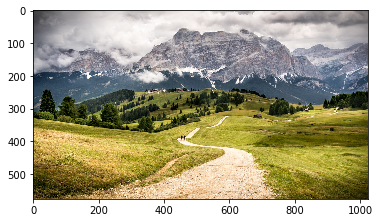

In [51]:
# can also manage images coming in as base64 text, e.g. from a API
with open("images/landscape.jpg", "rb") as image_file:
    img_b64 = b64encode(image_file.read())
    
img = Image.open(BytesIO(b64decode(img_b64)))

img_orig = img.copy()

plt.imshow(img)

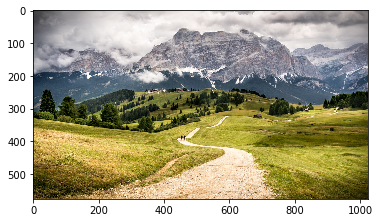

In [2]:
# import example image
filename = 'images/landscape.jpg'

img = Image.open(filename)
plt.imshow(img)

# keep copy of original image for later
img_orig = img.copy()

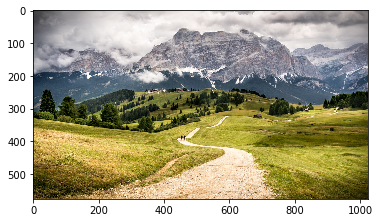

In [3]:
# can also import image from URL
url = 'https://get-palette-app.s3.eu-west-2.amazonaws.com/examples/images/landscape.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)

# keep copy of original image for later
img_orig = img.copy()

In [33]:
# resize image to keep size relatively small and keep calculations running quickly
basewidth = 100
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)

In [34]:
# get channels and turn colours into dataframe columns
arr = np.array(img.convert('RGB')) # need .convert('RGB') as sometimes png may not be loaded as such

r = arr[:,:,0].flatten()
g = arr[:,:,1].flatten()
b = arr[:,:,2].flatten()

df = pd.DataFrame({'r' : list(r), 'g' : list(g), 'b' : list(b)})

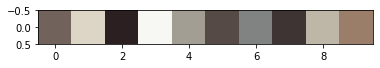

In [35]:
# pick how many colours will populate our palette, then perform a KMeans, and finally get the centroids identifying the colours we will display
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters).fit(df)

centroids = kmeans.cluster_centers_

plt.imshow([centroids/255])

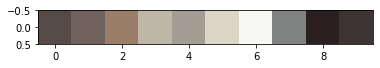

In [36]:
# for a more visually appealing palette, let's order the colours by hue
colours = []
for row in range(len(centroids)):

    c = list(centroids[row,:]/255)

    colours.append(list(colorsys.rgb_to_hsv(*c)))
    
colours.sort()

colours = [list(colorsys.hsv_to_rgb(*c)) for c in colours]

plt.imshow([np.array(colours)])

In [37]:
# Let's create a new image that will work as a canvas to display input image and palette
full_w = 1000
full_h = 1000

new_img = Image.new('RGBA', (full_w, full_h), "white")

#
frame_s = round(full_w / 60)

intrabox_w = round(full_w / 100)

box_w = round((full_w - ((frame_s*2) + (intrabox_w*(n_clusters-1)))) / n_clusters)
box_h = round(full_h / 4)

x = frame_s
for col in colours:

    col_box = Image.new('RGBA', (box_w, box_h), tuple(np.round(np.array(col)*255).astype(int)))

    new_img.paste(col_box, (x, full_h-frame_s-box_h))

    x = x + box_w + intrabox_w

#
basewidth = round(full_w - (frame_s*2))
baseheight = round(full_h - (frame_s + box_h) - (full_h/10*2))

# adjust height to fit box
wpercent = (baseheight / float(img_orig.size[1]))
wsize = int((float(img_orig.size[0]) * float(wpercent)))
img_orig = img_orig.resize((wsize, baseheight), Image.ANTIALIAS)

# if width still not fitting, also adjust that
if img_orig.size[0] > basewidth:
    wpercent = (basewidth / float(img_orig.size[0]))
    hsize = int((float(img_orig.size[1]) * float(wpercent)))
    img_orig = img_orig.resize((basewidth, hsize), Image.ANTIALIAS)

#
wsize = img_orig.size[0]
hsize = img_orig.size[1]

pos_x = frame_s + round((basewidth-wsize)/2)
pos_y = round(full_h/10) + round((baseheight-hsize)/2)

coords = (pos_x, pos_y)

new_img.paste(img_orig, coords)

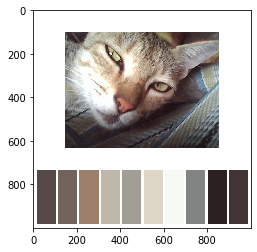

In [38]:
plt.imshow(new_img)
#new_img.save(filename+"_palette", "PNG")